In [1]:
# !pip install pandas
# !pip install matplotlib

53.6
53.6
53.6
53.6
55.81
55.81
57.77
57.77
61.59
61.59
57.77
57.77
61.59
61.59
62.79
62.79
61.84
61.84
61.82
61.82
61.85
61.85
90.4
90.4
90.99
90.99
91.28
91.28
91.28
91.28
91.69
91.69
91.69
91.69
80
77.23
77.23
10
87.19
87.19
20
88.28
88.28
30
88.15
88.15
40
88.28
88.28
50
88.28
88.28
60
88.15
88.15
70
88.01
88.01
80
88.28
88.28
90
88.28
88.28
100
88.28
88.28
10
82.9
82.9
20
82.66
82.66
30
82.75
82.75
40
83.32
83.32
50
83.47
83.47
60
83.56
83.56
70
83.56
83.56
80
83.65
83.65
34
80.2
80.2
68
81.5
81.5
102
79.81
79.81
136
82.29
82.29
170
82.47
82.47
204
82.06
82.06
11
66.71
66.71
22
74.14
74.14
33
74.11
74.11
44
74.11
74.11
55
74.21
74.21
66
74.21
74.21
77
74.17
74.17
2.19
2.19
30
70.85
70.85
45
70.61
70.61
60
70.91
70.91
75
70.96
70.96
90
71.45
71.45
105
71.57
71.57
96.73
95.53
96.45
96.93
96.93
98.88
98.9
98.9
98.9
98.9
98.9
98.93
98.95
{2: 82.25, 4: 85.43, 6: 85.43, 8: 85.66, 10: 85.66, 12: 85.66, 14: 85.65, 16: 69.57, 18: 85.66, 20: 85.64, 22: 85.64, 24: 85.65, 26: 85.28, 28: 85.28

c:\Users\antho\OneDrive\Documents\Coding\CLIP_category_singularity\Tested_Datasets_and_Graphing\analysistopy.py:3357: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


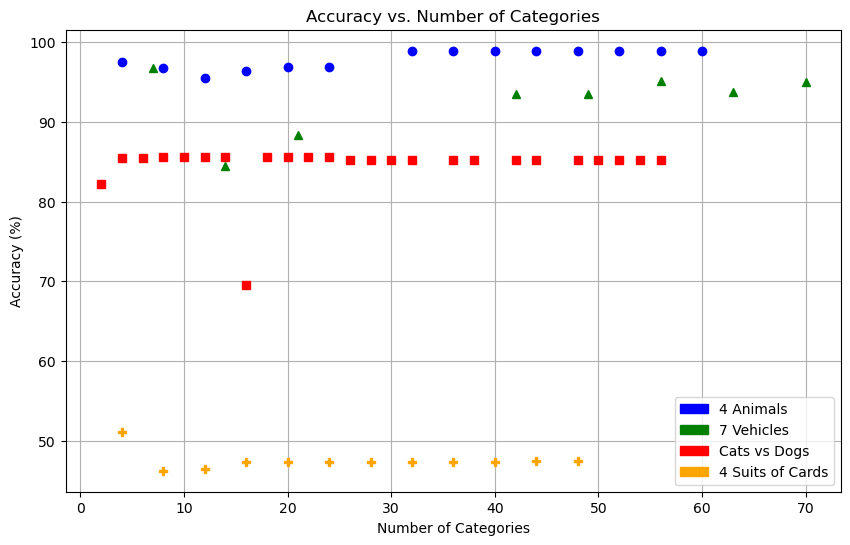

c:\Users\antho\OneDrive\Documents\Coding\CLIP_category_singularity\Tested_Datasets_and_Graphing\analysistopy.py:3391: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


7 7
5 5
10 10
10 10
10 10
9 9
6 6
7 7
7 7


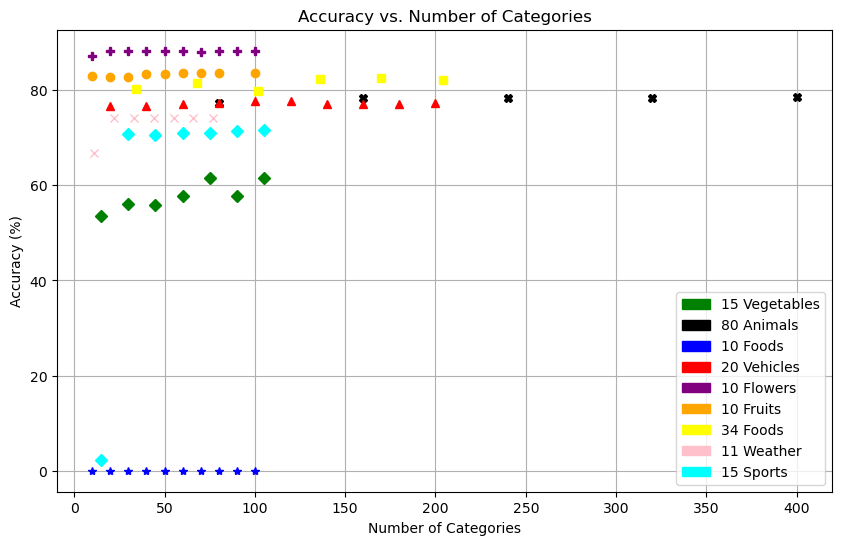

In [2]:
import pandas as pd
import numpy as np
import analysistopy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

# Accuracy Functions

In [4]:
def CDcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            if any(char.isupper() for char in path_parts[-1]):
                name = 'cat'
            else:
                name = 'dog'

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [5]:
def aObase_accuracy(csv_path):

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [6]:
def card_accuracy(csv_path, acc_dict):
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Normalize labels
    data['label'] = data['label'].str.strip().str.lower()

    # Normalize the dictionary keys and values
    normalized_dict = {key.lower(): [v.lower() for v in values] for key, values in acc_dict.items()}

    count = 0
    total = 0

    for index, row in data.iterrows():
        path_parts = row['file_path'].split('/')

        if len(path_parts) > 2:
            vehicle_key = path_parts[-2].strip().lower()  # Extract key from [-2]
            label = row['label']

            # Find a matching key in the dictionary
            matched_key = next((key for key in normalized_dict if key in vehicle_key), None)

            if matched_key:
                # Check if the label matches any of the values for the matched key
                if any(value in label for value in normalized_dict[matched_key]):
                    count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)


In [7]:
def aOcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  # Normalize name

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0

    print(round(accuracy * 100, 2))
    return round(accuracy * 100, 2)

In [8]:
def flowers_accuracy(csv_path, flowers_dict):
    # Reverse the dictionary to have flower names as keys
    reversed_dict = {}
    for key, values in flowers_dict.items():
        for value in values:
            reversed_dict[value.strip().lower()] = key  # Ensure the key is normalized

    # Read the CSV file (pandas is used for ease of handling CSV data)
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Clean the labels to be lowercase and strip any whitespace
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    # Loop through each row in the data
    for index, row in data.iterrows():
        # Extract the flower name from the file path
        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-1][:-10].strip().lower()  # Normalize name


            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reversed_dict.get(row['label'], None)

            if primary_key and name == primary_key:  # Check if the normalized names match
                count += 1
            
        total += 1

    accuracy = count / total if total > 0 else 0

    print(round(accuracy * 100, 2))
    return round(accuracy * 100, 2)


In [9]:
def app_accuracy(csv_path, dictionary):
    
    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}
    reverse_dict = {value: key for key, values in normalized_dict.items() for value in values}

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    correct_count = 0
    total = len(data)

    for index, row in data.iterrows():
        path_parts = row['file_path'].split('/')
        if len(path_parts) < 3:
            continue

        name = path_parts[-2].strip().lower().replace('_', ' ')  # Convert underscores to spaces
        primary_key = reverse_dict.get(row['label'])

        if primary_key and name in normalized_dict.get(primary_key, []):
            correct_count += 1

    accuracy = (correct_count / total) * 100 if total > 0 else 0
    print(round(accuracy, 2))
    return round(accuracy, 2)

In [10]:
def car_accuracy(csv_path, dictionary):
    # Normalize dictionary (convert keys and values to lowercase)
    normalized_dict = {key.lower(): [v.lower() for v in values] for key, values in dictionary.items()}
    reverse_dict = {value: key for key, values in normalized_dict.items() for value in values}

    data = pd.read_csv(csv_path)
    
    # Ensure correct column naming
    if 'file' in data.columns and 'label' in data.columns:
        data.rename(columns={'file': 'file_path'}, inplace=True)

    data['label'] = data['label'].str.strip().str.lower()

    correct_count = 0
    total = 0

    for index, row in data.iterrows():
        if 'file_path' not in row:
            continue
        
        path_parts = row['file_path'].split('/')
        # Extract manufacturer name (assuming it is the second-to-last folder)
        manufacturer_name = path_parts[-2].strip().lower().replace('_', ' ')

        # Find the correct key from dictionary mapping
        primary_key = reverse_dict.get(row['label'])

        if primary_key and manufacturer_name == primary_key:
            correct_count += 1
        total += 1
            
    # Compute accuracy
    accuracy = (correct_count / total) * 100 if total > 0 else 0
    accuracy = round(accuracy, 2)

    print(f"{accuracy}%")
    
    return round(accuracy * 100, 2)


# Dictionaries

## Animal 64

In [606]:
an64 = {
    'antelope': ['antelope'],
    'bear': ['bear'],
    'beaver': ['beaver'],
    'bee': ['bee'],
    'bison': ['bison'],
    'blackbird': ['blackbird'],
    'buffalo': ['buffalo'],
    'butterfly': ['butterfly'],
    'camel': ['camel'],
    'cat': ['cat'],
    'cheetah': ['cheetah'],
    'chimpanzee': ['chimpanzee'],
    'chinchilla': ['chinchilla'],
    'cow': ['cow'],
    'crab': ['crab'],
    'crocodile': ['crocodile'],
    'deer': ['deer'],
    'dog': ['dog'],
    'dolphin': ['dolphin'],
    'donkey': ['donkey'],
    'duck': ['duck'],
    'eagle': ['eagle'],
    'elephant': ['elephant'],
    'falcon': ['falcon'],
    'ferret' : ['ferret'],
    'flamingo': ['flamingo'],
    'fox': ['fox'],
    'frog': ['frog'],
    'giraffe': ['giraffe'],
    'goat': ['goat'],
    'goose': ['goose'],
    'gorilla': ['gorilla'],
    'grasshopper': ['grasshopper'],
    'hawk': ['hawk'],
    'hedgehog': ['hedgehog'],
    'hippopotamus': ['hippopotamus'],
    'hyena': ['hyena'],
    'iguana': ['iguana'],
    'jaguar': ['jaguar'],
    'kangaroo': ['kangaroo'],
    'koala': ['koala'],
    'lemur': ['lemur'],
    'leopard': ['leopard'],
    'lizard': ['lizard'],
    'lynx': ['lynx'],
    'mole': ['mole'],
    'mongoose': ['mongoose'],
    'ostrich': ['ostrich'],
    'otter': ['otter'],
    'owl': ['owl'],
    'panda': ['panda'],
    'peacock': ['peacock'],
    'penguin': ['penguin'],
    'porcupine': ['porcupine'],
    'raccoon': ['raccoon'],
    'seal': ['seal'],
    'sheep': ['sheep'],
    'snail': ['snail'],
    'snake': ['snake'],
    'spider': ['spider'],
    'squid': ['squid'],
    'walrus': ['walrus'],
    'whale': ['whale'],
    'wolf': ['wolf']
} 

dict_size(an64)
print(", ".join([value for values in an64.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an64.csv", an64)

64
antelope, bear, beaver, bee, bison, blackbird, buffalo, butterfly, camel, cat, cheetah, chimpanzee, chinchilla, cow, crab, crocodile, deer, dog, dolphin, donkey, duck, eagle, elephant, falcon, ferret, flamingo, fox, frog, giraffe, goat, goose, gorilla, grasshopper, hawk, hedgehog, hippopotamus, hyena, iguana, jaguar, kangaroo, koala, lemur, leopard, lizard, lynx, mole, mongoose, ostrich, otter, owl, panda, peacock, penguin, porcupine, raccoon, seal, sheep, snail, snake, spider, squid, walrus, whale, wolf


In [607]:
an128 = {key: value + [f"{value[0]}s"] for key, value in an64.items()}

print (", ".join([value for values in an128.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/a128.csv", a128)

antelope, antelopes, bear, bears, beaver, beavers, bee, bees, bison, bisons, blackbird, blackbirds, buffalo, buffalos, butterfly, butterflys, camel, camels, cat, cats, cheetah, cheetahs, chimpanzee, chimpanzees, chinchilla, chinchillas, cow, cows, crab, crabs, crocodile, crocodiles, deer, deers, dog, dogs, dolphin, dolphins, donkey, donkeys, duck, ducks, eagle, eagles, elephant, elephants, falcon, falcons, ferret, ferrets, flamingo, flamingos, fox, foxs, frog, frogs, giraffe, giraffes, goat, goats, goose, gooses, gorilla, gorillas, grasshopper, grasshoppers, hawk, hawks, hedgehog, hedgehogs, hippopotamus, hippopotamuss, hyena, hyenas, iguana, iguanas, jaguar, jaguars, kangaroo, kangaroos, koala, koalas, lemur, lemurs, leopard, leopards, lizard, lizards, lynx, lynxs, mole, moles, mongoose, mongooses, ostrich, ostrichs, otter, otters, owl, owls, panda, pandas, peacock, peacocks, penguin, penguins, porcupine, porcupines, raccoon, raccoons, seal, seals, sheep, sheeps, snail, snails, snake,

In [608]:
an192 = {key: value + [f"Large {value[0]}"] for key, value in an128.items()}

print (", ".join([value for values in an192.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an192.csv", an192)

antelope, antelopes, Large antelope, bear, bears, Large bear, beaver, beavers, Large beaver, bee, bees, Large bee, bison, bisons, Large bison, blackbird, blackbirds, Large blackbird, buffalo, buffalos, Large buffalo, butterfly, butterflys, Large butterfly, camel, camels, Large camel, cat, cats, Large cat, cheetah, cheetahs, Large cheetah, chimpanzee, chimpanzees, Large chimpanzee, chinchilla, chinchillas, Large chinchilla, cow, cows, Large cow, crab, crabs, Large crab, crocodile, crocodiles, Large crocodile, deer, deers, Large deer, dog, dogs, Large dog, dolphin, dolphins, Large dolphin, donkey, donkeys, Large donkey, duck, ducks, Large duck, eagle, eagles, Large eagle, elephant, elephants, Large elephant, falcon, falcons, Large falcon, ferret, ferrets, Large ferret, flamingo, flamingos, Large flamingo, fox, foxs, Large fox, frog, frogs, Large frog, giraffe, giraffes, Large giraffe, goat, goats, Large goat, goose, gooses, Large goose, gorilla, gorillas, Large gorilla, grasshopper, gras

In [609]:
an256 = {key: value + [f"Large {value[0]}s"] for key, value in an192.items()}

print (", ".join([value for values in an256.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an256.csv", an256)

antelope, antelopes, Large antelope, Large antelopes, bear, bears, Large bear, Large bears, beaver, beavers, Large beaver, Large beavers, bee, bees, Large bee, Large bees, bison, bisons, Large bison, Large bisons, blackbird, blackbirds, Large blackbird, Large blackbirds, buffalo, buffalos, Large buffalo, Large buffalos, butterfly, butterflys, Large butterfly, Large butterflys, camel, camels, Large camel, Large camels, cat, cats, Large cat, Large cats, cheetah, cheetahs, Large cheetah, Large cheetahs, chimpanzee, chimpanzees, Large chimpanzee, Large chimpanzees, chinchilla, chinchillas, Large chinchilla, Large chinchillas, cow, cows, Large cow, Large cows, crab, crabs, Large crab, Large crabs, crocodile, crocodiles, Large crocodile, Large crocodiles, deer, deers, Large deer, Large deers, dog, dogs, Large dog, Large dogs, dolphin, dolphins, Large dolphin, Large dolphins, donkey, donkeys, Large donkey, Large donkeys, duck, ducks, Large duck, Large ducks, eagle, eagles, Large eagle, Large 

In [610]:
an320 = {key: value + [f"Small {value[0]}"] for key, value in an256.items()}

print (", ".join([value for values in an320.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an320.csv", an320)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, bear, bears, Large bear, Large bears, Small bear, beaver, beavers, Large beaver, Large beavers, Small beaver, bee, bees, Large bee, Large bees, Small bee, bison, bisons, Large bison, Large bisons, Small bison, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, butterfly, butterflys, Large butterfly, Large butterflys, Small butterfly, camel, camels, Large camel, Large camels, Small camel, cat, cats, Large cat, Large cats, Small cat, cheetah, cheetahs, Large cheetah, Large cheetahs, Small cheetah, chimpanzee, chimpanzees, Large chimpanzee, Large chimpanzees, Small chimpanzee, chinchilla, chinchillas, Large chinchilla, Large chinchillas, Small chinchilla, cow, cows, Large cow, Large cows, Small cow, crab, crabs, Large crab, Large crabs, Small crab, crocodile, crocodiles, Large crocodile, Large crocodiles, Small crocodile, deer, deer

In [611]:
an384 = {key: value + [f"Small {value[0]}s"] for key, value in an320.items()}

print (", ".join([value for values in an384.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an384.csv", an384)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, bear, bears, Large bear, Large bears, Small bear, Small bears, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, bee, bees, Large bee, Large bees, Small bee, Small bees, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, butterfly, butterflys, Large butterfly, Large butterflys, Small butterfly, Small butterflys, camel, camels, Large camel, Large camels, Small camel, Small camels, cat, cats, Large cat, Large cats, Small cat, Small cats, cheetah, cheetahs, Large cheetah, Large cheetahs, Small cheetah, Small cheetahs, chimpanzee, chimpanzees, Large chimpanzee, Large chimpanzees, Small chimpanzee, Small chimpanzees, chinchilla, chinchillas, Large chinchilla, Large chinchillas, Small chinchil

In [756]:
an448 = {key: value + [f"Animal {value[0]}"] for key, value in an384.items()}

print (", ".join([value for values in an448.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an448.csv", an448)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, Animal buffalo, butterfly, butterflys, Large butterfly, Large butterflys, Small butterfly, Small butterflys, Animal butterfly, camel, camels, Large camel, Large camels, Small camel, Small camels, Animal camel, cat, cats, Large cat, Large cats, Small cat, Small cats, Animal cat, cheetah, cheetahs, Large cheetah, Large cheetahs, Small cheetah, Small cheetahs, Animal cheetah, chimpanzee

In [757]:
an512 = {key: value + [f"Animal {value[0]}s"] for key, value in an448.items()}

print (", ".join([value for values in an512.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an512.csv", an512)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, Animal antelopes, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, Animal bears, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, Animal beavers, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, Animal bees, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, Animal bisons, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, Animal blackbirds, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, Animal buffalo, Animal buffalos, butterfly, butterflys, Large butterfly, Large butterflys, Small butterfly, Small butterflys, Animal butterfly, Animal butterflys, camel, camels, Large camel, Large camels, Small camel, Small camels, Animal camel, Animal camels, cat, cats, Large cat, Large ca

In [758]:
an576 = {key: value + [f"Medium {value[0]}"] for key, value in an512.items()}

print (", ".join([value for values in an576.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an576.csv", an576)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, Animal antelopes, Medium antelope, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, Animal bears, Medium bear, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, Animal beavers, Medium beaver, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, Animal bees, Medium bee, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, Animal bisons, Medium bison, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, Animal blackbirds, Medium blackbird, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, Animal buffalo, Animal buffalos, Medium buffalo, butterfly, butterflys, Large butterfly, Large butterflys, Small butterfly, Small butterflys, Animal butterfly, Animal butterflys, Medium butterfly, camel

In [759]:
an640 = {key: value + [f"Medium {value[0]}s"] for key, value in an576.items()}

print (", ".join([value for values in an640.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an640.csv", an640)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, Animal antelopes, Medium antelope, Medium antelopes, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, Animal bears, Medium bear, Medium bears, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, Animal beavers, Medium beaver, Medium beavers, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, Animal bees, Medium bee, Medium bees, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, Animal bisons, Medium bison, Medium bisons, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, Animal blackbirds, Medium blackbird, Medium blackbirds, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, Animal buffalo, Animal buffalos, Medium buffalo, Medium buffalos, butterfly, butterflys, Large butterfly, L

In [760]:
an704 = {key: value + [f"Tiny {value[0]}"] for key, value in an640.items()}

print (", ".join([value for values in an704.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an704.csv", an704)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, Animal antelopes, Medium antelope, Medium antelopes, Tiny antelope, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, Animal bears, Medium bear, Medium bears, Tiny bear, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, Animal beavers, Medium beaver, Medium beavers, Tiny beaver, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, Animal bees, Medium bee, Medium bees, Tiny bee, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, Animal bisons, Medium bison, Medium bisons, Tiny bison, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, Animal blackbirds, Medium blackbird, Medium blackbirds, Tiny blackbird, buffalo, buffalos, Large buffalo, Large buffalos, Small buffalo, Small buffalos, Animal buffalo, Animal buffalo

In [761]:
an768 = {key: value + [f"Tiny {value[0]}s"] for key, value in an704.items()}

print (", ".join([value for values in an768.values() for value in values]))

# car_accuracy("WithoutIP/Animal64/an768.csv", an768)

antelope, antelopes, Large antelope, Large antelopes, Small antelope, Small antelopes, Animal antelope, Animal antelopes, Medium antelope, Medium antelopes, Tiny antelope, Tiny antelopes, bear, bears, Large bear, Large bears, Small bear, Small bears, Animal bear, Animal bears, Medium bear, Medium bears, Tiny bear, Tiny bears, beaver, beavers, Large beaver, Large beavers, Small beaver, Small beavers, Animal beaver, Animal beavers, Medium beaver, Medium beavers, Tiny beaver, Tiny beavers, bee, bees, Large bee, Large bees, Small bee, Small bees, Animal bee, Animal bees, Medium bee, Medium bees, Tiny bee, Tiny bees, bison, bisons, Large bison, Large bisons, Small bison, Small bisons, Animal bison, Animal bisons, Medium bison, Medium bisons, Tiny bison, Tiny bisons, blackbird, blackbirds, Large blackbird, Large blackbirds, Small blackbird, Small blackbirds, Animal blackbird, Animal blackbirds, Medium blackbird, Medium blackbirds, Tiny blackbird, Tiny blackbirds, buffalo, buffalos, Large buf

## Bottles 5

In [613]:
b5 = {
    'Beer Bottles' : ['Beer Bottle'],
    'Soda Bottles' : ['Soda Bottle'],
    'Water Bottles' : ['Water Bottle'],
    'Wine Bottles' : ['Wine Bottle'],
    'Plastic Bottles' : ['Plastic Bottle'],
} 

print(", ".join([value for values in b5.values() for value in values]))

# car_accuracy("WithoutIP/Bottles5/b5.csv", b5)

Beer Bottle, Soda Bottle, Water Bottle, Wine Bottle, Plastic Bottle


In [614]:
b10 = {key: value + [f"{value[0]}s"] for key, value in b5.items()}

print (", ".join([value for values in b10.values() for value in values]))

# car_accuracy("WithoutIP/Bottles10/b10.csv", b10)

Beer Bottle, Beer Bottles, Soda Bottle, Soda Bottles, Water Bottle, Water Bottles, Wine Bottle, Wine Bottles, Plastic Bottle, Plastic Bottles


In [615]:
b15 = {key: value + [f"Large {value[0]}"] for key, value in b10.items()}

print (", ".join([value for values in b15.values() for value in values]))

# car_accuracy("WithoutIP/Bottles15/b15.csv", b15)

Beer Bottle, Beer Bottles, Large Beer Bottle, Soda Bottle, Soda Bottles, Large Soda Bottle, Water Bottle, Water Bottles, Large Water Bottle, Wine Bottle, Wine Bottles, Large Wine Bottle, Plastic Bottle, Plastic Bottles, Large Plastic Bottle


In [616]:
b20 = {key: value + [f"Large {value[0]}s"] for key, value in b15.items()}

print (", ".join([value for values in b20.values() for value in values]))

# car_accuracy("WithoutIP/Bottles20/b20.csv", b20)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles


In [617]:
b25 = {key: value + [f"Small {value[0]}"] for key, value in b20.items()}

print (", ".join([value for values in b25.values() for value in values]))

# car_accuracy("WithoutIP/Bottles25/b25.csv", b25)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle


In [618]:
b30 = {key: value + [f"Small {value[0]}s"] for key, value in b25.items()}

print (", ".join([value for values in b30.values() for value in values]))

# car_accuracy("WithoutIP/Bottles30/b30.csv", b30)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles


In [619]:
b35 = {key: value + [f"Medium {value[0]}"] for key, value in b30.items()}

print (", ".join([value for values in b35.values() for value in values]))

# car_accuracy("WithoutIP/Bottles35/b35.csv", b35)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles, Medium Plastic Bottle


In [620]:
b40 = {key: value + [f"Medium {value[0]}s"] for key, value in b35.items()}

print (", ".join([value for values in b40.values() for value in values]))

# car_accuracy("WithoutIP/Bottles40/b40.csv", b40)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Medium Beer Bottles, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Medium Soda Bottles, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Medium Water Bottles, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Medium Wine Bottles, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles, Medium Plastic Bottle, Medium Plastic Bottles


In [621]:
b45 = {key: value + [f"Beverage {value[0]}"] for key, value in b40.items()}

print (", ".join([value for values in b45.values() for value in values]))

# car_accuracy("WithoutIP/Bottles45/b45.csv", b45)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Medium Beer Bottles, Beverage Beer Bottle, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Medium Soda Bottles, Beverage Soda Bottle, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Medium Water Bottles, Beverage Water Bottle, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Medium Wine Bottles, Beverage Wine Bottle, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles, Medium Plastic Bottle, Medium Plastic Bottles, Beverage Plastic Bottle


In [622]:
b50 = {key: value + [f"Beverage {value[0]}s"] for key, value in b45.items()}

print (", ".join([value for values in b50.values() for value in values]))

# car_accuracy("WithoutIP/Bottles50/b50.csv", b50)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Medium Beer Bottles, Beverage Beer Bottle, Beverage Beer Bottles, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Medium Soda Bottles, Beverage Soda Bottle, Beverage Soda Bottles, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Medium Water Bottles, Beverage Water Bottle, Beverage Water Bottles, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Medium Wine Bottles, Beverage Wine Bottle, Beverage Wine Bottles, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles, Medium Plastic Bottle, Medium Plastic Bottles, Beverage Plastic Bottle, Beverage Plastic Bottles


In [623]:
b55 = {key: value + [f"Tiny {value[0]}"] for key, value in b50.items()}

print (", ".join([value for values in b55.values() for value in values]))

# car_accuracy("WithoutIP/Bottles55/b55.csv", b55)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Medium Beer Bottles, Beverage Beer Bottle, Beverage Beer Bottles, Tiny Beer Bottle, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Medium Soda Bottles, Beverage Soda Bottle, Beverage Soda Bottles, Tiny Soda Bottle, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Medium Water Bottles, Beverage Water Bottle, Beverage Water Bottles, Tiny Water Bottle, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Medium Wine Bottles, Beverage Wine Bottle, Beverage Wine Bottles, Tiny Wine Bottle, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles, Small Plastic Bottle, Small Plastic Bottles, Medium Plastic Bottle, Medium 

In [624]:
b60 = {key: value + [f"Tiny {value[0]}s"] for key, value in b55.items()}

print (", ".join([value for values in b60.values() for value in values]))

# car_accuracy("WithoutIP/Bottles60/b60.csv", b60)

Beer Bottle, Beer Bottles, Large Beer Bottle, Large Beer Bottles, Small Beer Bottle, Small Beer Bottles, Medium Beer Bottle, Medium Beer Bottles, Beverage Beer Bottle, Beverage Beer Bottles, Tiny Beer Bottle, Tiny Beer Bottles, Soda Bottle, Soda Bottles, Large Soda Bottle, Large Soda Bottles, Small Soda Bottle, Small Soda Bottles, Medium Soda Bottle, Medium Soda Bottles, Beverage Soda Bottle, Beverage Soda Bottles, Tiny Soda Bottle, Tiny Soda Bottles, Water Bottle, Water Bottles, Large Water Bottle, Large Water Bottles, Small Water Bottle, Small Water Bottles, Medium Water Bottle, Medium Water Bottles, Beverage Water Bottle, Beverage Water Bottles, Tiny Water Bottle, Tiny Water Bottles, Wine Bottle, Wine Bottles, Large Wine Bottle, Large Wine Bottles, Small Wine Bottle, Small Wine Bottles, Medium Wine Bottle, Medium Wine Bottles, Beverage Wine Bottle, Beverage Wine Bottles, Tiny Wine Bottle, Tiny Wine Bottles, Plastic Bottle, Plastic Bottles, Large Plastic Bottle, Large Plastic Bottles

## Animal 80

In [625]:
a80 = {
    "Bear": ["Bear"],
    "Brown Bear": ["Brown Bear"],
    "Bull": ["Bull"],
    "Butterfly": ["Butterfly"],
    "Camel": ["Camel"],
    "Canary": ["Canary"],
    "Caterpillar": ["Caterpillar"],
    "Cattle": ["Cattle"],
    "Centipede": ["Centipede"],
    "Cheetah": ["Cheetah"],
    "Chicken": ["Chicken"],
    "Crab": ["Crab"],
    "Crocodile": ["Crocodile"],
    "Deer": ["Deer"],
    "Duck": ["Duck"],
    "Eagle": ["Eagle"],
    "Elephant": ["Elephant"],
    "Fish": ["Fish"],
    "Fox": ["Fox"],
    "Frog": ["Frog"],
    "Giraffe": ["Giraffe"],
    "Goat": ["Goat"],
    "Goldfish": ["Goldfish"],
    "Goose": ["Goose"],
    "Hamster": ["Hamster"],
    "Harbor Seal": ["Harbor Seal"],
    "Hedgehog": ["Hedgehog"],
    "Hippopotamus": ["Hippopotamus"],
    "Horse": ["Horse"],
    "Jaguar": ["Jaguar"],
    "Jellyfish": ["Jellyfish"],
    "Kangaroo": ["Kangaroo"],
    "Koala": ["Koala"],
    "Ladybug": ["Ladybug"],
    "Leopard": ["Leopard"],
    "Lion": ["Lion"],
    "Lizard": ["Lizard"],
    "Lynx": ["Lynx"],
    "Magpie": ["Magpie"],
    "Monkey": ["Monkey"],
    "Moths and butterflies": ["Moths and butterflies"],
    "Mouse": ["Mouse"],
    "Mule": ["Mule"],
    "Ostrich": ["Ostrich"],
    "Otter": ["Otter"],
    "Owl": ["Owl"],
    "Panda": ["Panda"],
    "Parrot": ["Parrot"],
    "Penguin": ["Penguin"],
    "Pig": ["Pig"],
    "Polar Bear": ["Polar Bear"],
    "Rabbit": ["Rabbit"],
    "Raccoon": ["Raccoon"],
    "Raven": ["Raven"],
    "Red panda": ["Red panda"],
    "Rhinoceros": ["Rhinoceros"],
    "Scorpion": ["Scorpion"],
    "Seahorse": ["Seahorse"],
    "Sea Lion": ["Sea Lion"],
    "Sea Turtle": ["Sea Turtle"],
    "Shark": ["Shark"],
    "Sheep": ["Sheep"],
    "Shrimp": ["Shrimp"],
    "Snail": ["Snail"],
    "Snake": ["Snake"],
    "Sparrow": ["Sparrow"],
    "Spider": ["Spider"],
    "Squid": ["Squid"],
    "Squirrel": ["Squirrel"],
    "Starfish": ["Starfish"],
    "Swan": ["Swan"],
    "Tick": ["Tick"],
    "Tiger": ["Tiger"],
    "Tortoise": ["Tortoise"],
    "Turkey": ["Turkey"],
    "Turtle": ["Turtle"],
    "Whale": ["Whale"],
    "Woodpecker": ["Woodpecker"],
    "Worm": ["Worm"],
    "Zebra": ["Zebra"]
}


# Bear, Brown Bear, Bull, Butterfly, Camel, Canary, Caterpillar, Cattle, Centipede, Cheetah, Chicken, Crab, Crocodile, Deer, Duck, Eagle, Elephant, Fish, Fox, Frog, Giraffe, Goat, Goldfish, Goose, Hamster, Harbor Seal, Hedgehog, Hippopotamus, Horse, Jaguar, Jellyfish, Kangaroo, Koala, Ladybug, Leopard, Lion, Lizard, Lynx, Magpie, Monkey, Moths and butterflies, Mouse, Mule, Ostrich, Otter, Owl, Panda, Parrot, Penguin, Pig, Polar Bear, Rabbit, Raccoon, Raven, Red panda, Rhinoceros, Scorpion, Seahorse, Sea Lion, Sea Turtle, Shark, Sheep, Shrimp, Snail, Snake, Sparrow, Spider, Squid, Squirrel, Starfish, Swan, Tick, Tiger, Tortoise, Turkey, Turtle, Whale, Woodpecker, Worm, Zebra



# dict_size(a80)
print(car_accuracy('animal80/a80.csv', a80))

77.35%
7735.0


In [626]:
a160 = {
    "Bear": ["Bear", "Bears"],
    "Brown Bear": ["Brown Bear", "Brown Bears"],
    "Bull": ["Bull", "Bulls"],
    "Butterfly": ["Butterfly", "Butterflies"],
    "Camel": ["Camel", "Camels"],
    "Canary": ["Canary", "Canaries"],
    "Caterpillar": ["Caterpillar", "Caterpillars"],
    "Cattle": ["Cattle", "Cattle"],
    "Centipede": ["Centipede", "Centipedes"],
    "Cheetah": ["Cheetah", "Cheetahs"],
    "Chicken": ["Chicken", "Chickens"],
    "Crab": ["Crab", "Crabs"],
    "Crocodile": ["Crocodile", "Crocodiles"],
    "Deer": ["Deer", "Deer"],
    "Duck": ["Duck", "Ducks"],
    "Eagle": ["Eagle", "Eagles"],
    "Elephant": ["Elephant", "Elephants"],
    "Fish": ["Fish", "Fish"],
    "Fox": ["Fox", "Foxes"],
    "Frog": ["Frog", "Frogs"],
    "Giraffe": ["Giraffe", "Giraffes"],
    "Goat": ["Goat", "Goats"],
    "Goldfish": ["Goldfish", "Goldfish"],
    "Goose": ["Goose", "Geese"],
    "Hamster": ["Hamster", "Hamsters"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals"],
    "Hedgehog": ["Hedgehog", "Hedgehogs"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses"],
    "Horse": ["Horse", "Horses"],
    "Jaguar": ["Jaguar", "Jaguars"],
    "Jellyfish": ["Jellyfish", "Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos"],
    "Koala": ["Koala", "Koalas"],
    "Ladybug": ["Ladybug", "Ladybugs"],
    "Leopard": ["Leopard", "Leopards"],
    "Lion": ["Lion", "Lions"],
    "Lizard": ["Lizard", "Lizards"],
    "Lynx": ["Lynx", "Lynxes"],
    "Magpie": ["Magpie", "Magpies"],
    "Monkey": ["Monkey", "Monkeys"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies"],
    "Mouse": ["Mouse", "Mice"],
    "Mule": ["Mule", "Mules"],
    "Ostrich": ["Ostrich", "Ostriches"],
    "Otter": ["Otter", "Otters"],
    "Owl": ["Owl", "Owls"],
    "Panda": ["Panda", "Pandas"],
    "Parrot": ["Parrot", "Parrots"],
    "Penguin": ["Penguin", "Penguins"],
    "Pig": ["Pig", "Pigs"],
    "Polar Bear": ["Polar Bear", "Polar Bears"],
    "Rabbit": ["Rabbit", "Rabbits"],
    "Raccoon": ["Raccoon", "Raccoons"],
    "Raven": ["Raven", "Ravens"],
    "Red panda": ["Red panda", "Red pandas"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses"],
    "Scorpion": ["Scorpion", "Scorpions"],
    "Seahorse": ["Seahorse", "Seahorses"],
    "Sea Lion": ["Sea Lion", "Sea Lions"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles"],
    "Shark": ["Shark", "Sharks"],
    "Sheep": ["Sheep", "Sheep"],
    "Shrimp": ["Shrimp", "Shrimp"],
    "Snail": ["Snail", "Snails"],
    "Snake": ["Snake", "Snakes"],
    "Sparrow": ["Sparrow", "Sparrows"],
    "Spider": ["Spider", "Spiders"],
    "Squid": ["Squid", "Squids"],
    "Squirrel": ["Squirrel", "Squirrels"],
    "Starfish": ["Starfish", "Starfish"],
    "Swan": ["Swan", "Swans"],
    "Tick": ["Tick", "Ticks"],
    "Tiger": ["Tiger", "Tigers"],
    "Tortoise": ["Tortoise", "Tortoises"],
    "Turkey": ["Turkey", "Turkeys"],
    "Turtle": ["Turtle", "Turtles"],
    "Whale": ["Whale", "Whales"],
    "Woodpecker": ["Woodpecker", "Woodpeckers"],
    "Worm": ["Worm", "Worms"],
    "Zebra": ["Zebra", "Zebras"]
}

# Bear, Bears, Brown Bear, Brown Bears, Bull, Bulls, Butterfly, Butterflies, Camel, Camels, Canary, Canaries, Caterpillar, Caterpillars, Cattle, Cattle, Centipede, Centipedes, Cheetah, Cheetahs, Chicken, Chickens, Crab, Crabs, Crocodile, Crocodiles, Deer, Deer, Duck, Ducks, Eagle, Eagles, Elephant, Elephants, Fish, Fish, Fox, Foxes, Frog, Frogs, Giraffe, Giraffes, Goat, Goats, Goldfish, Goldfish, Goose, Geese, Hamster, Hamsters, Harbor Seal, Harbor Seals, Hedgehog, Hedgehogs, Hippopotamus, Hippopotamuses, Horse, Horses, Jaguar, Jaguars, Jellyfish, Jellyfish, Kangaroo, Kangaroos, Koala, Koalas, Ladybug, Ladybugs, Leopard, Leopards, Lion, Lions, Lizard, Lizards, Lynx, Lynxes, Magpie, Magpies, Monkey, Monkeys, Moths and butterflies, Moths and butterflies, Mouse, Mice, Mule, Mules, Ostrich, Ostriches, Otter, Otters, Owl, Owls, Panda, Pandas, Parrot, Parrots, Penguin, Penguins, Pig, Pigs, Polar Bear, Polar Bears, Rabbit, Rabbits, Raccoon, Raccoons, Raven, Ravens, Red panda, Red pandas, Rhinoceros, Rhinoceroses, Scorpion, Scorpions, Seahorse, Seahorses, Sea Lion, Sea Lions, Sea Turtle, Sea Turtles, Shark, Sharks, Sheep, Sheep, Shrimp, Shrimp, Snail, Snails, Snake, Snakes, Sparrow, Sparrows, Spider, Spiders, Squid, Squids, Squirrel, Squirrels, Starfish, Starfish, Swan, Swans, Tick, Ticks, Tiger, Tigers, Tortoise, Tortoises, Turkey, Turkeys, Turtle, Turtles, Whale, Whales, Woodpecker, Woodpeckers, Worm, Worms, Zebra, Zebras

# dict_size(a160)
print(car_accuracy('animal80/a160.csv', a160))

77.45%
7745.0


In [627]:
a240 = {
    "Bear": ["Bear", "Bears", "Large Bear"],
    "Brown Bear": ["Brown Bear", "Brown Bears", "Large Brown Bear"],
    "Bull": ["Bull", "Bulls", "Large Bull"],
    "Butterfly": ["Butterfly", "Butterflies", "Large Butterfly"],
    "Camel": ["Camel", "Camels", "Large Camel"],
    "Canary": ["Canary", "Canaries", "Large Canary"],
    "Caterpillar": ["Caterpillar", "Caterpillars", "Large Caterpillar"],
    "Cattle": ["Cattle", "Cattle", "Large Cattle"],
    "Centipede": ["Centipede", "Centipedes", "Large Centipede"],
    "Cheetah": ["Cheetah", "Cheetahs", "Large Cheetah"],
    "Chicken": ["Chicken", "Chickens", "Large Chicken"],
    "Crab": ["Crab", "Crabs", "Large Crab"],
    "Crocodile": ["Crocodile", "Crocodiles", "Large Crocodile"],
    "Deer": ["Deer", "Deer", "Large Deer"],
    "Duck": ["Duck", "Ducks", "Large Duck"],
    "Eagle": ["Eagle", "Eagles", "Large Eagle"],
    "Elephant": ["Elephant", "Elephants", "Large Elephant"],
    "Fish": ["Fish", "Fish", "Large Fish"],
    "Fox": ["Fox", "Foxes", "Large Fox"],
    "Frog": ["Frog", "Frogs", "Large Frog"],
    "Giraffe": ["Giraffe", "Giraffes", "Large Giraffe"],
    "Goat": ["Goat", "Goats", "Large Goat"],
    "Goldfish": ["Goldfish", "Goldfish", "Large Goldfish"],
    "Goose": ["Goose", "Geese", "Large Goose"],
    "Hamster": ["Hamster", "Hamsters", "Large Hamster"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals", "Large Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Hedgehogs", "Large Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses", "Large Hippopotamus"],
    "Horse": ["Horse", "Horses", "Large Horse"],
    "Jaguar": ["Jaguar", "Jaguars", "Large Jaguar"],
    "Jellyfish": ["Jellyfish", "Jellyfish", "Large Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos", "Large Kangaroo"],
    "Koala": ["Koala", "Koalas", "Large Koala"],
    "Ladybug": ["Ladybug", "Ladybugs", "Large Ladybug"],
    "Leopard": ["Leopard", "Leopards", "Large Leopard"],
    "Lion": ["Lion", "Lions", "Large Lion"],
    "Lizard": ["Lizard", "Lizards", "Large Lizard"],
    "Lynx": ["Lynx", "Lynxes", "Large Lynx"],
    "Magpie": ["Magpie", "Magpies", "Large Magpie"],
    "Monkey": ["Monkey", "Monkeys", "Large Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies", "Large Moths and butterflies"],
    "Mouse": ["Mouse", "Mice", "Large Mouse"],
    "Mule": ["Mule", "Mules", "Large Mule"],
    "Ostrich": ["Ostrich", "Ostriches", "Large Ostrich"],
    "Otter": ["Otter", "Otters", "Large Otter"],
    "Owl": ["Owl", "Owls", "Large Owl"],
    "Panda": ["Panda", "Pandas", "Large Panda"],
    "Parrot": ["Parrot", "Parrots", "Large Parrot"],
    "Penguin": ["Penguin", "Penguins", "Large Penguin"],
    "Pig": ["Pig", "Pigs", "Large Pig"],
    "Polar Bear": ["Polar Bear", "Polar Bears", "Large Polar Bear"],
    "Rabbit": ["Rabbit", "Rabbits", "Large Rabbit"],
    "Raccoon": ["Raccoon", "Raccoons", "Large Raccoon"],
    "Raven": ["Raven", "Ravens", "Large Raven"],
    "Red panda": ["Red panda", "Red pandas", "Large Red panda"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses", "Large Rhinoceros"],
    "Scorpion": ["Scorpion", "Scorpions", "Large Scorpion"],
    "Seahorse": ["Seahorse", "Seahorses", "Large Seahorse"],
    "Sea Lion": ["Sea Lion", "Sea Lions", "Large Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles", "Large Sea Turtle"],
    "Shark": ["Shark", "Sharks", "Large Shark"],
    "Sheep": ["Sheep", "Sheep", "Large Sheep"],
    "Shrimp": ["Shrimp", "Shrimp", "Large Shrimp"],
    "Snail": ["Snail", "Snails", "Large Snail"],
    "Snake": ["Snake", "Snakes", "Large Snake"],
    "Sparrow": ["Sparrow", "Sparrows", "Large Sparrow"],
    "Spider": ["Spider", "Spiders", "Large Spider"],
    "Squid": ["Squid", "Squids", "Large Squid"],
    "Squirrel": ["Squirrel", "Squirrels", "Large Squirrel"],
    "Starfish": ["Starfish", "Starfish", "Large Starfish"],
    "Swan": ["Swan", "Swans", "Large Swan"],
    "Tick": ["Tick", "Ticks", "Large Tick"],
    "Tiger": ["Tiger", "Tigers", "Large Tiger"],
    "Tortoise": ["Tortoise", "Tortoises", "Large Tortoise"],
    "Turkey": ["Turkey", "Turkeys", "Large Turkey"],
    "Turtle": ["Turtle", "Turtles", "Large Turtle"],
    "Whale": ["Whale", "Whales", "Large Whale"],
    "Woodpecker": ["Woodpecker", "Woodpeckers", "Large Woodpecker"],
    "Worm": ["Worm", "Worms", "Large Worm"],
    "Zebra": ["Zebra", "Zebras", "Large Zebra"]
}

# Bear, Bears, Large Bear, Brown Bear, Brown Bears, Large Brown Bear, Bull, Bulls, Large Bull, Butterfly, Butterflies, Large Butterfly, Camel, Camels, Large Camel, Canary, Canaries, Large Canary, Caterpillar, Caterpillars, Large Caterpillar, Cattle, Cattle, Large Cattle, Centipede, Centipedes, Large Centipede, Cheetah, Cheetahs, Large Cheetah, Chicken, Chickens, Large Chicken, Crab, Crabs, Large Crab, Crocodile, Crocodiles, Large Crocodile, Deer, Deer, Large Deer, Duck, Ducks, Large Duck, Eagle, Eagles, Large Eagle, Elephant, Elephants, Large Elephant, Fish, Fish, Large Fish, Fox, Foxes, Large Fox, Frog, Frogs, Large Frog, Giraffe, Giraffes, Large Giraffe, Goat, Goats, Large Goat, Goldfish, Goldfish, Large Goldfish, Goose, Geese, Large Goose, Hamster, Hamsters, Large Hamster, Harbor Seal, Harbor Seals, Large Harbor Seal, Hedgehog, Hedgehogs, Large Hedgehog, Hippopotamus, Hippopotamuses, Large Hippopotamus, Horse, Horses, Large Horse, Jaguar, Jaguars, Large Jaguar, Jellyfish, Jellyfish, Large Jellyfish, Kangaroo, Kangaroos, Large Kangaroo, Koala, Koalas, Large Koala, Ladybug, Ladybugs, Large Ladybug, Leopard, Leopards, Large Leopard, Lion, Lions, Large Lion, Lizard, Lizards, Large Lizard, Lynx, Lynxes, Large Lynx, Magpie, Magpies, Large Magpie, Monkey, Monkeys, Large Monkey, Moths and butterflies, Moths and butterflies, Large Moths and butterflies, Mouse, Mice, Large Mouse, Mule, Mules, Large Mule, Ostrich, Ostriches, Large Ostrich, Otter, Otters, Large Otter, Owl, Owls, Large Owl, Panda, Pandas, Large Panda, Parrot, Parrots, Large Parrot, Penguin, Penguins, Large Penguin, Pig, Pigs, Large Pig, Polar Bear, Polar Bears, Large Polar Bear, Rabbit, Rabbits, Large Rabbit, Raccoon, Raccoons, Large Raccoon, Raven, Ravens, Large Raven, Red panda, Red pandas, Large Red panda, Rhinoceros, Rhinoceroses, Large Rhinoceros, Scorpion, Scorpions, Large Scorpion, Seahorse, Seahorses, Large Seahorse, Sea Lion, Sea Lions, Large Sea Lion, Sea Turtle, Sea Turtles, Large Sea Turtle, Shark, Sharks, Large Shark, Sheep, Sheep, Large Sheep, Shrimp, Shrimp, Large Shrimp, Snail, Snails, Large Snail, Snake, Snakes, Large Snake, Sparrow, Sparrows, Large Sparrow, Spider, Spiders, Large Spider, Squid, Squids, Large Squid, Squirrel, Squirrels, Large Squirrel, Starfish, Starfish, Large Starfish, Swan, Swans, Large Swan, Tick, Ticks, Large Tick, Tiger, Tigers, Large Tiger, Tortoise, Tortoises, Large Tortoise, Turkey, Turkeys, Large Turkey, Turtle, Turtles, Large Turtle, Whale, Whales, Large Whale, Woodpecker, Woodpeckers, Large Woodpecker, Worm, Worms, Large Worm, Zebra, Zebras, Large Zebra

dict_size(a240)
print(car_accuracy('animal80/a240.csv', a240))


240
77.75%
7775.0


In [628]:
a320 = {
    "Bear": ["Bear", "Bears", "Large Bear", "Small Bear"],
    "Brown Bear": ["Brown Bear", "Brown Bears", "Large Brown Bear", "Small Brown Bear"],
    "Bull": ["Bull", "Bulls", "Large Bull", "Small Bull"],
    "Butterfly": ["Butterfly", "Butterflies", "Large Butterfly", "Small Butterfly"],
    "Camel": ["Camel", "Camels", "Large Camel", "Small Camel"],
    "Canary": ["Canary", "Canaries", "Large Canary", "Small Canary"],
    "Caterpillar": ["Caterpillar", "Caterpillars", "Large Caterpillar", "Small Caterpillar"],
    "Cattle": ["Cattle", "Cattle", "Large Cattle", "Small Cattle"],
    "Centipede": ["Centipede", "Centipedes", "Large Centipede", "Small Centipede"],
    "Cheetah": ["Cheetah", "Cheetahs", "Large Cheetah", "Small Cheetah"],
    "Chicken": ["Chicken", "Chickens", "Large Chicken", "Small Chicken"],
    "Crab": ["Crab", "Crabs", "Large Crab", "Small Crab"],
    "Crocodile": ["Crocodile", "Crocodiles", "Large Crocodile", "Small Crocodile"],
    "Deer": ["Deer", "Deer", "Large Deer", "Small Deer"],
    "Duck": ["Duck", "Ducks", "Large Duck", "Small Duck"],
    "Eagle": ["Eagle", "Eagles", "Large Eagle", "Small Eagle"],
    "Elephant": ["Elephant", "Elephants", "Large Elephant", "Small Elephant"],
    "Fish": ["Fish", "Fish", "Large Fish", "Small Fish"],
    "Fox": ["Fox", "Foxes", "Large Fox", "Small Fox"],
    "Frog": ["Frog", "Frogs", "Large Frog", "Small Frog"],
    "Giraffe": ["Giraffe", "Giraffes", "Large Giraffe", "Small Giraffe"],
    "Goat": ["Goat", "Goats", "Large Goat", "Small Goat"],
    "Goldfish": ["Goldfish", "Goldfish", "Large Goldfish", "Small Goldfish"],
    "Goose": ["Goose", "Geese", "Large Goose", "Small Goose"],
    "Hamster": ["Hamster", "Hamsters", "Large Hamster", "Small Hamster"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals", "Large Harbor Seal", "Small Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Hedgehogs", "Large Hedgehog", "Small Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses", "Large Hippopotamus", "Small Hippopotamus"],
    "Horse": ["Horse", "Horses", "Large Horse", "Small Horse"],
    "Jaguar": ["Jaguar", "Jaguars", "Large Jaguar", "Small Jaguar"],
    "Jellyfish": ["Jellyfish", "Jellyfish", "Large Jellyfish", "Small Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos", "Large Kangaroo", "Small Kangaroo"],
    "Koala": ["Koala", "Koalas", "Large Koala", "Small Koala"],
    "Ladybug": ["Ladybug", "Ladybugs", "Large Ladybug", "Small Ladybug"],
    "Leopard": ["Leopard", "Leopards", "Large Leopard", "Small Leopard"],
    "Lion": ["Lion", "Lions", "Large Lion", "Small Lion"],
    "Lizard": ["Lizard", "Lizards", "Large Lizard", "Small Lizard"],
    "Lynx": ["Lynx", "Lynxes", "Large Lynx", "Small Lynx"],
    "Magpie": ["Magpie", "Magpies", "Large Magpie", "Small Magpie"],
    "Monkey": ["Monkey", "Monkeys", "Large Monkey", "Small Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies", "Large Moths and butterflies", "Small Moths and butterflies"],
    "Mouse": ["Mouse", "Mice", "Large Mouse", "Small Mouse"],
    "Mule": ["Mule", "Mules", "Large Mule", "Small Mule"],
    "Ostrich": ["Ostrich", "Ostriches", "Large Ostrich", "Small Ostrich"],
    "Otter": ["Otter", "Otters", "Large Otter", "Small Otter"],
    "Owl": ["Owl", "Owls", "Large Owl", "Small Owl"],
    "Panda": ["Panda", "Pandas", "Large Panda", "Small Panda"],
    "Parrot": ["Parrot", "Parrots", "Large Parrot", "Small Parrot"],
    "Penguin": ["Penguin", "Penguins", "Large Penguin", "Small Penguin"],
    "Pig": ["Pig", "Pigs", "Large Pig", "Small Pig"],
    "Polar Bear": ["Polar Bear", "Polar Bears", "Large Polar Bear", "Small Polar Bear"],
    "Rabbit": ["Rabbit", "Rabbits", "Large Rabbit", "Small Rabbit"],
    "Raccoon": ["Raccoon", "Raccoons", "Large Raccoon", "Small Raccoon"],
    "Raven": ["Raven", "Ravens", "Large Raven", "Small Raven"],
    "Red panda": ["Red panda", "Red pandas", "Large Red panda", "Small Red panda"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses", "Large Rhinoceros", "Small Rhinoceros"],
    "Scorpion": ["Scorpion", "Scorpions", "Large Scorpion", "Small Scorpion"],
    "Seahorse": ["Seahorse", "Seahorses", "Large Seahorse", "Small Seahorse"],
    "Sea Lion": ["Sea Lion", "Sea Lions", "Large Sea Lion", "Small Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles", "Large Sea Turtle", "Small Sea Turtle"],
    "Shark": ["Shark", "Sharks", "Large Shark", "Small Shark"],
    "Sheep": ["Sheep", "Sheep", "Large Sheep", "Small Sheep"],
    "Shrimp": ["Shrimp", "Shrimp", "Large Shrimp", "Small Shrimp"],
    "Snail": ["Snail", "Snails", "Large Snail", "Small Snail"],
    "Snake": ["Snake", "Snakes", "Large Snake", "Small Snake"],
    "Sparrow": ["Sparrow", "Sparrows", "Large Sparrow", "Small Sparrow"],
    "Spider": ["Spider", "Spiders", "Large Spider", "Small Spider"],
    "Squid": ["Squid", "Squids", "Large Squid", "Small Squid"],
    "Squirrel": ["Squirrel", "Squirrels", "Large Squirrel", "Small Squirrel"],
    "Starfish": ["Starfish", "Starfish", "Large Starfish", "Small Starfish"],
    "Swan": ["Swan", "Swans", "Large Swan", "Small Swan"],
    "Tick": ["Tick", "Ticks", "Large Tick", "Small Tick"],
    "Tiger": ["Tiger", "Tigers", "Large Tiger", "Small Tiger"],
    "Tortoise": ["Tortoise", "Tortoises", "Large Tortoise", "Small Tortoise"],
    "Turkey": ["Turkey", "Turkeys", "Large Turkey", "Small Turkey"],
    "Turtle": ["Turtle", "Turtles", "Large Turtle", "Small Turtle"],
    "Whale": ["Whale", "Whales", "Large Whale", "Small Whale"],
    "Woodpecker": ["Woodpecker", "Woodpeckers", "Large Woodpecker", "Small Woodpecker"],
    "Worm": ["Worm", "Worms", "Large Worm", "Small Worm"],
    "Zebra": ["Zebra", "Zebras", "Large Zebra", "Small Zebra"]
}

# Bear, Bears, Large Bear, Small Bear, Brown Bear, Brown Bears, Large Brown Bear, Small Brown Bear, Bull, Bulls, Large Bull, Small Bull, Butterfly, Butterflies, Large Butterfly, Small Butterfly, Camel, Camels, Large Camel, Small Camel, Canary, Canaries, Large Canary, Small Canary, Caterpillar, Caterpillars, Large Caterpillar, Small Caterpillar, Cattle, Cattle, Large Cattle, Small Cattle, Centipede, Centipedes, Large Centipede, Small Centipede, Cheetah, Cheetahs, Large Cheetah, Small Cheetah, Chicken, Chickens, Large Chicken, Small Chicken, Crab, Crabs, Large Crab, Small Crab, Crocodile, Crocodiles, Large Crocodile, Small Crocodile, Deer, Deer, Large Deer, Small Deer, Duck, Ducks, Large Duck, Small Duck, Eagle, Eagles, Large Eagle, Small Eagle, Elephant, Elephants, Large Elephant, Small Elephant, Fish, Fish, Large Fish, Small Fish, Fox, Foxes, Large Fox, Small Fox, Frog, Frogs, Large Frog, Small Frog, Giraffe, Giraffes, Large Giraffe, Small Giraffe, Goat, Goats, Large Goat, Small Goat, Goldfish, Goldfish, Large Goldfish, Small Goldfish, Goose, Geese, Large Goose, Small Goose, Hamster, Hamsters, Large Hamster, Small Hamster, Harbor Seal, Harbor Seals, Large Harbor Seal, Small Harbor Seal, Hedgehog, Hedgehogs, Large Hedgehog, Small Hedgehog, Hippopotamus, Hippopotamuses, Large Hippopotamus, Small Hippopotamus, Horse, Horses, Large Horse, Small Horse, Jaguar, Jaguars, Large Jaguar, Small Jaguar, Jellyfish, Jellyfish, Large Jellyfish, Small Jellyfish, Kangaroo, Kangaroos, Large Kangaroo, Small Kangaroo, Koala, Koalas, Large Koala, Small Koala, Ladybug, Ladybugs, Large Ladybug, Small Ladybug, Leopard, Leopards, Large Leopard, Small Leopard, Lion, Lions, Large Lion, Small Lion, Lizard, Lizards, Large Lizard, Small Lizard, Lynx, Lynxes, Large Lynx, Small Lynx, Magpie, Magpies, Large Magpie, Small Magpie, Monkey, Monkeys, Large Monkey, Small Monkey, Moths and butterflies, Moths and butterflies, Large Moths and butterflies, Small Moths and butterflies, Mouse, Mice, Large Mouse, Small Mouse, Mule, Mules, Large Mule, Small Mule, Ostrich, Ostriches, Large Ostrich, Small Ostrich, Otter, Otters, Large Otter, Small Otter, Owl, Owls, Large Owl, Small Owl, Panda, Pandas, Large Panda, Small Panda, Parrot, Parrots, Large Parrot, Small Parrot, Penguin, Penguins, Large Penguin, Small Penguin, Pig, Pigs, Large Pig, Small Pig, Polar Bear, Polar Bears, Large Polar Bear, Small Polar Bear, Rabbit, Rabbits, Large Rabbit, Small Rabbit, Raccoon, Raccoons, Large Raccoon, Small Raccoon, Raven, Ravens, Large Raven, Small Raven, Red panda, Red pandas, Large Red panda, Small Red panda, Rhinoceros, Rhinoceroses, Large Rhinoceros, Small Rhinoceros, Scorpion, Scorpions, Large Scorpion, Small Scorpion, Seahorse, Seahorses, Large Seahorse, Small Seahorse, Sea Lion, Sea Lions, Large Sea Lion, Small Sea Lion, Sea Turtle, Sea Turtles, Large Sea Turtle, Small Sea Turtle, Shark, Sharks, Large Shark, Small Shark, Sheep, Sheep, Large Sheep, Small Sheep, Shrimp, Shrimp, Large Shrimp, Small Shrimp, Snail, Snails, Large Snail, Small Snail, Snake, Snakes, Large Snake, Small Snake, Sparrow, Sparrows, Large Sparrow, Small Sparrow, Spider, Spiders, Large Spider, Small Spider, Squid, Squids, Large Squid, Small Squid, Squirrel, Squirrels, Large Squirrel, Small Squirrel, Starfish, Starfish, Large Starfish, Small Starfish, Swan, Swans, Large Swan, Small Swan, Tick, Ticks, Large Tick, Small Tick, Tiger, Tigers, Large Tiger, Small Tiger, Tortoise, Tortoises, Large Tortoise, Small Tortoise, Turkey, Turkeys, Large Turkey, Small Turkey, Turtle, Turtles, Large Turtle, Small Turtle, Whale, Whales, Large Whale, Small Whale, Woodpecker, Woodpeckers, Large Woodpecker, Small Woodpecker, Worm, Worms, Large Worm, Small Worm, Zebra, Zebras, Large Zebra, Small Zebra

dict_size(a320)
print(car_accuracy('animal80/a320.csv', a320))


320
78.35%
7835.0


In [629]:
a400 = {
    "Bear": ["Bear", "Bears", "Large Bear", "Small Bear", "Wild Bear"],
    "Brown Bear": ["Brown Bear", "Brown Bears", "Large Brown Bear", "Small Brown Bear", "Wild Brown Bear"],
    "Bull": ["Bull", "Bulls", "Large Bull", "Small Bull", "Wild Bull"],
    "Butterfly": ["Butterfly", "Butterflies", "Large Butterfly", "Small Butterfly", "Wild Butterfly"],
    "Camel": ["Camel", "Camels", "Large Camel", "Small Camel", "Wild Camel"],
    "Canary": ["Canary", "Canaries", "Large Canary", "Small Canary", "Wild Canary"],
    "Caterpillar": ["Caterpillar", "Caterpillars", "Large Caterpillar", "Small Caterpillar", "Wild Caterpillar"],
    "Cattle": ["Cattle", "Cattle", "Large Cattle", "Small Cattle", "Wild Cattle"],
    "Centipede": ["Centipede", "Centipedes", "Large Centipede", "Small Centipede", "Wild Centipede"],
    "Cheetah": ["Cheetah", "Cheetahs", "Large Cheetah", "Small Cheetah", "Wild Cheetah"],
    "Chicken": ["Chicken", "Chickens", "Large Chicken", "Small Chicken", "Wild Chicken"],
    "Crab": ["Crab", "Crabs", "Large Crab", "Small Crab", "Wild Crab"],
    "Crocodile": ["Crocodile", "Crocodiles", "Large Crocodile", "Small Crocodile", "Wild Crocodile"],
    "Deer": ["Deer", "Deer", "Large Deer", "Small Deer", "Wild Deer"],
    "Duck": ["Duck", "Ducks", "Large Duck", "Small Duck", "Wild Duck"],
    "Eagle": ["Eagle", "Eagles", "Large Eagle", "Small Eagle", "Wild Eagle"],
    "Elephant": ["Elephant", "Elephants", "Large Elephant", "Small Elephant", "Wild Elephant"],
    "Fish": ["Fish", "Fish", "Large Fish", "Small Fish", "Wild Fish"],
    "Fox": ["Fox", "Foxes", "Large Fox", "Small Fox", "Wild Fox"],
    "Frog": ["Frog", "Frogs", "Large Frog", "Small Frog", "Wild Frog"],
    "Giraffe": ["Giraffe", "Giraffes", "Large Giraffe", "Small Giraffe", "Wild Giraffe"],
    "Goat": ["Goat", "Goats", "Large Goat", "Small Goat", "Wild Goat"],
    "Goldfish": ["Goldfish", "Goldfish", "Large Goldfish", "Small Goldfish", "Wild Goldfish"],
    "Goose": ["Goose", "Geese", "Large Goose", "Small Goose", "Wild Goose"],
    "Hamster": ["Hamster", "Hamsters", "Large Hamster", "Small Hamster", "Wild Hamster"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals", "Large Harbor Seal", "Small Harbor Seal", "Wild Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Hedgehogs", "Large Hedgehog", "Small Hedgehog", "Wild Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses", "Large Hippopotamus", "Small Hippopotamus", "Wild Hippopotamus"],
    "Horse": ["Horse", "Horses", "Large Horse", "Small Horse", "Wild Horse"],
    "Jaguar": ["Jaguar", "Jaguars", "Large Jaguar", "Small Jaguar", "Wild Jaguar"],
    "Jellyfish": ["Jellyfish", "Jellyfish", "Large Jellyfish", "Small Jellyfish", "Wild Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos", "Large Kangaroo", "Small Kangaroo", "Wild Kangaroo"],
    "Koala": ["Koala", "Koalas", "Large Koala", "Small Koala", "Wild Koala"],
    "Ladybug": ["Ladybug", "Ladybugs", "Large Ladybug", "Small Ladybug", "Wild Ladybug"],
    "Leopard": ["Leopard", "Leopards", "Large Leopard", "Small Leopard", "Wild Leopard"],
    "Lion": ["Lion", "Lions", "Large Lion", "Small Lion", "Wild Lion"],
    "Lizard": ["Lizard", "Lizards", "Large Lizard", "Small Lizard", "Wild Lizard"],
    "Lynx": ["Lynx", "Lynxes", "Large Lynx", "Small Lynx", "Wild Lynx"],
    "Magpie": ["Magpie", "Magpies", "Large Magpie", "Small Magpie", "Wild Magpie"],
    "Monkey": ["Monkey", "Monkeys", "Large Monkey", "Small Monkey", "Wild Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies", "Large Moths and butterflies", "Small Moths and butterflies", "Wild Moths and butterflies"],
    "Mouse": ["Mouse", "Mice", "Large Mouse", "Small Mouse", "Wild Mouse"],
    "Mule": ["Mule", "Mules", "Large Mule", "Small Mule", "Wild Mule"],
    "Ostrich": ["Ostrich", "Ostriches", "Large Ostrich", "Small Ostrich", "Wild Ostrich"],
    "Otter": ["Otter", "Otters", "Large Otter", "Small Otter", "Wild Otter"],
    "Owl": ["Owl", "Owls", "Large Owl", "Small Owl", "Wild Owl"],
    "Panda": ["Panda", "Pandas", "Large Panda", "Small Panda", "Wild Panda"],
    "Parrot": ["Parrot", "Parrots", "Large Parrot", "Small Parrot", "Wild Parrot"],
    "Penguin": ["Penguin", "Penguins", "Large Penguin", "Small Penguin", "Wild Penguin"],
    "Pig": ["Pig", "Pigs", "Large Pig", "Small Pig", "Wild Pig"],
    "Polar Bear": ["Polar Bear", "Polar Bears", "Large Polar Bear", "Small Polar Bear", "Wild Polar Bear"],
    "Rabbit": ["Rabbit", "Rabbits", "Large Rabbit", "Small Rabbit", "Wild Rabbit"],
    "Raccoon": ["Raccoon", "Raccoons", "Large Raccoon", "Small Raccoon", "Wild Raccoon"],
    "Raven": ["Raven", "Ravens", "Large Raven", "Small Raven", "Wild Raven"],
    "Red panda": ["Red panda", "Red pandas", "Large Red panda", "Small Red panda", "Wild Red panda"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses", "Large Rhinoceros", "Small Rhinoceros", "Wild Rhinoceros"],
    "Scorpion": ["Scorpion", "Scorpions", "Large Scorpion", "Small Scorpion", "Wild Scorpion"],
    "Seahorse": ["Seahorse", "Seahorses", "Large Seahorse", "Small Seahorse", "Wild Seahorse"],
    "Sea Lion": ["Sea Lion", "Sea Lions", "Large Sea Lion", "Small Sea Lion", "Wild Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles", "Large Sea Turtle", "Small Sea Turtle", "Wild Sea Turtle"],
    "Shark": ["Shark", "Sharks", "Large Shark", "Small Shark", "Wild Shark"],
    "Sheep": ["Sheep", "Sheep", "Large Sheep", "Small Sheep", "Wild Sheep"],
    "Shrimp": ["Shrimp", "Shrimp", "Large Shrimp", "Small Shrimp", "Wild Shrimp"],
    "Snail": ["Snail", "Snails", "Large Snail", "Small Snail", "Wild Snail"],
    "Snake": ["Snake", "Snakes", "Large Snake", "Small Snake", "Wild Snake"],
    "Sparrow": ["Sparrow", "Sparrows", "Large Sparrow", "Small Sparrow", "Wild Sparrow"],
    "Spider": ["Spider", "Spiders", "Large Spider", "Small Spider", "Wild Spider"],
    "Squid": ["Squid", "Squids", "Large Squid", "Small Squid", "Wild Squid"],
    "Squirrel": ["Squirrel", "Squirrels", "Large Squirrel", "Small Squirrel", "Wild Squirrel"],
    "Starfish": ["Starfish", "Starfish", "Large Starfish", "Small Starfish", "Wild Starfish"],
    "Swan": ["Swan", "Swans", "Large Swan", "Small Swan", "Wild Swan"],
    "Tick": ["Tick", "Ticks", "Large Tick", "Small Tick", "Wild Tick"],
    "Tiger": ["Tiger", "Tigers", "Large Tiger", "Small Tiger", "Wild Tiger"],
    "Tortoise": ["Tortoise", "Tortoises", "Large Tortoise", "Small Tortoise", "Wild Tortoise"],
    "Turkey": ["Turkey", "Turkeys", "Large Turkey", "Small Turkey", "Wild Turkey"],
    "Turtle": ["Turtle", "Turtles", "Large Turtle", "Small Turtle", "Wild Turtle"],
    "Whale": ["Whale", "Whales", "Large Whale", "Small Whale", "Wild Whale"],
    "Woodpecker": ["Woodpecker", "Woodpeckers", "Large Woodpecker", "Small Woodpecker", "Wild Woodpecker"],
    "Worm": ["Worm", "Worms", "Large Worm", "Small Worm", "Wild Worm"],
    "Zebra": ["Zebra", "Zebras", "Large Zebra", "Small Zebra", "Wild Zebra"]
}

# Bear, Bears, Large Bear, Small Bear, Wild Bear, Brown Bear, Brown Bears, Large Brown Bear, Small Brown Bear, Wild Brown Bear, Bull, Bulls, Large Bull, Small Bull, Wild Bull, Butterfly, Butterflies, Large Butterfly, Small Butterfly, Wild Butterfly, Camel, Camels, Large Camel, Small Camel, Wild Camel, Canary, Canaries, Large Canary, Small Canary, Wild Canary, Caterpillar, Caterpillars, Large Caterpillar, Small Caterpillar, Wild Caterpillar, Cattle, Cattle, Large Cattle, Small Cattle, Wild Cattle, Centipede, Centipedes, Large Centipede, Small Centipede, Wild Centipede, Cheetah, Cheetahs, Large Cheetah, Small Cheetah, Wild Cheetah, Chicken, Chickens, Large Chicken, Small Chicken, Wild Chicken, Crab, Crabs, Large Crab, Small Crab, Wild Crab, Crocodile, Crocodiles, Large Crocodile, Small Crocodile, Wild Crocodile, Deer, Deer, Large Deer, Small Deer, Wild Deer, Duck, Ducks, Large Duck, Small Duck, Wild Duck, Eagle, Eagles, Large Eagle, Small Eagle, Wild Eagle, Elephant, Elephants, Large Elephant, Small Elephant, Wild Elephant, Fish, Fish, Large Fish, Small Fish, Wild Fish, Fox, Foxes, Large Fox, Small Fox, Wild Fox, Frog, Frogs, Large Frog, Small Frog, Wild Frog, Giraffe, Giraffes, Large Giraffe, Small Giraffe, Wild Giraffe, Goat, Goats, Large Goat, Small Goat, Wild Goat, Goldfish, Goldfish, Large Goldfish, Small Goldfish, Wild Goldfish, Goose, Geese, Large Goose, Small Goose, Wild Goose, Hamster, Hamsters, Large Hamster, Small Hamster, Wild Hamster, Harbor Seal, Harbor Seals, Large Harbor Seal, Small Harbor Seal, Wild Harbor Seal, Hedgehog, Hedgehogs, Large Hedgehog, Small Hedgehog, Wild Hedgehog, Hippopotamus, Hippopotamuses, Large Hippopotamus, Small Hippopotamus, Wild Hippopotamus, Horse, Horses, Large Horse, Small Horse, Wild Horse, Jaguar, Jaguars, Large Jaguar, Small Jaguar, Wild Jaguar, Jellyfish, Jellyfish, Large Jellyfish, Small Jellyfish, Wild Jellyfish, Kangaroo, Kangaroos, Large Kangaroo, Small Kangaroo, Wild Kangaroo, Koala, Koalas, Large Koala, Small Koala, Wild Koala, Ladybug, Ladybugs, Large Ladybug, Small Ladybug, Wild Ladybug, Leopard, Leopards, Large Leopard, Small Leopard, Wild Leopard, Lion, Lions, Large Lion, Small Lion, Wild Lion, Lizard, Lizards, Large Lizard, Small Lizard, Wild Lizard, Lynx, Lynxes, Large Lynx, Small Lynx, Wild Lynx, Magpie, Magpies, Large Magpie, Small Magpie, Wild Magpie, Monkey, Monkeys, Large Monkey, Small Monkey, Wild Monkey, Moths and butterflies, Moths and butterflies, Large Moths and butterflies, Small Moths and butterflies, Wild Moths and butterflies, Mouse, Mice, Large Mouse, Small Mouse, Wild Mouse, Mule, Mules, Large Mule, Small Mule, Wild Mule, Ostrich, Ostriches, Large Ostrich, Small Ostrich, Wild Ostrich, Otter, Otters, Large Otter, Small Otter, Wild Otter, Owl, Owls, Large Owl, Small Owl, Wild Owl, Panda, Pandas, Large Panda, Small Panda, Wild Panda, Parrot, Parrots, Large Parrot, Small Parrot, Wild Parrot, Penguin, Penguins, Large Penguin, Small Penguin, Wild Penguin, Pig, Pigs, Large Pig, Small Pig, Wild Pig, Polar Bear, Polar Bears, Large Polar Bear, Small Polar Bear, Wild Polar Bear, Rabbit, Rabbits, Large Rabbit, Small Rabbit, Wild Rabbit, Raccoon, Raccoons, Large Raccoon, Small Raccoon, Wild Raccoon, Raven, Ravens, Large Raven, Small Raven, Wild Raven, Red panda, Red pandas, Large Red panda, Small Red panda, Wild Red panda, Rhinoceros, Rhinoceroses, Large Rhinoceros, Small Rhinoceros, Wild Rhinoceros, Scorpion, Scorpions, Large Scorpion, Small Scorpion, Wild Scorpion, Seahorse, Seahorses, Large Seahorse, Small Seahorse, Wild Seahorse, Sea Lion, Sea Lions, Large Sea Lion, Small Sea Lion, Wild Sea Lion, Sea Turtle, Sea Turtles, Large Sea Turtle, Small Sea Turtle, Wild Sea Turtle, Shark, Sharks, Large Shark, Small Shark, Wild Shark, Sheep, Sheep, Large Sheep, Small Sheep, Wild Sheep, Shrimp, Shrimp, Large Shrimp, Small Shrimp, Wild Shrimp, Snail, Snails, Large Snail, Small Snail, Wild Snail, Snake, Snakes, Large Snake, Small Snake, Wild Snake, Sparrow, Sparrows, Large Sparrow, Small Sparrow, Wild Sparrow, Spider, Spiders, Large Spider, Small Spider, Wild Spider, Squid, Squids, Large Squid, Small Squid, Wild Squid, Squirrel, Squirrels, Large Squirrel, Small Squirrel, Wild Squirrel, Starfish, Starfish, Large Starfish, Small Starfish, Wild Starfish, Swan, Swans, Large Swan, Small Swan, Wild Swan, Tick, Ticks, Large Tick, Small Tick, Wild Tick, Tiger, Tigers, Large Tiger, Small Tiger, Wild Tiger, Tortoise, Tortoises, Large Tortoise, Small Tortoise, Wild Tortoise, Turkey, Turkeys, Large Turkey, Small Turkey, Wild Turkey, Turtle, Turtles, Large Turtle, Small Turtle, Wild Turtle, Whale, Whales, Large Whale, Small Whale, Wild Whale, Woodpecker, Woodpeckers, Large Woodpecker, Small Woodpecker, Wild Woodpecker, Worm, Worms, Large Worm, Small Worm, Wild Worm, Zebra, Zebras, Large Zebra, Small Zebra, Wild Zebra

dict_size(a400)
print(car_accuracy('animal80/a400.csv', a400))


400
79.08%
7908.0


In [630]:
a480 = {
    "Bear": ["Bear", "Bears", "Large Bear", "Small Bear", "Wild Bear", "Animal Bear"],
    "Brown Bear": ["Brown Bear", "Brown Bears", "Large Brown Bear", "Small Brown Bear", "Wild Brown Bear", "Animal Brown Bear"],
    "Bull": ["Bull", "Bulls", "Large Bull", "Small Bull", "Wild Bull", "Animal Bull"],
    "Butterfly": ["Butterfly", "Butterflies", "Large Butterfly", "Small Butterfly", "Wild Butterfly", "Animal Butterfly"],
    "Camel": ["Camel", "Camels", "Large Camel", "Small Camel", "Wild Camel", "Animal Camel"],
    "Canary": ["Canary", "Canaries", "Large Canary", "Small Canary", "Wild Canary", "Animal Canary"],
    "Caterpillar": ["Caterpillar", "Caterpillars", "Large Caterpillar", "Small Caterpillar", "Wild Caterpillar", "Animal Caterpillar"],
    "Cattle": ["Cattle", "Cattle", "Large Cattle", "Small Cattle", "Wild Cattle", "Animal Cattle"],
    "Centipede": ["Centipede", "Centipedes", "Large Centipede", "Small Centipede", "Wild Centipede", "Animal Centipede"],
    "Cheetah": ["Cheetah", "Cheetahs", "Large Cheetah", "Small Cheetah", "Wild Cheetah", "Animal Cheetah"],
    "Chicken": ["Chicken", "Chickens", "Large Chicken", "Small Chicken", "Wild Chicken", "Animal Chicken"],
    "Crab": ["Crab", "Crabs", "Large Crab", "Small Crab", "Wild Crab", "Animal Crab"],
    "Crocodile": ["Crocodile", "Crocodiles", "Large Crocodile", "Small Crocodile", "Wild Crocodile", "Animal Crocodile"],
    "Deer": ["Deer", "Deer", "Large Deer", "Small Deer", "Wild Deer", "Animal Deer"],
    "Duck": ["Duck", "Ducks", "Large Duck", "Small Duck", "Wild Duck", "Animal Duck"],
    "Eagle": ["Eagle", "Eagles", "Large Eagle", "Small Eagle", "Wild Eagle", "Animal Eagle"],
    "Elephant": ["Elephant", "Elephants", "Large Elephant", "Small Elephant", "Wild Elephant", "Animal Elephant"],
    "Fish": ["Fish", "Fish", "Large Fish", "Small Fish", "Wild Fish", "Animal Fish"],
    "Fox": ["Fox", "Foxes", "Large Fox", "Small Fox", "Wild Fox", "Animal Fox"],
    "Frog": ["Frog", "Frogs", "Large Frog", "Small Frog", "Wild Frog", "Animal Frog"],
    "Giraffe": ["Giraffe", "Giraffes", "Large Giraffe", "Small Giraffe", "Wild Giraffe", "Animal Giraffe"],
    "Goat": ["Goat", "Goats", "Large Goat", "Small Goat", "Wild Goat", "Animal Goat"],
    "Goldfish": ["Goldfish", "Goldfish", "Large Goldfish", "Small Goldfish", "Wild Goldfish", "Animal Goldfish"],
    "Goose": ["Goose", "Geese", "Large Goose", "Small Goose", "Wild Goose", "Animal Goose"],
    "Hamster": ["Hamster", "Hamsters", "Large Hamster", "Small Hamster", "Wild Hamster", "Animal Hamster"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals", "Large Harbor Seal", "Small Harbor Seal", "Wild Harbor Seal", "Animal Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Hedgehogs", "Large Hedgehog", "Small Hedgehog", "Wild Hedgehog", "Animal Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses", "Large Hippopotamus", "Small Hippopotamus", "Wild Hippopotamus", "Animal Hippopotamus"],
    "Horse": ["Horse", "Horses", "Large Horse", "Small Horse", "Wild Horse", "Animal Horse"],
    "Jaguar": ["Jaguar", "Jaguars", "Large Jaguar", "Small Jaguar", "Wild Jaguar", "Animal Jaguar"],
    "Jellyfish": ["Jellyfish", "Jellyfish", "Large Jellyfish", "Small Jellyfish", "Wild Jellyfish", "Animal Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos", "Large Kangaroo", "Small Kangaroo", "Wild Kangaroo", "Animal Kangaroo"],
    "Koala": ["Koala", "Koalas", "Large Koala", "Small Koala", "Wild Koala", "Animal Koala"],
    "Ladybug": ["Ladybug", "Ladybugs", "Large Ladybug", "Small Ladybug", "Wild Ladybug", "Animal Ladybug"],
    "Leopard": ["Leopard", "Leopards", "Large Leopard", "Small Leopard", "Wild Leopard", "Animal Leopard"],
    "Lion": ["Lion", "Lions", "Large Lion", "Small Lion", "Wild Lion", "Animal Lion"],
    "Lizard": ["Lizard", "Lizards", "Large Lizard", "Small Lizard", "Wild Lizard", "Animal Lizard"],
    "Lynx": ["Lynx", "Lynxes", "Large Lynx", "Small Lynx", "Wild Lynx", "Animal Lynx"],
    "Magpie": ["Magpie", "Magpies", "Large Magpie", "Small Magpie", "Wild Magpie", "Animal Magpie"],
    "Monkey": ["Monkey", "Monkeys", "Large Monkey", "Small Monkey", "Wild Monkey", "Animal Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies", "Large Moths and butterflies", "Small Moths and butterflies", "Wild Moths and butterflies", "Animal Moths and butterflies"],
    "Mouse": ["Mouse", "Mice", "Large Mouse", "Small Mouse", "Wild Mouse", "Animal Mouse"],
    "Mule": ["Mule", "Mules", "Large Mule", "Small Mule", "Wild Mule", "Animal Mule"],
    "Ostrich": ["Ostrich", "Ostriches", "Large Ostrich", "Small Ostrich", "Wild Ostrich", "Animal Ostrich"],
    "Otter": ["Otter", "Otters", "Large Otter", "Small Otter", "Wild Otter", "Animal Otter"],
    "Owl": ["Owl", "Owls", "Large Owl", "Small Owl", "Wild Owl", "Animal Owl"],
    "Panda": ["Panda", "Pandas", "Large Panda", "Small Panda", "Wild Panda", "Animal Panda"],
    "Parrot": ["Parrot", "Parrots", "Large Parrot", "Small Parrot", "Wild Parrot", "Animal Parrot"],
    "Penguin": ["Penguin", "Penguins", "Large Penguin", "Small Penguin", "Wild Penguin", "Animal Penguin"],
    "Pig": ["Pig", "Pigs", "Large Pig", "Small Pig", "Wild Pig", "Animal Pig"],
    "Polar Bear": ["Polar Bear", "Polar Bears", "Large Polar Bear", "Small Polar Bear", "Wild Polar Bear", "Animal Polar Bear"],
    "Rabbit": ["Rabbit", "Rabbits", "Large Rabbit", "Small Rabbit", "Wild Rabbit", "Animal Rabbit"],
    "Raccoon": ["Raccoon", "Raccoons", "Large Raccoon", "Small Raccoon", "Wild Raccoon", "Animal Raccoon"],
    "Raven": ["Raven", "Ravens", "Large Raven", "Small Raven", "Wild Raven", "Animal Raven"],
    "Red panda": ["Red panda", "Red pandas", "Large Red panda", "Small Red panda", "Wild Red panda", "Animal Red panda"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses", "Large Rhinoceros", "Small Rhinoceros", "Wild Rhinoceros", "Animal Rhinoceros"],
    "Scorpion": ["Scorpion", "Scorpions", "Large Scorpion", "Small Scorpion", "Wild Scorpion", "Animal Scorpion"],
    "Seahorse": ["Seahorse", "Seahorses", "Large Seahorse", "Small Seahorse", "Wild Seahorse", "Animal Seahorse"],
    "Sea Lion": ["Sea Lion", "Sea Lions", "Large Sea Lion", "Small Sea Lion", "Wild Sea Lion", "Animal Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles", "Large Sea Turtle", "Small Sea Turtle", "Wild Sea Turtle", "Animal Sea Turtle"],
    "Shark": ["Shark", "Sharks", "Large Shark", "Small Shark", "Wild Shark", "Animal Shark"],
    "Sheep": ["Sheep", "Sheep", "Large Sheep", "Small Sheep", "Wild Sheep", "Animal Sheep"],
    "Shrimp": ["Shrimp", "Shrimp", "Large Shrimp", "Small Shrimp", "Wild Shrimp", "Animal Shrimp"],
    "Snail": ["Snail", "Snails", "Large Snail", "Small Snail", "Wild Snail", "Animal Snail"],
    "Snake": ["Snake", "Snakes", "Large Snake", "Small Snake", "Wild Snake", "Animal Snake"],
    "Sparrow": ["Sparrow", "Sparrows", "Large Sparrow", "Small Sparrow", "Wild Sparrow", "Animal Sparrow"],
    "Spider": ["Spider", "Spiders", "Large Spider", "Small Spider", "Wild Spider", "Animal Spider"],
    "Squid": ["Squid", "Squids", "Large Squid", "Small Squid", "Wild Squid", "Animal Squid"],
    "Squirrel": ["Squirrel", "Squirrels", "Large Squirrel", "Small Squirrel", "Wild Squirrel", "Animal Squirrel"],
    "Starfish": ["Starfish", "Starfish", "Large Starfish", "Small Starfish", "Wild Starfish", "Animal Starfish"],
    "Swan": ["Swan", "Swans", "Large Swan", "Small Swan", "Wild Swan", "Animal Swan"],
    "Tick": ["Tick", "Ticks", "Large Tick", "Small Tick", "Wild Tick", "Animal Tick"],
    "Tiger": ["Tiger", "Tigers", "Large Tiger", "Small Tiger", "Wild Tiger", "Animal Tiger"],
    "Tortoise": ["Tortoise", "Tortoises", "Large Tortoise", "Small Tortoise", "Wild Tortoise", "Animal Tortoise"],
    "Turkey": ["Turkey", "Turkeys", "Large Turkey", "Small Turkey", "Wild Turkey", "Animal Turkey"],
    "Turtle": ["Turtle", "Turtles", "Large Turtle", "Small Turtle", "Wild Turtle", "Animal Turtle"],
    "Whale": ["Whale", "Whales", "Large Whale", "Small Whale", "Wild Whale", "Animal Whale"],
    "Woodpecker": ["Woodpecker", "Woodpeckers", "Large Woodpecker", "Small Woodpecker", "Wild Woodpecker", "Animal Woodpecker"],
    "Worm": ["Worm", "Worms", "Large Worm", "Small Worm", "Wild Worm", "Animal Worm"],
    "Zebra": ["Zebra", "Zebras", "Large Zebra", "Small Zebra", "Wild Zebra", "Animal Zebra"]
}

# Bear, Bears, Large Bear, Small Bear, Wild Bear, Animal Bear, Brown Bear, Brown Bears, Large Brown Bear, Small Brown Bear, Wild Brown Bear, Animal Brown Bear, Bull, Bulls, Large Bull, Small Bull, Wild Bull, Animal Bull, Butterfly, Butterflies, Large Butterfly, Small Butterfly, Wild Butterfly, Animal Butterfly, Camel, Camels, Large Camel, Small Camel, Wild Camel, Animal Camel, Canary, Canaries, Large Canary, Small Canary, Wild Canary, Animal Canary, Caterpillar, Caterpillars, Large Caterpillar, Small Caterpillar, Wild Caterpillar, Animal Caterpillar, Cattle, Cattle, Large Cattle, Small Cattle, Wild Cattle, Animal Cattle, Centipede, Centipedes, Large Centipede, Small Centipede, Wild Centipede, Animal Centipede, Cheetah, Cheetahs, Large Cheetah, Small Cheetah, Wild Cheetah, Animal Cheetah, Chicken, Chickens, Large Chicken, Small Chicken, Wild Chicken, Animal Chicken, Crab, Crabs, Large Crab, Small Crab, Wild Crab, Animal Crab, Crocodile, Crocodiles, Large Crocodile, Small Crocodile, Wild Crocodile, Animal Crocodile, Deer, Deer, Large Deer, Small Deer, Wild Deer, Animal Deer, Duck, Ducks, Large Duck, Small Duck, Wild Duck, Animal Duck, Eagle, Eagles, Large Eagle, Small Eagle, Wild Eagle, Animal Eagle, Elephant, Elephants, Large Elephant, Small Elephant, Wild Elephant, Animal Elephant, Fish, Fish, Large Fish, Small Fish, Wild Fish, Animal Fish, Fox, Foxes, Large Fox, Small Fox, Wild Fox, Animal Fox, Frog, Frogs, Large Frog, Small Frog, Wild Frog, Animal Frog, Giraffe, Giraffes, Large Giraffe, Small Giraffe, Wild Giraffe, Animal Giraffe, Goat, Goats, Large Goat, Small Goat, Wild Goat, Animal Goat, Goldfish, Goldfish, Large Goldfish, Small Goldfish, Wild Goldfish, Animal Goldfish, Goose, Geese, Large Goose, Small Goose, Wild Goose, Animal Goose, Hamster, Hamsters, Large Hamster, Small Hamster, Wild Hamster, Animal Hamster, Harbor Seal, Harbor Seals, Large Harbor Seal, Small Harbor Seal, Wild Harbor Seal, Animal Harbor Seal, Hedgehog, Hedgehogs, Large Hedgehog, Small Hedgehog, Wild Hedgehog, Animal Hedgehog, Hippopotamus, Hippopotamuses, Large Hippopotamus, Small Hippopotamus, Wild Hippopotamus, Animal Hippopotamus, Horse, Horses, Large Horse, Small Horse, Wild Horse, Animal Horse, Jaguar, Jaguars, Large Jaguar, Small Jaguar, Wild Jaguar, Animal Jaguar, Jellyfish, Jellyfish, Large Jellyfish, Small Jellyfish, Wild Jellyfish, Animal Jellyfish, Kangaroo, Kangaroos, Large Kangaroo, Small Kangaroo, Wild Kangaroo, Animal Kangaroo, Koala, Koalas, Large Koala, Small Koala, Wild Koala, Animal Koala, Ladybug, Ladybugs, Large Ladybug, Small Ladybug, Wild Ladybug, Animal Ladybug, Leopard, Leopards, Large Leopard, Small Leopard, Wild Leopard, Animal Leopard, Lion, Lions, Large Lion, Small Lion, Wild Lion, Animal Lion, Lizard, Lizards, Large Lizard, Small Lizard, Wild Lizard, Animal Lizard, Lynx, Lynxes, Large Lynx, Small Lynx, Wild Lynx, Animal Lynx, Magpie, Magpies, Large Magpie, Small Magpie, Wild Magpie, Animal Magpie, Monkey, Monkeys, Large Monkey, Small Monkey, Wild Monkey, Animal Monkey, Moths and butterflies, Moths and butterflies, Large Moths and butterflies, Small Moths and butterflies, Wild Moths and butterflies, Animal Moths and butterflies, Mouse, Mice, Large Mouse, Small Mouse, Wild Mouse, Animal Mouse, Mule, Mules, Large Mule, Small Mule, Wild Mule, Animal Mule, Ostrich, Ostriches, Large Ostrich, Small Ostrich, Wild Ostrich, Animal Ostrich, Otter, Otters, Large Otter, Small Otter, Wild Otter, Animal Otter, Owl, Owls, Large Owl, Small Owl, Wild Owl, Animal Owl, Panda, Pandas, Large Panda, Small Panda, Wild Panda, Animal Panda, Parrot, Parrots, Large Parrot, Small Parrot, Wild Parrot, Animal Parrot, Penguin, Penguins, Large Penguin, Small Penguin, Wild Penguin, Animal Penguin, Pig, Pigs, Large Pig, Small Pig, Wild Pig, Animal Pig, Polar Bear, Polar Bears, Large Polar Bear, Small Polar Bear, Wild Polar Bear, Animal Polar Bear, Rabbit, Rabbits, Large Rabbit, Small Rabbit, Wild Rabbit, Animal Rabbit, Raccoon, Raccoons, Large Raccoon, Small Raccoon, Wild Raccoon, Animal Raccoon, Raven, Ravens, Large Raven, Small Raven, Wild Raven, Animal Raven, Red panda, Red pandas, Large Red panda, Small Red panda, Wild Red panda, Animal Red panda, Rhinoceros, Rhinoceroses, Large Rhinoceros, Small Rhinoceros, Wild Rhinoceros, Animal Rhinoceros, Scorpion, Scorpions, Large Scorpion, Small Scorpion, Wild Scorpion, Animal Scorpion, Seahorse, Seahorses, Large Seahorse, Small Seahorse, Wild Seahorse, Animal Seahorse, Sea Lion, Sea Lions, Large Sea Lion, Small Sea Lion, Wild Sea Lion, Animal Sea Lion, Sea Turtle, Sea Turtles, Large Sea Turtle, Small Sea Turtle, Wild Sea Turtle, Animal Sea Turtle, Shark, Sharks, Large Shark, Small Shark, Wild Shark, Animal Shark, Sheep, Sheep, Large Sheep, Small Sheep, Wild Sheep, Animal Sheep, Shrimp, Shrimp, Large Shrimp, Small Shrimp, Wild Shrimp, Animal Shrimp, Snail, Snails, Large Snail, Small Snail, Wild Snail, Animal Snail, Snake, Snakes, Large Snake, Small Snake, Wild Snake, Animal Snake, Sparrow, Sparrows, Large Sparrow, Small Sparrow, Wild Sparrow, Animal Sparrow, Spider, Spiders, Large Spider, Small Spider, Wild Spider, Animal Spider, Squid, Squids, Large Squid, Small Squid, Wild Squid, Animal Squid, Squirrel, Squirrels, Large Squirrel, Small Squirrel, Wild Squirrel, Animal Squirrel, Starfish, Starfish, Large Starfish, Small Starfish, Wild Starfish, Animal Starfish, Swan, Swans, Large Swan, Small Swan, Wild Swan, Animal Swan, Tick, Ticks, Large Tick, Small Tick, Wild Tick, Animal Tick, Tiger, Tigers, Large Tiger, Small Tiger, Wild Tiger, Animal Tiger, Tortoise, Tortoises, Large Tortoise, Small Tortoise, Wild Tortoise, Animal Tortoise, Turkey, Turkeys, Large Turkey, Small Turkey, Wild Turkey, Animal Turkey, Turtle, Turtles, Large Turtle, Small Turtle, Wild Turtle, Animal Turtle, Whale, Whales, Large Whale, Small Whale, Wild Whale, Animal Whale, Woodpecker, Woodpeckers, Large Woodpecker, Small Woodpecker, Wild Woodpecker, Animal Woodpecker, Worm, Worms, Large Worm, Small Worm, Wild Worm, Animal Worm, Zebra, Zebras, Large Zebra, Small Zebra, Wild Zebra, Animal Zebra

dict_size(a480)
print(car_accuracy("animal80/a480.csv", a480))


480
78.61%
7861.0


In [631]:
a560 = {
    "Bear": ["Bear", "Bears", "Large Bear", "Small Bear", "Wild Bear", "Animal Bear", "Animal Bears"],
    "Brown Bear": ["Brown Bear", "Brown Bears", "Large Brown Bear", "Small Brown Bear", "Wild Brown Bear", "Animal Brown Bear", "Animal Brown Bears"],
    "Bull": ["Bull", "Bulls", "Large Bull", "Small Bull", "Wild Bull", "Animal Bull", "Animal Bulls"],
    "Butterfly": ["Butterfly", "Butterflies", "Large Butterfly", "Small Butterfly", "Wild Butterfly", "Animal Butterfly", "Animal Butterflies"],
    "Camel": ["Camel", "Camels", "Large Camel", "Small Camel", "Wild Camel", "Animal Camel", "Animal Camels"],
    "Canary": ["Canary", "Canaries", "Large Canary", "Small Canary", "Wild Canary", "Animal Canary", "Animal Canaries"],
    "Caterpillar": ["Caterpillar", "Caterpillars", "Large Caterpillar", "Small Caterpillar", "Wild Caterpillar", "Animal Caterpillar", "Animal Caterpillars"],
    "Cattle": ["Cattle", "Cattle", "Large Cattle", "Small Cattle", "Wild Cattle", "Animal Cattle", "Animal Cattle"],
    "Centipede": ["Centipede", "Centipedes", "Large Centipede", "Small Centipede", "Wild Centipede", "Animal Centipede", "Animal Centipedes"],
    "Cheetah": ["Cheetah", "Cheetahs", "Large Cheetah", "Small Cheetah", "Wild Cheetah", "Animal Cheetah", "Animal Cheetahs"],
    "Chicken": ["Chicken", "Chickens", "Large Chicken", "Small Chicken", "Wild Chicken", "Animal Chicken", "Animal Chickens"],
    "Crab": ["Crab", "Crabs", "Large Crab", "Small Crab", "Wild Crab", "Animal Crab", "Animal Crabs"],
    "Crocodile": ["Crocodile", "Crocodiles", "Large Crocodile", "Small Crocodile", "Wild Crocodile", "Animal Crocodile", "Animal Crocodiles"],
    "Deer": ["Deer", "Deer", "Large Deer", "Small Deer", "Wild Deer", "Animal Deer", "Animal Deer"],
    "Duck": ["Duck", "Ducks", "Large Duck", "Small Duck", "Wild Duck", "Animal Duck", "Animal Ducks"],
    "Eagle": ["Eagle", "Eagles", "Large Eagle", "Small Eagle", "Wild Eagle", "Animal Eagle", "Animal Eagles"],
    "Elephant": ["Elephant", "Elephants", "Large Elephant", "Small Elephant", "Wild Elephant", "Animal Elephant", "Animal Elephants"],
    "Fish": ["Fish", "Fish", "Large Fish", "Small Fish", "Wild Fish", "Animal Fish", "Animal Fish"],
    "Fox": ["Fox", "Foxes", "Large Fox", "Small Fox", "Wild Fox", "Animal Fox", "Animal Foxes"],
    "Frog": ["Frog", "Frogs", "Large Frog", "Small Frog", "Wild Frog", "Animal Frog", "Animal Frogs"],
    "Giraffe": ["Giraffe", "Giraffes", "Large Giraffe", "Small Giraffe", "Wild Giraffe", "Animal Giraffe", "Animal Giraffes"],
    "Goat": ["Goat", "Goats", "Large Goat", "Small Goat", "Wild Goat", "Animal Goat", "Animal Goats"],
    "Goldfish": ["Goldfish", "Goldfish", "Large Goldfish", "Small Goldfish", "Wild Goldfish", "Animal Goldfish", "Animal Goldfish"],
    "Goose": ["Goose", "Geese", "Large Goose", "Small Goose", "Wild Goose", "Animal Goose", "Animal Geese"],
    "Hamster": ["Hamster", "Hamsters", "Large Hamster", "Small Hamster", "Wild Hamster", "Animal Hamster", "Animal Hamsters"],
    "Harbor Seal": ["Harbor Seal", "Harbor Seals", "Large Harbor Seal", "Small Harbor Seal", "Wild Harbor Seal", "Animal Harbor Seal", "Animal Harbor Seals"],
    "Hedgehog": ["Hedgehog", "Hedgehogs", "Large Hedgehog", "Small Hedgehog", "Wild Hedgehog", "Animal Hedgehog", "Animal Hedgehogs"],
    "Hippopotamus": ["Hippopotamus", "Hippopotamuses", "Large Hippopotamus", "Small Hippopotamus", "Wild Hippopotamus", "Animal Hippopotamus", "Animal Hippopotamuses"],
    "Horse": ["Horse", "Horses", "Large Horse", "Small Horse", "Wild Horse", "Animal Horse", "Animal Horses"],
    "Jaguar": ["Jaguar", "Jaguars", "Large Jaguar", "Small Jaguar", "Wild Jaguar", "Animal Jaguar", "Animal Jaguars"],
    "Jellyfish": ["Jellyfish", "Jellyfish", "Large Jellyfish", "Small Jellyfish", "Wild Jellyfish", "Animal Jellyfish", "Animal Jellyfish"],
    "Kangaroo": ["Kangaroo", "Kangaroos", "Large Kangaroo", "Small Kangaroo", "Wild Kangaroo", "Animal Kangaroo", "Animal Kangaroos"],
    "Koala": ["Koala", "Koalas", "Large Koala", "Small Koala", "Wild Koala", "Animal Koala", "Animal Koalas"],
    "Ladybug": ["Ladybug", "Ladybugs", "Large Ladybug", "Small Ladybug", "Wild Ladybug", "Animal Ladybug", "Animal Ladybugs"],
    "Leopard": ["Leopard", "Leopards", "Large Leopard", "Small Leopard", "Wild Leopard", "Animal Leopard", "Animal Leopards"],
    "Lion": ["Lion", "Lions", "Large Lion", "Small Lion", "Wild Lion", "Animal Lion", "Animal Lions"],
    "Lizard": ["Lizard", "Lizards", "Large Lizard", "Small Lizard", "Wild Lizard", "Animal Lizard", "Animal Lizards"],
    "Lynx": ["Lynx", "Lynxes", "Large Lynx", "Small Lynx", "Wild Lynx", "Animal Lynx", "Animal Lynxes"],
    "Magpie": ["Magpie", "Magpies", "Large Magpie", "Small Magpie", "Wild Magpie", "Animal Magpie", "Animal Magpies"],
    "Monkey": ["Monkey", "Monkeys", "Large Monkey", "Small Monkey", "Wild Monkey", "Animal Monkey", "Animal Monkeys"],
    "Moths and butterflies": ["Moths and butterflies", "Moths and butterflies", "Large Moths and butterflies", "Small Moths and butterflies", "Wild Moths and butterflies", "Animal Moths and butterflies", "Animal Moths and butterflies"],
    "Mouse": ["Mouse", "Mice", "Large Mouse", "Small Mouse", "Wild Mouse", "Animal Mouse", "Animal Mice"],
    "Mule": ["Mule", "Mules", "Large Mule", "Small Mule", "Wild Mule", "Animal Mule", "Animal Mules"],
    "Ostrich": ["Ostrich", "Ostriches", "Large Ostrich", "Small Ostrich", "Wild Ostrich", "Animal Ostrich", "Animal Ostriches"],
    "Otter": ["Otter", "Otters", "Large Otter", "Small Otter", "Wild Otter", "Animal Otter", "Animal Otters"],
    "Owl": ["Owl", "Owls", "Large Owl", "Small Owl", "Wild Owl", "Animal Owl", "Animal Owls"],
    "Panda": ["Panda", "Pandas", "Large Panda", "Small Panda", "Wild Panda", "Animal Panda", "Animal Pandas"],
    "Parrot": ["Parrot", "Parrots", "Large Parrot", "Small Parrot", "Wild Parrot", "Animal Parrot", "Animal Parrots"],
    "Penguin": ["Penguin", "Penguins", "Large Penguin", "Small Penguin", "Wild Penguin", "Animal Penguin", "Animal Penguins"],
    "Pig": ["Pig", "Pigs", "Large Pig", "Small Pig", "Wild Pig", "Animal Pig", "Animal Pigs"],
    "Polar Bear": ["Polar Bear", "Polar Bears", "Large Polar Bear", "Small Polar Bear", "Wild Polar Bear", "Animal Polar Bear", "Animal Polar Bears"],
    "Rabbit": ["Rabbit", "Rabbits", "Large Rabbit", "Small Rabbit", "Wild Rabbit", "Animal Rabbit", "Animal Rabbits"],
    "Raccoon": ["Raccoon", "Raccoons", "Large Raccoon", "Small Raccoon", "Wild Raccoon", "Animal Raccoon", "Animal Raccoons"],
    "Raven": ["Raven", "Ravens", "Large Raven", "Small Raven", "Wild Raven", "Animal Raven", "Animal Ravens"],
    "Red panda": ["Red panda", "Red pandas", "Large Red panda", "Small Red panda", "Wild Red panda", "Animal Red panda", "Animal Red pandas"],
    "Rhinoceros": ["Rhinoceros", "Rhinoceroses", "Large Rhinoceros", "Small Rhinoceros", "Wild Rhinoceros", "Animal Rhinoceros", "Animal Rhinoceroses"],
    "Scorpion": ["Scorpion", "Scorpions", "Large Scorpion", "Small Scorpion", "Wild Scorpion", "Animal Scorpion", "Animal Scorpions"],
    "Seahorse": ["Seahorse", "Seahorses", "Large Seahorse", "Small Seahorse", "Wild Seahorse", "Animal Seahorse", "Animal Seahorses"],
    "Sea Lion": ["Sea Lion", "Sea Lions", "Large Sea Lion", "Small Sea Lion", "Wild Sea Lion", "Animal Sea Lion", "Animal Sea Lions"],
    "Sea Turtle": ["Sea Turtle", "Sea Turtles", "Large Sea Turtle", "Small Sea Turtle", "Wild Sea Turtle", "Animal Sea Turtle", "Animal Sea Turtles"],
    "Shark": ["Shark", "Sharks", "Large Shark", "Small Shark", "Wild Shark", "Animal Shark", "Animal Sharks"],
    "Sheep": ["Sheep", "Sheep", "Large Sheep", "Small Sheep", "Wild Sheep", "Animal Sheep", "Animal Sheep"],
    "Shrimp": ["Shrimp", "Shrimp", "Large Shrimp", "Small Shrimp", "Wild Shrimp", "Animal Shrimp", "Animal Shrimp"],
    "Snail": ["Snail", "Snails", "Large Snail", "Small Snail", "Wild Snail", "Animal Snail", "Animal Snails"],
    "Snake": ["Snake", "Snakes", "Large Snake", "Small Snake", "Wild Snake", "Animal Snake", "Animal Snakes"],
    "Sparrow": ["Sparrow", "Sparrows", "Large Sparrow", "Small Sparrow", "Wild Sparrow", "Animal Sparrow", "Animal Sparrows"],
    "Spider": ["Spider", "Spiders", "Large Spider", "Small Spider", "Wild Spider", "Animal Spider", "Animal Spiders"],
    "Squid": ["Squid", "Squids", "Large Squid", "Small Squid", "Wild Squid", "Animal Squid", "Animal Squids"],
    "Squirrel": ["Squirrel", "Squirrels", "Large Squirrel", "Small Squirrel", "Wild Squirrel", "Animal Squirrel", "Animal Squirrels"],
    "Starfish": ["Starfish", "Starfish", "Large Starfish", "Small Starfish", "Wild Starfish", "Animal Starfish", "Animal Starfish"],
    "Swan": ["Swan", "Swans", "Large Swan", "Small Swan", "Wild Swan", "Animal Swan", "Animal Swans"],
    "Tick": ["Tick", "Ticks", "Large Tick", "Small Tick", "Wild Tick", "Animal Tick", "Animal Ticks"],
    "Tiger": ["Tiger", "Tigers", "Large Tiger", "Small Tiger", "Wild Tiger", "Animal Tiger", "Animal Tigers"],
    "Tortoise": ["Tortoise", "Tortoises", "Large Tortoise", "Small Tortoise", "Wild Tortoise", "Animal Tortoise", "Animal Tortoises"],
    "Turkey": ["Turkey", "Turkeys", "Large Turkey", "Small Turkey", "Wild Turkey", "Animal Turkey", "Animal Turkeys"],
    "Turtle": ["Turtle", "Turtles", "Large Turtle", "Small Turtle", "Wild Turtle", "Animal Turtle", "Animal Turtles"],
    "Whale": ["Whale", "Whales", "Large Whale", "Small Whale", "Wild Whale", "Animal Whale", "Animal Whales"],
    "Woodpecker": ["Woodpecker", "Woodpeckers", "Large Woodpecker", "Small Woodpecker", "Wild Woodpecker", "Animal Woodpecker", "Animal Woodpeckers"],
    "Worm": ["Worm", "Worms", "Large Worm", "Small Worm", "Wild Worm", "Animal Worm", "Animal Worms"],
    "Zebra": ["Zebra", "Zebras", "Large Zebra", "Small Zebra", "Wild Zebra", "Animal Zebra", "Animal Zebras"]
}

# Bear, Bears, Large Bear, Small Bear, Wild Bear, Animal Bear, Animal Bears, Brown Bear, Brown Bears, Large Brown Bear, Small Brown Bear, Wild Brown Bear, Animal Brown Bear, Animal Brown Bears, Bull, Bulls, Large Bull, Small Bull, Wild Bull, Animal Bull, Animal Bulls, Butterfly, Butterflies, Large Butterfly, Small Butterfly, Wild Butterfly, Animal Butterfly, Animal Butterflies, Camel, Camels, Large Camel, Small Camel, Wild Camel, Animal Camel, Animal Camels, Canary, Canaries, Large Canary, Small Canary, Wild Canary, Animal Canary, Animal Canaries, Caterpillar, Caterpillars, Large Caterpillar, Small Caterpillar, Wild Caterpillar, Animal Caterpillar, Animal Caterpillars, Cattle, Cattle, Large Cattle, Small Cattle, Wild Cattle, Animal Cattle, Animal Cattle, Centipede, Centipedes, Large Centipede, Small Centipede, Wild Centipede, Animal Centipede, Animal Centipedes, Cheetah, Cheetahs, Large Cheetah, Small Cheetah, Wild Cheetah, Animal Cheetah, Animal Cheetahs, Chicken, Chickens, Large Chicken, Small Chicken, Wild Chicken, Animal Chicken, Animal Chickens, Crab, Crabs, Large Crab, Small Crab, Wild Crab, Animal Crab, Animal Crabs, Crocodile, Crocodiles, Large Crocodile, Small Crocodile, Wild Crocodile, Animal Crocodile, Animal Crocodiles, Deer, Deer, Large Deer, Small Deer, Wild Deer, Animal Deer, Animal Deer, Duck, Ducks, Large Duck, Small Duck, Wild Duck, Animal Duck, Animal Ducks, Eagle, Eagles, Large Eagle, Small Eagle, Wild Eagle, Animal Eagle, Animal Eagles, Elephant, Elephants, Large Elephant, Small Elephant, Wild Elephant, Animal Elephant, Animal Elephants, Fish, Fish, Large Fish, Small Fish, Wild Fish, Animal Fish, Animal Fish, Fox, Foxes, Large Fox, Small Fox, Wild Fox, Animal Fox, Animal Foxes, Frog, Frogs, Large Frog, Small Frog, Wild Frog, Animal Frog, Animal Frogs, Giraffe, Giraffes, Large Giraffe, Small Giraffe, Wild Giraffe, Animal Giraffe, Animal Giraffes, Goat, Goats, Large Goat, Small Goat, Wild Goat, Animal Goat, Animal Goats, Goldfish, Goldfish, Large Goldfish, Small Goldfish, Wild Goldfish, Animal Goldfish, Animal Goldfish, Goose, Geese, Large Goose, Small Goose, Wild Goose, Animal Goose, Animal Geese, Hamster, Hamsters, Large Hamster, Small Hamster, Wild Hamster, Animal Hamster, Animal Hamsters, Harbor Seal, Harbor Seals, Large Harbor Seal, Small Harbor Seal, Wild Harbor Seal, Animal Harbor Seal, Animal Harbor Seals, Hedgehog, Hedgehogs, Large Hedgehog, Small Hedgehog, Wild Hedgehog, Animal Hedgehog, Animal Hedgehogs, Hippopotamus, Hippopotamuses, Large Hippopotamus, Small Hippopotamus, Wild Hippopotamus, Animal Hippopotamus, Animal Hippopotamuses, Horse, Horses, Large Horse, Small Horse, Wild Horse, Animal Horse, Animal Horses, Jaguar, Jaguars, Large Jaguar, Small Jaguar, Wild Jaguar, Animal Jaguar, Animal Jaguars, Jellyfish, Jellyfish, Large Jellyfish, Small Jellyfish, Wild Jellyfish, Animal Jellyfish, Animal Jellyfish, Kangaroo, Kangaroos, Large Kangaroo, Small Kangaroo, Wild Kangaroo, Animal Kangaroo, Animal Kangaroos, Koala, Koalas, Large Koala, Small Koala, Wild Koala, Animal Koala, Animal Koalas, Ladybug, Ladybugs, Large Ladybug, Small Ladybug, Wild Ladybug, Animal Ladybug, Animal Ladybugs, Leopard, Leopards, Large Leopard, Small Leopard, Wild Leopard, Animal Leopard, Animal Leopards, Lion, Lions, Large Lion, Small Lion, Wild Lion, Animal Lion, Animal Lions, Lizard, Lizards, Large Lizard, Small Lizard, Wild Lizard, Animal Lizard, Animal Lizards, Lynx, Lynxes, Large Lynx, Small Lynx, Wild Lynx, Animal Lynx, Animal Lynxes, Magpie, Magpies, Large Magpie, Small Magpie, Wild Magpie, Animal Magpie, Animal Magpies, Monkey, Monkeys, Large Monkey, Small Monkey, Wild Monkey, Animal Monkey, Animal Monkeys, Moths and butterflies, Moths and butterflies, Large Moths and butterflies, Small Moths and butterflies, Wild Moths and butterflies, Animal Moths and butterflies, Animal Moths and butterflies, Mouse, Mice, Large Mouse, Small Mouse, Wild Mouse, Animal Mouse, Animal Mice, Mule, Mules, Large Mule, Small Mule, Wild Mule, Animal Mule, Animal Mules, Ostrich, Ostriches, Large Ostrich, Small Ostrich, Wild Ostrich, Animal Ostrich, Animal Ostriches, Otter, Otters, Large Otter, Small Otter, Wild Otter, Animal Otter, Animal Otters, Owl, Owls, Large Owl, Small Owl, Wild Owl, Animal Owl, Animal Owls, Panda, Pandas, Large Panda, Small Panda, Wild Panda, Animal Panda, Animal Pandas, Parrot, Parrots, Large Parrot, Small Parrot, Wild Parrot, Animal Parrot, Animal Parrots, Penguin, Penguins, Large Penguin, Small Penguin, Wild Penguin, Animal Penguin, Animal Penguins, Pig, Pigs, Large Pig, Small Pig, Wild Pig, Animal Pig, Animal Pigs, Polar Bear, Polar Bears, Large Polar Bear, Small Polar Bear, Wild Polar Bear, Animal Polar Bear, Animal Polar Bears, Rabbit, Rabbits, Large Rabbit, Small Rabbit, Wild Rabbit, Animal Rabbit, Animal Rabbits, Raccoon, Raccoons, Large Raccoon, Small Raccoon, Wild Raccoon, Animal Raccoon, Animal Raccoons, Raven, Ravens, Large Raven, Small Raven, Wild Raven, Animal Raven, Animal Ravens, Red panda, Red pandas, Large Red panda, Small Red panda, Wild Red panda, Animal Red panda, Animal Red pandas, Rhinoceros, Rhinoceroses, Large Rhinoceros, Small Rhinoceros, Wild Rhinoceros, Animal Rhinoceros, Animal Rhinoceroses, Scorpion, Scorpions, Large Scorpion, Small Scorpion, Wild Scorpion, Animal Scorpion, Animal Scorpions, Seahorse, Seahorses, Large Seahorse, Small Seahorse, Wild Seahorse, Animal Seahorse, Animal Seahorses, Sea Lion, Sea Lions, Large Sea Lion, Small Sea Lion, Wild Sea Lion, Animal Sea Lion, Animal Sea Lions, Sea Turtle, Sea Turtles, Large Sea Turtle, Small Sea Turtle, Wild Sea Turtle, Animal Sea Turtle, Animal Sea Turtles, Shark, Sharks, Large Shark, Small Shark, Wild Shark, Animal Shark, Animal Sharks, Sheep, Sheep, Large Sheep, Small Sheep, Wild Sheep, Animal Sheep, Animal Sheep, Shrimp, Shrimp, Large Shrimp, Small Shrimp, Wild Shrimp, Animal Shrimp, Animal Shrimp, Snail, Snails, Large Snail, Small Snail, Wild Snail, Animal Snail, Animal Snails, Snake, Snakes, Large Snake, Small Snake, Wild Snake, Animal Snake, Animal Snakes, Sparrow, Sparrows, Large Sparrow, Small Sparrow, Wild Sparrow, Animal Sparrow, Animal Sparrows, Spider, Spiders, Large Spider, Small Spider, Wild Spider, Animal Spider, Animal Spiders, Squid, Squids, Large Squid, Small Squid, Wild Squid, Animal Squid, Animal Squids, Squirrel, Squirrels, Large Squirrel, Small Squirrel, Wild Squirrel, Animal Squirrel, Animal Squirrels, Starfish, Starfish, Large Starfish, Small Starfish, Wild Starfish, Animal Starfish, Animal Starfish, Swan, Swans, Large Swan, Small Swan, Wild Swan, Animal Swan, Animal Swans, Tick, Ticks, Large Tick, Small Tick, Wild Tick, Animal Tick, Animal Ticks, Tiger, Tigers, Large Tiger, Small Tiger, Wild Tiger, Animal Tiger, Animal Tigers, Tortoise, Tortoises, Large Tortoise, Small Tortoise, Wild Tortoise, Animal Tortoise, Animal Tortoises, Turkey, Turkeys, Large Turkey, Small Turkey, Wild Turkey, Animal Turkey, Animal Turkeys, Turtle, Turtles, Large Turtle, Small Turtle, Wild Turtle, Animal Turtle, Animal Turtles, Whale, Whales, Large Whale, Small Whale, Wild Whale, Animal Whale, Animal Whales, Woodpecker, Woodpeckers, Large Woodpecker, Small Woodpecker, Wild Woodpecker, Animal Woodpecker, Animal Woodpeckers, Worm, Worms, Large Worm, Small Worm, Wild Worm, Animal Worm, Animal Worms, Zebra, Zebras, Large Zebra, Small Zebra, Wild Zebra, Animal Zebra, Animal Zebras
dict_size(a560)
print(car_accuracy("animal80/a560.csv", a560))


560
78.56%
7856.0


## Animal 4

In [632]:
dict_8 = {
    "Buffalo": ["Buffalo", "Buffaloes"],
    "Elephant": ["Elephant", "Elephants"],
    "Rhino": ["Rhino", "Rhinoceros"],
    "Zebra": ["Zebra", "Zebras"],
}

#Buffalo,Buffaloes,Elephant,Elephants,Rhino,Rhinoceros,Zebra,Zebras

# dict_size(dict_8)
# print(car_accuracy("animal4/AO8.csv", dict_8))

In [633]:
dict_12 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Elephant, Elephants, Picture of Elephant, Rhino, Rhinoceros, Picture of Rhino, Zebra, Zebras, Picture of Zebra

# dict_size(dict_12)
# print(car_accuracy("animal4/AO12.csv", dict_12))


In [634]:
dict_16 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra

# dict_size(dict_16)
# print(car_accuracy("animal4/AO16.csv", dict_16))


In [635]:
dict_20 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra

# dict_size(dict_20)
# print(car_accuracy("animal4/AO20.csv", dict_20))


In [636]:
dict_24 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd

# dict_size(dict_24)
# print(car_accuracy("animal4/AO24.csv", dict_24))


In [637]:
dict_32 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild

# dict_size(dict_32)
# print(car_accuracy("animal4/AO32.csv", dict_32))


In [638]:
dict_36 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra

# dict_size(dict_36)
# print(car_accuracy("animal4/AO36.csv", dict_36))


In [639]:
dict_40 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains

# dict_size(dict_40)
# print(car_accuracy("animal4/AO40.csv", dict_40))


In [640]:
dict_44 = {#problem
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra

# dict_size(dict_44)
# print(car_accuracy("animal4/AO44.csv", dict_44))


In [641]:
dict_48 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra

# dict_size(dict_48)
# print(car_accuracy("animal4/AO48.csv", dict_48))


In [642]:
dict_52 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo", "Buffalo in Herds"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant", "Elephant in Herds"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino", "Rhino in Herds"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra", "Zebra in Herds"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds

# dict_size(dict_52)
# print(car_accuracy("animal4/AO52.csv", dict_52))


In [643]:
dict_56 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra

# dict_size(dict_56)
# print(car_accuracy("animal4/AO56.csv", dict_56))


In [644]:
dict_60 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo", "Horned Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant", "Tusker Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino", "Horned Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra", "Mountain Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Horned Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Tusker Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Horned Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra, Mountain Zebra

# dict_size(dict_60)
# print(car_accuracy("animal4/AO60.csv", dict_60))


## CatDog

In [645]:
CDdict2 = {
        'cat': ['cat'],
        'dog': ['dog']
    }


In [646]:
CDdict4 = { 
    'cat': ['cat', 'picture of cat'],
    'dog': ['dog', 'picture of dog']
}

In [647]:
CDdict6 = { 
    'cat': ['cat', 'picture of cat', 'cats'],
    'dog': ['dog', 'picture of dog', 'dogs']
}


In [648]:
CDdict8 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs']
}


In [649]:
CDdict10 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog']
}

In [650]:
CDdict12 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture']
}

In [651]:
CDdict14 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image']
}


In [652]:
CDdict16 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog']
}


In [653]:
CDdict18 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog']
}


In [654]:
CDdict20 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog']
}

In [655]:
CDdict22 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog']
}

In [656]:
CDdict24 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog']
}


In [657]:
CDdict26 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog'
    ]
}

In [658]:
CDdict28 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat', 'picture of cats'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog', 'picture of dogs'
    ]
}

In [659]:
CDdict30 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog'
    ]
}


In [660]:
CDdict32 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog'
    ]
}


In [661]:
CDdict36 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog'
    ]
}

In [662]:
CDdict38 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog'
    ]
}

In [663]:
CDdict42 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog'
    ]
}


In [664]:
CDdict44 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog'
    ]
}

In [665]:
CDdict48 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog'
    ]
}

In [666]:
CDdict50 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog'
    ]
}

In [667]:
CDdict52 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog'
    ]
}

In [668]:
CDdict54 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog'
    ]
}


In [669]:
CDdict56 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat', 'adorable picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog', 'adorable picture of dog'
    ]
}

## Vegetables

In [670]:
# veg15 = {"Bean" : ["Bean"],
#          "Bitter Gourd" : ["Bitter Gourd"],
#          "Bottle Gourd" : ["Bottle Gourd"],
#          "Brinjal" : ["Brinjal"],
#          "Cabbage" : ["Cabbage"],
#          "Broccoli" : ["Broccoli"],
#          "Capsicum" : ["Capsicum"],
#          "Carrot" : ["Carrot"],
#          "Cauliflower" : ["Cauliflower"],
#          "Cucumber" : ["Cucumber"],
#          "Papaya" : ["Papaya"],
#          "Potato" : ["Potato"],
#          "Pumpkin" : ["Pumpkin"],
#          "Radish" : ["Radish"],
#          "Tomato" : ["Tomato"]}

# # Bean, Bitter Gourd, Bottle Gourd, Brinjal, Cabbage, Broccoli, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato

# # dict_size(veg15)
# print(car_accuracy("WithoutIP/Vegetable15/veg15.csv", veg15))

In [671]:
# veg30 = {
#     "Bean": ["Bean", "Beans"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds"],
#     "Brinjal": ["Brinjal", "Brinjals"],
#     "Cabbage": ["Cabbage", "Cabbages"],
#     "Broccoli": ["Broccoli", "Broccolis"],
#     "Capsicum": ["Capsicum", "Capsicums"],
#     "Carrot": ["Carrot", "Carrots"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers"],
#     "Cucumber": ["Cucumber", "Cucumbers"],
#     "Papaya": ["Papaya", "Papayas"],
#     "Potato": ["Potato", "Potatoes"],
#     "Pumpkin": ["Pumpkin", "Pumpkins"],
#     "Radish": ["Radish", "Radishes"],
#     "Tomato": ["Tomato", "Tomatoes"]
# }

# # Bean, Beans, Bitter Gourd, Bitter Gourds, Bottle Gourd, Bottle Gourds, Brinjal, Brinjals, Cabbage, Cabbages, Broccoli, Broccolis, Capsicum, Capsicums, Carrot, Carrots, Cauliflower, Cauliflowers, Cucumber, Cucumbers, Papaya, Papayas, Potato, Potatoes, Pumpkin, Pumpkins, Radish, Radishes, Tomato, Tomatoes

# # dict_size(veg30)
# print(car_accuracy("WithoutIP/Vegetable15/veg30.csv", veg30))

In [672]:
# veg45 = {
#     "Bean": ["Bean", "Beans", "Large Bean"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds", "Large Bitter Gourd"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds", "Large Bottle Gourd"],
#     "Brinjal": ["Brinjal", "Brinjals", "Large Brinjal"],
#     "Cabbage": ["Cabbage", "Cabbages", "Large Cabbage"],
#     "Broccoli": ["Broccoli", "Broccolis", "Large Broccoli"],
#     "Capsicum": ["Capsicum", "Capsicums", "Large Capsicum"],
#     "Carrot": ["Carrot", "Carrots", "Large Carrot"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers", "Large Cauliflower"],
#     "Cucumber": ["Cucumber", "Cucumbers", "Large Cucumber"],
#     "Papaya": ["Papaya", "Papayas", "Large Papaya"],
#     "Potato": ["Potato", "Potatoes", "Large Potato"],
#     "Pumpkin": ["Pumpkin", "Pumpkins", "Large Pumpkin"],
#     "Radish": ["Radish", "Radishes", "Large Radish"],
#     "Tomato": ["Tomato", "Tomatoes", "Large Tomato"]
# }

# # Bean, Beans, Large Bean, Bitter Gourd, Bitter Gourds, Large Bitter Gourd, Bottle Gourd, Bottle Gourds, Large Bottle Gourd, Brinjal, Brinjals, Large Brinjal, Cabbage, Cabbages, Large Cabbage, Broccoli, Broccolis, Large Broccoli, Capsicum, Capsicums, Large Capsicum, Carrot, Carrots, Large Carrot, Cauliflower, Cauliflowers, Large Cauliflower, Cucumber, Cucumbers, Large Cucumber, Papaya, Papayas, Large Papaya, Potato, Potatoes, Large Potato, Pumpkin, Pumpkins, Large Pumpkin, Radish, Radishes, Large Radish, Tomato, Tomatoes, Large Tomato

# # dict_size(veg45)
# print(car_accuracy("WithoutIP/Vegetable15/veg45.csv", veg45))


In [673]:
# veg60 = {
#     "Bean": ["Bean", "Beans", "Large Bean", "Small Bean"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds", "Large Bitter Gourd", "Small Bitter Gourd"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds", "Large Bottle Gourd", "Small Bottle Gourd"],
#     "Brinjal": ["Brinjal", "Brinjals", "Large Brinjal", "Small Brinjal"],
#     "Cabbage": ["Cabbage", "Cabbages", "Large Cabbage", "Small Cabbage"],
#     "Broccoli": ["Broccoli", "Broccolis", "Large Broccoli", "Small Broccoli"],
#     "Capsicum": ["Capsicum", "Capsicums", "Large Capsicum", "Small Capsicum"],
#     "Carrot": ["Carrot", "Carrots", "Large Carrot", "Small Carrot"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers", "Large Cauliflower", "Small Cauliflower"],
#     "Cucumber": ["Cucumber", "Cucumbers", "Large Cucumber", "Small Cucumber"],
#     "Papaya": ["Papaya", "Papayas", "Large Papaya", "Small Papaya"],
#     "Potato": ["Potato", "Potatoes", "Large Potato", "Small Potato"],
#     "Pumpkin": ["Pumpkin", "Pumpkins", "Large Pumpkin", "Small Pumpkin"],
#     "Radish": ["Radish", "Radishes", "Large Radish", "Small Radish"],
#     "Tomato": ["Tomato", "Tomatoes", "Large Tomato", "Small Tomato"]
# }

# # Bean, Beans, Large Bean, Small Bean, Bitter Gourd, Bitter Gourds, Large Bitter Gourd, Small Bitter Gourd, Bottle Gourd, Bottle Gourds, Large Bottle Gourd, Small Bottle Gourd, Brinjal, Brinjals, Large Brinjal, Small Brinjal, Cabbage, Cabbages, Large Cabbage, Small Cabbage, Broccoli, Broccolis, Large Broccoli, Small Broccoli, Capsicum, Capsicums, Large Capsicum, Small Capsicum, Carrot, Carrots, Large Carrot, Small Carrot, Cauliflower, Cauliflowers, Large Cauliflower, Small Cauliflower, Cucumber, Cucumbers, Large Cucumber, Small Cucumber, Papaya, Papayas, Large Papaya, Small Papaya, Potato, Potatoes, Large Potato, Small Potato, Pumpkin, Pumpkins, Large Pumpkin, Small Pumpkin, Radish, Radishes, Large Radish, Small Radish, Tomato, Tomatoes, Large Tomato, Small Tomato

# # dict_size(veg60)
# print(car_accuracy("WithoutIP/Vegetable15/veg60.csv", veg60))


In [674]:
# veg75 = {
#     "Bean": ["Bean", "Beans", "Large Bean", "Large Beans", "Small Bean"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds", "Large Bitter Gourd", "Large Bitter Gourds", "Small Bitter Gourd"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds", "Large Bottle Gourd", "Large Bottle Gourds", "Small Bottle Gourd"],
#     "Brinjal": ["Brinjal", "Brinjals", "Large Brinjal", "Large Brinjals", "Small Brinjal"],
#     "Cabbage": ["Cabbage", "Cabbages", "Large Cabbage", "Large Cabbages", "Small Cabbage"],
#     "Broccoli": ["Broccoli", "Broccolis", "Large Broccoli", "Large Broccolis", "Small Broccoli"],
#     "Capsicum": ["Capsicum", "Capsicums", "Large Capsicum", "Large Capsicums", "Small Capsicum"],
#     "Carrot": ["Carrot", "Carrots", "Large Carrot", "Large Carrots", "Small Carrot"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers", "Large Cauliflower", "Large Cauliflowers", "Small Cauliflower"],
#     "Cucumber": ["Cucumber", "Cucumbers", "Large Cucumber", "Large Cucumbers", "Small Cucumber"],
#     "Papaya": ["Papaya", "Papayas", "Large Papaya", "Large Papayas", "Small Papaya"],
#     "Potato": ["Potato", "Potatoes", "Large Potato", "Large Potatoes", "Small Potato"],
#     "Pumpkin": ["Pumpkin", "Pumpkins", "Large Pumpkin", "Large Pumpkins", "Small Pumpkin"],
#     "Radish": ["Radish", "Radishes", "Large Radish", "Large Radishes", "Small Radish"],
#     "Tomato": ["Tomato", "Tomatoes", "Large Tomato", "Large Tomatoes", "Small Tomato"]
# }

# # Bean, Beans, Large Bean, Large Beans, Small Bean, Bitter Gourd, Bitter Gourds, Large Bitter Gourd, Large Bitter Gourds, Small Bitter Gourd, Bottle Gourd, Bottle Gourds, Large Bottle Gourd, Large Bottle Gourds, Small Bottle Gourd, Brinjal, Brinjals, Large Brinjal, Large Brinjals, Small Brinjal, Cabbage, Cabbages, Large Cabbage, Large Cabbages, Small Cabbage, Broccoli, Broccolis, Large Broccoli, Large Broccolis, Small Broccoli, Capsicum, Capsicums, Large Capsicum, Large Capsicums, Small Capsicum, Carrot, Carrots, Large Carrot, Large Carrots, Small Carrot, Cauliflower, Cauliflowers, Large Cauliflower, Large Cauliflowers, Small Cauliflower, Cucumber, Cucumbers, Large Cucumber, Large Cucumbers, Small Cucumber, Papaya, Papayas, Large Papaya, Large Papayas, Small Papaya, Potato, Potatoes, Large Potato, Large Potatoes, Small Potato, Pumpkin, Pumpkins, Large Pumpkin, Large Pumpkins, Small Pumpkin, Radish, Radishes, Large Radish, Large Radishes, Small Radish, Tomato, Tomatoes, Large Tomato, Large Tomatoes, Small Tomato

# # dict_size(veg75)
# print(car_accuracy("WithoutIP/Vegetable15/veg75.csv", veg75))


In [675]:
# veg90 = {
#     "Bean": ["Bean", "Beans", "Large Bean", "Large Beans", "Small Bean", "Small Beans"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds", "Large Bitter Gourd", "Large Bitter Gourds", "Small Bitter Gourd", "Small Bitter Gourds"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds", "Large Bottle Gourd", "Large Bottle Gourds", "Small Bottle Gourd", "Small Bottle Gourds"],
#     "Brinjal": ["Brinjal", "Brinjals", "Large Brinjal", "Large Brinjals", "Small Brinjal", "Small Brinjals"],
#     "Cabbage": ["Cabbage", "Cabbages", "Large Cabbage", "Large Cabbages", "Small Cabbage", "Small Cabbages"],
#     "Broccoli": ["Broccoli", "Broccolis", "Large Broccoli", "Large Broccolis", "Small Broccoli", "Small Broccolis"],
#     "Capsicum": ["Capsicum", "Capsicums", "Large Capsicum", "Large Capsicums", "Small Capsicum", "Small Capsicums"],
#     "Carrot": ["Carrot", "Carrots", "Large Carrot", "Large Carrots", "Small Carrot", "Small Carrots"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers", "Large Cauliflower", "Large Cauliflowers", "Small Cauliflower", "Small Cauliflowers"],
#     "Cucumber": ["Cucumber", "Cucumbers", "Large Cucumber", "Large Cucumbers", "Small Cucumber", "Small Cucumbers"],
#     "Papaya": ["Papaya", "Papayas", "Large Papaya", "Large Papayas", "Small Papaya", "Small Papayas"],
#     "Potato": ["Potato", "Potatoes", "Large Potato", "Large Potatoes", "Small Potato", "Small Potatoes"],
#     "Pumpkin": ["Pumpkin", "Pumpkins", "Large Pumpkin", "Large Pumpkins", "Small Pumpkin", "Small Pumpkins"],
#     "Radish": ["Radish", "Radishes", "Large Radish", "Large Radishes", "Small Radish", "Small Radishes"],
#     "Tomato": ["Tomato", "Tomatoes", "Large Tomato", "Large Tomatoes", "Small Tomato", "Small Tomatoes"]
# }

# # Bean, Beans, Large Bean, Large Beans, Small Bean, Small Beans, Bitter Gourd, Bitter Gourds, Large Bitter Gourd, Large Bitter Gourds, Small Bitter Gourd, Small Bitter Gourds, Bottle Gourd, Bottle Gourds, Large Bottle Gourd, Large Bottle Gourds, Small Bottle Gourd, Small Bottle Gourds, Brinjal, Brinjals, Large Brinjal, Large Brinjals, Small Brinjal, Small Brinjals, Cabbage, Cabbages, Large Cabbage, Large Cabbages, Small Cabbage, Small Cabbages, Broccoli, Broccolis, Large Broccoli, Large Broccolis, Small Broccoli, Small Broccolis, Capsicum, Capsicums, Large Capsicum, Large Capsicums, Small Capsicum, Small Capsicums, Carrot, Carrots, Large Carrot, Large Carrots, Small Carrot, Small Carrots, Cauliflower, Cauliflowers, Large Cauliflower, Large Cauliflowers, Small Cauliflower, Small Cauliflowers, Cucumber, Cucumbers, Large Cucumber, Large Cucumbers, Small Cucumber, Small Cucumbers, Papaya, Papayas, Large Papaya, Large Papayas, Small Papaya, Small Papayas, Potato, Potatoes, Large Potato, Large Potatoes, Small Potato, Small Potatoes, Pumpkin, Pumpkins, Large Pumpkin, Large Pumpkins, Small Pumpkin, Small Pumpkins, Radish, Radishes, Large Radish, Large Radishes, Small Radish, Small Radishes, Tomato, Tomatoes, Large Tomato, Large Tomatoes, Small Tomato, Small Tomatoes

# # dict_size(veg90)
# print(car_accuracy("WithoutIP/Vegetable15/veg90.csv", veg90))


In [676]:
# veg105 = {
#     "Bean": ["Bean", "Beans", "Large Bean", "Small Bean", "Large Beans", "Small Beans", "Vegetable Bean"],
#     "Bitter Gourd": ["Bitter Gourd", "Bitter Gourds", "Large Bitter Gourd", "Small Bitter Gourd", "Large Bitter Gourds", "Small Bitter Gourds", "Vegetable Bitter Gourd"],
#     "Bottle Gourd": ["Bottle Gourd", "Bottle Gourds", "Large Bottle Gourd", "Small Bottle Gourd", "Large Bottle Gourds", "Small Bottle Gourds", "Vegetable Bottle Gourd"],
#     "Brinjal": ["Brinjal", "Brinjals", "Large Brinjal", "Small Brinjal", "Large Brinjals", "Small Brinjals", "Vegetable Brinjal"],
#     "Cabbage": ["Cabbage", "Cabbages", "Large Cabbage", "Small Cabbage", "Large Cabbages", "Small Cabbages", "Vegetable Cabbage"],
#     "Broccoli": ["Broccoli", "Broccolis", "Large Broccoli", "Small Broccoli", "Large Broccolis", "Small Broccolis", "Vegetable Broccoli"],
#     "Capsicum": ["Capsicum", "Capsicums", "Large Capsicum", "Small Capsicum", "Large Capsicums", "Small Capsicums", "Vegetable Capsicum"],
#     "Carrot": ["Carrot", "Carrots", "Large Carrot", "Small Carrot", "Large Carrots", "Small Carrots", "Vegetable Carrot"],
#     "Cauliflower": ["Cauliflower", "Cauliflowers", "Large Cauliflower", "Small Cauliflower", "Large Cauliflowers", "Small Cauliflowers", "Vegetable Cauliflower"],
#     "Cucumber": ["Cucumber", "Cucumbers", "Large Cucumber", "Small Cucumber", "Large Cucumbers", "Small Cucumbers", "Vegetable Cucumber"],
#     "Papaya": ["Papaya", "Papayas", "Large Papaya", "Small Papaya", "Large Papayas", "Small Papayas", "Vegetable Papaya"],
#     "Potato": ["Potato", "Potatoes", "Large Potato", "Small Potato", "Large Potatoes", "Small Potatoes", "Vegetable Potato"],
#     "Pumpkin": ["Pumpkin", "Pumpkins", "Large Pumpkin", "Small Pumpkin", "Large Pumpkins", "Small Pumpkins", "Vegetable Pumpkin"],
#     "Radish": ["Radish", "Radishes", "Large Radish", "Small Radish", "Large Radishes", "Small Radishes", "Vegetable Radish"],
#     "Tomato": ["Tomato", "Tomatoes", "Large Tomato", "Small Tomato", "Large Tomatoes", "Small Tomatoes", "Vegetable Tomato"]
# }

# # Bean, Beans, Large Bean, Small Bean, Large Beans, Small Beans, Vegetable Bean, Bitter Gourd, Bitter Gourds, Large Bitter Gourd, Small Bitter Gourd, Large Bitter Gourds, Small Bitter Gourds, Vegetable Bitter Gourd, Bottle Gourd, Bottle Gourds, Large Bottle Gourd, Small Bottle Gourd, Large Bottle Gourds, Small Bottle Gourds, Vegetable Bottle Gourd, Brinjal, Brinjals, Large Brinjal, Small Brinjal, Large Brinjals, Small Brinjals, Vegetable Brinjal, Cabbage, Cabbages, Large Cabbage, Small Cabbage, Large Cabbages, Small Cabbages, Vegetable Cabbage, Broccoli, Broccolis, Large Broccoli, Small Broccoli, Large Broccolis, Small Broccolis, Vegetable Broccoli, Capsicum, Capsicums, Large Capsicum, Small Capsicum, Large Capsicums, Small Capsicums, Vegetable Capsicum, Carrot, Carrots, Large Carrot, Small Carrot, Large Carrots, Small Carrots, Vegetable Carrot, Cauliflower, Cauliflowers, Large Cauliflower, Small Cauliflower, Large Cauliflowers, Small Cauliflowers, Vegetable Cauliflower, Cucumber, Cucumbers, Large Cucumber, Small Cucumber, Large Cucumbers, Small Cucumbers, Vegetable Cucumber, Papaya, Papayas, Large Papaya, Small Papaya, Large Papayas, Small Papayas, Vegetable Papaya, Potato, Potatoes, Large Potato, Small Potato, Large Potatoes, Small Potatoes, Vegetable Potato, Pumpkin, Pumpkins, Large Pumpkin, Small Pumpkin, Large Pumpkins, Small Pumpkins, Vegetable Pumpkin, Radish, Radishes, Large Radish, Small Radish, Large Radishes, Small Radishes, Vegetable Radish, Tomato, Tomatoes, Large Tomato, Small Tomato, Large Tomatoes, Small Tomatoes, Vegetable Tomato

# # dict_size(veg105)
# print(car_accuracy("WithoutIP/Vegetable15/veg105.csv", veg105))


## Deck of Cards

In [677]:
cards4 = {
    "Clubs" : ["Card of Clubs"],
    "Diamonds" : ["Card of Diamonds"],
    "Hearts" : ["Card of Hearts"],
    "Spades" : ["Card of Spades"]
}

# Card of Clubs, Card of Diamonds, Card of Hearts, Card of Spades

# dict_size(cards4) 
# print(card_accuracy("Card15/cards4.csv", cards4))

In [678]:
cards8 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades"]
}

# # Card of Clubs, Image of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Card of Spades, Image of Card of Spades

# dict_size(cards8)
# print(card_accuracy("Card15/cards8.csv", cards8))


In [679]:
cards12 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades

# dict_size(cards12)
# print(card_accuracy("Card15/cards12.csv", cards12))


In [680]:
cards16 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades

# dict_size(cards16)
# print(card_accuracy("Card15/cards16.csv", cards16))


In [681]:
cards20 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades

# dict_size(cards20)
# print(card_accuracy("Card15/cards20.csv", cards20))


In [682]:
cards24 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades

# dict_size(cards24)
# print(card_accuracy("Card15/cards24.csv", cards24))


In [683]:
cards28 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades

# dict_size(cards28)
# print(card_accuracy("Card15/cards28.csv", cards28))


In [684]:
cards32 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades

# dict_size(cards32)
# print(card_accuracy("Card15/cards32.csv", cards32))


In [685]:
cards36 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades

# dict_size(cards36)
# print(card_accuracy("Card15/cards36.csv", cards36))


In [686]:
cards40 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades

# dict_size(cards40)
# print(card_accuracy("Card15/cards40.csv", cards40))


In [687]:
cards44 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades

# dict_size(cards44)
# print(card_accuracy("Card15/cards44.csv", cards44))


In [688]:
cards48 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs", "Prestige Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds", "Prestige Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts", "Prestige Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades", "Prestige Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Prestige Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Prestige Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Prestige Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades, Prestige Card of Spades

# dict_size(cards48)
# print(card_accuracy("Card15/cards48.csv", cards48))


## Food 10

In [689]:
f10 = { "Baked Potato" : ["Baked Potato"],
       "Burger" : ["Burger"],
       "Crispy Chicken" : ["Crispy Chicken"],
       "Donut" : ["Donut"],
       "Fries" : ["Fries"],
       "Hot Dog" : ["Hot Dog"],
       "Pizza" : ["Pizza"],
       "Sandwich" : ["Sandwich"],
       "Taco" : ["Taco"],
       "Taquito" : ["Taquito"]}

# Baked Potato, Burger, Crispy Chicken, Donut, Fries, Hot Dog, Pizza, Sandwich, Taco, Taquito

# dict_size(f10)
print(car_accuracy("WithoutIP/food10/f10.csv", f10))

90.09%
9009.0


In [690]:
f20 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes"],
    "Burger": ["Burger", "Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens"],
    "Donut": ["Donut", "Donuts"],
    "Fries": ["Fries", "Fries"],  # Fries already plural
    "Hot Dog": ["Hot Dog", "Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches"],
    "Taco": ["Taco", "Tacos"],
    "Taquito": ["Taquito", "Taquitos"]
}

# Baked Potato, Baked Potatoes, Burger, Burgers, Crispy Chicken, Crispy Chickens, Donut, Donuts, Fries, Fries, Hot Dog, Hot Dogs, Pizza, Pizzas, Sandwich, Sandwiches, Taco, Tacos, Taquito, Taquitos

# dict_size(f20)
print(car_accuracy("WithoutIP/food10/f20.csv", f20))


90.96%
9096.0


In [691]:
f30 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut"],
    "Fries": ["Fries", "Fries", "Large Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Burger, Burgers, Large Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Donut, Donuts, Large Donut, Fries, Fries, Large Fries, Hot Dog, Hot Dogs, Large Hot Dog, Pizza, Pizzas, Large Pizza, Sandwich, Sandwiches, Large Sandwich, Taco, Tacos, Large Taco, Taquito, Taquitos, Large Taquito

# dict_size(f30)
print(car_accuracy("WithoutIP/food10/f30.csv", f30))


90.75%
9075.0


In [692]:
f40 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Fries, Fries, Large Fries, Large Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos

# dict_size(f40)
print(car_accuracy("WithoutIP/food10/f40.csv", f40))


90.81%
9081.0


In [693]:
f50 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Fries, Fries, Large Fries, Large Fries, Small Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito

# dict_size(f50)
print(car_accuracy("WithoutIP/food10/f50.csv", f50))


90.75%
9075.0


In [694]:
f60 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos

# dict_size(f60)
print(car_accuracy("WithoutIP/food10/f60.csv", f60))


90.79%
9079.0


In [695]:
f70 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito

# dict_size(f70)
print(car_accuracy("WithoutIP/food10/f70.csv", f70))


90.8%
9080.0


In [696]:
f80 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos

# dict_size(f80)
print(car_accuracy("WithoutIP/food10/f80.csv", f80))


90.84%
9084.0


In [697]:
f90 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito

# dict_size(f90)
print(car_accuracy("WithoutIP/food10/f90.csv", f90))


91.72%
9172.0


In [698]:
f100 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries", "Food Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Food Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Food Donuts, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Food Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Food Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Food Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Food Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Food Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito, Food Taquitos

# dict_size(f100)
print(car_accuracy("WithoutIP/food10/f100.csv", f100))


91.91%
9191.0


In [699]:
f110 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries", "Food Fries", "Edible Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Edible Baked Potato, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Food Burgers, Edible Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Edible Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Food Donuts, Edible Donut, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Food Fries, Edible Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Food Hot Dogs, Edible Hot Dog, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Food Pizzas, Edible Pizza, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Food Sandwiches, Edible Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Food Tacos, Edible Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito, Food Taquitos, Edible Taquito

# dict_size(f110)
print(car_accuracy("WithoutIP/food10/f110.csv", f110))


91.86%
9186.0


In [700]:
f120 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries", "Food Fries", "Edible Fries", "Edible Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Edible Baked Potato, Edible Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Food Burgers, Edible Burger, Edible Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Edible Crispy Chicken, Edible Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Food Donuts, Edible Donut, Edible Donuts, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Food Fries, Edible Fries, Edible Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Food Hot Dogs, Edible Hot Dog, Edible Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Food Pizzas, Edible Pizza, Edible Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Food Sandwiches, Edible Sandwich, Edible Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Food Tacos, Edible Taco, Edible Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito, Food Taquitos, Edible Taquito, Edible Taquitos

# dict_size(f120)
print(car_accuracy("WithoutIP/food10/f120.csv", f120))


91.88%
9188.0


In [701]:
f130 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries", "Food Fries", "Edible Fries", "Edible Fries", "Tiny Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Edible Baked Potato, Edible Baked Potatoes, Tiny Baked Potato, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Food Burgers, Edible Burger, Edible Burgers, Tiny Burger, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Edible Crispy Chicken, Edible Crispy Chickens, Tiny Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Food Donuts, Edible Donut, Edible Donuts, Tiny Donut, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Food Fries, Edible Fries, Edible Fries, Tiny Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Food Hot Dogs, Edible Hot Dog, Edible Hot Dogs, Tiny Hot Dog, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Food Pizzas, Edible Pizza, Edible Pizzas, Tiny Pizza, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Food Sandwiches, Edible Sandwich, Edible Sandwiches, Tiny Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Food Tacos, Edible Taco, Edible Tacos, Tiny Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito, Food Taquitos, Edible Taquito, Edible Taquitos, Tiny Taquito

# dict_size(f130)
print(car_accuracy("WithoutIP/food10/f130.csv", f130))


91.89%
9189.0


In [702]:
f140 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato", "Tiny Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger", "Tiny Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken", "Tiny Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut", "Tiny Donuts"],
    "Fries": ["Fries", "Fries", "Large Fries", "Large Fries", "Small Fries", "Small Fries", "Medium Fries", "Medium Fries", "Food Fries", "Food Fries", "Edible Fries", "Edible Fries", "Tiny Fries", "Tiny Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog", "Tiny Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza", "Tiny Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich", "Tiny Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco", "Tiny Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito", "Tiny Taquitos"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Edible Baked Potato, Edible Baked Potatoes, Tiny Baked Potato, Tiny Baked Potatoes, Burger, Burgers, Large Burger, Large Burgers, Small Burger, Small Burgers, Medium Burger, Medium Burgers, Food Burger, Food Burgers, Edible Burger, Edible Burgers, Tiny Burger, Tiny Burgers, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Edible Crispy Chicken, Edible Crispy Chickens, Tiny Crispy Chicken, Tiny Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Medium Donut, Medium Donuts, Food Donut, Food Donuts, Edible Donut, Edible Donuts, Tiny Donut, Tiny Donuts, Fries, Fries, Large Fries, Large Fries, Small Fries, Small Fries, Medium Fries, Medium Fries, Food Fries, Food Fries, Edible Fries, Edible Fries, Tiny Fries, Tiny Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Food Hot Dog, Food Hot Dogs, Edible Hot Dog, Edible Hot Dogs, Tiny Hot Dog, Tiny Hot Dogs, Pizza, Pizzas, Large Pizza, Large Pizzas, Small Pizza, Small Pizzas, Medium Pizza, Medium Pizzas, Food Pizza, Food Pizzas, Edible Pizza, Edible Pizzas, Tiny Pizza, Tiny Pizzas, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Medium Sandwich, Medium Sandwiches, Food Sandwich, Food Sandwiches, Edible Sandwich, Edible Sandwiches, Tiny Sandwich, Tiny Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Medium Taco, Medium Tacos, Food Taco, Food Tacos, Edible Taco, Edible Tacos, Tiny Taco, Tiny Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Medium Taquito, Medium Taquitos, Food Taquito, Food Taquitos, Edible Taquito, Edible Taquitos, Tiny Taquito, Tiny Taquitos

# dict_size(f140)
print(car_accuracy("WithoutIP/food10/f140.csv", f140))


91.89%
9189.0


In [703]:
f150 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato", "Tiny Baked Potatoes", "Giant Baked Potato"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger", "Tiny Burgers", "Giant Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken", "Tiny Crispy Chickens", "Giant Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut", "Tiny Donuts", "Giant Donut"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Medium Fries", "Medium Fry", "Food Fries", "Food Fry", "Edible Fries", "Edible Fry", "Tiny Fries", "Tiny Fry", "Giant Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog", "Tiny Hot Dogs", "Giant Hot Dog"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza", "Tiny Pizzas", "Giant Pizza"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich", "Tiny Sandwiches", "Giant Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco", "Tiny Tacos", "Giant Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito", "Tiny Taquitos", "Giant Taquito"]
}

# baked potato, baked potatoes, large baked potato, large baked potatoes, small baked potato, small baked potatoes, medium baked potato, medium baked potatoes, food baked potato, food baked potatoes, edible baked potato, edible baked potatoes, tiny baked potato, tiny baked potatoes, giant baked potato, burger, burgers, large burger, large burgers, small burger, small burgers, medium burger, medium burgers, food burger, food burgers, edible burger, edible burgers, tiny burger, tiny burgers, giant burger, crispy chicken, crispy chickens, large crispy chicken, large crispy chickens, small crispy chicken, small crispy chickens, medium crispy chicken, medium crispy chickens, food crispy chicken, food crispy chickens, edible crispy chicken, edible crispy chickens, tiny crispy chicken, tiny crispy chickens, giant crispy chicken, donut, donuts, large donut, large donuts, small donut, small donuts, medium donut, medium donuts, food donut, food donuts, edible donut, edible donuts, tiny donut, tiny donuts, giant donut, fries, fry, large fries, large fry, small fries, small fry, medium fries, medium fry, food fries, food fry, edible fries, edible fry, tiny fries, tiny fry, giant fries, hot dog, hot dogs, large hot dog, large hot dogs, small hot dog, small hot dogs, medium hot dog, medium hot dogs, food hot dog, food hot dogs, edible hot dog, edible hot dogs, tiny hot dog, tiny hot dogs, giant hot dog, pizza, pizzas, large pizza, large pizzas, small pizza, small pizzas, medium pizza, medium pizzas, food pizza, food pizzas, edible pizza, edible pizzas, tiny pizza, tiny pizzas, giant pizza, sandwich, sandwiches, large sandwich, large sandwiches, small sandwich, small sandwiches, medium sandwich, medium sandwiches, food sandwich, food sandwiches, edible sandwich, edible sandwiches, tiny sandwich, tiny sandwiches, giant sandwich, taco, tacos, large taco, large tacos, small taco, small tacos, medium taco, medium tacos, food taco, food tacos, edible taco, edible tacos, tiny taco, tiny tacos, giant taco, taquito, taquitos, large taquito, large taquitos, small taquito, small taquitos, medium taquito, medium taquitos, food taquito, food taquitos, edible taquito, edible taquitos, tiny taquito, tiny taquitos, giant taquito

# dict_size(f150)
print(car_accuracy("WithoutIP/food10/f150.csv", f150))

91.77%
9177.0


In [704]:
f160 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato", "Tiny Baked Potatoes", "Giant Baked Potato", "Giant Baked Potatoes"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger", "Tiny Burgers", "Giant Burger", "Giant Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken", "Tiny Crispy Chickens", "Giant Crispy Chicken", "Giant Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut", "Tiny Donuts", "Giant Donut", "Giant Donuts"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Medium Fries", "Medium Fry", "Food Fries", "Food Fry", "Edible Fries", "Edible Fry", "Tiny Fries", "Tiny Fry", "Giant Fries", "Giant Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog", "Tiny Hot Dogs", "Giant Hot Dog", "Giant Hot Dogs"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza", "Tiny Pizzas", "Giant Pizza", "Giant Pizzas"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich", "Tiny Sandwiches", "Giant Sandwich", "Giant Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco", "Tiny Tacos", "Giant Taco", "Giant Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito", "Tiny Taquitos", "Giant Taquito", "Giant Taquitos"]
}

# baked potato, baked potatoes, large baked potato, large baked potatoes, small baked potato, small baked potatoes, medium baked potato, medium baked potatoes, food baked potato, food baked potatoes, edible baked potato, edible baked potatoes, tiny baked potato, tiny baked potatoes, giant baked potato, giant baked potatoes, burger, burgers, large burger, large burgers, small burger, small burgers, medium burger, medium burgers, food burger, food burgers, edible burger, edible burgers, tiny burger, tiny burgers, giant burger, giant burgers, crispy chicken, crispy chickens, large crispy chicken, large crispy chickens, small crispy chicken, small crispy chickens, medium crispy chicken, medium crispy chickens, food crispy chicken, food crispy chickens, edible crispy chicken, edible crispy chickens, tiny crispy chicken, tiny crispy chickens, giant crispy chicken, giant crispy chickens, donut, donuts, large donut, large donuts, small donut, small donuts, medium donut, medium donuts, food donut, food donuts, edible donut, edible donuts, tiny donut, tiny donuts, giant donut, giant donuts, fries, fry, large fries, large fry, small fries, small fry, medium fries, medium fry, food fries, food fry, edible fries, edible fry, tiny fries, tiny fry, giant fries, giant fry, hot dog, hot dogs, large hot dog, large hot dogs, small hot dog, small hot dogs, medium hot dog, medium hot dogs, food hot dog, food hot dogs, edible hot dog, edible hot dogs, tiny hot dog, tiny hot dogs, giant hot dog, giant hot dogs, pizza, pizzas, large pizza, large pizzas, small pizza, small pizzas, medium pizza, medium pizzas, food pizza, food pizzas, edible pizza, edible pizzas, tiny pizza, tiny pizzas, giant pizza, giant pizzas, sandwich, sandwiches, large sandwich, large sandwiches, small sandwich, small sandwiches, medium sandwich, medium sandwiches, food sandwich, food sandwiches, edible sandwich, edible sandwiches, tiny sandwich, tiny sandwiches, giant sandwich, giant sandwiches, taco, tacos, large taco, large tacos, small taco, small tacos, medium taco, medium tacos, food taco, food tacos, edible taco, edible tacos, tiny taco, tiny tacos, giant taco, giant tacos, taquito, taquitos, large taquito, large taquitos, small taquito, small taquitos, medium taquito, medium taquitos, food taquito, food taquitos, edible taquito, edible taquitos, tiny taquito, tiny taquitos, giant taquito, giant taquitos

# dict_size(f160)
print(car_accuracy("WithoutIP/food10/f160.csv", f160))

91.79%
9179.0


In [705]:
fx170 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato", "Tiny Baked Potatoes", "Giant Baked Potato", "Giant Baked Potatoes", "Baked Potato Food"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger", "Tiny Burgers", "Giant Burger", "Giant Burgers", "Burger Food"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken", "Tiny Crispy Chickens", "Giant Crispy Chicken", "Giant Crispy Chickens", "Crispy Chicken Food"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut", "Tiny Donuts", "Giant Donut", "Giant Donuts", "Donut Food"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Medium Fries", "Medium Fry", "Food Fries", "Food Fry", "Edible Fries", "Edible Fry", "Tiny Fries", "Tiny Fry", "Giant Fries", "Giant Fry", "Fries Food"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog", "Tiny Hot Dogs", "Giant Hot Dog", "Giant Hot Dogs", "Hot Dog Food"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza", "Tiny Pizzas", "Giant Pizza", "Giant Pizzas", "Pizza Food"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich", "Tiny Sandwiches", "Giant Sandwich", "Giant Sandwiches", "Sandwich Food"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco", "Tiny Tacos", "Giant Taco", "Giant Tacos", "Taco Food"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito", "Tiny Taquitos", "Giant Taquito", "Giant Taquitos", "Taquito Food"]
}

# baked potato, baked potatoes, large baked potato, large baked potatoes, small baked potato, small baked potatoes, medium baked potato, medium baked potatoes, food baked potato, food baked potatoes, edible baked potato, edible baked potatoes, tiny baked potato, tiny baked potatoes, giant baked potato, giant baked potatoes, baked potato food, burger, burgers, large burger, large burgers, small burger, small burgers, medium burger, medium burgers, food burger, food burgers, edible burger, edible burgers, tiny burger, tiny burgers, giant burger, giant burgers, burger food, crispy chicken, crispy chickens, large crispy chicken, large crispy chickens, small crispy chicken, small crispy chickens, medium crispy chicken, medium crispy chickens, food crispy chicken, food crispy chickens, edible crispy chicken, edible crispy chickens, tiny crispy chicken, tiny crispy chickens, giant crispy chicken, giant crispy chickens, crispy chicken food, donut, donuts, large donut, large donuts, small donut, small donuts, medium donut, medium donuts, food donut, food donuts, edible donut, edible donuts, tiny donut, tiny donuts, giant donut, giant donuts, donut food, fries, fry, large fries, large fry, small fries, small fry, medium fries, medium fry, food fries, food fry, edible fries, edible fry, tiny fries, tiny fry, giant fries, giant fry, fries food, hot dog, hot dogs, large hot dog, large hot dogs, small hot dog, small hot dogs, medium hot dog, medium hot dogs, food hot dog, food hot dogs, edible hot dog, edible hot dogs, tiny hot dog, tiny hot dogs, giant hot dog, giant hot dogs, hot dog food, pizza, pizzas, large pizza, large pizzas, small pizza, small pizzas, medium pizza, medium pizzas, food pizza, food pizzas, edible pizza, edible pizzas, tiny pizza, tiny pizzas, giant pizza, giant pizzas, pizza food, sandwich, sandwiches, large sandwich, large sandwiches, small sandwich, small sandwiches, medium sandwich, medium sandwiches, food sandwich, food sandwiches, edible sandwich, edible sandwiches, tiny sandwich, tiny sandwiches, giant sandwich, giant sandwiches, sandwich food, taco, tacos, large taco, large tacos, small taco, small tacos, medium taco, medium tacos, food taco, food tacos, edible taco, edible tacos, tiny taco, tiny tacos, giant taco, giant tacos, taco food, taquito, taquitos, large taquito, large taquitos, small taquito, small taquitos, medium taquito, medium taquitos, food taquito, food taquitos, edible taquito, edible taquitos, tiny taquito, tiny taquitos, giant taquito, giant taquitos, taquito food

# dict_size(fx170)
print(car_accuracy("WithoutIP/food10/f170.csv", fx170))


91.73%
9173.0


In [706]:
f180 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Edible Baked Potato", "Edible Baked Potatoes", "Tiny Baked Potato", "Tiny Baked Potatoes", "Giant Baked Potato", "Giant Baked Potatoes", "Baked Potato Food", "Baked Potatoes Food"],
    "Burger": ["Burger", "Burgers", "Large Burger", "Large Burgers", "Small Burger", "Small Burgers", "Medium Burger", "Medium Burgers", "Food Burger", "Food Burgers", "Edible Burger", "Edible Burgers", "Tiny Burger", "Tiny Burgers", "Giant Burger", "Giant Burgers", "Burger Food", "Burgers Food"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Edible Crispy Chicken", "Edible Crispy Chickens", "Tiny Crispy Chicken", "Tiny Crispy Chickens", "Giant Crispy Chicken", "Giant Crispy Chickens", "Crispy Chicken Food", "Crispy Chickens Food"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Medium Donut", "Medium Donuts", "Food Donut", "Food Donuts", "Edible Donut", "Edible Donuts", "Tiny Donut", "Tiny Donuts", "Giant Donut", "Giant Donuts", "Donut Food", "Donuts Food"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Medium Fries", "Medium Fry", "Food Fries", "Food Fry", "Edible Fries", "Edible Fry", "Tiny Fries", "Tiny Fry", "Giant Fries", "Giant Fry", "Fries Food", "Fry Food"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Edible Hot Dog", "Edible Hot Dogs", "Tiny Hot Dog", "Tiny Hot Dogs", "Giant Hot Dog", "Giant Hot Dogs", "Hot Dog Food", "Hot Dogs Food"],
    "Pizza": ["Pizza", "Pizzas", "Large Pizza", "Large Pizzas", "Small Pizza", "Small Pizzas", "Medium Pizza", "Medium Pizzas", "Food Pizza", "Food Pizzas", "Edible Pizza", "Edible Pizzas", "Tiny Pizza", "Tiny Pizzas", "Giant Pizza", "Giant Pizzas", "Pizza Food", "Pizzas Food"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Food Sandwich", "Food Sandwiches", "Edible Sandwich", "Edible Sandwiches", "Tiny Sandwich", "Tiny Sandwiches", "Giant Sandwich", "Giant Sandwiches", "Sandwich Food", "Sandwiches Food"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Medium Taco", "Medium Tacos", "Food Taco", "Food Tacos", "Edible Taco", "Edible Tacos", "Tiny Taco", "Tiny Tacos", "Giant Taco", "Giant Tacos", "Taco Food", "Tacos Food"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Medium Taquito", "Medium Taquitos", "Food Taquito", "Food Taquitos", "Edible Taquito", "Edible Taquitos", "Tiny Taquito", "Tiny Taquitos", "Giant Taquito", "Giant Taquitos", "Taquito Food", "Taquitos Food"]
}

# baked potato, baked potatoes, large baked potato, large baked potatoes, small baked potato, small baked potatoes, medium baked potato, medium baked potatoes, food baked potato, food baked potatoes, edible baked potato, edible baked potatoes, tiny baked potato, tiny baked potatoes, giant baked potato, giant baked potatoes, baked potato food, baked potatoes food, burger, burgers, large burger, large burgers, small burger, small burgers, medium burger, medium burgers, food burger, food burgers, edible burger, edible burgers, tiny burger, tiny burgers, giant burger, giant burgers, burger food, burgers food, crispy chicken, crispy chickens, large crispy chicken, large crispy chickens, small crispy chicken, small crispy chickens, medium crispy chicken, medium crispy chickens, food crispy chicken, food crispy chickens, edible crispy chicken, edible crispy chickens, tiny crispy chicken, tiny crispy chickens, giant crispy chicken, giant crispy chickens, crispy chicken food, crispy chickens food, donut, donuts, large donut, large donuts, small donut, small donuts, medium donut, medium donuts, food donut, food donuts, edible donut, edible donuts, tiny donut, tiny donuts, giant donut, giant donuts, donut food, donuts food, fries, fry, large fries, large fry, small fries, small fry, medium fries, medium fry, food fries, food fry, edible fries, edible fry, tiny fries, tiny fry, giant fries, giant fry, fries food, fry food, hot dog, hot dogs, large hot dog, large hot dogs, small hot dog, small hot dogs, medium hot dog, medium hot dogs, food hot dog, food hot dogs, edible hot dog, edible hot dogs, tiny hot dog, tiny hot dogs, giant hot dog, giant hot dogs, hot dog food, hot dogs food, pizza, pizzas, large pizza, large pizzas, small pizza, small pizzas, medium pizza, medium pizzas, food pizza, food pizzas, edible pizza, edible pizzas, tiny pizza, tiny pizzas, giant pizza, giant pizzas, pizza food, pizzas food, sandwich, sandwiches, large sandwich, large sandwiches, small sandwich, small sandwiches, medium sandwich, medium sandwiches, food sandwich, food sandwiches, edible sandwich, edible sandwiches, tiny sandwich, tiny sandwiches, giant sandwich, giant sandwiches, sandwich food, sandwiches food, taco, tacos, large taco, large tacos, small taco, small tacos, medium taco, medium tacos, food taco, food tacos, edible taco, edible tacos, tiny taco, tiny tacos, giant taco, giant tacos, taco food, tacos food, taquito, taquitos, large taquito, large taquitos, small taquito, small taquitos, medium taquito, medium taquitos, food taquito, food taquitos, edible taquito, edible taquitos, tiny taquito, tiny taquitos, giant taquito, giant taquitos, taquito food, taquitos food

# dict_size(f180)
print(car_accuracy("WithoutIP/food10/f180.csv", f180))

91.66%
9166.0


## Vehicles 20

In [707]:
v20 = {
    "car": ["car"],
    "motorcycle": ["motorcycle"],
    "bicycle": ["bicycle"],
    "truck": ["truck"],
    "bus": ["bus"],
    "van": ["van"],
    "rickshaw": ["rickshaw"],
    "scooter": ["scooter"],
    "skateboard": ["skateboard"],
    "ambulance": ["ambulance"],
    "fire truck": ["fire truck"],
    "tractor": ["tractor"],
    "segway": ["segway"],
    "unicycle": ["unicycle"],
    "jet ski": ["jet ski"],
    "helicopter": ["helicopter"],
    "airplane": ["airplane"],
    "boat": ["boat"],
    "kayak": ["kayak"],
    "hovercraft" : ["hovercraft"]
}

# car,motorcycle, bicycle,truck,bus,van,rickshaw,scooter,skateboard,ambulance,fire truck,tractor,segway,unicycle,jet ski,helicopter,airplane,boat,kayak, hovercraft

# dict_size(v20)
print(car_accuracy("WithoutIP/Vehicle20/v20.csv", v20))

86.39%
8639.0


In [708]:
v40 = {
    "car": ["car", "cars"],
    "motorcycle": ["motorcycle", "motorcycles"],
    "bicycle": ["bicycle", "bicycles"],
    "truck": ["truck", "trucks"],
    "bus": ["bus", "buses"],
    "van": ["van", "vans"],
    "rickshaw": ["rickshaw", "rickshaws"],
    "scooter": ["scooter", "scooters"],
    "skateboard": ["skateboard", "skateboards"],
    "ambulance": ["ambulance", "ambulances"],
    "fire truck": ["fire truck", "fire trucks"],
    "tractor": ["tractor", "tractors"],
    "segway": ["segway", "segways"],
    "unicycle": ["unicycle", "unicycles"],
    "jet ski": ["jet ski", "jet skis"],
    "helicopter": ["helicopter", "helicopters"],
    "airplane": ["airplane", "airplanes"],
    "boat": ["boat", "boats"],
    "kayak": ["kayak", "kayaks"],
    "hovercraft": ["hovercraft", "hovercrafts"]
}

# car, cars, motorcycle, motorcycles, bicycle, bicycles, truck, trucks, bus, buses, van, vans, rickshaw, rickshaws, scooter, scooters, skateboard, skateboards, ambulance, ambulances, fire truck, fire trucks, tractor, tractors, segway, segways, unicycle, unicycles, jet ski, jet skis, helicopter, helicopters, airplane, airplanes, boat, boats, kayak, kayaks, hovercraft, hovercrafts

# dict_size(v40)
print(car_accuracy("WithoutIP/Vehicle20/v40.csv", v40))


86.98%
8698.0


In [709]:
v60 = {
    "car": ["car", "cars", "Large car"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle"],
    "truck": ["truck", "trucks", "Large truck"],
    "bus": ["bus", "buses", "Large bus"],
    "van": ["van", "vans", "Large van"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw"],
    "scooter": ["scooter", "scooters", "Large scooter"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck"],
    "tractor": ["tractor", "tractors", "Large tractor"],
    "segway": ["segway", "segways", "Large segway"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter"],
    "airplane": ["airplane", "airplanes", "Large airplane"],
    "boat": ["boat", "boats", "Large boat"],
    "kayak": ["kayak", "kayaks", "Large kayak"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft"]
}

# car, cars, Large car, motorcycle, motorcycles, Large motorcycle, bicycle, bicycles, Large bicycle, truck, trucks, Large truck, bus, buses, Large bus, van, vans, Large van, rickshaw, rickshaws, Large rickshaw, scooter, scooters, Large scooter, skateboard, skateboards, Large skateboard, ambulance, ambulances, Large ambulance, fire truck, fire trucks, Large fire truck, tractor, tractors, Large tractor, segway, segways, Large segway, unicycle, unicycles, Large unicycle, jet ski, jet skis, Large jet ski, helicopter, helicopters, Large helicopter, airplane, airplanes, Large airplane, boat, boats, Large boat, kayak, kayaks, Large kayak, hovercraft, hovercrafts, Large hovercraft

# dict_size(v60)
print(car_accuracy("WithoutIP/Vehicle20/v60.csv", v60))


87.31%
8731.0


In [710]:
v80 = {
    "car": ["car", "cars", "Large car", "Large cars"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks"],
    "bus": ["bus", "buses", "Large bus", "Large buses"],
    "van": ["van", "vans", "Large van", "Large vans"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors"],
    "segway": ["segway", "segways", "Large segway", "Large segways"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes"],
    "boat": ["boat", "boats", "Large boat", "Large boats"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts"]
}

# car, cars, Large car, Large cars, motorcycle, motorcycles, Large motorcycle, Large motorcycles, bicycle, bicycles, Large bicycle, Large bicycles, truck, trucks, Large truck, Large trucks, bus, buses, Large bus, Large buses, van, vans, Large van, Large vans, rickshaw, rickshaws, Large rickshaw, Large rickshaws, scooter, scooters, Large scooter, Large scooters, skateboard, skateboards, Large skateboard, Large skateboards, ambulance, ambulances, Large ambulance, Large ambulances, fire truck, fire trucks, Large fire truck, Large fire trucks, tractor, tractors, Large tractor, Large tractors, segway, segways, Large segway, Large segways, unicycle, unicycles, Large unicycle, Large unicycles, jet ski, jet skis, Large jet ski, Large jet skis, helicopter, helicopters, Large helicopter, Large helicopters, airplane, airplanes, Large airplane, Large airplanes, boat, boats, Large boat, Large boats, kayak, kayaks, Large kayak, Large kayaks, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts

# dict_size(v80)
print(car_accuracy("WithoutIP/Vehicle20/v80.csv", v80))


87.39%
8739.0


In [711]:
v100 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft"]
}

# car, cars, Large car, Large cars, Small car, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, truck, trucks, Large truck, Large trucks, Small truck, bus, buses, Large bus, Large buses, Small bus, van, vans, Large van, Large vans, Small van, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, scooter, scooters, Large scooter, Large scooters, Small scooter, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, tractor, tractors, Large tractor, Large tractors, Small tractor, segway, segways, Large segway, Large segways, Small segway, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, airplane, airplanes, Large airplane, Large airplanes, Small airplane, boat, boats, Large boat, Large boats, Small boat, kayak, kayaks, Large kayak, Large kayaks, Small kayak, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft

# dict_size(v100)
print(car_accuracy("WithoutIP/Vehicle20/v100.csv", v100))


87.55%
8755.0


In [712]:
v120 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car", "Small cars"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle", "Small motorcycles"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle", "Small bicycles"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck", "Small trucks"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus", "Small buses"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van", "Small vans"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw", "Small rickshaws"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter", "Small scooters"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard", "Small skateboards"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance", "Small ambulances"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck", "Small fire trucks"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor", "Small tractors"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway", "Small segways"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle", "Small unicycles"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski", "Small jet skis"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter", "Small helicopters"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane", "Small airplanes"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat", "Small boats"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak", "Small kayaks"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft", "Small hovercrafts"]
}

# car, cars, Large car, Large cars, Small car, Small cars, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, Small motorcycles, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, Small bicycles, truck, trucks, Large truck, Large trucks, Small truck, Small trucks, bus, buses, Large bus, Large buses, Small bus, Small buses, van, vans, Large van, Large vans, Small van, Small vans, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, Small rickshaws, scooter, scooters, Large scooter, Large scooters, Small scooter, Small scooters, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, Small skateboards, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, Small ambulances, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, Small fire trucks, tractor, tractors, Large tractor, Large tractors, Small tractor, Small tractors, segway, segways, Large segway, Large segways, Small segway, Small segways, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, Small unicycles, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, Small jet skis, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, Small helicopters, airplane, airplanes, Large airplane, Large airplanes, Small airplane, Small airplanes, boat, boats, Large boat, Large boats, Small boat, Small boats, kayak, kayaks, Large kayak, Large kayaks, Small kayak, Small kayaks, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft, Small hovercrafts

# dict_size(v120)
print(car_accuracy("WithoutIP/Vehicle20/v120.csv", v120))


87.61%
8761.0


In [713]:
v140 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car", "Small cars", "Mid-Sized car"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle", "Small motorcycles", "Mid-Sized motorcycle"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle", "Small bicycles", "Mid-Sized bicycle"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck", "Small trucks", "Mid-Sized truck"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus", "Small buses", "Mid-Sized bus"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van", "Small vans", "Mid-Sized van"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw", "Small rickshaws", "Mid-Sized rickshaw"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter", "Small scooters", "Mid-Sized scooter"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard", "Small skateboards", "Mid-Sized skateboard"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance", "Small ambulances", "Mid-Sized ambulance"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck", "Small fire trucks", "Mid-Sized fire truck"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor", "Small tractors", "Mid-Sized tractor"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway", "Small segways", "Mid-Sized segway"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle", "Small unicycles", "Mid-Sized unicycle"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski", "Small jet skis", "Mid-Sized jet ski"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter", "Small helicopters", "Mid-Sized helicopter"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane", "Small airplanes", "Mid-Sized airplane"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat", "Small boats", "Mid-Sized boat"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak", "Small kayaks", "Mid-Sized kayak"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft", "Small hovercrafts", "Mid-Sized hovercraft"]
}

# car, cars, Large car, Large cars, Small car, Small cars, Mid-Sized car, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, Small motorcycles, Mid-Sized motorcycle, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, Small bicycles, Mid-Sized bicycle, truck, trucks, Large truck, Large trucks, Small truck, Small trucks, Mid-Sized truck, bus, buses, Large bus, Large buses, Small bus, Small buses, Mid-Sized bus, van, vans, Large van, Large vans, Small van, Small vans, Mid-Sized van, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, Small rickshaws, Mid-Sized rickshaw, scooter, scooters, Large scooter, Large scooters, Small scooter, Small scooters, Mid-Sized scooter, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, Small skateboards, Mid-Sized skateboard, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, Small ambulances, Mid-Sized ambulance, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, Small fire trucks, Mid-Sized fire truck, tractor, tractors, Large tractor, Large tractors, Small tractor, Small tractors, Mid-Sized tractor, segway, segways, Large segway, Large segways, Small segway, Small segways, Mid-Sized segway, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, Small unicycles, Mid-Sized unicycle, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, Small jet skis, Mid-Sized jet ski, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, Small helicopters, Mid-Sized helicopter, airplane, airplanes, Large airplane, Large airplanes, Small airplane, Small airplanes, Mid-Sized airplane, boat, boats, Large boat, Large boats, Small boat, Small boats, Mid-Sized boat, kayak, kayaks, Large kayak, Large kayaks, Small kayak, Small kayaks, Mid-Sized kayak, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft, Small hovercrafts, Mid-Sized hovercraft

# dict_size(v140)
print(car_accuracy("WithoutIP/Vehicle20/v140.csv", v140))


87.64%
8764.0


In [714]:
v160 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car", "Small cars", "Mid-Sized car", "Mid-Sized cars"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle", "Small motorcycles", "Mid-Sized motorcycle", "Mid-Sized motorcycles"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle", "Small bicycles", "Mid-Sized bicycle", "Mid-Sized bicycles"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck", "Small trucks", "Mid-Sized truck", "Mid-Sized trucks"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus", "Small buses", "Mid-Sized bus", "Mid-Sized buses"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van", "Small vans", "Mid-Sized van", "Mid-Sized vans"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw", "Small rickshaws", "Mid-Sized rickshaw", "Mid-Sized rickshaws"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter", "Small scooters", "Mid-Sized scooter", "Mid-Sized scooters"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard", "Small skateboards", "Mid-Sized skateboard", "Mid-Sized skateboards"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance", "Small ambulances", "Mid-Sized ambulance", "Mid-Sized ambulances"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck", "Small fire trucks", "Mid-Sized fire truck", "Mid-Sized fire trucks"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor", "Small tractors", "Mid-Sized tractor", "Mid-Sized tractors"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway", "Small segways", "Mid-Sized segway", "Mid-Sized segways"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle", "Small unicycles", "Mid-Sized unicycle", "Mid-Sized unicycles"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski", "Small jet skis", "Mid-Sized jet ski", "Mid-Sized jet skis"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter", "Small helicopters", "Mid-Sized helicopter", "Mid-Sized helicopters"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane", "Small airplanes", "Mid-Sized airplane", "Mid-Sized airplanes"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat", "Small boats", "Mid-Sized boat", "Mid-Sized boats"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak", "Small kayaks", "Mid-Sized kayak", "Mid-Sized kayaks"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft", "Small hovercrafts", "Mid-Sized hovercraft", "Mid-Sized hovercrafts"]
}

# car, cars, Large car, Large cars, Small car, Small cars, Mid-Sized car, Mid-Sized cars, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, Small motorcycles, Mid-Sized motorcycle, Mid-Sized motorcycles, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, Small bicycles, Mid-Sized bicycle, Mid-Sized bicycles, truck, trucks, Large truck, Large trucks, Small truck, Small trucks, Mid-Sized truck, Mid-Sized trucks, bus, buses, Large bus, Large buses, Small bus, Small buses, Mid-Sized bus, Mid-Sized buses, van, vans, Large van, Large vans, Small van, Small vans, Mid-Sized van, Mid-Sized vans, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, Small rickshaws, Mid-Sized rickshaw, Mid-Sized rickshaws, scooter, scooters, Large scooter, Large scooters, Small scooter, Small scooters, Mid-Sized scooter, Mid-Sized scooters, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, Small skateboards, Mid-Sized skateboard, Mid-Sized skateboards, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, Small ambulances, Mid-Sized ambulance, Mid-Sized ambulances, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, Small fire trucks, Mid-Sized fire truck, Mid-Sized fire trucks, tractor, tractors, Large tractor, Large tractors, Small tractor, Small tractors, Mid-Sized tractor, Mid-Sized tractors, segway, segways, Large segway, Large segways, Small segway, Small segways, Mid-Sized segway, Mid-Sized segways, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, Small unicycles, Mid-Sized unicycle, Mid-Sized unicycles, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, Small jet skis, Mid-Sized jet ski, Mid-Sized jet skis, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, Small helicopters, Mid-Sized helicopter, Mid-Sized helicopters, airplane, airplanes, Large airplane, Large airplanes, Small airplane, Small airplanes, Mid-Sized airplane, Mid-Sized airplanes, boat, boats, Large boat, Large boats, Small boat, Small boats, Mid-Sized boat, Mid-Sized boats, kayak, kayaks, Large kayak, Large kayaks, Small kayak, Small kayaks, Mid-Sized kayak, Mid-Sized kayaks, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft, Small hovercrafts, Mid-Sized hovercraft, Mid-Sized hovercrafts

# dict_size(v160)
print(car_accuracy("WithoutIP/Vehicle20/v160.csv", v160))


87.64%
8764.0


In [715]:
v180 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car", "Small cars", "Mid-Sized car", "Mid-Sized cars", "Vehicle car"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle", "Small motorcycles", "Mid-Sized motorcycle", "Mid-Sized motorcycles", "Vehicle motorcycle"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle", "Small bicycles", "Mid-Sized bicycle", "Mid-Sized bicycles", "Vehicle bicycle"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck", "Small trucks", "Mid-Sized truck", "Mid-Sized trucks", "Vehicle truck"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus", "Small buses", "Mid-Sized bus", "Mid-Sized buses", "Vehicle bus"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van", "Small vans", "Mid-Sized van", "Mid-Sized vans", "Vehicle van"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw", "Small rickshaws", "Mid-Sized rickshaw", "Mid-Sized rickshaws", "Vehicle rickshaw"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter", "Small scooters", "Mid-Sized scooter", "Mid-Sized scooters", "Vehicle scooter"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard", "Small skateboards", "Mid-Sized skateboard", "Mid-Sized skateboards", "Vehicle skateboard"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance", "Small ambulances", "Mid-Sized ambulance", "Mid-Sized ambulances", "Vehicle ambulance"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck", "Small fire trucks", "Mid-Sized fire truck", "Mid-Sized fire trucks", "Vehicle fire truck"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor", "Small tractors", "Mid-Sized tractor", "Mid-Sized tractors", "Vehicle tractor"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway", "Small segways", "Mid-Sized segway", "Mid-Sized segways", "Vehicle segway"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle", "Small unicycles", "Mid-Sized unicycle", "Mid-Sized unicycles", "Vehicle unicycle"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski", "Small jet skis", "Mid-Sized jet ski", "Mid-Sized jet skis", "Vehicle jet ski"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter", "Small helicopters", "Mid-Sized helicopter", "Mid-Sized helicopters", "Vehicle helicopter"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane", "Small airplanes", "Mid-Sized airplane", "Mid-Sized airplanes", "Vehicle airplane"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat", "Small boats", "Mid-Sized boat", "Mid-Sized boats", "Vehicle boat"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak", "Small kayaks", "Mid-Sized kayak", "Mid-Sized kayaks", "Vehicle kayak"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft", "Small hovercrafts", "Mid-Sized hovercraft", "Mid-Sized hovercrafts", "Vehicle hovercraft"]
}

# car, cars, Large car, Large cars, Small car, Small cars, Mid-Sized car, Mid-Sized cars, Vehicle car, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, Small motorcycles, Mid-Sized motorcycle, Mid-Sized motorcycles, Vehicle motorcycle, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, Small bicycles, Mid-Sized bicycle, Mid-Sized bicycles, Vehicle bicycle, truck, trucks, Large truck, Large trucks, Small truck, Small trucks, Mid-Sized truck, Mid-Sized trucks, Vehicle truck, bus, buses, Large bus, Large buses, Small bus, Small buses, Mid-Sized bus, Mid-Sized buses, Vehicle bus, van, vans, Large van, Large vans, Small van, Small vans, Mid-Sized van, Mid-Sized vans, Vehicle van, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, Small rickshaws, Mid-Sized rickshaw, Mid-Sized rickshaws, Vehicle rickshaw, scooter, scooters, Large scooter, Large scooters, Small scooter, Small scooters, Mid-Sized scooter, Mid-Sized scooters, Vehicle scooter, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, Small skateboards, Mid-Sized skateboard, Mid-Sized skateboards, Vehicle skateboard, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, Small ambulances, Mid-Sized ambulance, Mid-Sized ambulances, Vehicle ambulance, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, Small fire trucks, Mid-Sized fire truck, Mid-Sized fire trucks, Vehicle fire truck, tractor, tractors, Large tractor, Large tractors, Small tractor, Small tractors, Mid-Sized tractor, Mid-Sized tractors, Vehicle tractor, segway, segways, Large segway, Large segways, Small segway, Small segways, Mid-Sized segway, Mid-Sized segways, Vehicle segway, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, Small unicycles, Mid-Sized unicycle, Mid-Sized unicycles, Vehicle unicycle, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, Small jet skis, Mid-Sized jet ski, Mid-Sized jet skis, Vehicle jet ski, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, Small helicopters, Mid-Sized helicopter, Mid-Sized helicopters, Vehicle helicopter, airplane, airplanes, Large airplane, Large airplanes, Small airplane, Small airplanes, Mid-Sized airplane, Mid-Sized airplanes, Vehicle airplane, boat, boats, Large boat, Large boats, Small boat, Small boats, Mid-Sized boat, Mid-Sized boats, Vehicle boat, kayak, kayaks, Large kayak, Large kayaks, Small kayak, Small kayaks, Mid-Sized kayak, Mid-Sized kayaks, Vehicle kayak, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft, Small hovercrafts, Mid-Sized hovercraft, Mid-Sized hovercrafts, Vehicle hovercraft

# dict_size(v180)
print(car_accuracy("WithoutIP/Vehicle20/v180.csv", v180))


85.84%
8584.0


In [716]:
v200 = {
    "car": ["car", "cars", "Large car", "Large cars", "Small car", "Small cars", "Mid-Sized car", "Mid-Sized cars", "Vehicle car", "Vehicle cars"],
    "motorcycle": ["motorcycle", "motorcycles", "Large motorcycle", "Large motorcycles", "Small motorcycle", "Small motorcycles", "Mid-Sized motorcycle", "Mid-Sized motorcycles", "Vehicle motorcycle", "Vehicle motorcycles"],
    "bicycle": ["bicycle", "bicycles", "Large bicycle", "Large bicycles", "Small bicycle", "Small bicycles", "Mid-Sized bicycle", "Mid-Sized bicycles", "Vehicle bicycle", "Vehicle bicycles"],
    "truck": ["truck", "trucks", "Large truck", "Large trucks", "Small truck", "Small trucks", "Mid-Sized truck", "Mid-Sized trucks", "Vehicle truck", "Vehicle trucks"],
    "bus": ["bus", "buses", "Large bus", "Large buses", "Small bus", "Small buses", "Mid-Sized bus", "Mid-Sized buses", "Vehicle bus", "Vehicle buses"],
    "van": ["van", "vans", "Large van", "Large vans", "Small van", "Small vans", "Mid-Sized van", "Mid-Sized vans", "Vehicle van", "Vehicle vans"],
    "rickshaw": ["rickshaw", "rickshaws", "Large rickshaw", "Large rickshaws", "Small rickshaw", "Small rickshaws", "Mid-Sized rickshaw", "Mid-Sized rickshaws", "Vehicle rickshaw", "Vehicle rickshaws"],
    "scooter": ["scooter", "scooters", "Large scooter", "Large scooters", "Small scooter", "Small scooters", "Mid-Sized scooter", "Mid-Sized scooters", "Vehicle scooter", "Vehicle scooters"],
    "skateboard": ["skateboard", "skateboards", "Large skateboard", "Large skateboards", "Small skateboard", "Small skateboards", "Mid-Sized skateboard", "Mid-Sized skateboards", "Vehicle skateboard", "Vehicle skateboards"],
    "ambulance": ["ambulance", "ambulances", "Large ambulance", "Large ambulances", "Small ambulance", "Small ambulances", "Mid-Sized ambulance", "Mid-Sized ambulances", "Vehicle ambulance", "Vehicle ambulances"],
    "fire truck": ["fire truck", "fire trucks", "Large fire truck", "Large fire trucks", "Small fire truck", "Small fire trucks", "Mid-Sized fire truck", "Mid-Sized fire trucks", "Vehicle fire truck", "Vehicle fire trucks"],
    "tractor": ["tractor", "tractors", "Large tractor", "Large tractors", "Small tractor", "Small tractors", "Mid-Sized tractor", "Mid-Sized tractors", "Vehicle tractor", "Vehicle tractors"],
    "segway": ["segway", "segways", "Large segway", "Large segways", "Small segway", "Small segways", "Mid-Sized segway", "Mid-Sized segways", "Vehicle segway", "Vehicle segways"],
    "unicycle": ["unicycle", "unicycles", "Large unicycle", "Large unicycles", "Small unicycle", "Small unicycles", "Mid-Sized unicycle", "Mid-Sized unicycles", "Vehicle unicycle", "Vehicle unicycles"],
    "jet ski": ["jet ski", "jet skis", "Large jet ski", "Large jet skis", "Small jet ski", "Small jet skis", "Mid-Sized jet ski", "Mid-Sized jet skis", "Vehicle jet ski", "Vehicle jet skis"],
    "helicopter": ["helicopter", "helicopters", "Large helicopter", "Large helicopters", "Small helicopter", "Small helicopters", "Mid-Sized helicopter", "Mid-Sized helicopters", "Vehicle helicopter", "Vehicle helicopters"],
    "airplane": ["airplane", "airplanes", "Large airplane", "Large airplanes", "Small airplane", "Small airplanes", "Mid-Sized airplane", "Mid-Sized airplanes", "Vehicle airplane", "Vehicle airplanes"],
    "boat": ["boat", "boats", "Large boat", "Large boats", "Small boat", "Small boats", "Mid-Sized boat", "Mid-Sized boats", "Vehicle boat", "Vehicle boats"],
    "kayak": ["kayak", "kayaks", "Large kayak", "Large kayaks", "Small kayak", "Small kayaks", "Mid-Sized kayak", "Mid-Sized kayaks", "Vehicle kayak", "Vehicle kayaks"],
    "hovercraft": ["hovercraft", "hovercrafts", "Large hovercraft", "Large hovercrafts", "Small hovercraft", "Small hovercrafts", "Mid-Sized hovercraft", "Mid-Sized hovercrafts", "Vehicle hovercraft", "Vehicle hovercrafts"]
}

# car, cars, Large car, Large cars, Small car, Small cars, Mid-Sized car, Mid-Sized cars, Vehicle car, Vehicle cars, motorcycle, motorcycles, Large motorcycle, Large motorcycles, Small motorcycle, Small motorcycles, Mid-Sized motorcycle, Mid-Sized motorcycles, Vehicle motorcycle, Vehicle motorcycles, bicycle, bicycles, Large bicycle, Large bicycles, Small bicycle, Small bicycles, Mid-Sized bicycle, Mid-Sized bicycles, Vehicle bicycle, Vehicle bicycles, truck, trucks, Large truck, Large trucks, Small truck, Small trucks, Mid-Sized truck, Mid-Sized trucks, Vehicle truck, Vehicle trucks, bus, buses, Large bus, Large buses, Small bus, Small buses, Mid-Sized bus, Mid-Sized buses, Vehicle bus, Vehicle buses, van, vans, Large van, Large vans, Small van, Small vans, Mid-Sized van, Mid-Sized vans, Vehicle van, Vehicle vans, rickshaw, rickshaws, Large rickshaw, Large rickshaws, Small rickshaw, Small rickshaws, Mid-Sized rickshaw, Mid-Sized rickshaws, Vehicle rickshaw, Vehicle rickshaws, scooter, scooters, Large scooter, Large scooters, Small scooter, Small scooters, Mid-Sized scooter, Mid-Sized scooters, Vehicle scooter, Vehicle scooters, skateboard, skateboards, Large skateboard, Large skateboards, Small skateboard, Small skateboards, Mid-Sized skateboard, Mid-Sized skateboards, Vehicle skateboard, Vehicle skateboards, ambulance, ambulances, Large ambulance, Large ambulances, Small ambulance, Small ambulances, Mid-Sized ambulance, Mid-Sized ambulances, Vehicle ambulance, Vehicle ambulances, fire truck, fire trucks, Large fire truck, Large fire trucks, Small fire truck, Small fire trucks, Mid-Sized fire truck, Mid-Sized fire trucks, Vehicle fire truck, Vehicle fire trucks, tractor, tractors, Large tractor, Large tractors, Small tractor, Small tractors, Mid-Sized tractor, Mid-Sized tractors, Vehicle tractor, Vehicle tractors, segway, segways, Large segway, Large segways, Small segway, Small segways, Mid-Sized segway, Mid-Sized segways, Vehicle segway, Vehicle segways, unicycle, unicycles, Large unicycle, Large unicycles, Small unicycle, Small unicycles, Mid-Sized unicycle, Mid-Sized unicycles, Vehicle unicycle, Vehicle unicycles, jet ski, jet skis, Large jet ski, Large jet skis, Small jet ski, Small jet skis, Mid-Sized jet ski, Mid-Sized jet skis, Vehicle jet ski, Vehicle jet skis, helicopter, helicopters, Large helicopter, Large helicopters, Small helicopter, Small helicopters, Mid-Sized helicopter, Mid-Sized helicopters, Vehicle helicopter, Vehicle helicopters, airplane, airplanes, Large airplane, Large airplanes, Small airplane, Small airplanes, Mid-Sized airplane, Mid-Sized airplanes, Vehicle airplane, Vehicle airplanes, boat, boats, Large boat, Large boats, Small boat, Small boats, Mid-Sized boat, Mid-Sized boats, Vehicle boat, Vehicle boats, kayak, kayaks, Large kayak, Large kayaks, Small kayak, Small kayaks, Mid-Sized kayak, Mid-Sized kayaks, Vehicle kayak, Vehicle kayaks, hovercraft, hovercrafts, Large hovercraft, Large hovercrafts, Small hovercraft, Small hovercrafts, Mid-Sized hovercraft, Mid-Sized hovercrafts, Vehicle hovercraft, Vehicle hovercrafts

# dict_size(v200)
print(car_accuracy("WithoutIP/Vehicle20/v200.csv", v200))


85.71%
8571.0


## Flowers 10

In [717]:
fl10 = { "bougainvillea" : ["bougainvillea"],
       "daisies" : ["daisies"],
       "garden_roses" : ["garden roses"],
       "gardenias" : ["gardenias"],
       "hibiscus" : ["hibiscus"],
         "hydrangeas" : ["hydrangeas"],
            "lilies" : ["lilies"],
            "orchids" : ["orchids"],
            "peonies" : ["peonies"],
            "tulip" : ["tulip"]
       }

# bougainvillea, daisies, garden_roses, gardenias, hibiscus, hydrangeas, lilies, orchids, peonies, tulip

dict_size(fl10)
print(flowers_accuracy("WithoutIP/flowers10/f10.csv", fl10))

10
87.19
87.19


In [718]:
fl20 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas"],
    "daisies": ["daisies", "daisy"],
    "garden_roses": ["garden roses", "garden rose"],
    "gardenias": ["gardenias", "gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea"],
    "lilies": ["lilies", "lily"],
    "orchids": ["orchids", "orchid"],
    "peonies": ["peonies", "peony"],
    "tulip": ["tulip", "tulips"]
}

# bougainvillea, bougainvilleas, daisies, daisy, garden_roses, garden rose, gardenias, gardenia, hibiscus, hibiscuses, hydrangeas, hydrangea, lilies, lily, orchids, orchid, peonies, peony, tulip, tulips

# dict_size(fl20)
print(flowers_accuracy("WithoutIP/flowers10/f20.csv", fl20))


89.65
89.65


In [719]:
fl30 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies"],
    "orchids": ["orchids", "orchid", "Large orchids"],
    "peonies": ["peonies", "peony", "Large peonies"],
    "tulip": ["tulip", "tulips", "Large tulip"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, daisies, daisy, Large daisies, garden_roses, garden rose, Large garden roses, gardenias, gardenia, Large gardenias, hibiscus, hibiscuses, Large hibiscus, hydrangeas, hydrangea, Large hydrangeas, lilies, lily, Large lilies, orchids, orchid, Large orchids, peonies, peony, Large peonies, tulip, tulips, Large tulip

# dict_size(fl30)
print(flowers_accuracy("WithoutIP/flowers10/f30.csv", fl30))


92.51
92.51


In [720]:
fl40 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, daisies, daisy, Large daisies, Large daisy, garden_roses, garden rose, Large garden roses, Large garden rose, gardenias, gardenia, Large gardenias, Large gardenia, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, lilies, lily, Large lilies, Large lily, orchids, orchid, Large orchids, Large orchid, peonies, peony, Large peonies, Large peony, tulip, tulips, Large tulip, Large tulips

# dict_size(fl40)
print(flowers_accuracy("WithoutIP/flowers10/f40.csv", fl40))


92.51
92.51


In [721]:
fl50 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, daisies, daisy, Large daisies, Large daisy, Small daisies, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, lilies, lily, Large lilies, Large lily, Small lilies, orchids, orchid, Large orchids, Large orchid, Small orchids, peonies, peony, Large peonies, Large peony, Small peonies, tulip, tulips, Large tulip, Large tulips, Small tulip

# dict_size(fl50)
print(flowers_accuracy("WithoutIP/flowers10/f50.csv", fl50))


92.51
92.51


In [722]:
fl60 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips

# dict_size(fl60)
print(flowers_accuracy("WithoutIP/flowers10/f60.csv", fl60))


92.51
92.51


In [723]:
fl70 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip

# dict_size(fl70)
print(flowers_accuracy("WithoutIP/flowers10/f70.csv", fl70))


93.05
93.05


In [724]:
fl80 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, Medium bougainvilleas, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, Medium daisy, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, Medium garden rose, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, Medium gardenia, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, Medium hibiscuses, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, Medium hydrangea, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, Medium lily, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, Medium orchid, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, Medium peony, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip, Medium tulips

# dict_size(fl80)
print(flowers_accuracy("WithoutIP/flowers10/f80.csv", fl80))


93.05
93.05


In [725]:
fl90 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, Medium bougainvilleas, Flower bougainvillea, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, Medium daisy, Flower daisies, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, Medium garden rose, Flower garden roses, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, Medium gardenia, Flower gardenias, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, Medium hibiscuses, Flower hibiscus, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, Medium hydrangea, Flower hydrangeas, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, Medium lily, Flower lilies, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, Medium orchid, Flower orchids, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, Medium peony, Flower peonies, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip, Medium tulips, Flower tulip

# dict_size(fl90)
print(flowers_accuracy("WithoutIP/flowers10/f90.csv", fl90))


95.5
95.5


In [726]:
fl100 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea", "Flower bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies", "Flower daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses", "Flower garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias", "Flower gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus", "Flower hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas", "Flower hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies", "Flower lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids", "Flower orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies", "Flower peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip", "Flower tulips"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, Medium bougainvilleas, Flower bougainvillea, Flower bougainvilleas, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, Medium daisy, Flower daisies, Flower daisy, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, Medium garden rose, Flower garden roses, Flower garden rose, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, Medium gardenia, Flower gardenias, Flower gardenia, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, Medium hibiscuses, Flower hibiscus, Flower hibiscuses, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, Medium hydrangea, Flower hydrangeas, Flower hydrangea, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, Medium lily, Flower lilies, Flower lily, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, Medium orchid, Flower orchids, Flower orchid, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, Medium peony, Flower peonies, Flower peony, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip, Medium tulips, Flower tulip, Flower tulips

# dict_size(fl100)
print(flowers_accuracy("WithoutIP/flowers10/f100.csv", fl100))


95.23
95.23


In [727]:
fl110 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea", "Flower bougainvilleas", "Wild bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies", "Flower daisy", "Wild daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses", "Flower garden rose", "Wild garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias", "Flower gardenia", "Wild gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus", "Flower hibiscuses", "Wild hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas", "Flower hydrangea", "Wild hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies", "Flower lily", "Wild lilies"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids", "Flower orchid", "Wild orchids"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies", "Flower peony", "Wild peonies"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip", "Flower tulips", "Wild tulip"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, Medium bougainvilleas, Flower bougainvillea, Flower bougainvilleas, Wild bougainvillea, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, Medium daisy, Flower daisies, Flower daisy, Wild daisies, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, Medium garden rose, Flower garden roses, Flower garden rose, Wild garden roses, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, Medium gardenia, Flower gardenias, Flower gardenia, Wild gardenias, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, Medium hibiscuses, Flower hibiscus, Flower hibiscuses, Wild hibiscus, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, Medium hydrangea, Flower hydrangeas, Flower hydrangea, Wild hydrangeas, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, Medium lily, Flower lilies, Flower lily, Wild lilies, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, Medium orchid, Flower orchids, Flower orchid, Wild orchids, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, Medium peony, Flower peonies, Flower peony, Wild peonies, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip, Medium tulips, Flower tulip, Flower tulips, Wild tulip

# dict_size(fl110)
print(flowers_accuracy("WithoutIP/flowers10/fl110.csv", fl110))


95.23
95.23


In [728]:
fl120 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea", "Flower bougainvilleas", "Wild bougainvillea", "Wild bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies", "Flower daisy", "Wild daisies", "Wild daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses", "Flower garden rose", "Wild garden roses", "Wild garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias", "Flower gardenia", "Wild gardenias", "Wild gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus", "Flower hibiscuses", "Wild hibiscus", "Wild hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas", "Flower hydrangea", "Wild hydrangeas", "Wild hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies", "Flower lily", "Wild lilies", "Wild lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids", "Flower orchid", "Wild orchids", "Wild orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies", "Flower peony", "Wild peonies", "Wild peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip", "Flower tulips", "Wild tulip", "Wild tulips"]
}

# bougainvillea, bougainvilleas, Large bougainvillea, Large bougainvilleas, Small bougainvillea, Small bougainvilleas, Medium bougainvillea, Medium bougainvilleas, Flower bougainvillea, Flower bougainvilleas, Wild bougainvillea, Wild bougainvilleas, daisies, daisy, Large daisies, Large daisy, Small daisies, Small daisy, Medium daisies, Medium daisy, Flower daisies, Flower daisy, Wild daisies, Wild daisy, garden_roses, garden rose, Large garden roses, Large garden rose, Small garden roses, Small garden rose, Medium garden roses, Medium garden rose, Flower garden roses, Flower garden rose, Wild garden roses, Wild garden rose, gardenias, gardenia, Large gardenias, Large gardenia, Small gardenias, Small gardenia, Medium gardenias, Medium gardenia, Flower gardenias, Flower gardenia, Wild gardenias, Wild gardenia, hibiscus, hibiscuses, Large hibiscus, Large hibiscuses, Small hibiscus, Small hibiscuses, Medium hibiscus, Medium hibiscuses, Flower hibiscus, Flower hibiscuses, Wild hibiscus, Wild hibiscuses, hydrangeas, hydrangea, Large hydrangeas, Large hydrangea, Small hydrangeas, Small hydrangea, Medium hydrangeas, Medium hydrangea, Flower hydrangeas, Flower hydrangea, Wild hydrangeas, Wild hydrangea, lilies, lily, Large lilies, Large lily, Small lilies, Small lily, Medium lilies, Medium lily, Flower lilies, Flower lily, Wild lilies, Wild lily, orchids, orchid, Large orchids, Large orchid, Small orchids, Small orchid, Medium orchids, Medium orchid, Flower orchids, Flower orchid, Wild orchids, Wild orchid, peonies, peony, Large peonies, Large peony, Small peonies, Small peony, Medium peonies, Medium peony, Flower peonies, Flower peony, Wild peonies, Wild peony, tulip, tulips, Large tulip, Large tulips, Small tulip, Small tulips, Medium tulip, Medium tulips, Flower tulip, Flower tulips, Wild tulip, Wild tulips

# dict_size(fl120)
print(flowers_accuracy("WithoutIP/flowers10/fl120.csv", fl120))


95.23
95.23


In [729]:
fl130 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea", "Flower bougainvilleas", "Wild bougainvillea", "Wild bougainvilleas", "Tiny bougainvillea"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies", "Flower daisy", "Wild daisies", "Wild daisy", "Tiny daisies"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses", "Flower garden rose", "Wild garden roses", "Wild garden rose", "Tiny garden roses"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias", "Flower gardenia", "Wild gardenias", "Wild gardenia", "Tiny gardenias"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus", "Flower hibiscuses", "Wild hibiscus", "Wild hibiscuses", "Tiny hibiscus"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas", "Flower hydrangea", "Wild hydrangeas", "Wild hydrangea", "Tiny hydrangeas"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies", "Flower lily", "Wild lilies", "Wild lily", "Tiny lilies"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids", "Flower orchid", "Wild orchids", "Wild orchid", "Tiny orchids"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies", "Flower peony", "Wild peonies", "Wild peony", "Tiny peonies"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip", "Flower tulips", "Wild tulip", "Wild tulips", "Tiny tulip"]
}

# bougainvillea, bougainvilleas, large bougainvillea, large bougainvilleas, small bougainvillea, small bougainvilleas, medium bougainvillea, medium bougainvilleas, flower bougainvillea, flower bougainvilleas, wild bougainvillea, wild bougainvilleas, tiny bougainvillea, daisies, daisy, large daisies, large daisy, small daisies, small daisy, medium daisies, medium daisy, flower daisies, flower daisy, wild daisies, wild daisy, tiny daisies, garden_roses, garden rose, large garden roses, large garden rose, small garden roses, small garden rose, medium garden roses, medium garden rose, flower garden roses, flower garden rose, wild garden roses, wild garden rose, tiny garden roses, gardenias, gardenia, large gardenias, large gardenia, small gardenias, small gardenia, medium gardenias, medium gardenia, flower gardenias, flower gardenia, wild gardenias, wild gardenia, tiny gardenias, hibiscus, hibiscuses, large hibiscus, large hibiscuses, small hibiscus, small hibiscuses, medium hibiscus, medium hibiscuses, flower hibiscus, flower hibiscuses, wild hibiscus, wild hibiscuses, tiny hibiscus, hydrangeas, hydrangea, large hydrangeas, large hydrangea, small hydrangeas, small hydrangea, medium hydrangeas, medium hydrangea, flower hydrangeas, flower hydrangea, wild hydrangeas, wild hydrangea, tiny hydrangeas, lilies, lily, large lilies, large lily, small lilies, small lily, medium lilies, medium lily, flower lilies, flower lily, wild lilies, wild lily, tiny lilies, orchids, orchid, large orchids, large orchid, small orchids, small orchid, medium orchids, medium orchid, flower orchids, flower orchid, wild orchids, wild orchid, tiny orchids, peonies, peony, large peonies, large peony, small peonies, small peony, medium peonies, medium peony, flower peonies, flower peony, wild peonies, wild peony, tiny peonies, tulip, tulips, large tulip, large tulips, small tulip, small tulips, medium tulip, medium tulips, flower tulip, flower tulips, wild tulip, wild tulips, tiny tulip

# dict_size(fl130)
print(flowers_accuracy("WithoutIP/flowers10/fl130.csv", fl130))


95.23
95.23


In [730]:
fl140 = {
    "bougainvillea": ["bougainvillea", "bougainvilleas", "Large bougainvillea", "Large bougainvilleas", "Small bougainvillea", "Small bougainvilleas", "Medium bougainvillea", "Medium bougainvilleas", "Flower bougainvillea", "Flower bougainvilleas", "Wild bougainvillea", "Wild bougainvilleas", "Tiny bougainvillea", "Tiny bougainvilleas"],
    "daisies": ["daisies", "daisy", "Large daisies", "Large daisy", "Small daisies", "Small daisy", "Medium daisies", "Medium daisy", "Flower daisies", "Flower daisy", "Wild daisies", "Wild daisy", "Tiny daisies", "Tiny daisy"],
    "garden_roses": ["garden roses", "garden rose", "Large garden roses", "Large garden rose", "Small garden roses", "Small garden rose", "Medium garden roses", "Medium garden rose", "Flower garden roses", "Flower garden rose", "Wild garden roses", "Wild garden rose", "Tiny garden roses", "Tiny garden rose"],
    "gardenias": ["gardenias", "gardenia", "Large gardenias", "Large gardenia", "Small gardenias", "Small gardenia", "Medium gardenias", "Medium gardenia", "Flower gardenias", "Flower gardenia", "Wild gardenias", "Wild gardenia", "Tiny gardenias", "Tiny gardenia"],
    "hibiscus": ["hibiscus", "hibiscuses", "Large hibiscus", "Large hibiscuses", "Small hibiscus", "Small hibiscuses", "Medium hibiscus", "Medium hibiscuses", "Flower hibiscus", "Flower hibiscuses", "Wild hibiscus", "Wild hibiscuses", "Tiny hibiscus", "Tiny hibiscuses"],
    "hydrangeas": ["hydrangeas", "hydrangea", "Large hydrangeas", "Large hydrangea", "Small hydrangeas", "Small hydrangea", "Medium hydrangeas", "Medium hydrangea", "Flower hydrangeas", "Flower hydrangea", "Wild hydrangeas", "Wild hydrangea", "Tiny hydrangeas", "Tiny hydrangea"],
    "lilies": ["lilies", "lily", "Large lilies", "Large lily", "Small lilies", "Small lily", "Medium lilies", "Medium lily", "Flower lilies", "Flower lily", "Wild lilies", "Wild lily", "Tiny lilies", "Tiny lily"],
    "orchids": ["orchids", "orchid", "Large orchids", "Large orchid", "Small orchids", "Small orchid", "Medium orchids", "Medium orchid", "Flower orchids", "Flower orchid", "Wild orchids", "Wild orchid", "Tiny orchids", "Tiny orchid"],
    "peonies": ["peonies", "peony", "Large peonies", "Large peony", "Small peonies", "Small peony", "Medium peonies", "Medium peony", "Flower peonies", "Flower peony", "Wild peonies", "Wild peony", "Tiny peonies", "Tiny peony"],
    "tulip": ["tulip", "tulips", "Large tulip", "Large tulips", "Small tulip", "Small tulips", "Medium tulip", "Medium tulips", "Flower tulip", "Flower tulips", "Wild tulip", "Wild tulips", "Tiny tulip", "Tiny tulips"]
}

# bougainvillea, bougainvilleas, large bougainvillea, large bougainvilleas, small bougainvillea, small bougainvilleas, medium bougainvillea, medium bougainvilleas, flower bougainvillea, flower bougainvilleas, wild bougainvillea, wild bougainvilleas, tiny bougainvillea, tiny bougainvilleas, daisies, daisy, large daisies, large daisy, small daisies, small daisy, medium daisies, medium daisy, flower daisies, flower daisy, wild daisies, wild daisy, tiny daisies, tiny daisy, garden_roses, garden rose, large garden roses, large garden rose, small garden roses, small garden rose, medium garden roses, medium garden rose, flower garden roses, flower garden rose, wild garden roses, wild garden rose, tiny garden roses, tiny garden rose, gardenias, gardenia, large gardenias, large gardenia, small gardenias, small gardenia, medium gardenias, medium gardenia, flower gardenias, flower gardenia, wild gardenias, wild gardenia, tiny gardenias, tiny gardenia, hibiscus, hibiscuses, large hibiscus, large hibiscuses, small hibiscus, small hibiscuses, medium hibiscus, medium hibiscuses, flower hibiscus, flower hibiscuses, wild hibiscus, wild hibiscuses, tiny hibiscus, tiny hibiscuses, hydrangeas, hydrangea, large hydrangeas, large hydrangea, small hydrangeas, small hydrangea, medium hydrangeas, medium hydrangea, flower hydrangeas, flower hydrangea, wild hydrangeas, wild hydrangea, tiny hydrangeas, tiny hydrangea, lilies, lily, large lilies, large lily, small lilies, small lily, medium lilies, medium lily, flower lilies, flower lily, wild lilies, wild lily, tiny lilies, tiny lily, orchids, orchid, large orchids, large orchid, small orchids, small orchid, medium orchids, medium orchid, flower orchids, flower orchid, wild orchids, wild orchid, tiny orchids, tiny orchid, peonies, peony, large peonies, large peony, small peonies, small peony, medium peonies, medium peony, flower peonies, flower peony, wild peonies, wild peony, tiny peonies, tiny peony, tulip, tulips, large tulip, large tulips, small tulip, small tulips, medium tulip, medium tulips, flower tulip, flower tulips, wild tulip, wild tulips, tiny tulip, tiny tulips

# dict_size(fl140)
print(flowers_accuracy("WithoutIP/flowers10/fl130.csv", fl140))


95.23
95.23


## Fruits 10

In [731]:
fr10 = {
    "Apple" : ["Apple"],
    "Orange" : ["Orange"],
    "Avocado" : ["Avocado"],
    "Kiwi" : ["Kiwi"],
    "Mango" : ["Mango"],
    "Pineapple" : ["Pineapple"],
    "strawberries" : ["strawberries"],
    "Banana" : ["Banana"],
    "Cherry" : ["Cherry"],
    "Watermelon" : ["Watermelon"]
}

# Apple, Orange, Avocado, Kiwi, Mango, Pineapple, strawberries, Banana, Cherry, Watermelon

dict_size(fr10)
print(car_accuracy("WithoutIP/fruits10/fr10.csv", fr10))

10
82.92%
8292.0


In [732]:
fr20 = {
    "Apple": ["Apple", "Apples"],
    "Orange": ["Orange", "Oranges"],
    "Avocado": ["Avocado", "Avocados"],
    "Kiwi": ["Kiwi", "Kiwis"],
    "Mango": ["Mango", "Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples"],
    "strawberries": ["strawberries", "strawberry"],
    "Banana": ["Banana", "Bananas"],
    "Cherry": ["Cherry", "Cherries"],
    "Watermelon": ["Watermelon", "Watermelons"]
}

# Apple, Apples, Orange, Oranges, Avocado, Avocados, Kiwi, Kiwis, Mango, Mangoes, Pineapple, Pineapples, strawberries, strawberry, Banana, Bananas, Cherry, Cherries, Watermelon, Watermelons

# dict_size(fr20)
print(car_accuracy("WithoutIP/fruits10/fr20.csv", fr20))


82.74%
8274.0


In [733]:
fr30 = {
    "Apple": ["Apple", "Apples", "Large Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon"]
}

# Apple, Apples, Large Apple, Orange, Oranges, Large Orange, Avocado, Avocados, Large Avocado, Kiwi, Kiwis, Large Kiwi, Mango, Mangoes, Large Mango, Pineapple, Pineapples, Large Pineapple, strawberries, strawberry, Large strawberries, Banana, Bananas, Large Banana, Cherry, Cherries, Large Cherry, Watermelon, Watermelons, Large Watermelon

# dict_size(fr30)
print(car_accuracy("WithoutIP/fruits10/fr30.csv", fr30))


83.01%
8301.0


In [734]:
fr40 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Orange, Oranges, Large Orange, Large Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Banana, Bananas, Large Banana, Large Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons

# dict_size(fr40)
print(car_accuracy("WithoutIP/fruits10/fr40.csv", fr40))


83.19%
8319.0


In [735]:
fr50 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon

# dict_size(fr50)
print(car_accuracy("WithoutIP/fruits10/fr50.csv", fr50))


83.28%
8328.0


In [736]:
fr60 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons

# dict_size(fr60)
print(car_accuracy("WithoutIP/fruits10/fr60.csv", fr60))


83.46%
8346.0


In [737]:
fr70 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon

# dict_size(fr70)
print(car_accuracy("WithoutIP/fruits10/fr70.csv", fr70))


83.43%
8343.0


In [738]:
fr80 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons

# dict_size(fr80)
print(car_accuracy("WithoutIP/fruits10/fr80.csv", fr80))


83.46%
8346.0


In [739]:
fr90 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon

# dict_size(fr90)
print(car_accuracy("WithoutIP/fruits10/fr90.csv", fr90))


83.64%
8364.0


In [740]:
fr100 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons

# dict_size(fr100)
print(car_accuracy("WithoutIP/fruits10/fr100.csv", fr100))


83.58%
8358.0


In [741]:
fr110 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Food Apple, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Food Orange, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Food Avocado, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Food Kiwi, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Food Mango, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, Food Pineapple, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Food strawberries, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Food Banana, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Food Cherry, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons, Food Watermelon

# dict_size(fr110)
print(car_accuracy("WithoutIP/fruits10/fr110.csv", fr110))


83.52%
8352.0


In [742]:
fr120 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple", "Food Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange", "Food Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado", "Food Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi", "Food Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango", "Food Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple", "Food Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries", "Food strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana", "Food Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry", "Food Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon", "Food Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Food Apple, Food Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Food Orange, Food Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Food Avocado, Food Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Food Kiwi, Food Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Food Mango, Food Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, Food Pineapple, Food Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Food strawberries, Food strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Food Banana, Food Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Food Cherry, Food Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons, Food Watermelon, Food Watermelons

# dict_size(fr120)
print(car_accuracy("WithoutIP/fruits10/fr120.csv", fr120))


83.58%
8358.0


In [743]:
fr130 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple", "Food Apples", "Edible Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange", "Food Oranges", "Edible Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado", "Food Avocados", "Edible Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi", "Food Kiwis", "Edible Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango", "Food Mangoes", "Edible Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple", "Food Pineapples", "Edible Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries", "Food strawberry", "Edible strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana", "Food Bananas", "Edible Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry", "Food Cherries", "Edible Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon", "Food Watermelons", "Edible Watermelon"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Food Apple, Food Apples, Edible Apple, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Food Orange, Food Oranges, Edible Orange, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Food Avocado, Food Avocados, Edible Avocado, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Food Kiwi, Food Kiwis, Edible Kiwi, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Food Mango, Food Mangoes, Edible Mango, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, Food Pineapple, Food Pineapples, Edible Pineapple, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Food strawberries, Food strawberry, Edible strawberries, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Food Banana, Food Bananas, Edible Banana, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Food Cherry, Food Cherries, Edible Cherry, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons, Food Watermelon, Food Watermelons, Edible Watermelon

# dict_size(fr130)
print(car_accuracy("WithoutIP/fruits10/fr130.csv", fr130))


83.67%
8367.0


In [744]:
fr140 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple", "Food Apples", "Edible Apple", "Edible Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange", "Food Oranges", "Edible Orange", "Edible Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado", "Food Avocados", "Edible Avocado", "Edible Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi", "Food Kiwis", "Edible Kiwi", "Edible Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango", "Food Mangoes", "Edible Mango", "Edible Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple", "Food Pineapples", "Edible Pineapple", "Edible Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries", "Food strawberry", "Edible strawberries", "Edible strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana", "Food Bananas", "Edible Banana", "Edible Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry", "Food Cherries", "Edible Cherry", "Edible Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon", "Food Watermelons", "Edible Watermelon", "Edible Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Food Apple, Food Apples, Edible Apple, Edible Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Food Orange, Food Oranges, Edible Orange, Edible Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Food Avocado, Food Avocados, Edible Avocado, Edible Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Food Kiwi, Food Kiwis, Edible Kiwi, Edible Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Food Mango, Food Mangoes, Edible Mango, Edible Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, Food Pineapple, Food Pineapples, Edible Pineapple, Edible Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Food strawberries, Food strawberry, Edible strawberries, Edible strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Food Banana, Food Bananas, Edible Banana, Edible Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Food Cherry, Food Cherries, Edible Cherry, Edible Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons, Food Watermelon, Food Watermelons, Edible Watermelon, Edible Watermelons

# dict_size(fr140)
print(car_accuracy("WithoutIP/fruits10/fr140.csv", fr140))

83.58%
8358.0


In [745]:
fr150 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple", "Food Apples", "Edible Apple", "Edible Apples", "Fruit Apple"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange", "Food Oranges", "Edible Orange", "Edible Oranges", "Fruit Orange"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado", "Food Avocados", "Edible Avocado", "Edible Avocados", "Fruit Avocado"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi", "Food Kiwis", "Edible Kiwi", "Edible Kiwis", "Fruit Kiwi"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango", "Food Mangoes", "Edible Mango", "Edible Mangoes", "Fruit Mango"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple", "Food Pineapples", "Edible Pineapple", "Edible Pineapples", "Fruit Pineapple"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries", "Food strawberry", "Edible strawberries", "Edible strawberry", "Fruit strawberries"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana", "Food Bananas", "Edible Banana", "Edible Bananas", "Fruit Banana"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry", "Food Cherries", "Edible Cherry", "Edible Cherries", "Fruit Cherry"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon", "Food Watermelons", "Edible Watermelon", "Edible Watermelons", "Fruit Watermelon"]
}

# apple, apples, large apple, large apples, small apple, small apples, medium apple, medium apples, fruit apple, fruit apples, food apple, food apples, edible apple, edible apples, fruit apple, orange, oranges, large orange, large oranges, small orange, small oranges, medium orange, medium oranges, fruit orange, fruit oranges, food orange, food oranges, edible orange, edible oranges, fruit orange, avocado, avocados, large avocado, large avocados, small avocado, small avocados, medium avocado, medium avocados, fruit avocado, fruit avocados, food avocado, food avocados, edible avocado, edible avocados, fruit avocado, kiwi, kiwis, large kiwi, large kiwis, small kiwi, small kiwis, medium kiwi, medium kiwis, fruit kiwi, fruit kiwis, food kiwi, food kiwis, edible kiwi, edible kiwis, fruit kiwi, mango, mangoes, large mango, large mangoes, small mango, small mangoes, medium mango, medium mangoes, fruit mango, fruit mangoes, food mango, food mangoes, edible mango, edible mangoes, fruit mango, pineapple, pineapples, large pineapple, large pineapples, small pineapple, small pineapples, medium pineapple, medium pineapples, fruit pineapple, fruit pineapples, food pineapple, food pineapples, edible pineapple, edible pineapples, fruit pineapple, strawberries, strawberry, large strawberries, large strawberry, small strawberries, small strawberry, medium strawberries, medium strawberry, fruit strawberries, fruit strawberry, food strawberries, food strawberry, edible strawberries, edible strawberry, fruit strawberries, banana, bananas, large banana, large bananas, small banana, small bananas, medium banana, medium bananas, fruit banana, fruit bananas, food banana, food bananas, edible banana, edible bananas, fruit banana, cherry, cherries, large cherry, large cherries, small cherry, small cherries, medium cherry, medium cherries, fruit cherry, fruit cherries, food cherry, food cherries, edible cherry, edible cherries, fruit cherry, watermelon, watermelons, large watermelon, large watermelons, small watermelon, small watermelons, medium watermelon, medium watermelons, fruit watermelon, fruit watermelons, food watermelon, food watermelons, edible watermelon, edible watermelons, fruit watermelon

# dict_size(fr150)
print(car_accuracy("WithoutIP/fruits10/fr150.csv", fr150))

83.58%
8358.0


In [746]:
fr160 = {
    "Apple": ["Apple", "Apples", "Large Apple", "Large Apples", "Small Apple", "Small Apples", "Medium Apple", "Medium Apples", "Fruit Apple", "Fruit Apples", "Food Apple", "Food Apples", "Edible Apple", "Edible Apples", "Fruit Apple", "Fruit Apples"],
    "Orange": ["Orange", "Oranges", "Large Orange", "Large Oranges", "Small Orange", "Small Oranges", "Medium Orange", "Medium Oranges", "Fruit Orange", "Fruit Oranges", "Food Orange", "Food Oranges", "Edible Orange", "Edible Oranges", "Fruit Orange", "Fruit Oranges"],
    "Avocado": ["Avocado", "Avocados", "Large Avocado", "Large Avocados", "Small Avocado", "Small Avocados", "Medium Avocado", "Medium Avocados", "Fruit Avocado", "Fruit Avocados", "Food Avocado", "Food Avocados", "Edible Avocado", "Edible Avocados", "Fruit Avocado", "Fruit Avocados"],
    "Kiwi": ["Kiwi", "Kiwis", "Large Kiwi", "Large Kiwis", "Small Kiwi", "Small Kiwis", "Medium Kiwi", "Medium Kiwis", "Fruit Kiwi", "Fruit Kiwis", "Food Kiwi", "Food Kiwis", "Edible Kiwi", "Edible Kiwis", "Fruit Kiwi", "Fruit Kiwis"],
    "Mango": ["Mango", "Mangoes", "Large Mango", "Large Mangoes", "Small Mango", "Small Mangoes", "Medium Mango", "Medium Mangoes", "Fruit Mango", "Fruit Mangoes", "Food Mango", "Food Mangoes", "Edible Mango", "Edible Mangoes", "Fruit Mango", "Fruit Mangoes"],
    "Pineapple": ["Pineapple", "Pineapples", "Large Pineapple", "Large Pineapples", "Small Pineapple", "Small Pineapples", "Medium Pineapple", "Medium Pineapples", "Fruit Pineapple", "Fruit Pineapples", "Food Pineapple", "Food Pineapples", "Edible Pineapple", "Edible Pineapples", "Fruit Pineapple", "Fruit Pineapples"],
    "strawberries": ["strawberries", "strawberry", "Large strawberries", "Large strawberry", "Small strawberries", "Small strawberry", "Medium strawberries", "Medium strawberry", "Fruit strawberries", "Fruit strawberry", "Food strawberries", "Food strawberry", "Edible strawberries", "Edible strawberry", "Fruit strawberries", "Fruit strawberry"],
    "Banana": ["Banana", "Bananas", "Large Banana", "Large Bananas", "Small Banana", "Small Bananas", "Medium Banana", "Medium Bananas", "Fruit Banana", "Fruit Bananas", "Food Banana", "Food Bananas", "Edible Banana", "Edible Bananas", "Fruit Banana", "Fruit Bananas"],
    "Cherry": ["Cherry", "Cherries", "Large Cherry", "Large Cherries", "Small Cherry", "Small Cherries", "Medium Cherry", "Medium Cherries", "Fruit Cherry", "Fruit Cherries", "Food Cherry", "Food Cherries", "Edible Cherry", "Edible Cherries", "Fruit Cherry", "Fruit Cherries"],
    "Watermelon": ["Watermelon", "Watermelons", "Large Watermelon", "Large Watermelons", "Small Watermelon", "Small Watermelons", "Medium Watermelon", "Medium Watermelons", "Fruit Watermelon", "Fruit Watermelons", "Food Watermelon", "Food Watermelons", "Edible Watermelon", "Edible Watermelons", "Fruit Watermelon", "Fruit Watermelons"]
}

# Apple, Apples, Large Apple, Large Apples, Small Apple, Small Apples, Medium Apple, Medium Apples, Fruit Apple, Fruit Apples, Food Apple, Food Apples, Edible Apple, Edible Apples, Fruit Apple, Fruit Apples, Orange, Oranges, Large Orange, Large Oranges, Small Orange, Small Oranges, Medium Orange, Medium Oranges, Fruit Orange, Fruit Oranges, Food Orange, Food Oranges, Edible Orange, Edible Oranges, Fruit Orange, Fruit Oranges, Avocado, Avocados, Large Avocado, Large Avocados, Small Avocado, Small Avocados, Medium Avocado, Medium Avocados, Fruit Avocado, Fruit Avocados, Food Avocado, Food Avocados, Edible Avocado, Edible Avocados, Fruit Avocado, Fruit Avocados, Kiwi, Kiwis, Large Kiwi, Large Kiwis, Small Kiwi, Small Kiwis, Medium Kiwi, Medium Kiwis, Fruit Kiwi, Fruit Kiwis, Food Kiwi, Food Kiwis, Edible Kiwi, Edible Kiwis, Fruit Kiwi, Fruit Kiwis, Mango, Mangoes, Large Mango, Large Mangoes, Small Mango, Small Mangoes, Medium Mango, Medium Mangoes, Fruit Mango, Fruit Mangoes, Food Mango, Food Mangoes, Edible Mango, Edible Mangoes, Fruit Mango, Fruit Mangoes, Pineapple, Pineapples, Large Pineapple, Large Pineapples, Small Pineapple, Small Pineapples, Medium Pineapple, Medium Pineapples, Fruit Pineapple, Fruit Pineapples, Food Pineapple, Food Pineapples, Edible Pineapple, Edible Pineapples, Fruit Pineapple, Fruit Pineapples, strawberries, strawberry, Large strawberries, Large strawberry, Small strawberries, Small strawberry, Medium strawberries, Medium strawberry, Fruit strawberries, Fruit strawberry, Food strawberries, Food strawberry, Edible strawberries, Edible strawberry, Fruit strawberries, Fruit strawberry, Banana, Bananas, Large Banana, Large Bananas, Small Banana, Small Bananas, Medium Banana, Medium Bananas, Fruit Banana, Fruit Bananas, Food Banana, Food Bananas, Edible Banana, Edible Bananas, Fruit Banana, Fruit Bananas, Cherry, Cherries, Large Cherry, Large Cherries, Small Cherry, Small Cherries, Medium Cherry, Medium Cherries, Fruit Cherry, Fruit Cherries, Food Cherry, Food Cherries, Edible Cherry, Edible Cherries, Fruit Cherry, Fruit Cherries, Watermelon, Watermelons, Large Watermelon, Large Watermelons, Small Watermelon, Small Watermelons, Medium Watermelon, Medium Watermelons, Fruit Watermelon, Fruit Watermelons, Food Watermelon, Food Watermelons, Edible Watermelon, Edible Watermelons, Fruit Watermelon, Fruit Watermelons

# dict_size(fr160)
print(car_accuracy("WithoutIP/fruits10/fr160.csv", fr160))

83.58%
8358.0


## Food 34

In [747]:
f34 = {
    "Baked Potato": ["Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken"],
    "Donut": ["Donut"],
    "Fries": ["Fries"],
    "Hot Dog": ["Hot Dog"],
    "Sandwich": ["Sandwich"],
    "Taco": ["Taco"],
    "Taquito": ["Taquito"],
    "apple_pie": ["apple_pie"],
    "burger": ["burger"],
    "butter_naan": ["butter_naan"],
    "chai": ["chai"],
    "chapati": ["chapati"],
    "cheesecake": ["cheesecake"],
    "chicken_curry": ["chicken_curry"],
    "chole_bhature": ["chole_bhature"],
    "dal_makhani": ["dal_makhani"],
    "dhokla": ["dhokla"],
    "fried_rice": ["fried_rice"],
    "ice_cream": ["ice_cream"],
    "idli": ["idli"],
    "jalebi": ["jalebi"],
    "kaathi_rolls": ["kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer"],
    "kulfi": ["kulfi"],
    "masala_dosa": ["masala_dosa"],
    "momos": ["momos"],
    "omelette": ["omelette"],
    "paani_puri": ["paani_puri"],
    "pakode": ["pakode"],
    "pav_bhaji": ["pav_bhaji"],
    "pizza": ["pizza"],
    "samosa": ["samosa"],
    "sushi": ["sushi"],
}

# Baked Potato, Crispy Chicken, Donut, Fries, Hot Dog, Sandwich, Taco, Taquito, apple_pie, burger, butter_naan, chai, chapati, cheesecake, chicken_curry, chole_bhature, dal_makhani, dhokla, fried_rice, ice_cream, idli, jalebi, kaathi_rolls, kadai_paneer, kulfi, masala_dosa, momos, omelette, paani_puri, pakode, pav_bhaji, pizza, samosa, sushi

dict_size(f34)
print(car_accuracy("WithoutIP/food34/f34.csv", f34))

34
62.01%
6201.0


In [748]:
f68 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens"],
    "Donut": ["Donut", "Donuts"],
    "Fries": ["Fries", "Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs"],
    "Sandwich": ["Sandwich", "Sandwiches"],
    "Taco": ["Taco", "Tacos"],
    "Taquito": ["Taquito", "Taquitos"],
    "apple_pie": ["apple_pie", "apple_pies"],
    "burger": ["burger", "burgers"],
    "butter_naan": ["butter_naan", "butter_naans"],
    "chai": ["chai", "chais"],
    "chapati": ["chapati", "chapatis"],
    "cheesecake": ["cheesecake", "cheesecakes"],
    "chicken_curry": ["chicken_curry", "chicken_curries"],
    "chole_bhature": ["chole_bhature", "chole_bhatures"],
    "dal_makhani": ["dal_makhani", "dal_makhanis"],
    "dhokla": ["dhokla", "dhoklas"],
    "fried_rice": ["fried_rice", "fried_rices"],
    "ice_cream": ["ice_cream", "ice_creams"],
    "idli": ["idli", "idlis"],
    "jalebi": ["jalebi", "jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers"],
    "kulfi": ["kulfi", "kulfis"],
    "masala_dosa": ["masala_dosa", "masala_dosas"],
    "momos": ["momos", "momo"],
    "omelette": ["omelette", "omelettes"],
    "paani_puri": ["paani_puri", "paani_puris"],
    "pakode": ["pakode", "pakodas"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis"],
    "pizza": ["pizza", "pizzas"],
    "samosa": ["samosa", "samosas"],
    "sushi": ["sushi", "sushis"]
}

# Baked Potato, Baked Potatoes, Crispy Chicken, Crispy Chickens, Donut, Donuts, Fries, Fry, Hot Dog, Hot Dogs, Sandwich, Sandwiches, Taco, Tacos, Taquito, Taquitos, apple_pie, apple_pies, burger, burgers, butter_naan, butter_naans, chai, chais, chapati, chapatis, cheesecake, cheesecakes, chicken_curry, chicken_curries, chole_bhature, chole_bhatures, dal_makhani, dal_makhanis, dhokla, dhoklas, fried_rice, fried_rices, ice_cream, ice_creams, idli, idlis, jalebi, jalebis, kaathi_rolls, kaathi_roll, kadai_paneer, kadai_paneers, kulfi, kulfis, masala_dosa, masala_dosas, momos, momo, omelette, omelettes, paani_puri, paani_puris, pakode, pakodas, pav_bhaji, pav_bhajis, pizza, pizzas, samosa, samosas, sushi, sushis

# dict_size(f68)
print(car_accuracy("WithoutIP/food34/f68.csv", f68))


63.55%
6355.0


In [749]:
f102 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut"],
    "Fries": ["Fries", "Fry", "Large Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie"],
    "burger": ["burger", "burgers", "Large burger"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan"],
    "chai": ["chai", "chais", "Large chai"],
    "chapati": ["chapati", "chapatis", "Large chapati"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream"],
    "idli": ["idli", "idlis", "Large idli"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa"],
    "momos": ["momos", "momo", "Large momos"],
    "omelette": ["omelette", "omelettes", "Large omelette"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri"],
    "pakode": ["pakode", "pakodas", "Large pakode"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji"],
    "pizza": ["pizza", "pizzas", "Large pizza"],
    "samosa": ["samosa", "samosas", "Large samosa"],
    "sushi": ["sushi", "sushis", "Large sushi"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Donut, Donuts, Large Donut, Fries, Fry, Large Fries, Hot Dog, Hot Dogs, Large Hot Dog, Sandwich, Sandwiches, Large Sandwich, Taco, Tacos, Large Taco, Taquito, Taquitos, Large Taquito, apple_pie, apple_pies, Large apple_pie, burger, burgers, Large burger, butter_naan, butter_naans, Large butter_naan, chai, chais, Large chai, chapati, chapatis, Large chapati, cheesecake, cheesecakes, Large cheesecake, chicken_curry, chicken_curries, Large chicken_curry, chole_bhature, chole_bhatures, Large chole_bhature, dal_makhani, dal_makhanis, Large dal_makhani, dhokla, dhoklas, Large dhokla, fried_rice, fried_rices, Large fried_rice, ice_cream, ice_creams, Large ice_cream, idli, idlis, Large idli, jalebi, jalebis, Large jalebi, kaathi_rolls, kaathi_roll, Large kaathi_rolls, kadai_paneer, kadai_paneers, Large kadai_paneer, kulfi, kulfis, Large kulfi, masala_dosa, masala_dosas, Large masala_dosa, momos, momo, Large momos, omelette, omelettes, Large omelette, paani_puri, paani_puris, Large paani_puri, pakode, pakodas, Large pakode, pav_bhaji, pav_bhajis, Large pav_bhaji, pizza, pizzas, Large pizza, samosa, samosas, Large samosa, sushi, sushis, Large sushi

# dict_size(f102)
print(car_accuracy("WithoutIP/food34/f102.csv", f102))


63.81%
6381.0


In [750]:
f136 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans"],
    "chai": ["chai", "chais", "Large chai", "Large chais"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas"],
    "momos": ["momos", "momo", "Large momos", "Large momo"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Fries, Fry, Large Fries, Large Fry, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, apple_pie, apple_pies, Large apple_pie, Large apple_pies, burger, burgers, Large burger, Large burgers, butter_naan, butter_naans, Large butter_naan, Large butter_naans, chai, chais, Large chai, Large chais, chapati, chapatis, Large chapati, Large chapatis, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, dhokla, dhoklas, Large dhokla, Large dhoklas, fried_rice, fried_rices, Large fried_rice, Large fried_rices, ice_cream, ice_creams, Large ice_cream, Large ice_creams, idli, idlis, Large idli, Large idlis, jalebi, jalebis, Large jalebi, Large jalebis, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, kulfi, kulfis, Large kulfi, Large kulfis, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, momos, momo, Large momos, Large momo, omelette, omelettes, Large omelette, Large omelettes, paani_puri, paani_puris, Large paani_puri, Large paani_puris, pakode, pakodas, Large pakode, Large pakodas, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, pizza, pizzas, Large pizza, Large pizzas, samosa, samosas, Large samosa, Large samosas, sushi, sushis, Large sushi, Large sushis

# dict_size(f136)
print(car_accuracy("WithoutIP/food34/f136.csv", f136))


63.67%
6367.0


In [751]:
f170 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Fries, Fry, Large Fries, Large Fry, Small Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, burger, burgers, Large burger, Large burgers, Small burger, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, chai, chais, Large chai, Large chais, Small chai, chapati, chapatis, Large chapati, Large chapatis, Small chapati, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, idli, idlis, Large idli, Large idlis, Small idli, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, momos, momo, Large momos, Large momo, Small momos, omelette, omelettes, Large omelette, Large omelettes, Small omelette, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, pakode, pakodas, Large pakode, Large pakodas, Small pakode, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, pizza, pizzas, Large pizza, Large pizzas, Small pizza, samosa, samosas, Large samosa, Large samosas, Small samosa, sushi, sushis, Large sushi, Large sushis, Small sushi

# dict_size(f170)
print(car_accuracy("WithoutIP/food34/f170.csv", f170))


63.62%
6362.0


In [752]:
f204 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Fries, Fry, Large Fries, Large Fry, Small Fries, Small Fry, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, Small apple_pies, burger, burgers, Large burger, Large burgers, Small burger, Small burgers, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, Small butter_naans, chai, chais, Large chai, Large chais, Small chai, Small chais, chapati, chapatis, Large chapati, Large chapatis, Small chapati, Small chapatis, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, Small cheesecakes, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, Small chicken_curries, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, Small chole_bhatures, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, Small dal_makhanis, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, Small dhoklas, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, Small fried_rices, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, Small ice_creams, idli, idlis, Large idli, Large idlis, Small idli, Small idlis, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, Small jalebis, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, Small kaathi_roll, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, Small kadai_paneers, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, Small kulfis, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, Small masala_dosas, momos, momo, Large momos, Large momo, Small momos, Small momo, omelette, omelettes, Large omelette, Large omelettes, Small omelette, Small omelettes, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, Small paani_puris, pakode, pakodas, Large pakode, Large pakodas, Small pakode, Small pakodas, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, Small pav_bhajis, pizza, pizzas, Large pizza, Large pizzas, Small pizza, Small pizzas, samosa, samosas, Large samosa, Large samosas, Small samosa, Small samosas, sushi, sushis, Large sushi, Large sushis, Small sushi, Small sushis

# dict_size(f204)
print(car_accuracy("WithoutIP/food34/f204.csv", f204))


63.7%
6370.0


In [753]:
f238 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Food Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Food Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Food Donut"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Food Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Food Hot Dog"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Food Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Food Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Food Taquito"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies", "Food apple_pie"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers", "Food burger"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans", "Food butter_naan"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais", "Food chai"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis", "Food chapati"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes", "Food cheesecake"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries", "Food chicken_curry"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures", "Food chole_bhature"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis", "Food dal_makhani"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas", "Food dhokla"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices", "Food fried_rice"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams", "Food ice_cream"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis", "Food idli"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis", "Food jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll", "Food kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers", "Food kadai_paneer"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis", "Food kulfi"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas", "Food masala_dosa"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo", "Food momos"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes", "Food omelette"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris", "Food paani_puri"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas", "Food pakode"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis", "Food pav_bhaji"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas", "Food pizza"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas", "Food samosa"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis", "Food sushi"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Food Baked Potato, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Food Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Food Donut, Fries, Fry, Large Fries, Large Fry, Small Fries, Small Fry, Food Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Food Hot Dog, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Food Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Food Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Food Taquito, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, Small apple_pies, Food apple_pie, burger, burgers, Large burger, Large burgers, Small burger, Small burgers, Food burger, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, Small butter_naans, Food butter_naan, chai, chais, Large chai, Large chais, Small chai, Small chais, Food chai, chapati, chapatis, Large chapati, Large chapatis, Small chapati, Small chapatis, Food chapati, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, Small cheesecakes, Food cheesecake, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, Small chicken_curries, Food chicken_curry, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, Small chole_bhatures, Food chole_bhature, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, Small dal_makhanis, Food dal_makhani, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, Small dhoklas, Food dhokla, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, Small fried_rices, Food fried_rice, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, Small ice_creams, Food ice_cream, idli, idlis, Large idli, Large idlis, Small idli, Small idlis, Food idli, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, Small jalebis, Food jalebi, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, Small kaathi_roll, Food kaathi_rolls, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, Small kadai_paneers, Food kadai_paneer, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, Small kulfis, Food kulfi, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, Small masala_dosas, Food masala_dosa, momos, momo, Large momos, Large momo, Small momos, Small momo, Food momos, omelette, omelettes, Large omelette, Large omelettes, Small omelette, Small omelettes, Food omelette, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, Small paani_puris, Food paani_puri, pakode, pakodas, Large pakode, Large pakodas, Small pakode, Small pakodas, Food pakode, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, Small pav_bhajis, Food pav_bhaji, pizza, pizzas, Large pizza, Large pizzas, Small pizza, Small pizzas, Food pizza, samosa, samosas, Large samosa, Large samosas, Small samosa, Small samosas, Food samosa, sushi, sushis, Large sushi, Large sushis, Small sushi, Small sushis, Food sushi

# dict_size(f238)
print(car_accuracy("WithoutIP/food34/f238.csv", f238))


64.93%
6493.0


In [754]:
f272 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Food Donut", "Food Donuts"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Food Fries", "Food Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Food Hot Dog", "Food Hot Dogs"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Food Sandwich", "Food Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Food Taco", "Food Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Food Taquito", "Food Taquitos"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies", "Food apple_pie", "Food apple_pies"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers", "Food burger", "Food burgers"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans", "Food butter_naan", "Food butter_naans"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais", "Food chai", "Food chais"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis", "Food chapati", "Food chapatis"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes", "Food cheesecake", "Food cheesecakes"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries", "Food chicken_curry", "Food chicken_curries"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures", "Food chole_bhature", "Food chole_bhatures"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis", "Food dal_makhani", "Food dal_makhanis"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas", "Food dhokla", "Food dhoklas"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices", "Food fried_rice", "Food fried_rices"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams", "Food ice_cream", "Food ice_creams"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis", "Food idli", "Food idlis"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis", "Food jalebi", "Food jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll", "Food kaathi_rolls", "Food kaathi_roll"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers", "Food kadai_paneer", "Food kadai_paneers"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis", "Food kulfi", "Food kulfis"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas", "Food masala_dosa", "Food masala_dosas"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo", "Food momos", "Food momo"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes", "Food omelette", "Food omelettes"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris", "Food paani_puri", "Food paani_puris"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas", "Food pakode", "Food pakodas"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis", "Food pav_bhaji", "Food pav_bhajis"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas", "Food pizza", "Food pizzas"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas", "Food samosa", "Food samosas"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis", "Food sushi", "Food sushis"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Food Donut, Food Donuts, Fries, Fry, Large Fries, Large Fry, Small Fries, Small Fry, Food Fries, Food Fry, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Food Hot Dog, Food Hot Dogs, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Food Sandwich, Food Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Food Taco, Food Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Food Taquito, Food Taquitos, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, Small apple_pies, Food apple_pie, Food apple_pies, burger, burgers, Large burger, Large burgers, Small burger, Small burgers, Food burger, Food burgers, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, Small butter_naans, Food butter_naan, Food butter_naans, chai, chais, Large chai, Large chais, Small chai, Small chais, Food chai, Food chais, chapati, chapatis, Large chapati, Large chapatis, Small chapati, Small chapatis, Food chapati, Food chapatis, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, Small cheesecakes, Food cheesecake, Food cheesecakes, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, Small chicken_curries, Food chicken_curry, Food chicken_curries, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, Small chole_bhatures, Food chole_bhature, Food chole_bhatures, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, Small dal_makhanis, Food dal_makhani, Food dal_makhanis, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, Small dhoklas, Food dhokla, Food dhoklas, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, Small fried_rices, Food fried_rice, Food fried_rices, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, Small ice_creams, Food ice_cream, Food ice_creams, idli, idlis, Large idli, Large idlis, Small idli, Small idlis, Food idli, Food idlis, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, Small jalebis, Food jalebi, Food jalebis, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, Small kaathi_roll, Food kaathi_rolls, Food kaathi_roll, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, Small kadai_paneers, Food kadai_paneer, Food kadai_paneers, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, Small kulfis, Food kulfi, Food kulfis, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, Small masala_dosas, Food masala_dosa, Food masala_dosas, momos, momo, Large momos, Large momo, Small momos, Small momo, Food momos, Food momo, omelette, omelettes, Large omelette, Large omelettes, Small omelette, Small omelettes, Food omelette, Food omelettes, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, Small paani_puris, Food paani_puri, Food paani_puris, pakode, pakodas, Large pakode, Large pakodas, Small pakode, Small pakodas, Food pakode, Food pakodas, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, Small pav_bhajis, Food pav_bhaji, Food pav_bhajis, pizza, pizzas, Large pizza, Large pizzas, Small pizza, Small pizzas, Food pizza, Food pizzas, samosa, samosas, Large samosa, Large samosas, Small samosa, Small samosas, Food samosa, Food samosas, sushi, sushis, Large sushi, Large sushis, Small sushi, Small sushis, Food sushi, Food sushis

# dict_size(f272)
print(car_accuracy("WithoutIP/food34/f272.csv", f272))


60.62%
6062.0


In [755]:
f306 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Medium Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Medium Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Food Donut", "Food Donuts", "Medium Donut"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Food Fries", "Food Fry", "Medium Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Medium Hot Dog"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Food Sandwich", "Food Sandwiches", "Medium Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Food Taco", "Food Tacos", "Medium Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Food Taquito", "Food Taquitos", "Medium Taquito"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies", "Food apple_pie", "Food apple_pies", "Medium apple_pie"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers", "Food burger", "Food burgers", "Medium burger"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans", "Food butter_naan", "Food butter_naans", "Medium butter_naan"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais", "Food chai", "Food chais", "Medium chai"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis", "Food chapati", "Food chapatis", "Medium chapati"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes", "Food cheesecake", "Food cheesecakes", "Medium cheesecake"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries", "Food chicken_curry", "Food chicken_curries", "Medium chicken_curry"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures", "Food chole_bhature", "Food chole_bhatures", "Medium chole_bhature"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis", "Food dal_makhani", "Food dal_makhanis", "Medium dal_makhani"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas", "Food dhokla", "Food dhoklas", "Medium dhokla"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices", "Food fried_rice", "Food fried_rices", "Medium fried_rice"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams", "Food ice_cream", "Food ice_creams", "Medium ice_cream"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis", "Food idli", "Food idlis", "Medium idli"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis", "Food jalebi", "Food jalebis", "Medium jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll", "Food kaathi_rolls", "Food kaathi_roll", "Medium kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers", "Food kadai_paneer", "Food kadai_paneers", "Medium kadai_paneer"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis", "Food kulfi", "Food kulfis", "Medium kulfi"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas", "Food masala_dosa", "Food masala_dosas", "Medium masala_dosa"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo", "Food momos", "Food momo", "Medium momos"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes", "Food omelette", "Food omelettes", "Medium omelette"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris", "Food paani_puri", "Food paani_puris", "Medium paani_puri"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas", "Food pakode", "Food pakodas", "Medium pakode"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis", "Food pav_bhaji", "Food pav_bhajis", "Medium pav_bhaji"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas", "Food pizza", "Food pizzas", "Medium pizza"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas", "Food samosa", "Food samosas", "Medium samosa"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis", "Food sushi", "Food sushis", "Medium sushi"]
}

dict_size(f306)
print(car_accuracy("WithoutIP/food34/f306.csv", f306))
# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Medium Baked Potato, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Medium Crispy Chicken, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Food Donut, Food Donuts, Medium Donut, Fries, Fry, Large Fries, Large Fry, Small Fries, Small Fry, Food Fries, Food Fry, Medium Fries, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Food Hot Dog, Food Hot Dogs, Medium Hot Dog, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Food Sandwich, Food Sandwiches, Medium Sandwich, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Food Taco, Food Tacos, Medium Taco, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Food Taquito, Food Taquitos, Medium Taquito, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, Small apple_pies, Food apple_pie, Food apple_pies, Medium apple_pie, burger, burgers, Large burger, Large burgers, Small burger, Small burgers, Food burger, Food burgers, Medium burger, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, Small butter_naans, Food butter_naan, Food butter_naans, Medium butter_naan, chai, chais, Large chai, Large chais, Small chai, Small chais, Food chai, Food chais, Medium chai, chapati, chapatis, Large chapati, Large chapatis, Small chapati, Small chapatis, Food chapati, Food chapatis, Medium chapati, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, Small cheesecakes, Food cheesecake, Food cheesecakes, Medium cheesecake, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, Small chicken_curries, Food chicken_curry, Food chicken_curries, Medium chicken_curry, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, Small chole_bhatures, Food chole_bhature, Food chole_bhatures, Medium chole_bhature, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, Small dal_makhanis, Food dal_makhani, Food dal_makhanis, Medium dal_makhani, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, Small dhoklas, Food dhokla, Food dhoklas, Medium dhokla, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, Small fried_rices, Food fried_rice, Food fried_rices, Medium fried_rice, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, Small ice_creams, Food ice_cream, Food ice_creams, Medium ice_cream, idli, idlis, Large idli, Large idlis, Small idli, Small idlis, Food idli, Food idlis, Medium idli, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, Small jalebis, Food jalebi, Food jalebis, Medium jalebi, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, Small kaathi_roll, Food kaathi_rolls, Food kaathi_roll, Medium kaathi_rolls, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, Small kadai_paneers, Food kadai_paneer, Food kadai_paneers, Medium kadai_paneer, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, Small kulfis, Food kulfi, Food kulfis, Medium kulfi, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, Small masala_dosas, Food masala_dosa, Food masala_dosas, Medium masala_dosa, momos, momo, Large momos, Large momo, Small momos, Small momo, Food momos, Food momo, Medium momos, omelette, omelettes, Large omelette, Large omelettes, Small omelette, Small omelettes, Food omelette, Food omelettes, Medium omelette, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, Small paani_puris, Food paani_puri, Food paani_puris, Medium paani_puri, pakode, pakodas, Large pakode, Large pakodas, Small pakode, Small pakodas, Food pakode, Food pakodas, Medium pakode, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, Small pav_bhajis, Food pav_bhaji, Food pav_bhajis, Medium pav_bhaji, pizza, pizzas, Large pizza, Large pizzas, Small pizza, Small pizzas, Food pizza, Food pizzas, Medium pizza, samosa, samosas, Large samosa, Large samosas, Small samosa, Small samosas, Food samosa, Food samosas, Medium samosa, sushi, sushis, Large sushi, Large sushis, Small sushi, Small sushis, Food sushi, Food sushis, Medium sushi


306


KeyboardInterrupt: 

In [ ]:
f340 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Food Donut", "Food Donuts", "Medium Donut", "Medium Donuts"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Food Fries", "Food Fry", "Medium Fries", "Medium Fry"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Food Sandwich", "Food Sandwiches", "Medium Sandwich", "Medium Sandwiches"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Food Taco", "Food Tacos", "Medium Taco", "Medium Tacos"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Food Taquito", "Food Taquitos", "Medium Taquito", "Medium Taquitos"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies", "Food apple_pie", "Food apple_pies", "Medium apple_pie", "Medium apple_pies"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers", "Food burger", "Food burgers", "Medium burger", "Medium burgers"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans", "Food butter_naan", "Food butter_naans", "Medium butter_naan", "Medium butter_naans"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais", "Food chai", "Food chais", "Medium chai", "Medium chais"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis", "Food chapati", "Food chapatis", "Medium chapati", "Medium chapatis"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes", "Food cheesecake", "Food cheesecakes", "Medium cheesecake", "Medium cheesecakes"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries", "Food chicken_curry", "Food chicken_curries", "Medium chicken_curry", "Medium chicken_curries"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures", "Food chole_bhature", "Food chole_bhatures", "Medium chole_bhature", "Medium chole_bhatures"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis", "Food dal_makhani", "Food dal_makhanis", "Medium dal_makhani", "Medium dal_makhanis"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas", "Food dhokla", "Food dhoklas", "Medium dhokla", "Medium dhoklas"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices", "Food fried_rice", "Food fried_rices", "Medium fried_rice", "Medium fried_rices"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams", "Food ice_cream", "Food ice_creams", "Medium ice_cream", "Medium ice_creams"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis", "Food idli", "Food idlis", "Medium idli", "Medium idlis"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis", "Food jalebi", "Food jalebis", "Medium jalebi", "Medium jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll", "Food kaathi_rolls", "Food kaathi_roll", "Medium kaathi_rolls", "Medium kaathi_roll"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers", "Food kadai_paneer", "Food kadai_paneers", "Medium kadai_paneer", "Medium kadai_paneers"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis", "Food kulfi", "Food kulfis", "Medium kulfi", "Medium kulfis"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas", "Food masala_dosa", "Food masala_dosas", "Medium masala_dosa", "Medium masala_dosas"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo", "Food momos", "Food momo", "Medium momos", "Medium momo"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes", "Food omelette", "Food omelettes", "Medium omelette", "Medium omelettes"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris", "Food paani_puri", "Food paani_puris", "Medium paani_puri", "Medium paani_puris"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas", "Food pakode", "Food pakodas", "Medium pakode", "Medium pakodas"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis", "Food pav_bhaji", "Food pav_bhajis", "Medium pav_bhaji", "Medium pav_bhajis"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas", "Food pizza", "Food pizzas", "Medium pizza", "Medium pizzas"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas", "Food samosa", "Food samosas", "Medium samosa", "Medium samosas"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis", "Food sushi", "Food sushi", "Medium sushi", "Medium sushis"]
}

# Baked Potato, Baked Potatoes, Large Baked Potato, Large Baked Potatoes, Small Baked Potato, Small Baked Potatoes, Food Baked Potato, Food Baked Potatoes, Medium Baked Potato, Medium Baked Potatoes, Crispy Chicken, Crispy Chickens, Large Crispy Chicken, Large Crispy Chickens, Small Crispy Chicken, Small Crispy Chickens, Food Crispy Chicken, Food Crispy Chickens, Medium Crispy Chicken, Medium Crispy Chickens, Donut, Donuts, Large Donut, Large Donuts, Small Donut, Small Donuts, Food Donut, Food Donuts, Medium Donut, Medium Donuts, Fries, Fry, Large Fries, Large Fry, Small Fries, Small Fry, Food Fries, Food Fry, Medium Fries, Medium Fry, Hot Dog, Hot Dogs, Large Hot Dog, Large Hot Dogs, Small Hot Dog, Small Hot Dogs, Food Hot Dog, Food Hot Dogs, Medium Hot Dog, Medium Hot Dogs, Sandwich, Sandwiches, Large Sandwich, Large Sandwiches, Small Sandwich, Small Sandwiches, Food Sandwich, Food Sandwiches, Medium Sandwich, Medium Sandwiches, Taco, Tacos, Large Taco, Large Tacos, Small Taco, Small Tacos, Food Taco, Food Tacos, Medium Taco, Medium Tacos, Taquito, Taquitos, Large Taquito, Large Taquitos, Small Taquito, Small Taquitos, Food Taquito, Food Taquitos, Medium Taquito, Medium Taquitos, apple_pie, apple_pies, Large apple_pie, Large apple_pies, Small apple_pie, Small apple_pies, Food apple_pie, Food apple_pies, Medium apple_pie, Medium apple_pies, burger, burgers, Large burger, Large burgers, Small burger, Small burgers, Food burger, Food burgers, Medium burger, Medium burgers, butter_naan, butter_naans, Large butter_naan, Large butter_naans, Small butter_naan, Small butter_naans, Food butter_naan, Food butter_naans, Medium butter_naan, Medium butter_naans, chai, chais, Large chai, Large chais, Small chai, Small chais, Food chai, Food chais, Medium chai, Medium chais, chapati, chapatis, Large chapati, Large chapatis, Small chapati, Small chapatis, Food chapati, Food chapatis, Medium chapati, Medium chapatis, cheesecake, cheesecakes, Large cheesecake, Large cheesecakes, Small cheesecake, Small cheesecakes, Food cheesecake, Food cheesecakes, Medium cheesecake, Medium cheesecakes, chicken_curry, chicken_curries, Large chicken_curry, Large chicken_curries, Small chicken_curry, Small chicken_curries, Food chicken_curry, Food chicken_curries, Medium chicken_curry, Medium chicken_curries, chole_bhature, chole_bhatures, Large chole_bhature, Large chole_bhatures, Small chole_bhature, Small chole_bhatures, Food chole_bhature, Food chole_bhatures, Medium chole_bhature, Medium chole_bhatures, dal_makhani, dal_makhanis, Large dal_makhani, Large dal_makhanis, Small dal_makhani, Small dal_makhanis, Food dal_makhani, Food dal_makhanis, Medium dal_makhani, Medium dal_makhanis, dhokla, dhoklas, Large dhokla, Large dhoklas, Small dhokla, Small dhoklas, Food dhokla, Food dhoklas, Medium dhokla, Medium dhoklas, fried_rice, fried_rices, Large fried_rice, Large fried_rices, Small fried_rice, Small fried_rices, Food fried_rice, Food fried_rices, Medium fried_rice, Medium fried_rices, ice_cream, ice_creams, Large ice_cream, Large ice_creams, Small ice_cream, Small ice_creams, Food ice_cream, Food ice_creams, Medium ice_cream, Medium ice_creams, idli, idlis, Large idli, Large idlis, Small idli, Small idlis, Food idli, Food idlis, Medium idli, Medium idlis, jalebi, jalebis, Large jalebi, Large jalebis, Small jalebi, Small jalebis, Food jalebi, Food jalebis, Medium jalebi, Medium jalebis, kaathi_rolls, kaathi_roll, Large kaathi_rolls, Large kaathi_roll, Small kaathi_rolls, Small kaathi_roll, Food kaathi_rolls, Food kaathi_roll, Medium kaathi_rolls, Medium kaathi_roll, kadai_paneer, kadai_paneers, Large kadai_paneer, Large kadai_paneers, Small kadai_paneer, Small kadai_paneers, Food kadai_paneer, Food kadai_paneers, Medium kadai_paneer, Medium kadai_paneers, kulfi, kulfis, Large kulfi, Large kulfis, Small kulfi, Small kulfis, Food kulfi, Food kulfis, Medium kulfi, Medium kulfis, masala_dosa, masala_dosas, Large masala_dosa, Large masala_dosas, Small masala_dosa, Small masala_dosas, Food masala_dosa, Food masala_dosas, Medium masala_dosa, Medium masala_dosas, momos, momo, Large momos, Large momo, Small momos, Small momo, Food momos, Food momo, Medium momos, Medium momo, omelette, omelettes, Large omelette, Large omelettes, Small omelette, Small omelettes, Food omelette, Food omelettes, Medium omelette, Medium omelettes, paani_puri, paani_puris, Large paani_puri, Large paani_puris, Small paani_puri, Small paani_puris, Food paani_puri, Food paani_puris, Medium paani_puri, Medium paani_puris, pakode, pakodas, Large pakode, Large pakodas, Small pakode, Small pakodas, Food pakode, Food pakodas, Medium pakode, Medium pakodas, pav_bhaji, pav_bhajis, Large pav_bhaji, Large pav_bhajis, Small pav_bhaji, Small pav_bhajis, Food pav_bhaji, Food pav_bhajis, Medium pav_bhaji, Medium pav_bhajis, pizza, pizzas, Large pizza, Large pizzas, Small pizza, Small pizzas, Food pizza, Food pizzas, Medium pizza, Medium pizzas, samosa, samosas, Large samosa, Large samosas, Small samosa, Small samosas, Food samosa, Food samosas, Medium samosa, Medium samosas, sushi, sushis, Large sushi, Large sushis, Small sushi, Small sushis, Food sushi, Food sushi, Medium sushi, Medium sushis

# dict_size(f306)
print(car_accuracy("WithoutIP/food34/f306.csv", f340))


64.81%
6481.0


In [ ]:
f372 = {
    "Baked Potato": ["Baked Potato", "Baked Potatoes", "Large Baked Potato", "Large Baked Potatoes", "Small Baked Potato", "Small Baked Potatoes", "Food Baked Potato", "Food Baked Potatoes", "Medium Baked Potato", "Medium Baked Potatoes", "Tiny Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Crispy Chickens", "Large Crispy Chicken", "Large Crispy Chickens", "Small Crispy Chicken", "Small Crispy Chickens", "Food Crispy Chicken", "Food Crispy Chickens", "Medium Crispy Chicken", "Medium Crispy Chickens", "Tiny Crispy Chicken"],
    "Donut": ["Donut", "Donuts", "Large Donut", "Large Donuts", "Small Donut", "Small Donuts", "Food Donut", "Food Donuts", "Medium Donut", "Medium Donuts", "Tiny Donut"],
    "Fries": ["Fries", "Fry", "Large Fries", "Large Fry", "Small Fries", "Small Fry", "Food Fries", "Food Fry", "Medium Fries", "Medium Fry", "Tiny Fries"],
    "Hot Dog": ["Hot Dog", "Hot Dogs", "Large Hot Dog", "Large Hot Dogs", "Small Hot Dog", "Small Hot Dogs", "Food Hot Dog", "Food Hot Dogs", "Medium Hot Dog", "Medium Hot Dogs", "Tiny Hot Dog"],
    "Sandwich": ["Sandwich", "Sandwiches", "Large Sandwich", "Large Sandwiches", "Small Sandwich", "Small Sandwiches", "Food Sandwich", "Food Sandwiches", "Medium Sandwich", "Medium Sandwiches", "Tiny Sandwich"],
    "Taco": ["Taco", "Tacos", "Large Taco", "Large Tacos", "Small Taco", "Small Tacos", "Food Taco", "Food Tacos", "Medium Taco", "Medium Tacos", "Tiny Taco"],
    "Taquito": ["Taquito", "Taquitos", "Large Taquito", "Large Taquitos", "Small Taquito", "Small Taquitos", "Food Taquito", "Food Taquitos", "Medium Taquito", "Medium Taquitos", "Tiny Taquito"],
    "apple_pie": ["apple_pie", "apple_pies", "Large apple_pie", "Large apple_pies", "Small apple_pie", "Small apple_pies", "Food apple_pie", "Food apple_pies", "Medium apple_pie", "Medium apple_pies", "Tiny apple_pie"],
    "burger": ["burger", "burgers", "Large burger", "Large burgers", "Small burger", "Small burgers", "Food burger", "Food burgers", "Medium burger", "Medium burgers", "Tiny burger"],
    "butter_naan": ["butter_naan", "butter_naans", "Large butter_naan", "Large butter_naans", "Small butter_naan", "Small butter_naans", "Food butter_naan", "Food butter_naans", "Medium butter_naan", "Medium butter_naans", "Tiny butter_naan"],
    "chai": ["chai", "chais", "Large chai", "Large chais", "Small chai", "Small chais", "Food chai", "Food chais", "Medium chai", "Medium chais", "Tiny chai"],
    "chapati": ["chapati", "chapatis", "Large chapati", "Large chapatis", "Small chapati", "Small chapatis", "Food chapati", "Food chapatis", "Medium chapati", "Medium chapatis", "Tiny chapati"],
    "cheesecake": ["cheesecake", "cheesecakes", "Large cheesecake", "Large cheesecakes", "Small cheesecake", "Small cheesecakes", "Food cheesecake", "Food cheesecakes", "Medium cheesecake", "Medium cheesecakes", "Tiny cheesecake"],
    "chicken_curry": ["chicken_curry", "chicken_curries", "Large chicken_curry", "Large chicken_curries", "Small chicken_curry", "Small chicken_curries", "Food chicken_curry", "Food chicken_curries", "Medium chicken_curry", "Medium chicken_curries", "Tiny chicken_curry"],
    "chole_bhature": ["chole_bhature", "chole_bhatures", "Large chole_bhature", "Large chole_bhatures", "Small chole_bhature", "Small chole_bhatures", "Food chole_bhature", "Food chole_bhatures", "Medium chole_bhature", "Medium chole_bhatures", "Tiny chole_bhature"],
    "dal_makhani": ["dal_makhani", "dal_makhanis", "Large dal_makhani", "Large dal_makhanis", "Small dal_makhani", "Small dal_makhanis", "Food dal_makhani", "Food dal_makhanis", "Medium dal_makhani", "Medium dal_makhanis", "Tiny dal_makhani"],
    "dhokla": ["dhokla", "dhoklas", "Large dhokla", "Large dhoklas", "Small dhokla", "Small dhoklas", "Food dhokla", "Food dhoklas", "Medium dhokla", "Medium dhoklas", "Tiny dhokla"],
    "fried_rice": ["fried_rice", "fried_rices", "Large fried_rice", "Large fried_rices", "Small fried_rice", "Small fried_rices", "Food fried_rice", "Food fried_rices", "Medium fried_rice", "Medium fried_rices", "Tiny fried_rice"],
    "ice_cream": ["ice_cream", "ice_creams", "Large ice_cream", "Large ice_creams", "Small ice_cream", "Small ice_creams", "Food ice_cream", "Food ice_creams", "Medium ice_cream", "Medium ice_creams", "Tiny ice_cream"],
    "idli": ["idli", "idlis", "Large idli", "Large idlis", "Small idli", "Small idlis", "Food idli", "Food idlis", "Medium idli", "Medium idlis", "Tiny idli"],
    "jalebi": ["jalebi", "jalebis", "Large jalebi", "Large jalebis", "Small jalebi", "Small jalebis", "Food jalebi", "Food jalebis", "Medium jalebi", "Medium jalebis", "Tiny jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "kaathi_roll", "Large kaathi_rolls", "Large kaathi_roll", "Small kaathi_rolls", "Small kaathi_roll", "Food kaathi_rolls", "Food kaathi_roll", "Medium kaathi_rolls", "Medium kaathi_roll", "Tiny kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "kadai_paneers", "Large kadai_paneer", "Large kadai_paneers", "Small kadai_paneer", "Small kadai_paneers", "Food kadai_paneer", "Food kadai_paneers", "Medium kadai_paneer", "Medium kadai_paneers", "Tiny kadai_paneer"],
    "kulfi": ["kulfi", "kulfis", "Large kulfi", "Large kulfis", "Small kulfi", "Small kulfis", "Food kulfi", "Food kulfis", "Medium kulfi", "Medium kulfis", "Tiny kulfi"],
    "masala_dosa": ["masala_dosa", "masala_dosas", "Large masala_dosa", "Large masala_dosas", "Small masala_dosa", "Small masala_dosas", "Food masala_dosa", "Food masala_dosas", "Medium masala_dosa", "Medium masala_dosas", "Tiny masala_dosa"],
    "momos": ["momos", "momo", "Large momos", "Large momo", "Small momos", "Small momo", "Food momos", "Food momo", "Medium momos", "Medium momo", "Tiny momos"],
    "omelette": ["omelette", "omelettes", "Large omelette", "Large omelettes", "Small omelette", "Small omelettes", "Food omelette", "Food omelettes", "Medium omelette", "Medium omelettes", "Tiny omelette"],
    "paani_puri": ["paani_puri", "paani_puris", "Large paani_puri", "Large paani_puris", "Small paani_puri", "Small paani_puris", "Food paani_puri", "Food paani_puris", "Medium paani_puri", "Medium paani_puris", "Tiny paani_puri"],
    "pakode": ["pakode", "pakodas", "Large pakode", "Large pakodas", "Small pakode", "Small pakodas", "Food pakode", "Food pakodas", "Medium pakode", "Medium pakodas", "Tiny pakode"],
    "pav_bhaji": ["pav_bhaji", "pav_bhajis", "Large pav_bhaji", "Large pav_bhajis", "Small pav_bhaji", "Small pav_bhajis", "Food pav_bhaji", "Food pav_bhajis", "Medium pav_bhaji", "Medium pav_bhajis", "Tiny pav_bhaji"],
    "pizza": ["pizza", "pizzas", "Large pizza", "Large pizzas", "Small pizza", "Small pizzas", "Food pizza", "Food pizzas", "Medium pizza", "Medium pizzas", "Tiny pizza"],
    "samosa": ["samosa", "samosas", "Large samosa", "Large samosas", "Small samosa", "Small samosas", "Food samosa", "Food samosas", "Medium samosa", "Medium samosas", "Tiny samosa"],
    "sushi": ["sushi", "sushis", "Large sushi", "Large sushis", "Small sushi", "Small sushis", "Food sushi", "Food sushis", "Medium sushi", "Medium sushis", "Tiny sushi"]
}

# baked potato, baked potatoes, large baked potato, large baked potatoes, small baked potato, small baked potatoes, food baked potato, food baked potatoes, medium baked potato, medium baked potatoes, tiny baked potato, crispy chicken, crispy chickens, large crispy chicken, large crispy chickens, small crispy chicken, small crispy chickens, food crispy chicken, food crispy chickens, medium crispy chicken, medium crispy chickens, tiny crispy chicken, donut, donuts, large donut, large donuts, small donut, small donuts, food donut, food donuts, medium donut, medium donuts, tiny donut, fries, fry, large fries, large fry, small fries, small fry, food fries, food fry, medium fries, medium fry, tiny fries, hot dog, hot dogs, large hot dog, large hot dogs, small hot dog, small hot dogs, food hot dog, food hot dogs, medium hot dog, medium hot dogs, tiny hot dog, sandwich, sandwiches, large sandwich, large sandwiches, small sandwich, small sandwiches, food sandwich, food sandwiches, medium sandwich, medium sandwiches, tiny sandwich, taco, tacos, large taco, large tacos, small taco, small tacos, food taco, food tacos, medium taco, medium tacos, tiny taco, taquito, taquitos, large taquito, large taquitos, small taquito, small taquitos, food taquito, food taquitos, medium taquito, medium taquitos, tiny taquito, apple_pie, apple_pies, large apple_pie, large apple_pies, small apple_pie, small apple_pies, food apple_pie, food apple_pies, medium apple_pie, medium apple_pies, tiny apple_pie, burger, burgers, large burger, large burgers, small burger, small burgers, food burger, food burgers, medium burger, medium burgers, tiny burger, butter_naan, butter_naans, large butter_naan, large butter_naans, small butter_naan, small butter_naans, food butter_naan, food butter_naans, medium butter_naan, medium butter_naans, tiny butter_naan, chai, chais, large chai, large chais, small chai, small chais, food chai, food chais, medium chai, medium chais, tiny chai, chapati, chapatis, large chapati, large chapatis, small chapati, small chapatis, food chapati, food chapatis, medium chapati, medium chapatis, tiny chapati, cheesecake, cheesecakes, large cheesecake, large cheesecakes, small cheesecake, small cheesecakes, food cheesecake, food cheesecakes, medium cheesecake, medium cheesecakes, tiny cheesecake, chicken_curry, chicken_curries, large chicken_curry, large chicken_curries, small chicken_curry, small chicken_curries, food chicken_curry, food chicken_curries, medium chicken_curry, medium chicken_curries, tiny chicken_curry, chole_bhature, chole_bhatures, large chole_bhature, large chole_bhatures, small chole_bhature, small chole_bhatures, food chole_bhature, food chole_bhatures, medium chole_bhature, medium chole_bhatures, tiny chole_bhature, dal_makhani, dal_makhanis, large dal_makhani, large dal_makhanis, small dal_makhani, small dal_makhanis, food dal_makhani, food dal_makhanis, medium dal_makhani, medium dal_makhanis, tiny dal_makhani, dhokla, dhoklas, large dhokla, large dhoklas, small dhokla, small dhoklas, food dhokla, food dhoklas, medium dhokla, medium dhoklas, tiny dhokla, fried_rice, fried_rices, large fried_rice, large fried_rices, small fried_rice, small fried_rices, food fried_rice, food fried_rices, medium fried_rice, medium fried_rices, tiny fried_rice, ice_cream, ice_creams, large ice_cream, large ice_creams, small ice_cream, small ice_creams, food ice_cream, food ice_creams, medium ice_cream, medium ice_creams, tiny ice_cream, idli, idlis, large idli, large idlis, small idli, small idlis, food idli, food idlis, medium idli, medium idlis, tiny idli, jalebi, jalebis, large jalebi, large jalebis, small jalebi, small jalebis, food jalebi, food jalebis, medium jalebi, medium jalebis, tiny jalebi, kaathi_rolls, kaathi_roll, large kaathi_rolls, large kaathi_roll, small kaathi_rolls, small kaathi_roll, food kaathi_rolls, food kaathi_roll, medium kaathi_rolls, medium kaathi_roll, tiny kaathi_rolls, kadai_paneer, kadai_paneers, large kadai_paneer, large kadai_paneers, small kadai_paneer, small kadai_paneers, food kadai_paneer, food kadai_paneers, medium kadai_paneer, medium kadai_paneers, tiny kadai_paneer, kulfi, kulfis, large kulfi, large kulfis, small kulfi, small kulfis, food kulfi, food kulfis, medium kulfi, medium kulfis, tiny kulfi, masala_dosa, masala_dosas, large masala_dosa, large masala_dosas, small masala_dosa, small masala_dosas, food masala_dosa, food masala_dosas, medium masala_dosa, medium masala_dosas, tiny masala_dosa, momos, momo, large momos, large momo, small momos, small momo, food momos, food momo, medium momos, medium momo, tiny momos, omelette, omelettes, large omelette, large omelettes, small omelette, small omelettes, food omelette, food omelettes, medium omelette, medium omelettes, tiny omelette, paani_puri, paani_puris, large paani_puri, large paani_puris, small paani_puri, small paani_puris, food paani_puri, food paani_puris, medium paani_puri, medium paani_puris, tiny paani_puri, pakode, pakodas, large pakode, large pakodas, small pakode, small pakodas, food pakode, food pakodas, medium pakode, medium pakodas, tiny pakode, pav_bhaji, pav_bhajis, large pav_bhaji, large pav_bhajis, small pav_bhaji, small pav_bhajis, food pav_bhaji, food pav_bhajis, medium pav_bhaji, medium pav_bhajis, tiny pav_bhaji, pizza, pizzas, large pizza, large pizzas, small pizza, small pizzas, food pizza, food pizzas, medium pizza, medium pizzas, tiny pizza, samosa, samosas, large samosa, large samosas, small samosa, small samosas, food samosa, food samosas, medium samosa, medium samosas, tiny samosa, sushi, sushis, large sushi, large sushis, small sushi, small sushis, food sushi, food sushis, medium sushi, medium sushis, tiny sushi

dict_size(f372)
print(car_accuracy("WithoutIP/food34/f372.csv", f372))

374
65.09%
6509.0


## Weather11

In [ ]:
w11 = {
    "dew" : ["dew"],
    "fogsmog" : ["fogsmog"],
    "frost": ["frost"],
    "glaze" : ["glaze"],
    "hail" : ["hail"],
    "lightning" : ["lightning"],
    "rain": ["rain"],
    "rainbow" : ["rainbow"],
    "rime": ["rime"],
    "sandstorm" : ["sandstorm"],
    "snow": ["snow"]
}

# dew, fogsmog, frost, glaze, hail, lightning, rain, rainbow, rime, sandstorm, snow

dict_size(w11)
print(car_accuracy("WithoutIP/weather11/w11.csv", w11))

11
66.72%
6672.0


In [ ]:
w22 = {
    "dew": ["dew", "dews"],
    "fogsmog": ["fogsmog", "fogsmogs"],
    "frost": ["frost", "frosts"],
    "glaze": ["glaze", "glazes"],
    "hail": ["hail", "hails"],
    "lightning": ["lightning", "lightnings"],
    "rain": ["rain", "rains"],
    "rainbow": ["rainbow", "rainbows"],
    "rime": ["rime", "rimes"],
    "sandstorm": ["sandstorm", "sandstorms"],
    "snow": ["snow", "snows"]
}

# dew, dews, fogsmog, fogsmogs, frost, frosts, glaze, glazes, hail, hails, lightning, lightnings, rain, rains, rainbow, rainbows, rime, rimes, sandstorm, sandstorms, snow, snows

# dict_size(w22)
print(car_accuracy("WithoutIP/weather11/w22.csv", w22))


64.56%
6456.0


In [ ]:
w33 = {
    "dew": ["dew", "dews", "Large dew"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog"],
    "frost": ["frost", "frosts", "Large frost"],
    "glaze": ["glaze", "glazes", "Large glaze"],
    "hail": ["hail", "hails", "Large hail"],
    "lightning": ["lightning", "lightnings", "Large lightning"],
    "rain": ["rain", "rains", "Large rain"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow"],
    "rime": ["rime", "rimes", "Large rime"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm"],
    "snow": ["snow", "snows", "Large snow"]
}

# dew, dews, Large dew, fogsmog, fogsmogs, Large fogsmog, frost, frosts, Large frost, glaze, glazes, Large glaze, hail, hails, Large hail, lightning, lightnings, Large lightning, rain, rains, Large rain, rainbow, rainbows, Large rainbow, rime, rimes, Large rime, sandstorm, sandstorms, Large sandstorm, snow, snows, Large snow

# dict_size(w33)
print(car_accuracy("WithoutIP/weather11/w33.csv", w33))


71.95%
7195.0


In [ ]:
w44 = {
    "dew": ["dew", "dews", "Large dew", "Large dews"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes"],
    "hail": ["hail", "hails", "Large hail", "Large hails"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings"],
    "rain": ["rain", "rains", "Large rain", "Large rains"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms"],
    "snow": ["snow", "snows", "Large snow", "Large snows"]
}

# dew, dews, Large dew, Large dews, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, frost, frosts, Large frost, Large frosts, glaze, glazes, Large glaze, Large glazes, hail, hails, Large hail, Large hails, lightning, lightnings, Large lightning, Large lightnings, rain, rains, Large rain, Large rains, rainbow, rainbows, Large rainbow, Large rainbows, rime, rimes, Large rime, Large rimes, sandstorm, sandstorms, Large sandstorm, Large sandstorms, snow, snows, Large snow, Large snows

# dict_size(w44)
print(car_accuracy("WithoutIP/weather11/w44.csv", w44))


71.71%
7171.0


In [ ]:
w55 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow"]
}

# dew, dews, Large dew, Large dews, Small dew, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, frost, frosts, Large frost, Large frosts, Small frost, glaze, glazes, Large glaze, Large glazes, Small glaze, hail, hails, Large hail, Large hails, Small hail, lightning, lightnings, Large lightning, Large lightnings, Small lightning, rain, rains, Large rain, Large rains, Small rain, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, rime, rimes, Large rime, Large rimes, Small rime, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, snow, snows, Large snow, Large snows, Small snow

# dict_size(w55)
print(car_accuracy("WithoutIP/weather11/w55.csv", w55))


71.99%
7199.0


In [ ]:
w66 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew", "Small dews"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog", "Small fogsmogs"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost", "Small frosts"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze", "Small glazes"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail", "Small hails"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning", "Small lightnings"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain", "Small rains"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow", "Small rainbows"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime", "Small rimes"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm", "Small sandstorms"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow", "Small snows"]
}

# dew, dews, Large dew, Large dews, Small dew, Small dews, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, Small fogsmogs, frost, frosts, Large frost, Large frosts, Small frost, Small frosts, glaze, glazes, Large glaze, Large glazes, Small glaze, Small glazes, hail, hails, Large hail, Large hails, Small hail, Small hails, lightning, lightnings, Large lightning, Large lightnings, Small lightning, Small lightnings, rain, rains, Large rain, Large rains, Small rain, Small rains, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, Small rainbows, rime, rimes, Large rime, Large rimes, Small rime, Small rimes, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, Small sandstorms, snow, snows, Large snow, Large snows, Small snow, Small snows

# dict_size(w66)
print(car_accuracy("WithoutIP/weather11/w66.csv", w66))


72.01%
7201.0


In [ ]:
w77 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew", "Small dews", "Medium dew"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog", "Small fogsmogs", "Medium fogsmog"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost", "Small frosts", "Medium frost"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze", "Small glazes", "Medium glaze"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail", "Small hails", "Medium hail"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning", "Small lightnings", "Medium lightning"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain", "Small rains", "Medium rain"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow", "Small rainbows", "Medium rainbow"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime", "Small rimes", "Medium rime"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm", "Small sandstorms", "Medium sandstorm"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow", "Small snows", "Medium snow"]
}

# dew, dews, Large dew, Large dews, Small dew, Small dews, Medium dew, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, Small fogsmogs, Medium fogsmog, frost, frosts, Large frost, Large frosts, Small frost, Small frosts, Medium frost, glaze, glazes, Large glaze, Large glazes, Small glaze, Small glazes, Medium glaze, hail, hails, Large hail, Large hails, Small hail, Small hails, Medium hail, lightning, lightnings, Large lightning, Large lightnings, Small lightning, Small lightnings, Medium lightning, rain, rains, Large rain, Large rains, Small rain, Small rains, Medium rain, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, Small rainbows, Medium rainbow, rime, rimes, Large rime, Large rimes, Small rime, Small rimes, Medium rime, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, Small sandstorms, Medium sandstorm, snow, snows, Large snow, Large snows, Small snow, Small snows, Medium snow

# dict_size(w77)
print(car_accuracy("WithoutIP/weather11/w77.csv", w77))


72.02%
7202.0


In [ ]:
w88 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew", "Small dews", "Medium dew", "Medium dews"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog", "Small fogsmogs", "Medium fogsmog", "Medium fogsmogs"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost", "Small frosts", "Medium frost", "Medium frosts"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze", "Small glazes", "Medium glaze", "Medium glazes"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail", "Small hails", "Medium hail", "Medium hails"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning", "Small lightnings", "Medium lightning", "Medium lightnings"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain", "Small rains", "Medium rain", "Medium rains"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow", "Small rainbows", "Medium rainbow", "Medium rainbows"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime", "Small rimes", "Medium rime", "Medium rimes"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm", "Small sandstorms", "Medium sandstorm", "Medium sandstorms"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow", "Small snows", "Medium snow", "Medium snows"]
}

# dew, dews, Large dew, Large dews, Small dew, Small dews, Medium dew, Medium dews, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, Small fogsmogs, Medium fogsmog, Medium fogsmogs, frost, frosts, Large frost, Large frosts, Small frost, Small frosts, Medium frost, Medium frosts, glaze, glazes, Large glaze, Large glazes, Small glaze, Small glazes, Medium glaze, Medium glazes, hail, hails, Large hail, Large hails, Small hail, Small hails, Medium hail, Medium hails, lightning, lightnings, Large lightning, Large lightnings, Small lightning, Small lightnings, Medium lightning, Medium lightnings, rain, rains, Large rain, Large rains, Small rain, Small rains, Medium rain, Medium rains, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, Small rainbows, Medium rainbow, Medium rainbows, rime, rimes, Large rime, Large rimes, Small rime, Small rimes, Medium rime, Medium rimes, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, Small sandstorms, Medium sandstorm, Medium sandstorms, snow, snows, Large snow, Large snows, Small snow, Small snows, Medium snow, Medium snows

# dict_size(w88)
print(car_accuracy("WithoutIP/weather11/w88.csv", w88))


71.95%
7195.0


In [ ]:
w99 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew", "Small dews", "Medium dew", "Medium dews", "Weather dew"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog", "Small fogsmogs", "Medium fogsmog", "Medium fogsmogs", "Weather fogsmog"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost", "Small frosts", "Medium frost", "Medium frosts", "Weather frost"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze", "Small glazes", "Medium glaze", "Medium glazes", "Weather glaze"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail", "Small hails", "Medium hail", "Medium hails", "Weather hail"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning", "Small lightnings", "Medium lightning", "Medium lightnings", "Weather lightning"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain", "Small rains", "Medium rain", "Medium rains", "Weather rain"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow", "Small rainbows", "Medium rainbow", "Medium rainbows", "Weather rainbow"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime", "Small rimes", "Medium rime", "Medium rimes", "Weather rime"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm", "Small sandstorms", "Medium sandstorm", "Medium sandstorms", "Weather sandstorm"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow", "Small snows", "Medium snow", "Medium snows", "Weather snow"]
}

# dew, dews, Large dew, Large dews, Small dew, Small dews, Medium dew, Medium dews, Weather dew, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, Small fogsmogs, Medium fogsmog, Medium fogsmogs, Weather fogsmog, frost, frosts, Large frost, Large frosts, Small frost, Small frosts, Medium frost, Medium frosts, Weather frost, glaze, glazes, Large glaze, Large glazes, Small glaze, Small glazes, Medium glaze, Medium glazes, Weather glaze, hail, hails, Large hail, Large hails, Small hail, Small hails, Medium hail, Medium hails, Weather hail, lightning, lightnings, Large lightning, Large lightnings, Small lightning, Small lightnings, Medium lightning, Medium lightnings, Weather lightning, rain, rains, Large rain, Large rains, Small rain, Small rains, Medium rain, Medium rains, Weather rain, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, Small rainbows, Medium rainbow, Medium rainbows, Weather rainbow, rime, rimes, Large rime, Large rimes, Small rime, Small rimes, Medium rime, Medium rimes, Weather rime, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, Small sandstorms, Medium sandstorm, Medium sandstorms, Weather sandstorm, snow, snows, Large snow, Large snows, Small snow, Small snows, Medium snow, Medium snows, Weather snow

# dict_size(w99)
print(car_accuracy("WithoutIP/weather11/w99.csv", w99))


71.26%
7126.0


In [ ]:
w110 = {
    "dew": ["dew", "dews", "Large dew", "Large dews", "Small dew", "Small dews", "Medium dew", "Medium dews", "Weather dew", "Weather dews"],
    "fogsmog": ["fogsmog", "fogsmogs", "Large fogsmog", "Large fogsmogs", "Small fogsmog", "Small fogsmogs", "Medium fogsmog", "Medium fogsmogs", "Weather fogsmog", "Weather fogsmogs"],
    "frost": ["frost", "frosts", "Large frost", "Large frosts", "Small frost", "Small frosts", "Medium frost", "Medium frosts", "Weather frost", "Weather frosts"],
    "glaze": ["glaze", "glazes", "Large glaze", "Large glazes", "Small glaze", "Small glazes", "Medium glaze", "Medium glazes", "Weather glaze", "Weather glazes"],
    "hail": ["hail", "hails", "Large hail", "Large hails", "Small hail", "Small hails", "Medium hail", "Medium hails", "Weather hail", "Weather hails"],
    "lightning": ["lightning", "lightnings", "Large lightning", "Large lightnings", "Small lightning", "Small lightnings", "Medium lightning", "Medium lightnings", "Weather lightning", "Weather lightnings"],
    "rain": ["rain", "rains", "Large rain", "Large rains", "Small rain", "Small rains", "Medium rain", "Medium rains", "Weather rain", "Weather rains"],
    "rainbow": ["rainbow", "rainbows", "Large rainbow", "Large rainbows", "Small rainbow", "Small rainbows", "Medium rainbow", "Medium rainbows", "Weather rainbow", "Weather rainbows"],
    "rime": ["rime", "rimes", "Large rime", "Large rimes", "Small rime", "Small rimes", "Medium rime", "Medium rimes", "Weather rime", "Weather rimes"],
    "sandstorm": ["sandstorm", "sandstorms", "Large sandstorm", "Large sandstorms", "Small sandstorm", "Small sandstorms", "Medium sandstorm", "Medium sandstorms", "Weather sandstorm", "Weather sandstorms"],
    "snow": ["snow", "snows", "Large snow", "Large snows", "Small snow", "Small snows", "Medium snow", "Medium snows", "Weather snow", "Weather snows"]
}

# dew, dews, Large dew, Large dews, Small dew, Small dews, Medium dew, Medium dews, Weather dew, Weather dews, fogsmog, fogsmogs, Large fogsmog, Large fogsmogs, Small fogsmog, Small fogsmogs, Medium fogsmog, Medium fogsmogs, Weather fogsmog, Weather fogsmogs, frost, frosts, Large frost, Large frosts, Small frost, Small frosts, Medium frost, Medium frosts, Weather frost, Weather frosts, glaze, glazes, Large glaze, Large glazes, Small glaze, Small glazes, Medium glaze, Medium glazes, Weather glaze, Weather glazes, hail, hails, Large hail, Large hails, Small hail, Small hails, Medium hail, Medium hails, Weather hail, Weather hails, lightning, lightnings, Large lightning, Large lightnings, Small lightning, Small lightnings, Medium lightning, Medium lightnings, Weather lightning, Weather lightnings, rain, rains, Large rain, Large rains, Small rain, Small rains, Medium rain, Medium rains, Weather rain, Weather rains, rainbow, rainbows, Large rainbow, Large rainbows, Small rainbow, Small rainbows, Medium rainbow, Medium rainbows, Weather rainbow, Weather rainbows, rime, rimes, Large rime, Large rimes, Small rime, Small rimes, Medium rime, Medium rimes, Weather rime, Weather rimes, sandstorm, sandstorms, Large sandstorm, Large sandstorms, Small sandstorm, Small sandstorms, Medium sandstorm, Medium sandstorms, Weather sandstorm, Weather sandstorms, snow, snows, Large snow, Large snows, Small snow, Small snows, Medium snow, Medium snows, Weather snow, Weather snows

# dict_size(w110)
print(car_accuracy("WithoutIP/weather11/w110.csv", w110))


70.2%
7020.0


## Sports 15

In [ ]:
s15 = {"american_football" : ["american_football"],
       "baseball" : ["baseball"],
       "basketball" : ["basketball"],
       "billiard_ball" : ["billiard_ball"],
       "bowling_ball" : ["bowling_ball"],
       "cricket_ball" : ["cricket_ball"],
       "football" : ["football"],
       "golf_ball" : ["golf_ball"],
       "hockey_ball" : ["hockey_ball"],
       "hockey_puck" : ["hockey_puck"],
       "rugby_ball" : ["rugby_ball"],
       "shuttlecock" : ["shuttlecock"],
       "table_tennis_ball" : ["table_tennis_ball"],
       "tennis_ball" : ["tennis_ball"],
       "volleyball" : ["volleyball"]}

# american_football, baseball, basketball, billiard_ball, bowling_ball, cricket_ball, football, golf_ball, hockey_ball, hockey_puck, rugby_ball, shuttlecock, table_tennis_ball, tennis_ball, volleyball

dict_size(s15)
print(car_accuracy("WithoutIP/sports15/s15.csv", s15))

15
20.15%
2015.0


In [ ]:
s30 = {
    "american_football": ["american_football", "american_footballs"],
    "baseball": ["baseball", "baseballs"],
    "basketball": ["basketball", "basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls"],
    "football": ["football", "footballs"],
    "golf_ball": ["golf_ball", "golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls"],
    "volleyball": ["volleyball", "volleyballs"]
}

# american_football, american_footballs, baseball, baseballs, basketball, basketballs, billiard_ball, billiard_balls, bowling_ball, bowling_balls, cricket_ball, cricket_balls, football, footballs, golf_ball, golf_balls, hockey_ball, hockey_balls, hockey_puck, hockey_pucks, rugby_ball, rugby_balls, shuttlecock, shuttlecocks, table_tennis_ball, table_tennis_balls, tennis_ball, tennis_balls, volleyball, volleyballs

# dict_size(s30)
print(car_accuracy("WithoutIP/sports15/s30.csv", s30))


22.36%
2236.0


In [ ]:
s45 = {
    "american_football": ["american_football", "american_footballs", "Large american_football"],
    "baseball": ["baseball", "baseballs", "Large baseball"],
    "basketball": ["basketball", "basketballs", "Large basketball"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball"],
    "football": ["football", "footballs", "Large football"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball"]
}

# american_football, american_footballs, Large american_football, baseball, baseballs, Large baseball, basketball, basketballs, Large basketball, billiard_ball, billiard_balls, Large billiard_ball, bowling_ball, bowling_balls, Large bowling_ball, cricket_ball, cricket_balls, Large cricket_ball, football, footballs, Large football, golf_ball, golf_balls, Large golf_ball, hockey_ball, hockey_balls, Large hockey_ball, hockey_puck, hockey_pucks, Large hockey_puck, rugby_ball, rugby_balls, Large rugby_ball, shuttlecock, shuttlecocks, Large shuttlecock, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, tennis_ball, tennis_balls, Large tennis_ball, volleyball, volleyballs, Large volleyball

# dict_size(s45)
print(car_accuracy("WithoutIP/sports15/s45.csv", s45))


23.05%
2305.0


In [ ]:
s60 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls"],
    "football": ["football", "footballs", "Large football", "Large footballs"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, baseball, baseballs, Large baseball, Large baseballs, basketball, basketballs, Large basketball, Large basketballs, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, football, footballs, Large football, Large footballs, golf_ball, golf_balls, Large golf_ball, Large golf_balls, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, volleyball, volleyballs, Large volleyball, Large volleyballs

# dict_size(s60)
print(car_accuracy("WithoutIP/sports15/s60.csv", s60))


23.03%
2303.0


In [ ]:
s75 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, baseball, baseballs, Large baseball, Large baseballs, Small baseball, basketball, basketballs, Large basketball, Large basketballs, Small basketball, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, football, footballs, Large football, Large footballs, Small football, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball

# dict_size(s75)
print(car_accuracy("WithoutIP/sports15/s75.csv", s75))


23.2%
2320.0


In [ ]:
s90 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, football, footballs, Large football, Large footballs, Small football, Small footballs, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs

# dict_size(s90)
print(car_accuracy("WithoutIP/sports15/s90.csv", s90))

23.21%
2321.0


In [ ]:
s105 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball

# dict_size(s105)
print(car_accuracy("WithoutIP/sports15/s105.csv", s105))

23.3%
2330.0


In [ ]:
s120 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs

# dict_size(s120)
print(car_accuracy("WithoutIP/sports15/s120.csv", s120))


23.67%
2367.0


In [ ]:
s135 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball

# dict_size(s135)
print(car_accuracy("WithoutIP/sports15/s135.csv", s135))


23.62%
2362.0


In [ ]:
s150 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football", "Sports american_footballs"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball", "Sports baseballs"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball", "Sports basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball", "Sports billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball", "Sports bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball", "Sports cricket_balls"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football", "Sports footballs"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball", "Sports golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball", "Sports hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck", "Sports hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball", "Sports rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock", "Sports shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball", "Sports table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball", "Sports tennis_balls"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball", "Sports volleyballs"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, Sports american_footballs, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, Sports baseballs, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, Sports basketballs, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, Sports billiard_balls, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, Sports bowling_balls, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, Sports cricket_balls, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, Sports footballs, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, Sports golf_balls, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, Sports hockey_balls, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, Sports hockey_pucks, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, Sports rugby_balls, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, Sports shuttlecocks, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, Sports table_tennis_balls, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, Sports tennis_balls, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball, Sports volleyballs

# dict_size(s150)
print(car_accuracy("WithoutIP/sports15/s150.csv", s150))


22.43%
2243.0


In [ ]:
s165 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football", "Sports american_footballs", "Round american_football"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball", "Sports baseballs", "Round baseball"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball", "Sports basketballs", "Round basketball"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball", "Sports billiard_balls", "Round billiard_ball"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball", "Sports bowling_balls", "Round bowling_ball"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball", "Sports cricket_balls", "Round cricket_ball"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football", "Sports footballs", "Round football"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball", "Sports golf_balls", "Round golf_ball"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball", "Sports hockey_balls", "Round hockey_ball"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck", "Sports hockey_pucks", "Round hockey_puck"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball", "Sports rugby_balls", "Round rugby_ball"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock", "Sports shuttlecocks", "Round shuttlecock"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball", "Sports table_tennis_balls", "Round table_tennis_ball"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball", "Sports tennis_balls", "Round tennis_ball"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball", "Sports volleyballs", "Round volleyball"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, Sports american_footballs, Round american_football, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, Sports baseballs, Round baseball, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, Sports basketballs, Round basketball, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, Sports billiard_balls, Round billiard_ball, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, Sports bowling_balls, Round bowling_ball, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, Sports cricket_balls, Round cricket_ball, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, Sports footballs, Round football, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, Sports golf_balls, Round golf_ball, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, Sports hockey_balls, Round hockey_ball, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, Sports hockey_pucks, Round hockey_puck, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, Sports rugby_balls, Round rugby_ball, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, Sports shuttlecocks, Round shuttlecock, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, Sports table_tennis_balls, Round table_tennis_ball, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, Sports tennis_balls, Round tennis_ball, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball, Sports volleyballs, Round volleyball

# dict_size(s165)
print(car_accuracy("WithoutIP/sports15/s165.csv", s165))


22.88%
2288.0


In [ ]:
s180 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football", "Sports american_footballs", "Round american_football", "Round american_footballs"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball", "Sports baseballs", "Round baseball", "Round baseballs"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball", "Sports basketballs", "Round basketball", "Round basketballs"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball", "Sports billiard_balls", "Round billiard_ball", "Round billiard_balls"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball", "Sports bowling_balls", "Round bowling_ball", "Round bowling_balls"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball", "Sports cricket_balls", "Round cricket_ball", "Round cricket_balls"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football", "Sports footballs", "Round football", "Round footballs"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball", "Sports golf_balls", "Round golf_ball", "Round golf_balls"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball", "Sports hockey_balls", "Round hockey_ball", "Round hockey_balls"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck", "Sports hockey_pucks", "Round hockey_puck", "Round hockey_pucks"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball", "Sports rugby_balls", "Round rugby_ball", "Round rugby_balls"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock", "Sports shuttlecocks", "Round shuttlecock", "Round shuttlecocks"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball", "Sports table_tennis_balls", "Round table_tennis_ball", "Round table_tennis_balls"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball", "Sports tennis_balls", "Round tennis_ball", "Round tennis_balls"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball", "Sports volleyballs", "Round volleyball", "Round volleyballs"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, Sports american_footballs, Round american_football, Round american_footballs, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, Sports baseballs, Round baseball, Round baseballs, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, Sports basketballs, Round basketball, Round basketballs, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, Sports billiard_balls, Round billiard_ball, Round billiard_balls, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, Sports bowling_balls, Round bowling_ball, Round bowling_balls, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, Sports cricket_balls, Round cricket_ball, Round cricket_balls, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, Sports footballs, Round football, Round footballs, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, Sports golf_balls, Round golf_ball, Round golf_balls, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, Sports hockey_balls, Round hockey_ball, Round hockey_balls, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, Sports hockey_pucks, Round hockey_puck, Round hockey_pucks, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, Sports rugby_balls, Round rugby_ball, Round rugby_balls, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, Sports shuttlecocks, Round shuttlecock, Round shuttlecocks, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, Sports table_tennis_balls, Round table_tennis_ball, Round table_tennis_balls, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, Sports tennis_balls, Round tennis_ball, Round tennis_balls, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball, Sports volleyballs, Round volleyball, Round volleyballs

# dict_size(s180)
print(car_accuracy("WithoutIP/sports15/s180.csv", s180))


22.65%
2265.0


In [ ]:
s195 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football", "Sports american_footballs", "Round american_football", "american_football for Sports"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball", "Sports baseballs", "Round baseball", "baseball for Sports"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball", "Sports basketballs", "Round basketball", "basketball for Sports"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball", "Sports billiard_balls", "Round billiard_ball", "billiard_ball for Sports"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball", "Sports bowling_balls", "Round bowling_ball", "bowling_ball for Sports"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball", "Sports cricket_balls", "Round cricket_ball", "cricket_ball for Sports"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football", "Sports footballs", "Round football", "football for Sports"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball", "Sports golf_balls", "Round golf_ball", "golf_ball for Sports"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball", "Sports hockey_balls", "Round hockey_ball", "hockey_ball for Sports"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck", "Sports hockey_pucks", "Round hockey_puck", "hockey_puck for Sports"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball", "Sports rugby_balls", "Round rugby_ball", "rugby_ball for Sports"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock", "Sports shuttlecocks", "Round shuttlecock", "shuttlecock for Sports"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball", "Sports table_tennis_balls", "Round table_tennis_ball", "table_tennis_ball for Sports"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball", "Sports tennis_balls", "Round tennis_ball", "tennis_ball for Sports"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball", "Sports volleyballs", "Round volleyball", "volleyball for Sports"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, Sports american_footballs, Round american_football, american_football for Sports, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, Sports baseballs, Round baseball, baseball for Sports, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, Sports basketballs, Round basketball, basketball for Sports, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, Sports billiard_balls, Round billiard_ball, billiard_ball for Sports, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, Sports bowling_balls, Round bowling_ball, bowling_ball for Sports, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, Sports cricket_balls, Round cricket_ball, cricket_ball for Sports, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, Sports footballs, Round football, football for Sports, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, Sports golf_balls, Round golf_ball, golf_ball for Sports, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, Sports hockey_balls, Round hockey_ball, hockey_ball for Sports, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, Sports hockey_pucks, Round hockey_puck, hockey_puck for Sports, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, Sports rugby_balls, Round rugby_ball, rugby_ball for Sports, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, Sports shuttlecocks, Round shuttlecock, shuttlecock for Sports, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, Sports table_tennis_balls, Round table_tennis_ball, table_tennis_ball for Sports, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, Sports tennis_balls, Round tennis_ball, tennis_ball for Sports, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball, Sports volleyballs, Round volleyball, volleyball for Sports

# dict_size(s195)
print(car_accuracy("WithoutIP/sports15/s195.csv", s195))


21.67%
2167.0


In [ ]:
s210 = {
    "american_football": ["american_football", "american_footballs", "Large american_football", "Large american_footballs", "Small american_football", "Small american_footballs", "Medium american_football", "Medium american_footballs", "Sports american_football", "Sports american_footballs", "Round american_football", "american_football for Sports", "american_footballs for Sports"],
    "baseball": ["baseball", "baseballs", "Large baseball", "Large baseballs", "Small baseball", "Small baseballs", "Medium baseball", "Medium baseballs", "Sports baseball", "Sports baseballs", "Round baseball", "baseball for Sports", "baseballs for Sports"],
    "basketball": ["basketball", "basketballs", "Large basketball", "Large basketballs", "Small basketball", "Small basketballs", "Medium basketball", "Medium basketballs", "Sports basketball", "Sports basketballs", "Round basketball", "basketball for Sports", "basketballs for Sports"],
    "billiard_ball": ["billiard_ball", "billiard_balls", "Large billiard_ball", "Large billiard_balls", "Small billiard_ball", "Small billiard_balls", "Medium billiard_ball", "Medium billiard_balls", "Sports billiard_ball", "Sports billiard_balls", "Round billiard_ball", "billiard_ball for Sports", "billiard_balls for Sports"],
    "bowling_ball": ["bowling_ball", "bowling_balls", "Large bowling_ball", "Large bowling_balls", "Small bowling_ball", "Small bowling_balls", "Medium bowling_ball", "Medium bowling_balls", "Sports bowling_ball", "Sports bowling_balls", "Round bowling_ball", "bowling_ball for Sports", "bowling_balls for Sports"],
    "cricket_ball": ["cricket_ball", "cricket_balls", "Large cricket_ball", "Large cricket_balls", "Small cricket_ball", "Small cricket_balls", "Medium cricket_ball", "Medium cricket_balls", "Sports cricket_ball", "Sports cricket_balls", "Round cricket_ball", "cricket_ball for Sports", "cricket_balls for Sports"],
    "football": ["football", "footballs", "Large football", "Large footballs", "Small football", "Small footballs", "Medium football", "Medium footballs", "Sports football", "Sports footballs", "Round football", "football for Sports", "footballs for Sports"],
    "golf_ball": ["golf_ball", "golf_balls", "Large golf_ball", "Large golf_balls", "Small golf_ball", "Small golf_balls", "Medium golf_ball", "Medium golf_balls", "Sports golf_ball", "Sports golf_balls", "Round golf_ball", "golf_ball for Sports", "golf_balls for Sports"],
    "hockey_ball": ["hockey_ball", "hockey_balls", "Large hockey_ball", "Large hockey_balls", "Small hockey_ball", "Small hockey_balls", "Medium hockey_ball", "Medium hockey_balls", "Sports hockey_ball", "Sports hockey_balls", "Round hockey_ball", "hockey_ball for Sports", "hockey_balls for Sports"],
    "hockey_puck": ["hockey_puck", "hockey_pucks", "Large hockey_puck", "Large hockey_pucks", "Small hockey_puck", "Small hockey_pucks", "Medium hockey_puck", "Medium hockey_pucks", "Sports hockey_puck", "Sports hockey_pucks", "Round hockey_puck", "hockey_puck for Sports", "hockey_pucks for Sports"],
    "rugby_ball": ["rugby_ball", "rugby_balls", "Large rugby_ball", "Large rugby_balls", "Small rugby_ball", "Small rugby_balls", "Medium rugby_ball", "Medium rugby_balls", "Sports rugby_ball", "Sports rugby_balls", "Round rugby_ball", "rugby_ball for Sports", "rugby_balls for Sports"],
    "shuttlecock": ["shuttlecock", "shuttlecocks", "Large shuttlecock", "Large shuttlecocks", "Small shuttlecock", "Small shuttlecocks", "Medium shuttlecock", "Medium shuttlecocks", "Sports shuttlecock", "Sports shuttlecocks", "Round shuttlecock", "shuttlecock for Sports", "shuttlecocks for Sports"],
    "table_tennis_ball": ["table_tennis_ball", "table_tennis_balls", "Large table_tennis_ball", "Large table_tennis_balls", "Small table_tennis_ball", "Small table_tennis_balls", "Medium table_tennis_ball", "Medium table_tennis_balls", "Sports table_tennis_ball", "Sports table_tennis_balls", "Round table_tennis_ball", "table_tennis_ball for Sports", "table_tennis_balls for Sports"],
    "tennis_ball": ["tennis_ball", "tennis_balls", "Large tennis_ball", "Large tennis_balls", "Small tennis_ball", "Small tennis_balls", "Medium tennis_ball", "Medium tennis_balls", "Sports tennis_ball", "Sports tennis_balls", "Round tennis_ball", "tennis_ball for Sports", "tennis_balls for Sports"],
    "volleyball": ["volleyball", "volleyballs", "Large volleyball", "Large volleyballs", "Small volleyball", "Small volleyballs", "Medium volleyball", "Medium volleyballs", "Sports volleyball", "Sports volleyballs", "Round volleyball", "volleyball for Sports", "volleyballs for Sports"]
}

# american_football, american_footballs, Large american_football, Large american_footballs, Small american_football, Small american_footballs, Medium american_football, Medium american_footballs, Sports american_football, Sports american_footballs, Round american_football, american_football for Sports, american_footballs for Sports, baseball, baseballs, Large baseball, Large baseballs, Small baseball, Small baseballs, Medium baseball, Medium baseballs, Sports baseball, Sports baseballs, Round baseball, baseball for Sports, baseballs for Sports, basketball, basketballs, Large basketball, Large basketballs, Small basketball, Small basketballs, Medium basketball, Medium basketballs, Sports basketball, Sports basketballs, Round basketball, basketball for Sports, basketballs for Sports, billiard_ball, billiard_balls, Large billiard_ball, Large billiard_balls, Small billiard_ball, Small billiard_balls, Medium billiard_ball, Medium billiard_balls, Sports billiard_ball, Sports billiard_balls, Round billiard_ball, billiard_ball for Sports, billiard_balls for Sports, bowling_ball, bowling_balls, Large bowling_ball, Large bowling_balls, Small bowling_ball, Small bowling_balls, Medium bowling_ball, Medium bowling_balls, Sports bowling_ball, Sports bowling_balls, Round bowling_ball, bowling_ball for Sports, bowling_balls for Sports, cricket_ball, cricket_balls, Large cricket_ball, Large cricket_balls, Small cricket_ball, Small cricket_balls, Medium cricket_ball, Medium cricket_balls, Sports cricket_ball, Sports cricket_balls, Round cricket_ball, cricket_ball for Sports, cricket_balls for Sports, football, footballs, Large football, Large footballs, Small football, Small footballs, Medium football, Medium footballs, Sports football, Sports footballs, Round football, football for Sports, footballs for Sports, golf_ball, golf_balls, Large golf_ball, Large golf_balls, Small golf_ball, Small golf_balls, Medium golf_ball, Medium golf_balls, Sports golf_ball, Sports golf_balls, Round golf_ball, golf_ball for Sports, golf_balls for Sports, hockey_ball, hockey_balls, Large hockey_ball, Large hockey_balls, Small hockey_ball, Small hockey_balls, Medium hockey_ball, Medium hockey_balls, Sports hockey_ball, Sports hockey_balls, Round hockey_ball, hockey_ball for Sports, hockey_balls for Sports, hockey_puck, hockey_pucks, Large hockey_puck, Large hockey_pucks, Small hockey_puck, Small hockey_pucks, Medium hockey_puck, Medium hockey_pucks, Sports hockey_puck, Sports hockey_pucks, Round hockey_puck, hockey_puck for Sports, hockey_pucks for Sports, rugby_ball, rugby_balls, Large rugby_ball, Large rugby_balls, Small rugby_ball, Small rugby_balls, Medium rugby_ball, Medium rugby_balls, Sports rugby_ball, Sports rugby_balls, Round rugby_ball, rugby_ball for Sports, rugby_balls for Sports, shuttlecock, shuttlecocks, Large shuttlecock, Large shuttlecocks, Small shuttlecock, Small shuttlecocks, Medium shuttlecock, Medium shuttlecocks, Sports shuttlecock, Sports shuttlecocks, Round shuttlecock, shuttlecock for Sports, shuttlecocks for Sports, table_tennis_ball, table_tennis_balls, Large table_tennis_ball, Large table_tennis_balls, Small table_tennis_ball, Small table_tennis_balls, Medium table_tennis_ball, Medium table_tennis_balls, Sports table_tennis_ball, Sports table_tennis_balls, Round table_tennis_ball, table_tennis_ball for Sports, table_tennis_balls for Sports, tennis_ball, tennis_balls, Large tennis_ball, Large tennis_balls, Small tennis_ball, Small tennis_balls, Medium tennis_ball, Medium tennis_balls, Sports tennis_ball, Sports tennis_balls, Round tennis_ball, tennis_ball for Sports, tennis_balls for Sports, volleyball, volleyballs, Large volleyball, Large volleyballs, Small volleyball, Small volleyballs, Medium volleyball, Medium volleyballs, Sports volleyball, Sports volleyballs, Round volleyball, volleyball for Sports, volleyballs for Sports

# dict_size(s210)
print(car_accuracy("WithoutIP/sports15/s210.csv", s210))


21.28%
2128.0


## Sea Animals 23

In [ ]:
SA23 = {
    'Seahorse' : ['Seahorse'],
    'Nudibranchs' : ['Nudibranch'],
    'Sea Urchins' : ['Sea Urchin'],
    'Octopus' : ['Octopus'],
    'Puffers' : ['Puffer'],
    'Sea Rays' : ['Ray'],
    'Whale' : ['Whale'],
    'Eel' : ['Eel'],
    'Crabs' : ['Crab'],
    'Squid' : ['Squid'],
    'Corals' : ['Coral'],
    'Dolphin' : ['Dolphin'],
    'Seal' : ['Seal'],
    'Penguin' : ['Penguin'],
    'Starfish' : ['Starfish'],
    'Lobster' : ['Lobster'],
    'Jelly Fish' : ['Jelly Fish'],
    'Sea Otter' : ['Sea Otter'],
    'Fish' : ['Fish'],
    'Shrimp' : ['Shrimp'],
    'Clams' : ['Clam'],
    'Sharks': ['Shark'],
    'Turtle_Tortoise' : ['Turtle or Tortoise']
}

dict_size(SA23)
print(", ".join([value for values in SA23.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals21/SA21.csv", SA21))

23
Seahorse, Nudibranch, Sea Urchin, Octopus, Puffer, Ray, Whale, Eel, Crab, Squid, Coral, Dolphin, Seal, Penguin, Starfish, Lobster, Jelly Fish, Sea Otter, Fish, Shrimp, Clam, Shark, Turtle or Tortoise


In [ ]:
SA46 = {key: value + [f"{key}s"] for key, value in SA23.items()}

print(", ".join([value for values in SA46.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals63/SA63.csv", SA63))


Seahorse, Seahorses, Nudibranch, Nudibranchss, Sea Urchin, Sea Urchinss, Octopus, Octopuss, Puffer, Pufferss, Ray, Sea Rayss, Whale, Whales, Eel, Eels, Crab, Crabss, Squid, Squids, Coral, Coralss, Dolphin, Dolphins, Seal, Seals, Penguin, Penguins, Starfish, Starfishs, Lobster, Lobsters, Jelly Fish, Jelly Fishs, Sea Otter, Sea Otters, Fish, Fishs, Shrimp, Shrimps, Clam, Clamss, Shark, Sharkss, Turtle or Tortoise, Turtle_Tortoises


In [ ]:
SA69 = {key: value + [f"Large {key}"] for key, value in SA46.items()}

print(", ".join([value for values in SA69.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals63/SA63.csv", SA63))


Seahorse, Seahorses, Large Seahorse, Nudibranch, Nudibranchss, Large Nudibranchs, Sea Urchin, Sea Urchinss, Large Sea Urchins, Octopus, Octopuss, Large Octopus, Puffer, Pufferss, Large Puffers, Ray, Sea Rayss, Large Sea Rays, Whale, Whales, Large Whale, Eel, Eels, Large Eel, Crab, Crabss, Large Crabs, Squid, Squids, Large Squid, Coral, Coralss, Large Corals, Dolphin, Dolphins, Large Dolphin, Seal, Seals, Large Seal, Penguin, Penguins, Large Penguin, Starfish, Starfishs, Large Starfish, Lobster, Lobsters, Large Lobster, Jelly Fish, Jelly Fishs, Large Jelly Fish, Sea Otter, Sea Otters, Large Sea Otter, Fish, Fishs, Large Fish, Shrimp, Shrimps, Large Shrimp, Clam, Clamss, Large Clams, Shark, Sharkss, Large Sharks, Turtle or Tortoise, Turtle_Tortoises, Large Turtle_Tortoise


In [ ]:
SA92 = {key: value + [f"Large {key}s"] for key, value in SA69.items()}

print(", ".join([value for values in SA92.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals63/SA63.csv", SA63))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Octopus, Octopuss, Large Octopus, Large Octopuss, Puffer, Pufferss, Large Puffers, Large Pufferss, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Whale, Whales, Large Whale, Large Whales, Eel, Eels, Large Eel, Large Eels, Crab, Crabss, Large Crabs, Large Crabss, Squid, Squids, Large Squid, Large Squids, Coral, Coralss, Large Corals, Large Coralss, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Seal, Seals, Large Seal, Large Seals, Penguin, Penguins, Large Penguin, Large Penguins, Starfish, Starfishs, Large Starfish, Large Starfishs, Lobster, Lobsters, Large Lobster, Large Lobsters, Jelly Fish, Jelly Fishs, Large Jelly Fish, Large Jelly Fishs, Sea Otter, Sea Otters, Large Sea Otter, Large Sea Otters, Fish, Fishs, Large Fish, Large Fishs, Shrimp, Shrimps, Large Shrimp, Large Shrimps, Clam, Clamss, Larg

In [ ]:
SA115 = {key: value + [f"Small {key}"] for key, value in SA92.items()}

print(", ".join([value for values in SA115.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals105/SA105.csv", SA105))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Whale, Whales, Large Whale, Large Whales, Small Whale, Eel, Eels, Large Eel, Large Eels, Small Eel, Crab, Crabss, Large Crabs, Large Crabss, Small Crabs, Squid, Squids, Large Squid, Large Squids, Small Squid, Coral, Coralss, Large Corals, Large Coralss, Small Corals, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Seal, Seals, Large Seal, Large Seals, Small Seal, Penguin, Penguins, Large Penguin, Large Penguins, Small Penguin, Starfish, Starfishs, Large Starfish, Large Starfishs, Small Starfish, Lobster, Lobsters, Large Lobster, Large Lobsters, 

In [ ]:
SA138 = {key: value + [f"Small {key}s"] for key, value in SA115.items()}

print(", ".join([value for values in SA138.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals126/SA126.csv", SA126))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Whale, Whales, Large Whale, Large Whales, Small Whale, Small Whales, Eel, Eels, Large Eel, Large Eels, Small Eel, Small Eels, Crab, Crabss, Large Crabs, Large Crabss, Small Crabs, Small Crabss, Squid, Squids, Large Squid, Large Squids, Small Squid, Small Squids, Coral, Coralss, Large Corals, Large Coralss, Small Corals, Small Coralss, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Seal, Seals, Large Seal, Large Seals, Small 

In [ ]:
SA161 = {key: value + [f"Medium {key}"] for key, value in SA138.items()}

print(", ".join([value for values in SA161.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals147/SA147.csv", SA147))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Medium Sea Rays, Whale, Whales, Large Whale, Large Whales, Small Whale, Small Whales, Medium Whale, Eel, Eels, Large Eel, Large Eels, Small Eel, Small Eels, Medium Eel, Crab, Crabss, Large Crabs, Large Crabss, Small Crabs, Small Crabss, Medium Crabs, Squid, Squids, Large Squid, Large Squids, Small Squid, Small Squids, Medium Squid, Coral, Coralss, Large Corals, Large Cor

In [ ]:
SA184 = {key: value + [f"Medium {key}s"] for key, value in SA161.items()}

print(", ".join([value for values in SA184.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals168/SA168.csv", SA168))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Medium Seahorses, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Medium Nudibranchss, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Medium Sea Urchinss, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Medium Octopuss, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Medium Pufferss, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Medium Sea Rays, Medium Sea Rayss, Whale, Whales, Large Whale, Large Whales, Small Whale, Small Whales, Medium Whale, Medium Whales, Eel, Eels, Large Eel, Large Eels, Small Eel, Small Eels, Medium Eel, Medium Eels, Crab, Crabss, Large Crabs, Large Crabss, Small Crabs, Small Crab

In [ ]:
SA207 = {key: value + [f"Sea {key}"] for key, value in SA184.items()}

print(", ".join([value for values in SA207.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals189/SA189.csv", SA189))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Medium Seahorses, Sea Seahorse, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Medium Nudibranchss, Sea Nudibranchs, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Medium Sea Urchinss, Sea Sea Urchins, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Medium Octopuss, Sea Octopus, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Medium Pufferss, Sea Puffers, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Medium Sea Rays, Medium Sea Rayss, Sea Sea Rays, Whale, Whales, Large Whale, Large Whales, Small Whale, Small Whales, Medium Whale, Medium Whales, Sea Whale, Eel, Eels, Large Eel, Large Eels, Small Eel, Sm

In [ ]:
SA230 = {key: value + [f"Sea {key}s"] for key, value in SA207.items()}

print(", ".join([value for values in SA230.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals210/SA210.csv", SA210))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Medium Seahorses, Sea Seahorse, Sea Seahorses, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Medium Nudibranchss, Sea Nudibranchs, Sea Nudibranchss, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Medium Sea Urchinss, Sea Sea Urchins, Sea Sea Urchinss, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Medium Octopuss, Sea Octopus, Sea Octopuss, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Medium Pufferss, Sea Puffers, Sea Pufferss, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Medium Sea Rays, Medium Sea Rayss, Sea Sea Rays, Sea Sea Rayss, Whale, Whales, Large Whale, Large Whales, Small Whale, Small W

In [ ]:
SA253 = {key: value + [f"Tiny {key}"] for key, value in SA230.items()}

print(", ".join([value for values in SA253.values() for value in values]))

# print(car_accuracy("WithoutIP/SeaAnimals231/SA231.csv", SA231))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Medium Seahorses, Sea Seahorse, Sea Seahorses, Tiny Seahorse, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Medium Nudibranchss, Sea Nudibranchs, Sea Nudibranchss, Tiny Nudibranchs, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Medium Sea Urchinss, Sea Sea Urchins, Sea Sea Urchinss, Tiny Sea Urchins, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Medium Octopuss, Sea Octopus, Sea Octopuss, Tiny Octopus, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Medium Pufferss, Sea Puffers, Sea Pufferss, Tiny Puffers, Ray, Sea Rayss, Large Sea Rays, Large Sea Rayss, Small Sea Rays, Small Sea Rayss, Medium Sea Rays, Medium Sea Rayss, Sea Sea Rays

In [ ]:
SA276 = {key: value + [f"Tiny {key}s"] for key, value in SA253.items()}

print(", ".join([value for values in SA276.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals252/SA252.csv", SA252))


Seahorse, Seahorses, Large Seahorse, Large Seahorses, Small Seahorse, Small Seahorses, Medium Seahorse, Medium Seahorses, Sea Seahorse, Sea Seahorses, Tiny Seahorse, Tiny Seahorses, Nudibranch, Nudibranchss, Large Nudibranchs, Large Nudibranchss, Small Nudibranchs, Small Nudibranchss, Medium Nudibranchs, Medium Nudibranchss, Sea Nudibranchs, Sea Nudibranchss, Tiny Nudibranchs, Tiny Nudibranchss, Sea Urchin, Sea Urchinss, Large Sea Urchins, Large Sea Urchinss, Small Sea Urchins, Small Sea Urchinss, Medium Sea Urchins, Medium Sea Urchinss, Sea Sea Urchins, Sea Sea Urchinss, Tiny Sea Urchins, Tiny Sea Urchinss, Octopus, Octopuss, Large Octopus, Large Octopuss, Small Octopus, Small Octopuss, Medium Octopus, Medium Octopuss, Sea Octopus, Sea Octopuss, Tiny Octopus, Tiny Octopuss, Puffer, Pufferss, Large Puffers, Large Pufferss, Small Puffers, Small Pufferss, Medium Puffers, Medium Pufferss, Sea Puffers, Sea Pufferss, Tiny Puffers, Tiny Pufferss, Ray, Sea Rayss, Large Sea Rays, Large Sea Ray

## Animals 15

In [ ]:
A15 = {
    'Bear' : ['Bear'],
    'Bird' : ['Bird'],
    'Cat' : ['Cat'],
    'Cow' : ['Cow'],
    'Deer' : ['Deer'],
    'Dog' : ['Dog'],
    'Dolphin' : ['Dolphin'],
    'Elephant' : ['Elephant'],
    'Giraffe' : ['Giraffe'],
    'Horse' : ['Horse'],
    'Kangaroo' : ['Kangaroo'],
    'Lion' : ['Lion'],
    'Panda' : ['Panda'],
    'Tiger' : ['Tiger'],
    'Zebra' : ['Zebra']
}

print(", ".join([value for values in A15.values() for value in values]))

dict_size(A15)

# print(car_accuracy("WithoutIP/Animals21/A15.csv", A15))

Bear, Bird, Cat, Cow, Deer, Dog, Dolphin, Elephant, Giraffe, Horse, Kangaroo, Lion, Panda, Tiger, Zebra
15


In [ ]:
A30 = {key: value + [f"{key}s"] for key, value in A15.items()}

print(", ".join([value for values in A30.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A15.csv", A15))

Bear, Bears, Bird, Birds, Cat, Cats, Cow, Cows, Deer, Deers, Dog, Dogs, Dolphin, Dolphins, Elephant, Elephants, Giraffe, Giraffes, Horse, Horses, Kangaroo, Kangaroos, Lion, Lions, Panda, Pandas, Tiger, Tigers, Zebra, Zebras


In [ ]:
A45 = {key: value + [f"Large {key}"] for key, value in A30.items()}

print(", ".join([value for values in A45.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A45.csv", A45))

Bear, Bears, Large Bear, Bird, Birds, Large Bird, Cat, Cats, Large Cat, Cow, Cows, Large Cow, Deer, Deers, Large Deer, Dog, Dogs, Large Dog, Dolphin, Dolphins, Large Dolphin, Elephant, Elephants, Large Elephant, Giraffe, Giraffes, Large Giraffe, Horse, Horses, Large Horse, Kangaroo, Kangaroos, Large Kangaroo, Lion, Lions, Large Lion, Panda, Pandas, Large Panda, Tiger, Tigers, Large Tiger, Zebra, Zebras, Large Zebra


In [ ]:
A60 = {key: value + [f"Large {key}s"] for key, value in A45.items()}

print(", ".join([value for values in A60.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A60.csv", A60))

Bear, Bears, Large Bear, Large Bears, Bird, Birds, Large Bird, Large Birds, Cat, Cats, Large Cat, Large Cats, Cow, Cows, Large Cow, Large Cows, Deer, Deers, Large Deer, Large Deers, Dog, Dogs, Large Dog, Large Dogs, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Elephant, Elephants, Large Elephant, Large Elephants, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Horse, Horses, Large Horse, Large Horses, Kangaroo, Kangaroos, Large Kangaroo, Large Kangaroos, Lion, Lions, Large Lion, Large Lions, Panda, Pandas, Large Panda, Large Pandas, Tiger, Tigers, Large Tiger, Large Tigers, Zebra, Zebras, Large Zebra, Large Zebras


In [ ]:
A75 = {key: value + [f"Small {key}"] for key, value in A60.items()}

print(", ".join([value for values in A75.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A75.csv", A75))

Bear, Bears, Large Bear, Large Bears, Small Bear, Bird, Birds, Large Bird, Large Birds, Small Bird, Cat, Cats, Large Cat, Large Cats, Small Cat, Cow, Cows, Large Cow, Large Cows, Small Cow, Deer, Deers, Large Deer, Large Deers, Small Deer, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Small Giraffe, Horse, Horses, Large Horse, Large Horses, Small Horse, Kangaroo, Kangaroos, Large Kangaroo, Large Kangaroos, Small Kangaroo, Lion, Lions, Large Lion, Large Lions, Small Lion, Panda, Pandas, Large Panda, Large Pandas, Small Panda, Tiger, Tigers, Large Tiger, Large Tigers, Small Tiger, Zebra, Zebras, Large Zebra, Large Zebras, Small Zebra


In [ ]:
A90 = {key: value + [f"Small {key}s"] for key, value in A75.items()}

print(", ".join([value for values in A90.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A90.csv", A90))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Small Giraffe, Small Giraffes, Horse, Horses, Large Horse, Large Horses, Small Horse, Small Horses, Kangaroo, Kangaroos, Large Kangaroo, Large Kangaroos, Small Kangaroo, Small Kangaroos, Lion, Lions, Large Lion, Large Lions, Small Lion, Small Lions, Panda, Pandas, Large Panda, Large Pandas, Small Panda, Small Pandas, Tiger, Tigers, Large Tiger, Large Tigers, Small Tiger, Small Tigers, Zebra, Zebras, Large Zebra, Large 

In [ ]:
A105 = {key: value + [f"Medium {key}"] for key, value in A90.items()}

print(", ".join([value for values in A105.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A105.csv", A105))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Medium Elephant, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Small Giraffe, Small Giraffes, Medium Giraffe, Horse, Horses, Large Horse, Large Horses, Small Horse, Small Horses, Medium Horse, Kangaroo, Kangaroos, Large Kangaroo, Large Kangaroos, Small Kangaroo, Small Kangaroos, Medium Kangaroo, Lion, Lions, Large Lion, Large Lions, Small Lion, Small Lions, Medium Lion, Pand

In [ ]:
A120 = {key: value + [f"Medium {key}s"] for key, value in A105.items()}

print(", ".join([value for values in A120.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A120.csv", A120))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Medium Bears, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Medium Birds, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Medium Cats, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Medium Cows, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Medium Deers, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Medium Dogs, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Medium Dolphins, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Medium Elephant, Medium Elephants, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Small Giraffe, Small Giraffes, Medium Giraffe, Medium Giraffes, Horse, Horses, Large Horse, Large Horses, Small Horse, Small Horses, Medium Horse, Medium Horses, Kangaroo, Kangaroos, Large Kangaroo,

In [ ]:
A135 = {key: value + [f"Animal {key}"] for key, value in A120.items()}

print(", ".join([value for values in A135.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A135.csv", A135))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Medium Bears, Animal Bear, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Medium Birds, Animal Bird, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Medium Cats, Animal Cat, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Medium Cows, Animal Cow, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Medium Deers, Animal Deer, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Medium Dogs, Animal Dog, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Medium Dolphins, Animal Dolphin, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Medium Elephant, Medium Elephants, Animal Elephant, Giraffe, Giraffes, Large Giraffe, Large Giraffes, Small Giraffe, Small Giraffes, Medium Giraffe, Medium Giraffes, Animal Giraffe, Horse, Hor

In [ ]:
A150 = {key: value + [f"Animal {key}s"] for key, value in A135.items()}

print(", ".join([value for values in A150.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A150.csv", A150))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Medium Bears, Animal Bear, Animal Bears, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Medium Birds, Animal Bird, Animal Birds, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Medium Cats, Animal Cat, Animal Cats, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Medium Cows, Animal Cow, Animal Cows, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Medium Deers, Animal Deer, Animal Deers, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Medium Dogs, Animal Dog, Animal Dogs, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Medium Dolphins, Animal Dolphin, Animal Dolphins, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Medium Elephant, Medium Elephants, Animal Elephant, Animal Elephants, Giraffe, Giraffes, Large

In [ ]:
A165 = {key: value + [f"Tiny {key}"] for key, value in A150.items()}

print(", ".join([value for values in A165.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A165.csv", A165))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Medium Bears, Animal Bear, Animal Bears, Tiny Bear, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Medium Birds, Animal Bird, Animal Birds, Tiny Bird, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Medium Cats, Animal Cat, Animal Cats, Tiny Cat, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Medium Cows, Animal Cow, Animal Cows, Tiny Cow, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Medium Deers, Animal Deer, Animal Deers, Tiny Deer, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Medium Dogs, Animal Dog, Animal Dogs, Tiny Dog, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Medium Dolphins, Animal Dolphin, Animal Dolphins, Tiny Dolphin, Elephant, Elephants, Large Elephant, Large Elephants, Small Elephant, Small Elephants, Medium Elephant, 

In [ ]:
A180 = {key: value + [f"Tiny {key}s"] for key, value in A165.items()}

print(", ".join([value for values in A180.values() for value in values]))

# print(car_accuracy("WithoutIP/Animals21/A180.csv", A180))

Bear, Bears, Large Bear, Large Bears, Small Bear, Small Bears, Medium Bear, Medium Bears, Animal Bear, Animal Bears, Tiny Bear, Tiny Bears, Bird, Birds, Large Bird, Large Birds, Small Bird, Small Birds, Medium Bird, Medium Birds, Animal Bird, Animal Birds, Tiny Bird, Tiny Birds, Cat, Cats, Large Cat, Large Cats, Small Cat, Small Cats, Medium Cat, Medium Cats, Animal Cat, Animal Cats, Tiny Cat, Tiny Cats, Cow, Cows, Large Cow, Large Cows, Small Cow, Small Cows, Medium Cow, Medium Cows, Animal Cow, Animal Cows, Tiny Cow, Tiny Cows, Deer, Deers, Large Deer, Large Deers, Small Deer, Small Deers, Medium Deer, Medium Deers, Animal Deer, Animal Deers, Tiny Deer, Tiny Deers, Dog, Dogs, Large Dog, Large Dogs, Small Dog, Small Dogs, Medium Dog, Medium Dogs, Animal Dog, Animal Dogs, Tiny Dog, Tiny Dogs, Dolphin, Dolphins, Large Dolphin, Large Dolphins, Small Dolphin, Small Dolphins, Medium Dolphin, Medium Dolphins, Animal Dolphin, Animal Dolphins, Tiny Dolphin, Tiny Dolphins, Elephant, Elephants,

## Pests 12

In [ ]:
P12 = {
    'ants' : ['ant'],
    'bees' : ['bee'],
    'beetle' : ['beetle'],
    'caterpillar' : ['caterpillar'],
    'earthworms' : ['earthworm'],
    'earwig' : ['earwig'],
    'grasshopper' : ['grasshopper'],
    'moth' : ['moth'],
    'slug' : ['slug'],
    'snail' : ['snail'],
    'wasp' : ['wasp'],
    'weevil' : ['weevil']
} 

dict_size(P12)
print(", ".join([value for values in P12.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals21/SA21.csv", SA21))

12
ant, bee, beetle, caterpillar, earthworm, earwig, grasshopper, moth, slug, snail, wasp, weevil


In [ ]:
P24 = {key: value + [f"{value[0]}s"] for key, value in P12.items()}

print(", ".join([value for values in P24.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals252/SA252.csv", SA252))


ant, ants, bee, bees, beetle, beetles, caterpillar, caterpillars, earthworm, earthworms, earwig, earwigs, grasshopper, grasshoppers, moth, moths, slug, slugs, snail, snails, wasp, wasps, weevil, weevils


In [ ]:
P36 = {key: value + [f"Large {value[0]}"] for key, value in P24.items()}

print(", ".join([value for values in P36.values() for value in values]))

# print(car_accuracy("WithoutIP/seaAnimals252/SA252.csv", SA252))


ant, ants, Large ant, bee, bees, Large bee, beetle, beetles, Large beetle, caterpillar, caterpillars, Large caterpillar, earthworm, earthworms, Large earthworm, earwig, earwigs, Large earwig, grasshopper, grasshoppers, Large grasshopper, moth, moths, Large moth, slug, slugs, Large slug, snail, snails, Large snail, wasp, wasps, Large wasp, weevil, weevils, Large weevil


In [ ]:
P48 = {key: value + [f"Large {value[0]}s"] for key, value in P36.items()}

print(", ".join([value for values in P48.values() for value in values]))

# print(car_accuracy("WithoutIP/pests48/P48.csv", P48))


ant, ants, Large ant, Large ants, bee, bees, Large bee, Large bees, beetle, beetles, Large beetle, Large beetles, caterpillar, caterpillars, Large caterpillar, Large caterpillars, earthworm, earthworms, Large earthworm, Large earthworms, earwig, earwigs, Large earwig, Large earwigs, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, moth, moths, Large moth, Large moths, slug, slugs, Large slug, Large slugs, snail, snails, Large snail, Large snails, wasp, wasps, Large wasp, Large wasps, weevil, weevils, Large weevil, Large weevils


In [ ]:
P60 = {key: value + [f"Small {value[0]}"] for key, value in P48.items()}

print(", ".join([value for values in P60.values() for value in values]))

# print(car_accuracy("WithoutIP/pests60/P60.csv", P60))


ant, ants, Large ant, Large ants, Small ant, bee, bees, Large bee, Large bees, Small bee, beetle, beetles, Large beetle, Large beetles, Small beetle, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, earwig, earwigs, Large earwig, Large earwigs, Small earwig, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, moth, moths, Large moth, Large moths, Small moth, slug, slugs, Large slug, Large slugs, Small slug, snail, snails, Large snail, Large snails, Small snail, wasp, wasps, Large wasp, Large wasps, Small wasp, weevil, weevils, Large weevil, Large weevils, Small weevil


In [ ]:
P72 = {key: value + [f"Small {value[0]}s"] for key, value in P60.items()}

print(", ".join([value for values in P72.values() for value in values]))

# print(car_accuracy("WithoutIP/pests72/P72.csv", P72))


ant, ants, Large ant, Large ants, Small ant, Small ants, bee, bees, Large bee, Large bees, Small bee, Small bees, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshoppers, moth, moths, Large moth, Large moths, Small moth, Small moths, slug, slugs, Large slug, Large slugs, Small slug, Small slugs, snail, snails, Large snail, Large snails, Small snail, Small snails, wasp, wasps, Large wasp, Large wasps, Small wasp, Small wasps, weevil, weevils, Large weevil, Large weevils, Small weevil, Small weevils


In [ ]:
P84 = {key: value + [f"Medium {value[0]}"] for key, value in P72.items()}

print(", ".join([value for values in P84.values() for value in values]))

# print(car_accuracy("WithoutIP/pests84/P84.csv", P84))


ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshoppers, Medium grasshopper, moth, moths, Large moth, Large moths, Small moth, Small moths, Medium moth, slug, slugs, Large slug, Large slugs, Small slug, Small slugs, Medium slug, snail, snails, Large snail, Large snails, Small snail, Small snails, Medium snail, wasp, wasps, Large wasp, Large wasps, Small wasp, Small wasps, Medium wasp, weevil, we

In [ ]:
P96 = {key: value + [f"Medium {value[0]}s"] for key, value in P84.items()}

print(", ".join([value for values in P96.values() for value in values]))

# print(car_accuracy("WithoutIP/pests96/P96.csv", P96))


ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, Medium ants, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, Medium bees, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, Medium beetles, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, Medium caterpillars, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, Medium earthworms, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, Medium earwigs, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshoppers, Medium grasshopper, Medium grasshoppers, moth, moths, Large moth, Large moths, Small moth, Small moths, Medium moth, Medium moths, slug, slugs, Large slug, Large slugs, Small slug, Small slugs, Medium slug, Medium slugs, snail, snails, Large s

In [ ]:
P108 = {key: value + [f"Pest {value[0]}"] for key, value in P96.items()}

print(", ".join([value for values in P108.values() for value in values]))

# print(car_accuracy("WithoutIP/pests108/P108.csv", P108))


ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, Medium ants, Pest ant, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, Medium bees, Pest bee, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, Medium beetles, Pest beetle, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, Medium caterpillars, Pest caterpillar, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, Medium earthworms, Pest earthworm, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, Medium earwigs, Pest earwig, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshoppers, Medium grasshopper, Medium grasshoppers, Pest grasshopper, moth, moths, Large moth, Large moths, Small moth, Small moths, Medium moth, Medium moths, Pest moth, slu

In [ ]:
P120 = {key: value + [f"Pest {value[0]}s"] for key, value in P108.items()}

print(", ".join([value for values in P120.values() for value in values]))

# print(car_accuracy("WithoutIP/pests120/P120.csv", P120))


ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, Medium ants, Pest ant, Pest ants, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, Medium bees, Pest bee, Pest bees, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, Medium beetles, Pest beetle, Pest beetles, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, Medium caterpillars, Pest caterpillar, Pest caterpillars, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, Medium earthworms, Pest earthworm, Pest earthworms, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, Medium earwigs, Pest earwig, Pest earwigs, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshoppers, Medium grasshopper, Medium grasshoppers, Pest grasshopper, Pest grasshoppers,

In [ ]:
P132 = {key: value + [f"Tiny {value[0]}"] for key, value in P120.items()}

print(", ".join([value for values in P132.values() for value in values]))

# print(car_accuracy("WithoutIP/pests132/P132.csv", P132))

ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, Medium ants, Pest ant, Pest ants, Tiny ant, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, Medium bees, Pest bee, Pest bees, Tiny bee, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, Medium beetles, Pest beetle, Pest beetles, Tiny beetle, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, Medium caterpillars, Pest caterpillar, Pest caterpillars, Tiny caterpillar, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, Medium earthworms, Pest earthworm, Pest earthworms, Tiny earthworm, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, Medium earwigs, Pest earwig, Pest earwigs, Tiny earwig, grasshopper, grasshoppers, Large grasshopper, Large grasshoppers, Small grasshopper, Small grasshopper

In [ ]:
P144 = {key: value + [f"Tiny {value[0]}s"] for key, value in P132.items()}

print(", ".join([value for values in P144.values() for value in values]))

# print(car_accuracy("WithoutIP/pests144/P144.csv", P144))

ant, ants, Large ant, Large ants, Small ant, Small ants, Medium ant, Medium ants, Pest ant, Pest ants, Tiny ant, Tiny ants, bee, bees, Large bee, Large bees, Small bee, Small bees, Medium bee, Medium bees, Pest bee, Pest bees, Tiny bee, Tiny bees, beetle, beetles, Large beetle, Large beetles, Small beetle, Small beetles, Medium beetle, Medium beetles, Pest beetle, Pest beetles, Tiny beetle, Tiny beetles, caterpillar, caterpillars, Large caterpillar, Large caterpillars, Small caterpillar, Small caterpillars, Medium caterpillar, Medium caterpillars, Pest caterpillar, Pest caterpillars, Tiny caterpillar, Tiny caterpillars, earthworm, earthworms, Large earthworm, Large earthworms, Small earthworm, Small earthworms, Medium earthworm, Medium earthworms, Pest earthworm, Pest earthworms, Tiny earthworm, Tiny earthworms, earwig, earwigs, Large earwig, Large earwigs, Small earwig, Small earwigs, Medium earwig, Medium earwigs, Pest earwig, Pest earwigs, Tiny earwig, Tiny earwigs, grasshopper, gra

## Dog 10

In [ ]:
D10 = {
    'Beagle' : ['Beagle'],
    'Boxer' : ['Boxer'],
    'Bulldog' : ['Bulldog'],
    'Dachshund' : ['Dachshund'],
    'German_Shepherd' : ['German Shepherd'],
    'Golden_Retriever' : ['Golden Retriever'],
    'Labrador_Retriever' : ['Labrador Retriever'],
    'Poodle' : ['Poodle'],
    'Rottweiler' : ['Rottweiler'],
    'Yorkshire_Terrier' : ['Yorkshire Terrier'],
} 

dict_size(D10)
print(", ".join([value for values in D10.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D10.csv", D10))

10
Beagle, Boxer, Bulldog, Dachshund, German Shepherd, Golden Retriever, Labrador Retriever, Poodle, Rottweiler, Yorkshire Terrier


In [ ]:
D20 = {key: value + [f"{value[0]}s"] for key, value in D10.items()}

print(", ".join([value for values in D20.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D20.csv", D20))


Beagle, Beagles, Boxer, Boxers, Bulldog, Bulldogs, Dachshund, Dachshunds, German Shepherd, German Shepherds, Golden Retriever, Golden Retrievers, Labrador Retriever, Labrador Retrievers, Poodle, Poodles, Rottweiler, Rottweilers, Yorkshire Terrier, Yorkshire Terriers


In [ ]:
D30 = {key: value + [f"Large {value[0]}"] for key, value in D20.items()}

print(", ".join([value for values in D30.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D30.csv", D30))

Beagle, Beagles, Large Beagle, Boxer, Boxers, Large Boxer, Bulldog, Bulldogs, Large Bulldog, Dachshund, Dachshunds, Large Dachshund, German Shepherd, German Shepherds, Large German Shepherd, Golden Retriever, Golden Retrievers, Large Golden Retriever, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Poodle, Poodles, Large Poodle, Rottweiler, Rottweilers, Large Rottweiler, Yorkshire Terrier, Yorkshire Terriers, Large Yorkshire Terrier


In [ ]:
D40 = {key: value + [f"Large {value[0]}s"] for key, value in D30.items()}

print(", ".join([value for values in D40.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D40.csv", D40))

Beagle, Beagles, Large Beagle, Large Beagles, Boxer, Boxers, Large Boxer, Large Boxers, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, Poodle, Poodles, Large Poodle, Large Poodles, Rottweiler, Rottweilers, Large Rottweiler, Large Rottweilers, Yorkshire Terrier, Yorkshire Terriers, Large Yorkshire Terrier, Large Yorkshire Terriers


In [ ]:
D50 = {key: value + [f"Small {value[0]}"] for key, value in D40.items()}

print(", ".join([value for values in D50.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D50.csv", D50))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, Small Labrador Retriever, Poodle, Poodles, Large Poodle, Large Poodles, Small Poodle, Rottweiler, Rottweilers, Large Rottweiler, Large Rottweilers, Small Rottweiler, Yorkshire Terrier, Yorkshire Terriers, Large Yorkshire Terrier, Large Yorkshire Terriers, Small Yorkshire Terrier


In [ ]:
D60 = {key: value + [f"Small {value[0]}s"] for key, value in D50.items()}

print(", ".join([value for values in D60.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D60.csv", D60))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, Small Labrador Retriever, Small Labrador Retrievers, Poodle, Poodles, Large Poodle, Large Poodles, Small Poodle, Small Poodles, Rottweiler, Rottweilers, Large Rottweiler, Large Rottweilers, Small Rottweiler, Small Rottweilers, Yorkshire Terrier, Yorkshire Terriers, Large Yorkshire Terrier, Large Yorkshire Terriers, Small Y

In [ ]:
D70 = {key: value + [f"Medium {value[0]}"] for key, value in D60.items()}

print(", ".join([value for values in D70.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D70.csv", D70))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Medium Golden Retriever, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, Small Labrador Retriever, Small Labrador Retrievers, Medium Labrador Retriever, Poodle, Poodles, Large Poodle, Large Poodles, Small Poodle, Small Poodles, Medium Poodle, Rottweiler, Rottweilers, Large Rottweiler,

In [ ]:
D80 = {key: value + [f"Medium {value[0]}s"] for key, value in D70.items()}

print(", ".join([value for values in D80.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D80.csv", D80))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Medium Beagles, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Medium Boxers, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Medium Bulldogs, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, Medium Dachshunds, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Medium German Shepherds, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Medium Golden Retriever, Medium Golden Retrievers, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, Small Labrador Retriever, Small Labrador Retrievers, Medium Labrador Retriever, Medium Labrado

In [ ]:
D90 = {key: value + [f"Dog {value[0]}"] for key, value in D80.items()}

print(", ".join([value for values in D90.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D90.csv", D90))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Medium Beagles, Dog Beagle, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Medium Boxers, Dog Boxer, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Medium Bulldogs, Dog Bulldog, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, Medium Dachshunds, Dog Dachshund, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Medium German Shepherds, Dog German Shepherd, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Medium Golden Retriever, Medium Golden Retrievers, Dog Golden Retriever, Labrador Retriever, Labrador Retrievers, Large Labrador Retriever, Large Labrador Retrievers, 

In [ ]:
D100 = {key: value + [f"Dog {value[0]}s"] for key, value in D90.items()}

print(", ".join([value for values in D100.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D100.csv", D100))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Medium Beagles, Dog Beagle, Dog Beagles, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Medium Boxers, Dog Boxer, Dog Boxers, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Medium Bulldogs, Dog Bulldog, Dog Bulldogs, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, Medium Dachshunds, Dog Dachshund, Dog Dachshunds, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Medium German Shepherds, Dog German Shepherd, Dog German Shepherds, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Medium Golden Retriever, Medium Golden Retrievers, Dog Golden Retriever, Dog Golden Retrie

In [ ]:
D110 = {key: value + [f"Tiny {value[0]}"] for key, value in D100.items()}

print(", ".join([value for values in D110.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D110.csv", D110))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Medium Beagles, Dog Beagle, Dog Beagles, Tiny Beagle, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Medium Boxers, Dog Boxer, Dog Boxers, Tiny Boxer, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Medium Bulldogs, Dog Bulldog, Dog Bulldogs, Tiny Bulldog, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, Medium Dachshunds, Dog Dachshund, Dog Dachshunds, Tiny Dachshund, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Medium German Shepherds, Dog German Shepherd, Dog German Shepherds, Tiny German Shepherd, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large Golden Retrievers, Small Golden Retriever, Small Golden Retrievers, Medium Golden

In [ ]:
D120 = {key: value + [f"Tiny {value[0]}s"] for key, value in D110.items()}

print(", ".join([value for values in D120.values() for value in values]))

# print(car_accuracy("WithoutIP/Dog10/D120.csv", D120))

Beagle, Beagles, Large Beagle, Large Beagles, Small Beagle, Small Beagles, Medium Beagle, Medium Beagles, Dog Beagle, Dog Beagles, Tiny Beagle, Tiny Beagles, Boxer, Boxers, Large Boxer, Large Boxers, Small Boxer, Small Boxers, Medium Boxer, Medium Boxers, Dog Boxer, Dog Boxers, Tiny Boxer, Tiny Boxers, Bulldog, Bulldogs, Large Bulldog, Large Bulldogs, Small Bulldog, Small Bulldogs, Medium Bulldog, Medium Bulldogs, Dog Bulldog, Dog Bulldogs, Tiny Bulldog, Tiny Bulldogs, Dachshund, Dachshunds, Large Dachshund, Large Dachshunds, Small Dachshund, Small Dachshunds, Medium Dachshund, Medium Dachshunds, Dog Dachshund, Dog Dachshunds, Tiny Dachshund, Tiny Dachshunds, German Shepherd, German Shepherds, Large German Shepherd, Large German Shepherds, Small German Shepherd, Small German Shepherds, Medium German Shepherd, Medium German Shepherds, Dog German Shepherd, Dog German Shepherds, Tiny German Shepherd, Tiny German Shepherds, Golden Retriever, Golden Retrievers, Large Golden Retriever, Large

## Apparel 24

In [ ]:
Ap24 = {
    'black_dress' : ['black dress'],
    'black_pants' : ['black pants'],
    'black_shirt' : ['black shirt'],
    'black_shorts' : ['black shorts'],
    'black_shoes' : ['black shoes'],

    'blue_dress' : ['blue dress'],
    'blue_pants' : ['blue pants'],
    'blue_shirt' : ['blue shirt'],
    'blue_shoes' : ['blue shoes'],
    'blue_shorts' : ['blue shorts'],

    'brown_pants' : ['brown pants'],
    'brown_shorts' : ['brown shorts'],
    'brown_shoes' : ['brown shoes'],

    'green_pants' : ['green pants'],
    'green_shirt' : ['green shirt'],
    'green_shorts' : ['green shorts'],
    'green_shoes' : ['green shoes'],

    'red_dress' : ['red dress'],
    'red_pants' : ['red pants'],
    'red_shoes' : ['red shoes'],

    'white_dress' : ['white dress'],
    'white_pants' : ['white pants'],
    'white_shoes' : ['white shoes'],
    'white_shorts' : ['white shorts'],

} 

# dict_size(Ap24)
print(", ".join([value for values in Ap24.values() for value in values]))

# print(app_accuracy("WithoutIP/Apparel24/Ap24.csv", Ap24))

black dress, black pants, black shirt, black shorts, black shoes, blue dress, blue pants, blue shirt, blue shoes, blue shorts, brown pants, brown shorts, brown shoes, green pants, green shirt, green shorts, green shoes, red dress, red pants, red shoes, white dress, white pants, white shoes, white shorts


In [ ]:
reverse_dict = {value: key for key, values in Ap24.items() for value in values}
print(reverse_dict)  # See if keys and values are correctly mapped


{'black dress': 'black_dress', 'black pants': 'black_pants', 'black shirt': 'black_shirt', 'black shorts': 'black_shorts', 'black shoes': 'black_shoes', 'blue dress': 'blue_dress', 'blue pants': 'blue_pants', 'blue shirt': 'blue_shirt', 'blue shoes': 'blue_shoes', 'blue shorts': 'blue_shorts', 'brown pants': 'brown_pants', 'brown shorts': 'brown_shorts', 'brown shoes': 'brown_shoes', 'green pants': 'green_pants', 'green shirt': 'green_shirt', 'green shorts': 'green_shorts', 'green shoes': 'green_shoes', 'red dress': 'red_dress', 'red pants': 'red_pants', 'red shoes': 'red_shoes', 'white dress': 'white_dress', 'white pants': 'white_pants', 'white shoes': 'white_shoes', 'white shorts': 'white_shorts'}


In [ ]:
Ap48 = {key: value + [f"{value[0]}s"] for key, value in Ap24.items()}

print(", ".join([value for values in Ap48.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap48.csv", Ap48))

black dress, black dresss, black pants, black pantss, black shirt, black shirts, black shorts, black shortss, black shoes, black shoess, blue dress, blue dresss, blue pants, blue pantss, blue shirt, blue shirts, blue shoes, blue shoess, blue shorts, blue shortss, brown pants, brown pantss, brown shorts, brown shortss, brown shoes, brown shoess, green pants, green pantss, green shirt, green shirts, green shorts, green shortss, green shoes, green shoess, red dress, red dresss, red pants, red pantss, red shoes, red shoess, white dress, white dresss, white pants, white pantss, white shoes, white shoess, white shorts, white shortss


In [ ]:
Ap72 = {key: value + [f"Large {value[0]}"] for key, value in Ap48.items()}

print(", ".join([value for values in Ap72.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap72.csv", Ap72))

black dress, black dresss, Large black dress, black pants, black pantss, Large black pants, black shirt, black shirts, Large black shirt, black shorts, black shortss, Large black shorts, black shoes, black shoess, Large black shoes, blue dress, blue dresss, Large blue dress, blue pants, blue pantss, Large blue pants, blue shirt, blue shirts, Large blue shirt, blue shoes, blue shoess, Large blue shoes, blue shorts, blue shortss, Large blue shorts, brown pants, brown pantss, Large brown pants, brown shorts, brown shortss, Large brown shorts, brown shoes, brown shoess, Large brown shoes, green pants, green pantss, Large green pants, green shirt, green shirts, Large green shirt, green shorts, green shortss, Large green shorts, green shoes, green shoess, Large green shoes, red dress, red dresss, Large red dress, red pants, red pantss, Large red pants, red shoes, red shoess, Large red shoes, white dress, white dresss, Large white dress, white pants, white pantss, Large white pants, white sho

In [ ]:
Ap96 = {key: value + [f"Large {value[0]}s"] for key, value in Ap72.items()}

print(", ".join([value for values in Ap96.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap96.csv", Ap96))

black dress, black dresss, Large black dress, Large black dresss, black pants, black pantss, Large black pants, Large black pantss, black shirt, black shirts, Large black shirt, Large black shirts, black shorts, black shortss, Large black shorts, Large black shortss, black shoes, black shoess, Large black shoes, Large black shoess, blue dress, blue dresss, Large blue dress, Large blue dresss, blue pants, blue pantss, Large blue pants, Large blue pantss, blue shirt, blue shirts, Large blue shirt, Large blue shirts, blue shoes, blue shoess, Large blue shoes, Large blue shoess, blue shorts, blue shortss, Large blue shorts, Large blue shortss, brown pants, brown pantss, Large brown pants, Large brown pantss, brown shorts, brown shortss, Large brown shorts, Large brown shortss, brown shoes, brown shoess, Large brown shoes, Large brown shoess, green pants, green pantss, Large green pants, Large green pantss, green shirt, green shirts, Large green shirt, Large green shirts, green shorts, gree

In [ ]:
Ap120 = {key: value + [f"Small {value[0]}"] for key, value in Ap96.items()}

print(", ".join([value for values in Ap120.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap120.csv", Ap120))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, black pants, black pantss, Large black pants, Large black pantss, Small black pants, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, blue dress, blue dresss, Large blue dress, Large blue dresss, Small blue dress, blue pants, blue pantss, Large blue pants, Large blue pantss, Small blue pants, blue shirt, blue shirts, Large blue shirt, Large blue shirts, Small blue shirt, blue shoes, blue shoess, Large blue shoes, Large blue shoess, Small blue shoes, blue shorts, blue shortss, Large blue shorts, Large blue shortss, Small blue shorts, brown pants, brown pantss, Large brown pants, Large brown pantss, Small brown pants, brown shorts, brown shortss, Large brown shorts, Large brown shortss, Small brow

In [ ]:
Ap144 = {key: value + [f"Small {value[0]}s"] for key, value in Ap120.items()}

print(", ".join([value for values in Ap144.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap144.csv", Ap144))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, blue dress, blue dresss, Large blue dress, Large blue dresss, Small blue dress, Small blue dresss, blue pants, blue pantss, Large blue pants, Large blue pantss, Small blue pants, Small blue pantss, blue shirt, blue shirts, Large blue shirt, Large blue shirts, Small blue shirt, Small blue shirts, blue shoes, blue shoess, Large blue shoes, Large blue shoess, Small blue shoes, Small blue shoess, blue shorts, blue shortss, Large blue shorts, Large blue shortss, Small b

In [ ]:
Ap168 = {key: value + [f"Medium {value[0]}"] for key, value in Ap144.items()}

print(", ".join([value for values in Ap168.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap168.csv", Ap168))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, Medium black shoes, blue dress, blue dresss, Large blue dress, Large blue dresss, Small blue dress, Small blue dresss, Medium blue dress, blue pants, blue pantss, Large blue pants, Large blue pantss, Small blue pants, Small blue pantss, Medium blue pants, blue shirt, blue shirts, Large blue shirt, Large blue shirts, Small blue shirt, Small blue shirts, Medium blue shirt, blue shoes, bl

In [ ]:
Ap192 = {key: value + [f"Medium {value[0]}s"] for key, value in Ap168.items()}

print(", ".join([value for values in Ap192.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap192.csv", Ap192))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, Medium black dresss, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, Medium black pantss, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, Medium black shirts, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, Medium black shortss, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, Medium black shoes, Medium black shoess, blue dress, blue dresss, Large blue dress, Large blue dresss, Small blue dress, Small blue dresss, Medium blue dress, Medium blue dresss, blue pants, blue pantss, Large blue pants, Large blue pantss, Small blue pants, Small blue pantss, Medium blue pants, Medium

In [ ]:
Ap216 = {key: value + [f"Apparel {value[0]}"] for key, value in Ap192.items()}

print(", ".join([value for values in Ap216.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap216.csv", Ap216))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, Medium black dresss, Apparel black dress, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, Medium black pantss, Apparel black pants, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, Medium black shirts, Apparel black shirt, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, Medium black shortss, Apparel black shorts, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, Medium black shoes, Medium black shoess, Apparel black shoes, blue dress, blue dresss, Large blue dress, Large blue dresss, Small blue dress, Small blue dresss, Medium blue dress, Medium blue dresss, Apparel blue dress

In [ ]:
Ap240 = {key: value + [f"Apparel {value[0]}s"] for key, value in Ap216.items()}

print(", ".join([value for values in Ap240.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap240.csv", Ap240))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, Medium black dresss, Apparel black dress, Apparel black dresss, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, Medium black pantss, Apparel black pants, Apparel black pantss, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, Medium black shirts, Apparel black shirt, Apparel black shirts, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, Medium black shortss, Apparel black shorts, Apparel black shortss, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, Medium black shoes, Medium black shoess, Apparel black shoes, Apparel black shoess, blue dress, blue dresss, Large blue dress, La

In [ ]:
Ap264 = {key: value + [f"Tiny {value[0]}"] for key, value in Ap240.items()}

print(", ".join([value for values in Ap264.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap268.csv", Ap268))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, Medium black dresss, Apparel black dress, Apparel black dresss, Tiny black dress, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, Medium black pantss, Apparel black pants, Apparel black pantss, Tiny black pants, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, Medium black shirts, Apparel black shirt, Apparel black shirts, Tiny black shirt, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, Medium black shortss, Apparel black shorts, Apparel black shortss, Tiny black shorts, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes, Small black shoess, Medium black shoes, Medium black shoess, Apparel black s

In [ ]:
Ap288 = {key: value + [f"Tiny {value[0]}s"] for key, value in Ap264.items()}

print(", ".join([value for values in Ap288.values() for value in values]))

# print(car_accuracy("WithoutIP/Apparel24/Ap292.csv", Ap292))

black dress, black dresss, Large black dress, Large black dresss, Small black dress, Small black dresss, Medium black dress, Medium black dresss, Apparel black dress, Apparel black dresss, Tiny black dress, Tiny black dresss, black pants, black pantss, Large black pants, Large black pantss, Small black pants, Small black pantss, Medium black pants, Medium black pantss, Apparel black pants, Apparel black pantss, Tiny black pants, Tiny black pantss, black shirt, black shirts, Large black shirt, Large black shirts, Small black shirt, Small black shirts, Medium black shirt, Medium black shirts, Apparel black shirt, Apparel black shirts, Tiny black shirt, Tiny black shirts, black shorts, black shortss, Large black shorts, Large black shortss, Small black shorts, Small black shortss, Medium black shorts, Medium black shortss, Apparel black shorts, Apparel black shortss, Tiny black shorts, Tiny black shortss, black shoes, black shoess, Large black shoes, Large black shoess, Small black shoes,

## Car50

In [ ]:
C50 = {
    'Acura' : ['Acura Car'],
    'Alfa Romeo' : ['Alfa Romeo Car'],
    'Aston Martin' : ['Aston Martin Car'],
    'Audi' : ['Audi Car'],
    'Bentley' : ['Bentley Car'],
    'BMW' : ['BMW Car'],
    'Bugatti' : ['Bugatti Car'],
    'Buick' : ['Buick Car'],
    'Cadillac' : ['Cadillac Car'],
    'Chevrolet' : ['Chevrolet Car'],
    'Chrysler' : ['Chrysler Car'],
    'Citroen' : ['Citroen Car'],
    'Dodge' : ['Dodge Car'],
    'Daewoo' : ['Daewoo Ferrari Car'],
    'Ferrari' : ['Ferrari Car'],
    'Fiat' : ['Fiat Car'],
    'Ford' : ['Ford Car'],
    'GMC' : ['GMC Car'],
    'Genesis' : ['Genesis Car'],
    'Honda' : ['Honda Car'],
    'Hudson' : ['Hudson Car'],
    'Hyundai' : ['Hyundai Car'],
    'Infiniti' : ['Infiniti Car'],
    'Jaguar' : ['Jaguar Car'],
    'Jeep' : ['Jeep Car'],
    'Kia' : ['Kia Car'],
    'Land Rover' : ['Land Rover Car'],
    'Lexus' : ['Lexus Car'],
    'Lincoln' : ['Lincoln Car'],
    'MG' : ['MG Car'],
    'Maserati' : ['Maserati Car'],
    'Mazda' : ['Mazda Car'],
    'Mercedes-Benz' : ['Mercedes-Benz Car'],
    'Mini' : ['Mini Car'],
    'Mitsubishi' : ['Mitsubishi Car'],
    'Nissan' : ['Nissan Car'],
    'Oldsmobile' : ['Oldsmobile Car'],
    'Peugeot' : ['Peugeot Car'],
    'Pontiac' : ['Pontiac Car'],
    'Porsche' : ['Porsche Car'],
    'Ram Trucks' : ['Ram Trucks Car'],
    'Renault' : ['Renault Car'],
    'Saab' : ['Saab Car'],
    'Subaru' : ['Subaru Car'],
    'Studebaker' : ['Studebaker Car'],
    'Suzuki' : ['Suzuki Car'],
    'Tesla' : ['Tesla Car'],
    'Toyota' : ['Toyota Car'],
    'Volkswagen' : ['Volkswagen Car'],
    'Volvo' : ['Volvo Car']
} 

dict_size(C50)
print(", ".join([value for values in C50.values() for value in values]))

car_accuracy("WithoutIP/Car50/C50.csv", C50)

50
Acura Car, Alfa Romeo Car, Aston Martin Car, Audi Car, Bentley Car, BMW Car, Bugatti Car, Buick Car, Cadillac Car, Chevrolet Car, Chrysler Car, Citroen Car, Dodge Car, Daewoo Ferrari Car, Ferrari Car, Fiat Car, Ford Car, GMC Car, Genesis Car, Honda Car, Hudson Car, Hyundai Car, Infiniti Car, Jaguar Car, Jeep Car, Kia Car, Land Rover Car, Lexus Car, Lincoln Car, MG Car, Maserati Car, Mazda Car, Mercedes-Benz Car, Mini Car, Mitsubishi Car, Nissan Car, Oldsmobile Car, Peugeot Car, Pontiac Car, Porsche Car, Ram Trucks Car, Renault Car, Saab Car, Subaru Car, Studebaker Car, Suzuki Car, Tesla Car, Toyota Car, Volkswagen Car, Volvo Car
51.6%


5160.0

In [ ]:
C100 = {key: value + [f"{value[0]}s"] for key, value in C50.items()}

print(", ".join([value for values in C100.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C100.csv", C100)


Acura Car, Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Audi Car, Audi Cars, Bentley Car, Bentley Cars, BMW Car, BMW Cars, Bugatti Car, Bugatti Cars, Buick Car, Buick Cars, Cadillac Car, Cadillac Cars, Chevrolet Car, Chevrolet Cars, Chrysler Car, Chrysler Cars, Citroen Car, Citroen Cars, Dodge Car, Dodge Cars, Daewoo Ferrari Car, Daewoo Ferrari Cars, Ferrari Car, Ferrari Cars, Fiat Car, Fiat Cars, Ford Car, Ford Cars, GMC Car, GMC Cars, Genesis Car, Genesis Cars, Honda Car, Honda Cars, Hudson Car, Hudson Cars, Hyundai Car, Hyundai Cars, Infiniti Car, Infiniti Cars, Jaguar Car, Jaguar Cars, Jeep Car, Jeep Cars, Kia Car, Kia Cars, Land Rover Car, Land Rover Cars, Lexus Car, Lexus Cars, Lincoln Car, Lincoln Cars, MG Car, MG Cars, Maserati Car, Maserati Cars, Mazda Car, Mazda Cars, Mercedes-Benz Car, Mercedes-Benz Cars, Mini Car, Mini Cars, Mitsubishi Car, Mitsubishi Cars, Nissan Car, Nissan Cars, Oldsmobile Car, Oldsmobile Cars, Peugeot Car, Peugeot Ca

In [ ]:
C150 = {key: value + [f"Large {value[0]}"] for key, value in C100.items()}

print(", ".join([value for values in C150.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C150.csv", C150)

Acura Car, Acura Cars, Large Acura Car, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Audi Car, Audi Cars, Large Audi Car, Bentley Car, Bentley Cars, Large Bentley Car, BMW Car, BMW Cars, Large BMW Car, Bugatti Car, Bugatti Cars, Large Bugatti Car, Buick Car, Buick Cars, Large Buick Car, Cadillac Car, Cadillac Cars, Large Cadillac Car, Chevrolet Car, Chevrolet Cars, Large Chevrolet Car, Chrysler Car, Chrysler Cars, Large Chrysler Car, Citroen Car, Citroen Cars, Large Citroen Car, Dodge Car, Dodge Cars, Large Dodge Car, Daewoo Ferrari Car, Daewoo Ferrari Cars, Large Daewoo Ferrari Car, Ferrari Car, Ferrari Cars, Large Ferrari Car, Fiat Car, Fiat Cars, Large Fiat Car, Ford Car, Ford Cars, Large Ford Car, GMC Car, GMC Cars, Large GMC Car, Genesis Car, Genesis Cars, Large Genesis Car, Honda Car, Honda Cars, Large Honda Car, Hudson Car, Hudson Cars, Large Hudson Car, Hyundai Car, Hyundai Cars, Large Hyundai Car, Infiniti 

In [ ]:
C200 = {key: value + [f"Large {value[0]}s"] for key, value in C150.items()}

print(", ".join([value for values in C200.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C200.csv", C200)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Bugatti Car, Bugatti Cars, Large Bugatti Car, Large Bugatti Cars, Buick Car, Buick Cars, Large Buick Car, Large Buick Cars, Cadillac Car, Cadillac Cars, Large Cadillac Car, Large Cadillac Cars, Chevrolet Car, Chevrolet Cars, Large Chevrolet Car, Large Chevrolet Cars, Chrysler Car, Chrysler Cars, Large Chrysler Car, Large Chrysler Cars, Citroen Car, Citroen Cars, Large Citroen Car, Large Citroen Cars, Dodge Car, Dodge Cars, Large Dodge Car, Large Dodge Cars, Daewoo Ferrari Car, Daewoo Ferrari Cars, Large Daewoo Ferrari Car, Large Daewoo Ferrari Cars, Ferrari Car, Ferrari Cars, Large Ferrari Car, Large 

In [ ]:
C250 = {key: value + [f"Small {value[0]}"] for key, value in C200.items()}

print(", ".join([value for values in C250.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C250.csv", C250)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Small BMW Car, Bugatti Car, Bugatti Cars, Large Bugatti Car, Large Bugatti Cars, Small Bugatti Car, Buick Car, Buick Cars, Large Buick Car, Large Buick Cars, Small Buick Car, Cadillac Car, Cadillac Cars, Large Cadillac Car, Large Cadillac Cars, Small Cadillac Car, Chevrolet Car, Chevrolet Cars, Large Chevrolet Car, Large Chevrolet Cars, Small Chevrolet Car, Chrysler Car, Chrysler Cars, Large Chrysler Car, Large Chrysler Cars, Small Chrysler Car, Citroen Car, Citroen Cars, Large Citroen Car, Large Citroen 

In [ ]:
C300 = {key: value + [f"Small {value[0]}s"] for key, value in C250.items()}

print(", ".join([value for values in C300.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C300.csv", C300)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Small BMW Car, Small BMW Cars, Bugatti Car, Bugatti Cars, Large Bugatti Car, Large Bugatti Cars, Small Bugatti Car, Small Bugatti Cars, Buick Car, Buick Cars, Large Buick Car, Large Buick Cars, Small Buick Car, Small Buick Cars, Cadillac Car, Cadillac Cars, Large Cadillac Car, Large Cadillac Cars, Small Cadillac Car, Small Cadillac Cars, Chevrolet Car, Chevrolet Cars, Large Chevrolet Car, Large Chevrolet

In [ ]:
C350 = {key: value + [f"Medium {value[0]}"] for key, value in C300.items()}

print(", ".join([value for values in C350.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C350.csv", C350)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, Medium Bentley Car, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Small BMW Car, Small BMW Cars, Medium BMW Car, Bugatti Car, Bugatti Cars, Large Bugatti Car, Large Bugatti Cars, Small Bugatti Car, Small Bugatti Cars, Medium Bugatti Car, Buick Car, Buick Cars, Large Buick Car, Large Buick Cars, Small Buick Car, Small Buick Cars, Medium Buick Car, Cadillac Car, Cadilla

In [ ]:
C400 = {key: value + [f"Medium {value[0]}s"] for key, value in C350.items()}

print(", ".join([value for values in C400.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C400.csv", C400)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Medium Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Medium Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Medium Aston Martin Cars, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Medium Audi Cars, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, Medium Bentley Car, Medium Bentley Cars, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Small BMW Car, Small BMW Cars, Medium BMW Car, Medium BMW Cars, Bugatti Car, Bugatti Cars, Large Bugatti Car, Large Bugatti Cars, Small Bugatti Car, Small Bugatti Cars, Medium Bugatti Car, Medium 

In [ ]:
C450 = {key: value + [f"Vehicle {value[0]}"] for key, value in C400.items()}

print(", ".join([value for values in C450.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C450.csv", C450)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Medium Acura Cars, Vehicle Acura Car, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Medium Alfa Romeo Cars, Vehicle Alfa Romeo Car, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Medium Aston Martin Cars, Vehicle Aston Martin Car, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Medium Audi Cars, Vehicle Audi Car, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, Medium Bentley Car, Medium Bentley Cars, Vehicle Bentley Car, BMW Car, BMW Cars, Large BMW Car, Large BMW Cars, Small BMW Car, Small BMW Cars, Medium BMW Car, Medium BMW Cars, Vehicle BMW Car, Bugatti

In [ ]:
C500 = {key: value + [f"Vehicle {value[0]}s"] for key, value in C450.items()}

print(", ".join([value for values in C500.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C500.csv", C500)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Medium Acura Cars, Vehicle Acura Car, Vehicle Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Medium Alfa Romeo Cars, Vehicle Alfa Romeo Car, Vehicle Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Medium Aston Martin Cars, Vehicle Aston Martin Car, Vehicle Aston Martin Cars, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Medium Audi Cars, Vehicle Audi Car, Vehicle Audi Cars, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, Medium Bentley Car, Medium Bentley Cars, Vehicle Bentley Car, Vehicle Bentley Cars, BMW Car, BMW Cars, Large 

In [ ]:
C550 = {key: value + [f"Tiny {value[0]}"] for key, value in C500.items()}

print(", ".join([value for values in C550.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C550.csv", C550)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Medium Acura Cars, Vehicle Acura Car, Vehicle Acura Cars, Tiny Acura Car, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Medium Alfa Romeo Cars, Vehicle Alfa Romeo Car, Vehicle Alfa Romeo Cars, Tiny Alfa Romeo Car, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Medium Aston Martin Cars, Vehicle Aston Martin Car, Vehicle Aston Martin Cars, Tiny Aston Martin Car, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Medium Audi Cars, Vehicle Audi Car, Vehicle Audi Cars, Tiny Audi Car, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley Cars, Small Bentley Car, Small Bentley Cars, Medium Bentley Car, Medium Bentley

In [ ]:
C600 = {key: value + [f"Tiny {value[0]}s"] for key, value in C550.items()}

print(", ".join([value for values in C600.values() for value in values]))

# car_accuracy("WithoutIP/Car50/C600.csv", C600)

Acura Car, Acura Cars, Large Acura Car, Large Acura Cars, Small Acura Car, Small Acura Cars, Medium Acura Car, Medium Acura Cars, Vehicle Acura Car, Vehicle Acura Cars, Tiny Acura Car, Tiny Acura Cars, Alfa Romeo Car, Alfa Romeo Cars, Large Alfa Romeo Car, Large Alfa Romeo Cars, Small Alfa Romeo Car, Small Alfa Romeo Cars, Medium Alfa Romeo Car, Medium Alfa Romeo Cars, Vehicle Alfa Romeo Car, Vehicle Alfa Romeo Cars, Tiny Alfa Romeo Car, Tiny Alfa Romeo Cars, Aston Martin Car, Aston Martin Cars, Large Aston Martin Car, Large Aston Martin Cars, Small Aston Martin Car, Small Aston Martin Cars, Medium Aston Martin Car, Medium Aston Martin Cars, Vehicle Aston Martin Car, Vehicle Aston Martin Cars, Tiny Aston Martin Car, Tiny Aston Martin Cars, Audi Car, Audi Cars, Large Audi Car, Large Audi Cars, Small Audi Car, Small Audi Cars, Medium Audi Car, Medium Audi Cars, Vehicle Audi Car, Vehicle Audi Cars, Tiny Audi Car, Tiny Audi Cars, Bentley Car, Bentley Cars, Large Bentley Car, Large Bentley 

## Reptiles 10

In [ ]:
R10 = {
    'Chameleon' : ['Chameleon'],
    'Crocodile_Alligator' : ['Crocodile or Alligator'],
    'Frog' : ['Frog'],
    'Gecko' : ['Gecko'],
    'Iguana' : ['Iguana'],
    'Lizard' : ['Lizard'],
    'Salamander' : ['Salamander'],
    'Snake' : ['Snake'],
    'Turtle_Tortoise' : ['Turtle or Tortoise'],
    'Toad' : ['Toad']
} 

dict_size(R10)
print(", ".join([value for values in R10.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R10.csv", R10)

10
Chameleon, Crocodile or Alligator, Frog, Gecko, Iguana, Lizard, Salamander, Snake, Turtle or Tortoise, Toad


In [ ]:
R20 = {key: value + [f"{value[0]}s"] for key, value in R10.items()}

print(", ".join([value for values in R20.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R20.csv", R20)

Chameleon, Chameleons, Crocodile or Alligator, Crocodile or Alligators, Frog, Frogs, Gecko, Geckos, Iguana, Iguanas, Lizard, Lizards, Salamander, Salamanders, Snake, Snakes, Turtle or Tortoise, Turtle or Tortoises, Toad, Toads


In [ ]:
R30 = {key: value + [f"Large {value[0]}"] for key, value in R20.items()}

print(", ".join([value for values in R30.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R30.csv", R30)

Chameleon, Chameleons, Large Chameleon, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Frog, Frogs, Large Frog, Gecko, Geckos, Large Gecko, Iguana, Iguanas, Large Iguana, Lizard, Lizards, Large Lizard, Salamander, Salamanders, Large Salamander, Snake, Snakes, Large Snake, Turtle or Tortoise, Turtle or Tortoises, Large Turtle or Tortoise, Toad, Toads, Large Toad


In [ ]:
R40 = {key: value + [f"Large {value[0]}s"] for key, value in R30.items()}

print(", ".join([value for values in R40.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R40.csv", R40)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Frog, Frogs, Large Frog, Large Frogs, Gecko, Geckos, Large Gecko, Large Geckos, Iguana, Iguanas, Large Iguana, Large Iguanas, Lizard, Lizards, Large Lizard, Large Lizards, Salamander, Salamanders, Large Salamander, Large Salamanders, Snake, Snakes, Large Snake, Large Snakes, Turtle or Tortoise, Turtle or Tortoises, Large Turtle or Tortoise, Large Turtle or Tortoises, Toad, Toads, Large Toad, Large Toads


In [ ]:
R50 = {key: value + [f"Small {value[0]}"] for key, value in R40.items()}

print(", ".join([value for values in R50.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R50.csv", R50)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Salamander, Salamanders, Large Salamander, Large Salamanders, Small Salamander, Snake, Snakes, Large Snake, Large Snakes, Small Snake, Turtle or Tortoise, Turtle or Tortoises, Large Turtle or Tortoise, Large Turtle or Tortoises, Small Turtle or Tortoise, Toad, Toads, Large Toad, Large Toads, Small Toad


In [ ]:
R60 = {key: value + [f"Small {value[0]}s"] for key, value in R50.items()}

print(", ".join([value for values in R60.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R60.csv", R60)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Small Lizards, Salamander, Salamanders, Large Salamander, Large Salamanders, Small Salamander, Small Salamanders, Snake, Snakes, Large Snake, Large Snakes, Small Snake, Small Snakes, Turtle or Tortoise, Turtle or Tortoises, Large Turtle or Tortoise, Large Turtle or Tortoises, Small Turtle or Tortoise, Small Turtle or Tortoises, Toad, Toads, Large Toad, Large Toads, Small Toad, Small Toads


In [ ]:
R70 = {key: value + [f"Medium {value[0]}"] for key, value in R60.items()}

print(", ".join([value for values in R70.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R70.csv", R70)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Small Lizards, Medium Lizard, Salamander, Salamanders, Large Salamander, Large Salamanders, Small Salamander, Small Salamanders, Medium Salamander, Snake, Snakes, Large Snake, Large Snakes, Small Snake, Small Snakes, Medium Snake, Turtle or Tortoise, Turtle or Tortoises, Large Turtle or Tortoise, Large Turtle or Tortoises, Small Turtle or Tortoise, Small Turtle or Tortoises, 

In [ ]:
R80 = {key: value + [f"Medium {value[0]}s"] for key, value in R70.items()}

print(", ".join([value for values in R80.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R80.csv", R80)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Medium Chameleons, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Medium Crocodile or Alligators, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Medium Frogs, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Medium Geckos, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Medium Iguanas, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Small Lizards, Medium Lizard, Medium Lizards, Salamander, Salamanders, Large Salamander, Large Salamanders, Small Salamander, Small Salamanders, Medium Salamander, Medium Salamanders, Snake, Snakes, Large Snake, Large Snakes, Small Snake, Small Snakes, Medium Snake, Medium Snakes, 

In [ ]:
R90 = {key: value + [f"Reptile {value[0]}"] for key, value in R80.items()}

print(", ".join([value for values in R90.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R90.csv", R90)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Medium Chameleons, Reptile Chameleon, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Medium Crocodile or Alligators, Reptile Crocodile or Alligator, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Medium Frogs, Reptile Frog, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Medium Geckos, Reptile Gecko, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Medium Iguanas, Reptile Iguana, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Small Lizards, Medium Lizard, Medium Lizards, Reptile Lizard, Salamander, Salamanders, Large Salamander, Large Salamanders, Small Salamander, Small Salamanders, Medium Salamander, Medium

In [ ]:
R100 = {key: value + [f"Reptile {value[0]}s"] for key, value in R90.items()}

print(", ".join([value for values in R100.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R100.csv", R100)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Medium Chameleons, Reptile Chameleon, Reptile Chameleons, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Medium Crocodile or Alligators, Reptile Crocodile or Alligator, Reptile Crocodile or Alligators, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Medium Frogs, Reptile Frog, Reptile Frogs, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Medium Geckos, Reptile Gecko, Reptile Geckos, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Medium Iguanas, Reptile Iguana, Reptile Iguanas, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Small Lizards, Medium Lizard, Medium Lizards, Reptile Lizard, Reptile Lizards, Salama

In [ ]:
R110 = {key: value + [f"Tiny {value[0]}"] for key, value in R100.items()}

print(", ".join([value for values in R110.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R110.csv", R110)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Medium Chameleons, Reptile Chameleon, Reptile Chameleons, Tiny Chameleon, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Medium Crocodile or Alligators, Reptile Crocodile or Alligator, Reptile Crocodile or Alligators, Tiny Crocodile or Alligator, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Medium Frogs, Reptile Frog, Reptile Frogs, Tiny Frog, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Medium Geckos, Reptile Gecko, Reptile Geckos, Tiny Gecko, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Medium Iguanas, Reptile Iguana, Reptile Iguanas, Tiny Iguana, Lizard, Lizards, Large Lizard, Large Lizards, Small Lizard, Smal

In [ ]:
R120 = {key: value + [f"Tiny {value[0]}s"] for key, value in R110.items()}

print(", ".join([value for values in R120.values() for value in values]))

# car_accuracy("WithoutIP/Reptiles10/R120.csv", R120)

Chameleon, Chameleons, Large Chameleon, Large Chameleons, Small Chameleon, Small Chameleons, Medium Chameleon, Medium Chameleons, Reptile Chameleon, Reptile Chameleons, Tiny Chameleon, Tiny Chameleons, Crocodile or Alligator, Crocodile or Alligators, Large Crocodile or Alligator, Large Crocodile or Alligators, Small Crocodile or Alligator, Small Crocodile or Alligators, Medium Crocodile or Alligator, Medium Crocodile or Alligators, Reptile Crocodile or Alligator, Reptile Crocodile or Alligators, Tiny Crocodile or Alligator, Tiny Crocodile or Alligators, Frog, Frogs, Large Frog, Large Frogs, Small Frog, Small Frogs, Medium Frog, Medium Frogs, Reptile Frog, Reptile Frogs, Tiny Frog, Tiny Frogs, Gecko, Geckos, Large Gecko, Large Geckos, Small Gecko, Small Geckos, Medium Gecko, Medium Geckos, Reptile Gecko, Reptile Geckos, Tiny Gecko, Tiny Geckos, Iguana, Iguanas, Large Iguana, Large Iguanas, Small Iguana, Small Iguanas, Medium Iguana, Medium Iguanas, Reptile Iguana, Reptile Iguanas, Tiny 

## Sports 22

In [ ]:
SPO22 = {
    'badminton' : ['badminton depiction'],
    'basketball' : ['basketball depiction'],
    'boxing' : ['boxing depiction'],
    'baseball' : ['baseball depiction'],
    'chess' : ['chess depiction'],
    'cricket' : ['cricket depiction'],
    'fencing' : ['fencing depiction'],
    'football' : ['football depiction'],
    'formula1' : ['formula1 depiction'],
    'gymnastics' : ['gymnastics depiction'],
    'hockey' : ['hockey depiction'],
    'ice_hockey' : ['ice hockey depiction'],
    'kabaddi' : ['kabaddi depiction'],
    'motogp' : ['motogp depiction'],
    'shooting' : ['shooting depiction'],
    'swimming' : ['swimming depiction'],
    'table_tennis' : ['table tennis depiction'],
    'tennis' : ['tennis depiction'],
    'volleyball' : ['volleyball depiction'],
    'weight_lifting' : ['weight lifting depiction'],
    'wrestling' : ['wrestling depiction'],
    'wwe' : ['wwe depiction']
} 

dict_size(SPO22)
print(", ".join([value for values in SPO22.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO22.csv", SPO22)

22
badminton depiction, basketball depiction, boxing depiction, baseball depiction, chess depiction, cricket depiction, fencing depiction, football depiction, formula1 depiction, gymnastics depiction, hockey depiction, ice hockey depiction, kabaddi depiction, motogp depiction, shooting depiction, swimming depiction, table tennis depiction, tennis depiction, volleyball depiction, weight lifting depiction, wrestling depiction, wwe depiction


In [ ]:
SPO44 = {key: value + [f"{value[0]}s"] for key, value in SPO22.items()}

print(", ".join([value for values in SPO44.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO44.csv", SPO44)

badminton depiction, badminton depictions, basketball depiction, basketball depictions, boxing depiction, boxing depictions, baseball depiction, baseball depictions, chess depiction, chess depictions, cricket depiction, cricket depictions, fencing depiction, fencing depictions, football depiction, football depictions, formula1 depiction, formula1 depictions, gymnastics depiction, gymnastics depictions, hockey depiction, hockey depictions, ice hockey depiction, ice hockey depictions, kabaddi depiction, kabaddi depictions, motogp depiction, motogp depictions, shooting depiction, shooting depictions, swimming depiction, swimming depictions, table tennis depiction, table tennis depictions, tennis depiction, tennis depictions, volleyball depiction, volleyball depictions, weight lifting depiction, weight lifting depictions, wrestling depiction, wrestling depictions, wwe depiction, wwe depictions


In [ ]:
SPO66 = {key: value + [f"Large {value[0]}"] for key, value in SPO44.items()}

print(", ".join([value for values in SPO66.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO66.csv", SPO66)

badminton depiction, badminton depictions, Large badminton depiction, basketball depiction, basketball depictions, Large basketball depiction, boxing depiction, boxing depictions, Large boxing depiction, baseball depiction, baseball depictions, Large baseball depiction, chess depiction, chess depictions, Large chess depiction, cricket depiction, cricket depictions, Large cricket depiction, fencing depiction, fencing depictions, Large fencing depiction, football depiction, football depictions, Large football depiction, formula1 depiction, formula1 depictions, Large formula1 depiction, gymnastics depiction, gymnastics depictions, Large gymnastics depiction, hockey depiction, hockey depictions, Large hockey depiction, ice hockey depiction, ice hockey depictions, Large ice hockey depiction, kabaddi depiction, kabaddi depictions, Large kabaddi depiction, motogp depiction, motogp depictions, Large motogp depiction, shooting depiction, shooting depictions, Large shooting depiction, swimming d

In [ ]:
SPO88 = {key: value + [f"Large {value[0]}s"] for key, value in SPO66.items()}

print(", ".join([value for values in SPO88.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO88.csv", SPO88)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, chess depiction, chess depictions, Large chess depiction, Large chess depictions, cricket depiction, cricket depictions, Large cricket depiction, Large cricket depictions, fencing depiction, fencing depictions, Large fencing depiction, Large fencing depictions, football depiction, football depictions, Large football depiction, Large football depictions, formula1 depiction, formula1 depictions, Large formula1 depiction, Large formula1 depictions, gymnastics depiction, gymnastics depictions, Large gymnastics depiction, Large gymnastics depictions, hockey depiction, hockey depictions, Large hockey depiction, Large h

In [ ]:
SPO110 = {key: value + [f"Small {value[0]}"] for key, value in SPO88.items()}

print(", ".join([value for values in SPO110.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO110.csv", SPO110)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, chess depiction, chess depictions, Large chess depiction, Large chess depictions, Small chess depiction, cricket depiction, cricket depictions, Large cricket depiction, Large cricket depictions, Small cricket depiction, fencing depiction, fencing depictions, Large fencing depiction, Large fencing depictions, Small fencing depiction, football depiction, football depictions, Large football depiction, Large football depictions, Small football depiction, formula1 depiction, formula1 depictions, Large formula1 depi

In [ ]:
SPO132 = {key: value + [f"Small {value[0]}s"] for key, value in SPO110.items()}

print(", ".join([value for values in SPO132.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO132.csv", SPO132)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, chess depiction, chess depictions, Large chess depiction, Large chess depictions, Small chess depiction, Small chess depictions, cricket depiction, cricket depictions, Large cricket depiction, Large cricket depictions, Small cricket depiction, Small cricket depictions, fencing depiction, fencing depictions, Large fencing depiction, Large fencing depictions, Small fencing depiction, Small fencing depicti

In [ ]:
SPO154 = {key: value + [f"Medium {value[0]}"] for key, value in SPO132.items()}

print(", ".join([value for values in SPO154.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO154.csv", SPO154)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, Medium baseball depiction, chess depiction, chess depictions, Large chess depiction, Large chess depictions, Small chess depiction, Small chess depictions, Medium chess depiction, cricket depiction, cricket depictions, Large cricket depiction, Large cricket depictions, Small cricket depiction, Small cricket depictions, Med

In [ ]:
SPO176 = {key: value + [f"Medium {value[0]}s"] for key, value in SPO154.items()}

print(", ".join([value for values in SPO176.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO176.csv", SPO176)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, Medium badminton depictions, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, Medium basketball depictions, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, Medium boxing depictions, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, Medium baseball depiction, Medium baseball depictions, chess depiction, chess depictions, Large chess depiction, Large chess depictions, Small chess depiction, Small chess depictions, Medium chess depiction, Medium chess depictions, cricke

In [ ]:
SPO198 = {key: value + [f"Sport {value[0]}"] for key, value in SPO176.items()}

print(", ".join([value for values in SPO198.values() for value in values]))
# car_accuracy("WithoutIP/Sports22/SPO198.csv", SPO198)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, Medium badminton depictions, Sport badminton depiction, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, Medium basketball depictions, Sport basketball depiction, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, Medium boxing depictions, Sport boxing depiction, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, Medium baseball depiction, Medium baseball depictions, Sport baseball depiction, chess depiction, chess depictions, Large chess depiction, Large chess depiction

In [ ]:
SPO220 = {key: value + [f"Sport {value[0]}s"] for key, value in SPO198.items()}

print(", ".join([value for values in SPO220.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO220.csv", SPO220)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, Medium badminton depictions, Sport badminton depiction, Sport badminton depictions, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, Medium basketball depictions, Sport basketball depiction, Sport basketball depictions, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, Medium boxing depictions, Sport boxing depiction, Sport boxing depictions, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, Medium baseball depiction, Medium baseball depictions, Sport baseball depictio

In [ ]:
SPO242 = {key: value + [f"Tiny {value[0]}"] for key, value in SPO220.items()}

print(", ".join([value for values in SPO242.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO242.csv", SPO242)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, Medium badminton depictions, Sport badminton depiction, Sport badminton depictions, Tiny badminton depiction, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, Medium basketball depictions, Sport basketball depiction, Sport basketball depictions, Tiny basketball depiction, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, Medium boxing depictions, Sport boxing depiction, Sport boxing depictions, Tiny boxing depiction, baseball depiction, baseball depictions, Large baseball depiction, Large baseball depictions, Small baseball depiction, Small baseball depictions, Me

In [ ]:
SPO264 = {key: value + [f"Tiny {value[0]}s"] for key, value in SPO242.items()}

print(", ".join([value for values in SPO264.values() for value in values]))

# car_accuracy("WithoutIP/Sports22/SPO264.csv", SPO264)

badminton depiction, badminton depictions, Large badminton depiction, Large badminton depictions, Small badminton depiction, Small badminton depictions, Medium badminton depiction, Medium badminton depictions, Sport badminton depiction, Sport badminton depictions, Tiny badminton depiction, Tiny badminton depictions, basketball depiction, basketball depictions, Large basketball depiction, Large basketball depictions, Small basketball depiction, Small basketball depictions, Medium basketball depiction, Medium basketball depictions, Sport basketball depiction, Sport basketball depictions, Tiny basketball depiction, Tiny basketball depictions, boxing depiction, boxing depictions, Large boxing depiction, Large boxing depictions, Small boxing depiction, Small boxing depictions, Medium boxing depiction, Medium boxing depictions, Sport boxing depiction, Sport boxing depictions, Tiny boxing depiction, Tiny boxing depictions, baseball depiction, baseball depictions, Large baseball depiction, Lar

# Points to Plot

In [ ]:
# aO_counts = {
#     4 : [aObase_accuracy("animal4/AO.csv")],
#     8 : [car_accuracy("animal4/AO8.csv", dict_8)],
#     12 : [car_accuracy("animal4/AO12.csv", dict_12)],
#     16 : [car_accuracy("animal4/AO16.csv", dict_16)],
#     20 : [car_accuracy("animal4/AO20.csv", dict_20)],
#     24 : [car_accuracy("animal4/AO24.csv", dict_24)],
#     32 : [car_accuracy("animal4/AO32.csv", dict_32)],
#     36 : [car_accuracy("animal4/AO36.csv", dict_36)],
#     40 : [car_accuracy("animal4/AO40.csv", dict_40)],
#     44 : [car_accuracy("animal4/AO44.csv", dict_44)],
#     48 : [car_accuracy("animal4/AO48.csv", dict_48)],
#     52 : [car_accuracy("animal4/AO52.csv", dict_52)],
#     56 : [car_accuracy("animal4/AO56.csv", dict_56)],
#     60 : [car_accuracy("animal4/AO60.csv", dict_60)]
# }

# v7_counts = {
#     7 : [96.73],
#     14 : [84.45],
#     21 : [88.35],  
#     42 : [93.47],
#     49 : [93.5],
#     56 : [95.17],
#     63 : [93.74],
#     70 : [95.08]
# }

# cd_counts = {
#     2: [CDcheck_accuracy('CatsvsDogs/cd2.csv', CDdict2 )],
#     4: [CDcheck_accuracy('CatsvsDogs/cd4.csv', CDdict4)],
#     6: [CDcheck_accuracy('CatsvsDogs/cd6.csv', CDdict6)],
#     8: [CDcheck_accuracy('CatsvsDogs/cd8.csv', CDdict8)],
#     10: [CDcheck_accuracy('CatsvsDogs/cd10.csv', CDdict10)],
#     12: [CDcheck_accuracy('CatsvsDogs/cd12.csv', CDdict12)],
#     14: [CDcheck_accuracy('CatsvsDogs/cd14.csv', CDdict14)],
#     16: [CDcheck_accuracy('CatsvsDogs/cd16.csv', CDdict16)],
#     18: [CDcheck_accuracy('CatsvsDogs/cd18.csv', CDdict18)],
#     20: [CDcheck_accuracy('CatsvsDogs/cd20.csv', CDdict20)],
#     22: [CDcheck_accuracy('CatsvsDogs/cd22.csv', CDdict22)],
#     24: [CDcheck_accuracy('CatsvsDogs/cd24.csv', CDdict24)],
#     26: [CDcheck_accuracy('CatsvsDogs/cd26.csv', CDdict26)],
#     28: [CDcheck_accuracy('CatsvsDogs/cd28.csv', CDdict28)],
#     30: [CDcheck_accuracy('CatsvsDogs/cd30.csv', CDdict30)],
#     32: [CDcheck_accuracy('CatsvsDogs/cd32.csv', CDdict32)],
#     36: [CDcheck_accuracy('CatsvsDogs/cd36.csv', CDdict36)],
#     38: [CDcheck_accuracy('CatsvsDogs/cd38.csv', CDdict38)],
#     42: [CDcheck_accuracy('CatsvsDogs/cd42.csv', CDdict42)],
#     44: [CDcheck_accuracy('CatsvsDogs/cd44.csv', CDdict44)],
#     48: [CDcheck_accuracy('CatsvsDogs/cd48.csv', CDdict48)],
#     50: [CDcheck_accuracy('CatsvsDogs/cd50.csv', CDdict50)],
#     52: [CDcheck_accuracy('CatsvsDogs/cd52.csv', CDdict52)],
#     54: [CDcheck_accuracy('CatsvsDogs/cd54.csv', CDdict54)],
#     56: [CDcheck_accuracy('CatsvsDogs/cd56.csv', CDdict56)]
# }

In [ ]:
# print("\n Vegetable 15 \n")

# veg_counts = {
#     15 : [car_accuracy("WithoutIP/Vegetable15/v15.csv", veg15)],
#     30 : [car_accuracy("WithoutIP/Vegetable15/v30.csv", veg30)],
#     45 : [car_accuracy("WithoutIP/Vegetable15/v45.csv", veg45)],
#     60 : [car_accuracy("WithoutIP/Vegetable15/v60.csv", veg60)],
#     75 : [car_accuracy("WithoutIP/Vegetable15/v75.csv", veg75)],
#     90 : [car_accuracy("WithoutIP/Vegetable15/v90.csv", veg90)],
#     105 : [car_accuracy("WithoutIP/Vegetable15/v105.csv", veg105)]
# }

# card_counts = {
#     4 : card_accuracy("Card15/cards4.csv", cards4),
#     8 : card_accuracy("Card15/cards8.csv", cards8),
#     12 : card_accuracy("Card15/cards12.csv", cards12),
#     16 : card_accuracy("Card15/cards16.csv", cards16),
#     20 : card_accuracy("Card15/cards20.csv", cards20),
#     24 : card_accuracy("Card15/cards24.csv", cards24),
#     28 : card_accuracy("Card15/cards28.csv", cards28),
#     32 : card_accuracy("Card15/cards32.csv", cards32),
#     36 : card_accuracy("Card15/cards36.csv", cards36),
#     40 : card_accuracy("Card15/cards40.csv", cards40),
#     44 : card_accuracy("Card15/cards44.csv", cards44),
#     48 : card_accuracy("Card15/cards48.csv", cards48)
    
# }

print("\n Animal 80 \n")
animal80_counts = {
    80 : car_accuracy("animal80/a80.csv", a80),
    160 : car_accuracy("animal80/a160.csv", a160),
    240 : car_accuracy("animal80/a240.csv", a240),
    320 : car_accuracy("animal80/a320.csv", a320),
    400 : car_accuracy("animal80/a400.csv", a400),
    480 : car_accuracy("animal80/a480.csv", a480),
    560 : car_accuracy("animal80/a560.csv", a560),
}

print("\n Food 10 \n")
food10_counts = {10 : [car_accuracy("WithoutIP/food10/f10.csv", f10)],
                 20 : [car_accuracy("WithoutIP/food10/f20.csv", f20)],
                 30 : [car_accuracy("WithoutIP/food10/f30.csv",f30)],
                 40 : [car_accuracy("WithoutIP/food10/f40.csv",f40)],
                 50 : [car_accuracy("WithoutIP/food10/f50.csv",f50)],
                 60 : [car_accuracy("WithoutIP/food10/f60.csv",f60)],
                 70 : [car_accuracy("WithoutIP/food10/f70.csv",f70)],
                 80 : [car_accuracy("WithoutIP/food10/f80.csv",f80)],
                 90 : [car_accuracy("WithoutIP/food10/f90.csv",f90)],
                 100 : [car_accuracy("WithoutIP/food10/f100.csv",f100)],
                110 : [car_accuracy("WithoutIP/food10/f110.csv",f110)],
                120 : [car_accuracy("WithoutIP/food10/f120.csv",f120)],
                130 : [car_accuracy("WithoutIP/food10/f130.csv",f130)],
                 }

# print(car_accuracy("food10/f20.csv", f20))



 Animal 80 

77.35%
77.45%
77.75%
78.35%
79.08%
78.61%
78.56%

 Food 10 

90.09%
90.96%
90.75%
90.81%
90.75%
90.79%
90.8%
90.84%
91.72%
91.91%
91.86%
91.88%
91.89%


In [ ]:
print("\n Vehicle 20 \n")

v20_counts = {
    20 : [car_accuracy("WithoutIP/Vehicle20/v20.csv", v20)],
    40 : [car_accuracy("WithoutIP/Vehicle20/v40.csv", v40)],
    60 : [car_accuracy("WithoutIP/Vehicle20/v60.csv", v60)],
    80 : [car_accuracy("WithoutIP/Vehicle20/v80.csv", v80)],
    100 : [car_accuracy("WithoutIP/Vehicle20/v100.csv", v100)],
    120 : [car_accuracy("WithoutIP/Vehicle20/v120.csv", v120)],
    140 : [car_accuracy("WithoutIP/Vehicle20/v140.csv", v140)],
    160 : [car_accuracy("WithoutIP/Vehicle20/v160.csv", v160)],
}

print("\n Flowers 10 \n")
flowers10_counts = {
    10 : [flowers_accuracy("WithoutIP/flowers10/f10.csv", fl10)],
    20 : [flowers_accuracy("WithoutIP/flowers10/f20.csv", fl20)],
    30 : [flowers_accuracy("WithoutIP/flowers10/f30.csv", fl30)],
    40 : [flowers_accuracy("WithoutIP/flowers10/f40.csv", fl40)],
    50 : [flowers_accuracy("WithoutIP/flowers10/f50.csv", fl50)],
    60 : [flowers_accuracy("WithoutIP/flowers10/f60.csv", fl60)],
    70 : [flowers_accuracy("WithoutIP/flowers10/f70.csv", fl70)],
    80 : [flowers_accuracy("WithoutIP/flowers10/f80.csv", fl80)],
    90 : [flowers_accuracy("WithoutIP/flowers10/f90.csv", fl90)],
    100 : [flowers_accuracy("WithoutIP/flowers10/f100.csv", fl100)],
    110 : [flowers_accuracy("WithoutIP/flowers10/fl110.csv", fl110)],
}

print("\n Fruits 10 \n")
fruits10_counts = {
    10: [car_accuracy("WithoutIP/fruits10/fr10.csv", fr10)],
    20: [car_accuracy("WithoutIP/fruits10/fr20.csv", fr20)],
    30: [car_accuracy("WithoutIP/fruits10/fr30.csv", fr30)],
    40: [car_accuracy("WithoutIP/fruits10/fr40.csv", fr40)],
    50: [car_accuracy("WithoutIP/fruits10/fr50.csv", fr50)],
    60: [car_accuracy("WithoutIP/fruits10/fr60.csv", fr60)],
    70: [car_accuracy("WithoutIP/fruits10/fr70.csv", fr70)],
    80: [car_accuracy("WithoutIP/fruits10/fr80.csv", fr80)],
    90: [car_accuracy("WithoutIP/fruits10/fr90.csv", fr90)],
    100: [car_accuracy("WithoutIP/fruits10/fr100.csv", fr100)],
    110: [car_accuracy("WithoutIP/fruits10/fr110.csv", fr110)],
    120: [car_accuracy("WithoutIP/fruits10/fr120.csv", fr120)],
    130: [car_accuracy("WithoutIP/fruits10/fr130.csv", fr130)],
    140: [car_accuracy("WithoutIP/fruits10/fr140.csv", fr140)],
}


 Vehicle 20 

86.39%
86.98%
87.31%
87.39%
87.55%
87.61%
87.64%
87.64%

 Flowers 10 

87.19
89.65
92.51
92.51
92.51
92.51
93.05
93.05
95.5
95.23
95.23

 Fruits 10 

82.92%
82.74%
83.01%
83.19%
83.28%
83.46%
83.43%
83.46%
83.64%
83.58%
83.52%
83.58%
83.67%
83.58%


In [ ]:
print("\n Food 34 \n")
food34_counts = {
    34 : car_accuracy("WithoutIP/food34/f34.csv", f34),
    34 : car_accuracy("WithoutIP/food34/f34.csv", f34),
    68 : car_accuracy("WithoutIP/food34/f68.csv", f68),
    102 : car_accuracy("WithoutIP/food34/f102.csv", f102),
    136 : car_accuracy("WithoutIP/food34/f136.csv", f136),
    170 : car_accuracy("WithoutIP/food34/f170.csv", f170),
    204 : car_accuracy("WithoutIP/food34/f204.csv", f204),
    238 : car_accuracy("WithoutIP/food34/f238.csv", f238),
    272 : car_accuracy("WithoutIP/food34/f272.csv", f272),
    306 : car_accuracy("WithoutIP/food34/f306.csv", f306),
    340 : car_accuracy("WithoutIP/food34/f340.csv", f340),
    374 : car_accuracy("WithoutIP/food34/f372.csv", f372),
}

print("\n Weather 11 \n")
weather11_counts = {
    11 : car_accuracy("WithoutIP/weather11/w11.csv", w11),
    11 : car_accuracy("WithoutIP/weather11/w11.csv", w11),
    22 : car_accuracy("WithoutIP/weather11/w22.csv", w22),
    33 : car_accuracy("WithoutIP/weather11/w33.csv", w33),
    44 : car_accuracy("WithoutIP/weather11/w44.csv", w44),
    55 : car_accuracy("WithoutIP/weather11/w55.csv", w55),
    66 : car_accuracy("WithoutIP/weather11/w66.csv", w66),
    77 : car_accuracy("WithoutIP/weather11/w77.csv", w77),
    88 : car_accuracy("WithoutIP/weather11/w88.csv", w88),
    99 : car_accuracy("WithoutIP/weather11/w99.csv", w99),
    110 : car_accuracy("WithoutIP/weather11/w110.csv", w110)
}

print("\n Sports 15 \n")
sports15_counts = {
    15 : car_accuracy("WithoutIP/sports15/s15.csv", s15),
    30 : car_accuracy("WithoutIP/sports15/s30.csv", s30),
    45 : car_accuracy("WithoutIP/sports15/s45.csv", s45),
    60 : car_accuracy("WithoutIP/sports15/s60.csv", s60),
    75 : car_accuracy("WithoutIP/sports15/s75.csv", s75),
    90 : car_accuracy("WithoutIP/sports15/s90.csv", s90),
    105 : car_accuracy("WithoutIP/sports15/s105.csv", s105),
    120 : car_accuracy("WithoutIP/sports15/s120.csv", s120),
    135 : car_accuracy("WithoutIP/sports15/s135.csv", s135),
    150 : car_accuracy("WithoutIP/sports15/s150.csv", s150),
    165 : car_accuracy("WithoutIP/sports15/s165.csv", s165),    
}

print("\n Sea Animals 23 \n")
seaAnimals23_counts = {
    23 : car_accuracy("WithoutIP/SeaAnimals23/SA23.csv", SA23),
    46 : car_accuracy("WithoutIP/SeaAnimals23/SA46.csv", SA46),
    69 : car_accuracy("WithoutIP/SeaAnimals23/SA69.csv", SA69),
    92 : car_accuracy("WithoutIP/SeaAnimals23/SA92.csv", SA92),
    115 : car_accuracy("WithoutIP/SeaAnimals23/SA115.csv", SA115),
    138 : car_accuracy("WithoutIP/SeaAnimals23/SA138.csv", SA138),
    161 : car_accuracy("WithoutIP/SeaAnimals23/SA161.csv", SA161),
    184 : car_accuracy("WithoutIP/SeaAnimals23/SA184.csv", SA184),
    207 : car_accuracy("WithoutIP/SeaAnimals23/SA207.csv", SA207),
    230 : car_accuracy("WithoutIP/SeaAnimals23/SA230.csv", SA230),
    253 : car_accuracy("WithoutIP/SeaAnimals23/SA253.csv", SA253),
}


print("\n Animals 15 \n")
animals15_counts = {
    15 : car_accuracy("WithoutIP/Animals15/A15.csv", A15),
    30 : car_accuracy("WithoutIP/Animals15/A30.csv", A30),
    45 : car_accuracy("WithoutIP/Animals15/A45.csv", A45),
    60 : car_accuracy("WithoutIP/Animals15/A60.csv", A60),
    75 : car_accuracy("WithoutIP/Animals15/A75.csv", A75),
    90 : car_accuracy("WithoutIP/Animals15/A90.csv", A90),
}


print("\n Pests 12 \n")
pests12_counts = {
    12 : car_accuracy("WithoutIP/Pests12/P12.csv", P12),
    24 : car_accuracy("WithoutIP/Pests12/P24.csv", P24),
    36 : car_accuracy("WithoutIP/Pests12/P36.csv", P36),
    48 : car_accuracy("WithoutIP/Pests12/P48.csv", P48),
    60 : car_accuracy("WithoutIP/Pests12/P60.csv", P60),
    72 : car_accuracy("WithoutIP/Pests12/P72.csv", P72),
    84 : car_accuracy("WithoutIP/Pests12/P84.csv", P84),
    96 : car_accuracy("WithoutIP/Pests12/P96.csv", P96),
    108 : car_accuracy("WithoutIP/Pests12/P108.csv", P108),
}

print("\n Dogs 10 \n")
dog10_counts = {    
    10 : car_accuracy("WithoutIP/Dog10/D10.csv", D10),
    20 : car_accuracy("WithoutIP/Dog10/D20.csv", D20),
    30 : car_accuracy("WithoutIP/Dog10/D30.csv", D30),
    40 : car_accuracy("WithoutIP/Dog10/D40.csv", D40),
    50 : car_accuracy("WithoutIP/Dog10/D50.csv", D50),
    60 : car_accuracy("WithoutIP/Dog10/D60.csv", D60),
    70 : car_accuracy("WithoutIP/Dog10/D70.csv", D70),
}


print("\n Apparel 24 \n")
apparel24_counts = {
    24 : app_accuracy("WithoutIP/Apparel24/Ap24.csv", Ap24),
    48 : app_accuracy("WithoutIP/Apparel24/Ap48.csv", Ap48),
    72 : app_accuracy("WithoutIP/Apparel24/Ap72.csv", Ap72),
    96 : app_accuracy("WithoutIP/Apparel24/Ap96.csv", Ap96),
    120 : app_accuracy("WithoutIP/Apparel24/Ap120.csv", Ap120),
    144 : app_accuracy("WithoutIP/Apparel24/Ap144.csv", Ap144),
    168 : app_accuracy("WithoutIP/Apparel24/Ap168.csv", Ap168),
    192 : app_accuracy("WithoutIP/Apparel24/Ap192.csv", Ap192),
    216 : app_accuracy("WithoutIP/Apparel24/Ap216.csv", Ap216),
    240 : app_accuracy("WithoutIP/Apparel24/Ap240.csv", Ap240),
    264 : app_accuracy("WithoutIP/Apparel24/Ap264.csv", Ap264),
}


 Food 34 

62.01%
62.01%
63.55%
63.81%
63.67%
63.62%
63.7%
64.93%
60.62%
65.14%
65.09%
65.09%

 Weather 11 

66.72%
66.72%
64.56%
71.95%
71.71%
71.99%
72.01%
72.02%
71.95%
71.26%
70.2%

 Sports 15 

20.15%
22.36%
23.05%
23.03%
23.2%
23.21%
23.3%
23.67%
23.62%
22.43%
22.88%

 Sea Animals 23 

50.2%
49.54%
52.03%
52.09%
51.94%
51.86%
51.84%
51.84%
54.58%
54.35%
54.37%

 Animals 15 

95.78%
95.78%
95.58%
95.58%
95.32%
95.32%

 Pests 12 

73.84%
73.48%
76.68%
76.48%
77.01%
77.07%
77.05%
77.03%
76.92%

 Dogs 10 

55.33%
53.88%
56.36%
56.88%
57.39%
57.39%
57.39%

 Apparel 24 

95.73
95.04
95.64
95.49
95.43
95.4
95.77
95.78
95.84
95.78
95.79


In [ ]:
print("\n Cars 50 \n")

car50_counts = {
    50 : car_accuracy("WithoutIP/Car50/C50.csv", C50),
    100 : car_accuracy("WithoutIP/Car50/C100.csv", C100),
    150 : car_accuracy("WithoutIP/Car50/C150.csv", C150),
    200 : car_accuracy("WithoutIP/Car50/C200.csv", C200),
    250 : car_accuracy("WithoutIP/Car50/C250.csv", C250),
    300 : car_accuracy("WithoutIP/Car50/C300.csv", C300),
    350 : car_accuracy("WithoutIP/Car50/C350.csv", C350),
    400 : car_accuracy("WithoutIP/Car50/C400.csv", C400),
    450 : car_accuracy("WithoutIP/Car50/C450.csv", C450),
    500 : car_accuracy("WithoutIP/Car50/C500.csv", C500),
    550 : car_accuracy("WithoutIP/Car50/C550.csv", C550),
}


 Cars 50 

51.6%
50.97%
51.4%
51.36%
51.08%
50.97%
51.27%
51.34%
51.84%
51.73%
51.73%


In [ ]:

print("\n Sports 22 \n")
sports22_counts = {
    22 : car_accuracy("WithoutIP/Sports22/SPO22.csv", SPO22),
    44 : car_accuracy("WithoutIP/Sports22/SPO44.csv", SPO44),
    66 : car_accuracy("WithoutIP/Sports22/SPO66.csv", SPO66),
    88 : car_accuracy("WithoutIP/Sports22/SPO88.csv", SPO88),
    110 : car_accuracy("WithoutIP/Sports22/SPO110.csv", SPO110)
}


print("\n Reptiles10 Counts \n")
reptiles10_counts = {
    10 : car_accuracy("WithoutIP/Reptiles10/R10.csv", R10),
    20 : car_accuracy("WithoutIP/Reptiles10/R20.csv", R20),
    30 : car_accuracy("WithoutIP/Reptiles10/R30.csv", R30),
    40 : car_accuracy("WithoutIP/Reptiles10/R40.csv", R40),
    50 : car_accuracy("WithoutIP/Reptiles10/R50.csv", R50),
}


 Sports 22 

80.37%
79.9%
80.13%
79.67%
79.62%

 Reptiles10 Counts 

37.67%
37.08%
37.61%
37.59%
37.09%


# Graphing

## Individual Accuracies

### Animal 80

In [ ]:
a80_acc = float(car_accuracy("animal80/a80.csv", a80))
a160_acc = float(car_accuracy("animal80/a160.csv", a160))
a240_acc = float(car_accuracy("animal80/a240.csv", a240))
a320_acc = float(car_accuracy("animal80/a320.csv", a320))
a400_acc = float(car_accuracy("animal80/a400.csv", a400))
a480_acc = float(car_accuracy("animal80/a480.csv", a480))
a560_acc = float(car_accuracy("animal80/a560.csv", a560))

animal80_accList = [a80_acc, a160_acc, a240_acc, a320_acc, a400_acc, a480_acc, a560_acc]

77.35%
77.45%
77.75%
78.35%
79.08%
78.61%
78.56%


### Flowers 10

In [ ]:
f10_acc = float(flowers_accuracy("WithoutIP/flowers10/f10.csv", fl10))
f20_acc = float(flowers_accuracy("WithoutIP/flowers10/f20.csv", fl20))
f30_acc = float(flowers_accuracy("WithoutIP/flowers10/f30.csv", fl30))
f40_acc = float(flowers_accuracy("WithoutIP/flowers10/f40.csv", fl40))
f50_acc = float(flowers_accuracy("WithoutIP/flowers10/f50.csv", fl50))
f60_acc = float(flowers_accuracy("WithoutIP/flowers10/f60.csv", fl60))
f70_acc = float(flowers_accuracy("WithoutIP/flowers10/f70.csv", fl70))
f80_acc = float(flowers_accuracy("WithoutIP/flowers10/f80.csv", fl80))
f90_acc = float(flowers_accuracy("WithoutIP/flowers10/f90.csv", fl90))
f100_acc = float(flowers_accuracy("WithoutIP/flowers10/f100.csv", fl100))
f110_acc = float(flowers_accuracy("WithoutIP/flowers10/fl110.csv", fl110))
f120_acc = float(flowers_accuracy("WithoutIP/flowers10/fl120.csv", fl120))
f130_acc = float(flowers_accuracy("WithoutIP/flowers10/fl130.csv", fl130))
f140_acc = float(flowers_accuracy("WithoutIP/flowers10/fl140.csv", fl140))

flowers10_accList = [f10_acc, f20_acc, f30_acc, f40_acc, f50_acc, f60_acc, f70_acc, f80_acc, f90_acc, f100_acc, f110_acc, f120_acc, f130_acc, f140_acc]

87.19
89.65
92.51
92.51
92.51
92.51
93.05
93.05
95.5
95.23
95.23
95.23
95.23
95.23


### Food 10

In [ ]:
#food10
f10_acc = float(car_accuracy("WithoutIP/food10/f10.csv", f10))
f20_acc = float(car_accuracy("WithoutIP/food10/f20.csv", f20))
f30_acc = float(car_accuracy("WithoutIP/food10/f30.csv", f30))
f40_acc = float(car_accuracy("WithoutIP/food10/f40.csv", f40))
f50_acc = float(car_accuracy("WithoutIP/food10/f50.csv", f50))
f60_acc = float(car_accuracy("WithoutIP/food10/f60.csv", f60))
f70_acc = float(car_accuracy("WithoutIP/food10/f70.csv", f70))
f80_acc = float(car_accuracy("WithoutIP/food10/f80.csv", f80))
f90_acc = float(car_accuracy("WithoutIP/food10/f90.csv", f90))
f100_acc = float(car_accuracy("WithoutIP/food10/f100.csv", f100))
f110_acc = float(car_accuracy("WithoutIP/food10/f110.csv", f110))
f120_acc = float(car_accuracy("WithoutIP/food10/f120.csv", f120))
f130_acc = float(car_accuracy("WithoutIP/food10/f130.csv", f130))
f140_acc = float(car_accuracy("WithoutIP/food10/f140.csv", f140))
f150_acc = float(car_accuracy("WithoutIP/food10/f150.csv", f150))
f160_acc = float(car_accuracy("WithoutIP/food10/f160.csv", f160))
fx170_acc = float(car_accuracy("WithoutIP/food10/f170.csv", fx170))
f180_acc = float(car_accuracy("WithoutIP/food10/f180.csv", f180))

food10_accList = [f10_acc, f20_acc, f30_acc, f40_acc, f50_acc, f60_acc, f70_acc, f80_acc, f90_acc, f100_acc, f110_acc, f120_acc, f130_acc, f140_acc, f150_acc, f160_acc, fx170_acc, f180_acc]

90.09%
90.96%
90.75%
90.81%
90.75%
90.79%
90.8%
90.84%
91.72%
91.91%
91.86%
91.88%
91.89%
91.89%
91.77%
91.79%
91.73%
91.66%


### Food 34

In [ ]:
f34_acc = float(car_accuracy("WithoutIP/food34/f34.csv", f34))
f68_acc = float(car_accuracy("WithoutIP/food34/f68.csv", f68))
f102_acc = float(car_accuracy("WithoutIP/food34/f102.csv", f102))
f136_acc = float(car_accuracy("WithoutIP/food34/f136.csv", f136))
f170_acc = float(car_accuracy("WithoutIP/food34/f170.csv", f170))
f204_acc = float(car_accuracy("WithoutIP/food34/f204.csv", f204))
f236_acc = float(car_accuracy("WithoutIP/food34/f238.csv", f238))
f272_acc = float(car_accuracy("WithoutIP/food34/f272.csv", f272))
f306_acc = float(car_accuracy("WithoutIP/food34/f306.csv", f306))
f340_acc = float(car_accuracy("WithoutIP/food34/f340.csv", f340))
f372_acc = float(car_accuracy("WithoutIP/food34/f372.csv", f372))

food34_accList = [f34_acc, f68_acc, f102_acc, f136_acc, f170_acc, f204_acc, f236_acc, f272_acc, f306_acc, f340_acc, f372_acc]

62.01%
63.55%
63.81%
63.67%
63.62%
63.7%
64.93%
60.62%
65.14%
65.09%
65.09%


### Fruits 10

In [ ]:
fr10_acc = float(car_accuracy("WithoutIP/fruits10/fr10.csv", fr10))
fr20_acc = float(car_accuracy("WithoutIP/fruits10/fr20.csv", fr20))
fr30_acc = float(car_accuracy("WithoutIP/fruits10/fr30.csv", fr30))
fr40_acc = float(car_accuracy("WithoutIP/fruits10/fr40.csv", fr40))
fr50_acc = float(car_accuracy("WithoutIP/fruits10/fr50.csv", fr50))
fr60_acc = float(car_accuracy("WithoutIP/fruits10/fr60.csv", fr60))
fr70_acc = float(car_accuracy("WithoutIP/fruits10/fr70.csv", fr70))
fr80_acc = float(car_accuracy("WithoutIP/fruits10/fr80.csv", fr80))
fr90_acc = float(car_accuracy("WithoutIP/fruits10/fr90.csv", fr90))
fr100_acc = float(car_accuracy("WithoutIP/fruits10/fr100.csv", fr100))
fr110_acc = float(car_accuracy("WithoutIP/fruits10/fr110.csv", fr110))
fr120_acc = float(car_accuracy("WithoutIP/fruits10/fr120.csv", fr120))
fr130_acc = float(car_accuracy("WithoutIP/fruits10/fr130.csv", fr130))
fr140_acc = float(car_accuracy("WithoutIP/fruits10/fr140.csv", fr140))
fr150_acc = float(car_accuracy("WithoutIP/fruits10/fr150.csv", fr150))
fr160_acc = float(car_accuracy("WithoutIP/fruits10/fr160.csv", fr160))

fruits10_accList = [fr10_acc, fr20_acc, fr30_acc, fr40_acc, fr50_acc, fr60_acc, fr70_acc, fr80_acc, fr90_acc, fr100_acc, fr110_acc, fr120_acc, fr130_acc, fr140_acc, fr150_acc, fr160_acc]

82.92%
82.74%
83.01%
83.19%
83.28%
83.46%
83.43%
83.46%
83.64%
83.58%
83.52%
83.58%
83.67%
83.58%
83.58%
83.58%


### Sports 15

In [ ]:
s15_acc = float(car_accuracy("WithoutIP/sports15/s15.csv", s15))
s30_acc = float(car_accuracy("WithoutIP/sports15/s30.csv", s30))
s45_acc = float(car_accuracy("WithoutIP/sports15/s45.csv", s45))
s60_acc = float(car_accuracy("WithoutIP/sports15/s60.csv", s60))
s75_acc = float(car_accuracy("WithoutIP/sports15/s75.csv", s75))
s90_acc = float(car_accuracy("WithoutIP/sports15/s90.csv", s90))
s105_acc = float(car_accuracy("WithoutIP/sports15/s105.csv", s105))
s120_acc = float(car_accuracy("WithoutIP/sports15/s120.csv", s120))
s135_acc = float(car_accuracy("WithoutIP/sports15/s135.csv", s135))
s150_acc = float(car_accuracy("WithoutIP/sports15/s150.csv", s150))
s165_acc = float(car_accuracy("WithoutIP/sports15/s165.csv", s165))
s180_acc = float(car_accuracy("WithoutIP/sports15/s180.csv", s180))
s195_acc = float(car_accuracy("WithoutIP/sports15/s195.csv", s195))
s210_acc = float(car_accuracy("WithoutIP/sports15/s210.csv", s210))

sports15_accList = [s15_acc, s30_acc, s45_acc, s60_acc, s75_acc, s90_acc, s105_acc, s120_acc, s135_acc, s150_acc, s165_acc, s180_acc, s195_acc, s210_acc]

20.15%
22.36%
23.05%
23.03%
23.2%
23.21%
23.3%
23.67%
23.62%
22.43%
22.88%
22.65%
21.67%
21.28%


### Vehicle 20

In [ ]:
v20_acc = float(car_accuracy("WithoutIP/Vehicle20/v20.csv", v20))
v40_acc = float(car_accuracy("WithoutIP/Vehicle20/v40.csv", v40))
v60_acc = float(car_accuracy("WithoutIP/Vehicle20/v60.csv", v60))
v80_acc = float(car_accuracy("WithoutIP/Vehicle20/v80.csv", v80))
v100_acc = float(car_accuracy("WithoutIP/Vehicle20/v100.csv", v100))
v120_acc = float(car_accuracy("WithoutIP/Vehicle20/v120.csv", v120))
v140_acc = float(car_accuracy("WithoutIP/Vehicle20/v140.csv", v140))
v160_acc = float(car_accuracy("WithoutIP/Vehicle20/v160.csv", v160))
v180_acc = float(car_accuracy("WithoutIP/Vehicle20/v180.csv", v180))
v200_acc = float(car_accuracy("WithoutIP/Vehicle20/v200.csv", v200))

vehicle20_accList = [v20_acc, v40_acc, v60_acc, v80_acc, v100_acc, v120_acc, v140_acc, v160_acc, v180_acc, v200_acc]

86.39%
86.98%
87.31%
87.39%
87.55%
87.61%
87.64%
87.64%
85.84%
85.71%


### Weather 11

In [ ]:
w11_acc = float(car_accuracy("WithoutIP/weather11/w11.csv", w11))
w22_acc = float(car_accuracy("WithoutIP/weather11/w22.csv", w22))
w33_acc = float(car_accuracy("WithoutIP/weather11/w33.csv", w33))
w44_acc = float(car_accuracy("WithoutIP/weather11/w44.csv", w44))
w55_acc = float(car_accuracy("WithoutIP/weather11/w55.csv", w55))
w66_acc = float(car_accuracy("WithoutIP/weather11/w66.csv", w66))
w77_acc = float(car_accuracy("WithoutIP/weather11/w77.csv", w77))
w88_acc = float(car_accuracy("WithoutIP/weather11/w88.csv", w88))
w99_acc = float(car_accuracy("WithoutIP/weather11/w99.csv", w99))
w110_acc = float(car_accuracy("WithoutIP/weather11/w110.csv", w110))

weather11_accList = [w11_acc, w22_acc, w33_acc, w44_acc, w55_acc, w66_acc, w77_acc, w88_acc, w99_acc, w110_acc]

66.72%
64.56%
71.95%
71.71%
71.99%
72.01%
72.02%
71.95%
71.26%
70.2%


### Sea Animals 23

In [ ]:
sa23_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA23.csv", SA23))
sa46_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA46.csv", SA46))
sa69_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA69.csv", SA69))
sa92_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA92.csv", SA92))
sa115_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA115.csv", SA115))
sa138_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA138.csv", SA138))
sa161_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA161.csv", SA161))
sa184_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA184.csv", SA184))
sa207_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA207.csv", SA207))
sa230_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA230.csv", SA230))
sa253_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA253.csv", SA253))
sa276_acc = float(car_accuracy("WithoutIP/SeaAnimals23/SA276.csv", SA276))


seaAnimals23_accList = [sa23_acc, sa46_acc, sa69_acc, sa92_acc, sa115_acc, sa138_acc, sa161_acc, sa184_acc, sa207_acc, sa230_acc, sa253_acc, sa276_acc]

50.2%
49.54%
52.03%
52.09%
51.94%
51.86%
51.84%
51.84%
54.58%
54.35%
54.37%
54.35%


### Animals 15

In [ ]:
A15_acc = float(car_accuracy("WithoutIP/Animals15/A15.csv", A15))
A30_acc = float(car_accuracy("WithoutIP/Animals15/A30.csv", A30))
A45_acc = float(car_accuracy("WithoutIP/Animals15/A45.csv", A45))
A60_acc = float(car_accuracy("WithoutIP/Animals15/A60.csv", A60))
A75_acc = float(car_accuracy("WithoutIP/Animals15/A75.csv", A75))
A90_acc = float(car_accuracy("WithoutIP/Animals15/A90.csv", A90))
A105_acc = float(car_accuracy("WithoutIP/Animals15/A105.csv", A105))
A120_acc = float(car_accuracy("WithoutIP/Animals15/A120.csv", A120))
A135_acc = float(car_accuracy("WithoutIP/Animals15/A135.csv", A135))
A150_acc = float(car_accuracy("WithoutIP/Animals15/A150.csv", A150))
A165_acc = float(car_accuracy("WithoutIP/Animals15/A165.csv", A165))
A180_acc = float(car_accuracy("WithoutIP/Animals15/A180.csv", A180))


animals15_accList = [A15_acc, A30_acc, A45_acc, A60_acc, A75_acc, A90_acc, A105_acc, A120_acc, A135_acc, A150_acc, A165_acc, A180_acc]

95.78%
95.78%
95.58%
95.58%
95.32%
95.32%
95.16%
95.16%
95.32%
95.37%
95.27%
95.27%


### Pests 12

In [ ]:
p12_acc = float(car_accuracy("WithoutIP/Pests12/P12.csv", P12))
p24_acc = float(car_accuracy("WithoutIP/Pests12/P24.csv", P24))
p36_acc = float(car_accuracy("WithoutIP/Pests12/P36.csv", P36))
p48_acc = float(car_accuracy("WithoutIP/Pests12/P48.csv", P48))
p60_acc = float(car_accuracy("WithoutIP/Pests12/P60.csv", P60))
p72_acc = float(car_accuracy("WithoutIP/Pests12/P72.csv", P72))
p84_acc = float(car_accuracy("WithoutIP/Pests12/P84.csv", P84))
p96_acc = float(car_accuracy("WithoutIP/Pests12/P96.csv", P96))
p108_acc = float(car_accuracy("WithoutIP/Pests12/P108.csv", P108))
p120_acc = float(car_accuracy("WithoutIP/Pests12/P120.csv", P120))
P132_acc = float(car_accuracy("WithoutIP/Pests12/P132.csv", P132))
P144_acc = float(car_accuracy("WithoutIP/Pests12/P144.csv", P144))


pests12_accList = [p12_acc, p24_acc, p36_acc, p48_acc, p60_acc, p72_acc, p84_acc, p96_acc, p108_acc, p120_acc, P132_acc, P144_acc]

73.84%
73.48%
76.68%
76.48%
77.01%
77.07%
77.05%
77.03%
76.92%
76.52%
76.57%
76.59%


### Dog 10

In [ ]:
d10_acc = float(car_accuracy("WithoutIP/Dog10/D10.csv", D10))
d20_acc = float(car_accuracy("WithoutIP/Dog10/D20.csv", D20))
d30_acc = float(car_accuracy("WithoutIP/Dog10/D30.csv", D30))
d40_acc = float(car_accuracy("WithoutIP/Dog10/D40.csv", D40))
d50_acc = float(car_accuracy("WithoutIP/Dog10/D50.csv", D50))
d60_acc = float(car_accuracy("WithoutIP/Dog10/D60.csv", D60))
d70_acc = float(car_accuracy("WithoutIP/Dog10/D70.csv", D70))
d80_acc = float(car_accuracy("WithoutIP/Dog10/D80.csv", D80))
d90_acc = float(car_accuracy("WithoutIP/Dog10/D90.csv", D90))
d100_acc = float(car_accuracy("WithoutIP/Dog10/D100.csv", D100))
d110_acc = float(car_accuracy("WithoutIP/Dog10/D110.csv", D110))
d120_acc = float(car_accuracy("WithoutIP/Dog10/D120.csv", D120))

dog10_accList = [d10_acc, d20_acc, d30_acc, d40_acc, d50_acc, d60_acc, d70_acc, d80_acc, d90_acc, d100_acc, d110_acc, d120_acc]

55.33%
53.88%
56.36%
56.88%
57.39%
57.39%
57.39%
57.39%
57.39%
57.39%
57.39%
57.39%


### Apparel 24

In [ ]:
ap24_acc = float(app_accuracy("WithoutIP/Apparel24/Ap24.csv", Ap24))
ap48_acc = float(app_accuracy("WithoutIP/Apparel24/Ap48.csv", Ap48))
ap72_acc = float(app_accuracy("WithoutIP/Apparel24/Ap72.csv", Ap72))
ap96_acc = float(app_accuracy("WithoutIP/Apparel24/Ap96.csv", Ap96))
ap120_acc = float(app_accuracy("WithoutIP/Apparel24/Ap120.csv", Ap120))
ap144_acc = float(app_accuracy("WithoutIP/Apparel24/Ap144.csv", Ap144))
ap168_acc = float(app_accuracy("WithoutIP/Apparel24/Ap168.csv", Ap168))
ap192_acc = float(app_accuracy("WithoutIP/Apparel24/Ap192.csv", Ap192))
ap216_acc = float(app_accuracy("WithoutIP/Apparel24/Ap216.csv", Ap216))
ap240_acc = float(app_accuracy("WithoutIP/Apparel24/Ap240.csv", Ap240))
ap264_acc = float(app_accuracy("WithoutIP/Apparel24/Ap264.csv", Ap264))
ap288_acc = float(app_accuracy("WithoutIP/Apparel24/Ap288.csv", Ap288))

apparel24_accList = [ap24_acc, ap48_acc, ap72_acc, ap96_acc, ap120_acc, ap144_acc, ap168_acc, ap192_acc, ap216_acc, ap240_acc, ap264_acc, ap288_acc]

95.73
95.04
95.64
95.49
95.43
95.4
95.77
95.78
95.84
95.78
95.79
95.8


### Car 50

In [ ]:
c50_acc = float(car_accuracy("WithoutIP/Car50/C50.csv", C50))
c100_acc = float(car_accuracy("WithoutIP/Car50/C100.csv", C100))
c150_acc = float(car_accuracy("WithoutIP/Car50/C150.csv", C150))
c200_acc = float(car_accuracy("WithoutIP/Car50/C200.csv", C200))
c250_acc = float(car_accuracy("WithoutIP/Car50/C250.csv", C250))
c300_acc = float(car_accuracy("WithoutIP/Car50/C300.csv", C300))
c350_acc = float(car_accuracy("WithoutIP/Car50/C350.csv", C350))
c400_acc = float(car_accuracy("WithoutIP/Car50/C400.csv", C400))
c450_acc = float(car_accuracy("WithoutIP/Car50/C450.csv", C450))
c500_acc = float(car_accuracy("WithoutIP/Car50/C500.csv", C500))
c550_acc = float(car_accuracy("WithoutIP/Car50/C550.csv", C550))
c600_acc = float(car_accuracy("WithoutIP/Car50/C600.csv", C600))

car50_accList = [c50_acc, c100_acc, c150_acc, c200_acc, c250_acc, c300_acc, c350_acc, c400_acc, c450_acc, c500_acc, c550_acc, c600_acc]

51.6%
50.97%
51.4%
51.36%
51.08%
50.97%
51.27%
51.34%
51.84%
51.73%
51.73%
51.77%


### Reptiles 10

In [ ]:
rep10_acc = float(car_accuracy("WithoutIP/Reptiles10/R10.csv", R10))
rep20_acc = float(car_accuracy("WithoutIP/Reptiles10/R20.csv", R20))
rep30_acc = float(car_accuracy("WithoutIP/Reptiles10/R30.csv", R30))
rep40_acc = float(car_accuracy("WithoutIP/Reptiles10/R40.csv", R40))
rep50_acc = float(car_accuracy("WithoutIP/Reptiles10/R50.csv", R50))
rep60_acc = float(car_accuracy("WithoutIP/Reptiles10/R60.csv", R60))
rep70_acc = float(car_accuracy("WithoutIP/Reptiles10/R70.csv", R70))
rep80_acc = float(car_accuracy("WithoutIP/Reptiles10/R80.csv", R80))
rep90_acc = float(car_accuracy("WithoutIP/Reptiles10/R90.csv", R90))
rep100_acc = float(car_accuracy("WithoutIP/Reptiles10/R100.csv", R100))
rep110_acc = float(car_accuracy("WithoutIP/Reptiles10/R110.csv", R110))
rep120_acc = float(car_accuracy("WithoutIP/Reptiles10/R120.csv", R120))

reptiles10_accList = [rep10_acc, rep20_acc, rep30_acc, rep40_acc, rep50_acc, rep60_acc, rep70_acc, rep80_acc, rep90_acc, rep100_acc, rep110_acc, rep120_acc]

37.67%
37.08%
37.61%
37.59%
37.09%
37.06%
37.03%
37.03%
36.27%
37.56%
37.54%
37.51%


### Sports 22

In [ ]:
sp22_acc = float(car_accuracy("WithoutIP/Sports22/SPO22.csv", SPO22))
sp44_acc = float(car_accuracy("WithoutIP/Sports22/SPO44.csv", SPO44))
sp66_acc = float(car_accuracy("WithoutIP/Sports22/SPO66.csv", SPO66))
sp88_acc = float(car_accuracy("WithoutIP/Sports22/SPO88.csv", SPO88))
sp110_acc = float(car_accuracy("WithoutIP/Sports22/SPO110.csv", SPO110))
sp132_acc = float(car_accuracy("WithoutIP/Sports22/SPO132.csv", SPO132))
sp154_acc = float(car_accuracy("WithoutIP/Sports22/SPO154.csv", SPO154))
sp176_acc = float(car_accuracy("WithoutIP/Sports22/SPO176.csv", SPO176))
sp198_acc = float(car_accuracy("WithoutIP/Sports22/SPO198.csv", SPO198))
sp220_acc = float(car_accuracy("WithoutIP/Sports22/SPO220.csv", SPO220))
sp242_acc = float(car_accuracy("WithoutIP/Sports22/SPO242.csv", SPO242))
sp264_acc = float(car_accuracy("WithoutIP/Sports22/SPO264.csv", SPO264))

sports22_accList = [sp22_acc, sp44_acc, sp66_acc, sp88_acc, sp110_acc, sp132_acc, sp154_acc, sp176_acc, sp198_acc, sp220_acc, sp242_acc, sp264_acc]

80.37%
79.9%
80.13%
79.67%
79.62%
79.72%
79.69%
79.74%
80.04%
78.95%
78.95%
78.97%


### Bottles 5

In [ ]:
b5_acc = float(car_accuracy("WithoutIP/Birds5/B5.csv", b5))
b10_acc = float(car_accuracy("WithoutIP/Birds5/B10.csv", b10))
b15_acc = float(car_accuracy("WithoutIP/Birds5/B15.csv", b15))
b20_acc = float(car_accuracy("WithoutIP/Birds5/B20.csv", b20))
b25_acc = float(car_accuracy("WithoutIP/Birds5/B25.csv", b25))
b30_acc = float(car_accuracy("WithoutIP/Birds5/B30.csv", b30))
b35_acc = float(car_accuracy("WithoutIP/Birds5/B35.csv", b35))
b40_acc = float(car_accuracy("WithoutIP/Birds5/B40.csv", b40))
b45_acc = float(car_accuracy("WithoutIP/Birds5/B45.csv", b45))
b50_acc = float(car_accuracy("WithoutIP/Birds5/B50.csv", b50))
b55_acc = float(car_accuracy("WithoutIP/Birds5/B55.csv", b55))
b60_acc = float(car_accuracy("WithoutIP/Birds5/B60.csv", b60))

bottles5_accList = [b5_acc, b10_acc, b15_acc, b20_acc, b25_acc, b30_acc, b35_acc, b40_acc, b45_acc, b50_acc, b55_acc, b60_acc]

FileNotFoundError: [Errno 2] No such file or directory: 'WithoutIP/Birds5/B5.csv'

### Animal 64

In [ ]:
an64_acc = float(car_accuracy("WithoutIP/Animals64/A64.csv", an64))
an128_acc = float(car_accuracy("WithoutIP/Animals64/A128.csv", an128))
an192_acc = float(car_accuracy("WithoutIP/Animals64/A192.csv", an192))
an256_acc = float(car_accuracy("WithoutIP/Animals64/A256.csv", an256))
an320_acc = float(car_accuracy("WithoutIP/Animals64/A320.csv", an320))
an384_acc = float(car_accuracy("WithoutIP/Animals64/A384.csv", an384))
an448_acc = float(car_accuracy("WithoutIP/Animals64/A448.csv", an448))
an512_acc = float(car_accuracy("WithoutIP/Animals64/A512.csv", an512))
an576_acc = float(car_accuracy("WithoutIP/Animals64/A576.csv", an576))
an640_acc = float(car_accuracy("WithoutIP/Animals64/A640.csv", an640))
an704_acc = float(car_accuracy("WithoutIP/Animals64/A704.csv", an704))
an768_acc = float(car_accuracy("WithoutIP/Animals64/A768.csv", an768))

animals64_accList = [an64_acc, an128_acc, an192_acc, an256_acc, an320_acc, an384_acc, an448_acc, an512_acc, an576_acc, an640_acc, an704_acc, an768_acc]


## Append Acc Function

In [ ]:
def append_accuracies(category_counts, label, color, marker):
    amount_categories = []
    accuracies = []

    # Calculate accuracy for each category count
    for count, accuracy in category_counts.items():
        if isinstance(accuracy, list):
            for each in accuracy:
                amount_categories.append(count)
                accuracies.append(each)
        else:
            amount_categories.append(count)
            accuracies.append(accuracy)

    # Debug print
    print(len(amount_categories), len(accuracies))
    
    # Plot data with the specified label and color
    plt.plot(amount_categories, accuracies, marker=marker, linestyle='None', color=color, label=label)


## Graphs < 10

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.xlabel('Number of Categories')
# plt.ylabel('Accuracy (%)')
# plt.title('Accuracy vs. Number of Categories')
# plt.grid()
# plt.legend()

# #Calling function
# append_accuracies(aO_counts,"Animals4", "blue", "o")
# append_accuracies(v7_counts,"Vehicles7", "green", "^")
# append_accuracies(cd_counts,"Cats vs Dogs", "red", "s")
# append_accuracies(card_counts,"Cards4", "orange", "P")


# a4_patch = mpatches.Patch(color='blue', label='4 Animals')
# v7_patch = mpatches.Patch(color='green', label='7 Vehicles')
# cd_patch = mpatches.Patch(color='red', label='Cats vs Dogs')
# card_patch = mpatches.Patch(color='orange', label='4 Suits of Cards')



# plt.legend(handles=[a4_patch, v7_patch, cd_patch, card_patch])

# #Axis ranges

# # plt.xlim(0, 80)  
# # plt.ylim(0, 100)

# plt.show()

## Initial Categories >= 10

7 7
13 13
8 8
11 11
14 14
11 11
10 10
11 11
11 11
9 9
6 6
7 7
11 11
11 11
5 5
5 5


C:\Users\antho\AppData\Local\Temp\ipykernel_24884\1191357696.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


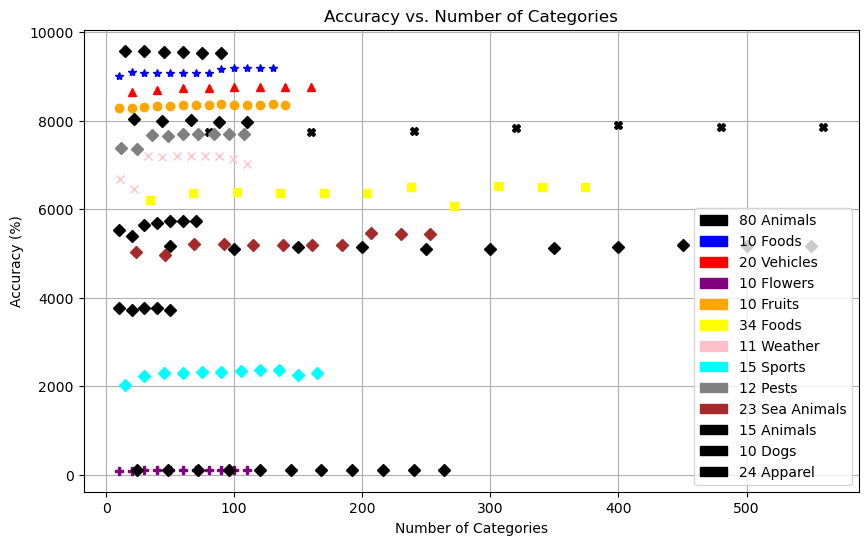

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.legend()

#Calling function
# append_accuracies(veg_counts,"Vegetables15", "green", "D")
append_accuracies(animal80_counts,"Animal80", "black", "X")
append_accuracies(food10_counts, "food10", "blue", "*" )
append_accuracies(v20_counts,"Vehicle20", "red", "^")
append_accuracies(flowers10_counts, "flowers10", "purple", "P")
append_accuracies(fruits10_counts, "fruits10", "orange", "o")
append_accuracies(food34_counts, "food34", "yellow", "s")
append_accuracies(weather11_counts, "weather11", "pink", "x")
append_accuracies(sports15_counts, "sports15", "cyan", "D")
append_accuracies(seaAnimals23_counts, "seaAnimals23", "brown", "D")
append_accuracies(pests12_counts, "pests12", "grey", "D")
append_accuracies(animals15_counts, "animal15", "black", "D")
append_accuracies(dog10_counts, "dog10", "black", "D")
append_accuracies(apparel24_counts, "apparel24", "black", "D")
append_accuracies(car50_counts, "car50", "black", "D")
append_accuracies(reptiles10_counts, "reptiles10", "black", "D")
append_accuracies(sports22_counts, "sports22", "black", "D")

# veg_patch = mpatches.Patch(color='green', label='15 Vegetables')
a80_patch = mpatches.Patch(color='black', label='80 Animals')
f10_patch = mpatches.Patch(color = 'blue', label='10 Foods')
v20_patch = mpatches.Patch(color = 'red', label='20 Vehicles')
fl10_patch = mpatches.Patch(color = 'purple', label='10 Flowers')
fruits10_patch = mpatches.Patch(color = 'orange', label='10 Fruits')
food34_patch = mpatches.Patch(color = 'yellow', label='34 Foods')
weather11_patch = mpatches.Patch(color = 'pink', label='11 Weather')
sports15_patch = mpatches.Patch(color = 'cyan', label='15 Sports')
seaAnimals23_patch = mpatches.Patch(color = 'brown', label='23 Sea Animals')
Pest12_patch = mpatches.Patch(color = 'grey', label='12 Pests')
Animal15_patch = mpatches.Patch(color= 'black', label='15 Animals')
Dog10_patch = mpatches.Patch(color= 'black', label='10 Dogs')
Apparel24_patch = mpatches.Patch(color= 'black', label='24 Apparel')
Car50_patch = mpatches.Patch(color= 'black', label='50 Cars')
Reptiles10_patch = mpatches.Patch(color= 'black', label='10 Reptiles')
Sports22_patch = mpatches.Patch(color= 'black', label='22 Sports')

plt.legend(handles=[a80_patch, f10_patch, v20_patch, fl10_patch, 
                    fruits10_patch, food34_patch, weather11_patch, sports15_patch, 
                    Pest12_patch, seaAnimals23_patch, Animal15_patch, Dog10_patch
                    , Apparel24_patch]) 

#Axis ranges
# plt.xlim(0, 80)  
# plt.ylim(0, 100)

plt.show()

# Accuracy Trends Across Datasets

In [762]:
import matplotlib.pyplot as plt

iterations = list(range(1, 19))  # Define a larger range to cover all possible lengths

datasets = {
    "animal80": animal80_accList,
    
    "food10": food10_accList,

    "vehicle20": vehicle20_accList,

    "flowers10": flowers10_accList,

    "fruits10": fruits10_accList,

    "food34": food34_accList,

    "weather11": weather11_accList,

    "sports15": sports15_accList,

    "seaAnimals23": seaAnimals23_accList,

    "pests12": pests12_accList,

    "animals15": animals15_accList,

    "dog10": dog10_accList,

    "apparel24": apparel24_accList,

    "car50": car50_accList,

    "reptiles10": reptiles10_accList,

    "sports22": sports22_accList,

    "animal64": animals64_accList,
}

plt.figure(figsize=(12, 6))

for dataset_name, accuracies in datasets.items():
    x_values = iterations[:len(accuracies)]  # Match the length of iterations to the dataset
    plt.plot(x_values, accuracies, label=dataset_name, marker='o')

plt.xlabel('Number of Redundant Categories Added', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Trends Across Datasets', fontsize=14)
plt.grid(True)
plt.legend(title="Datasets", fontsize=10)

plt.show()


NameError: name 'animals64_accList' is not defined

# Overall Increase per each new Semantic Category

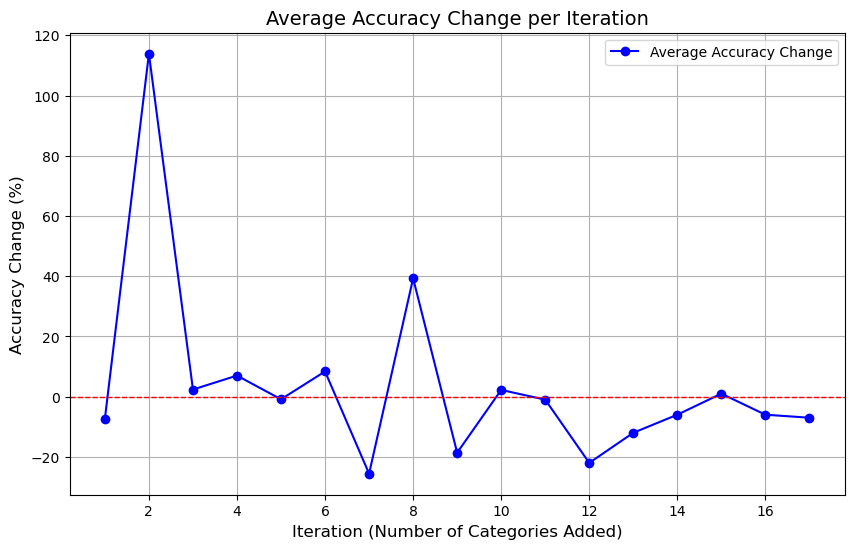

In [ ]:
# Pad the shorter list with NaN to make lengths equal
max_length = max(len(flowers10_accList), len(food10_accList), len(fruits10_accList), len(sports15_accList), len(vehicle20_accList), len(food34_accList), len(weather11_accList), len(animal80_accList),
                  len(seaAnimals23_accList), len(pests12_accList), len(animals15_accList), len(dog10_accList), len(apparel24_accList), len(car50_accList), len(reptiles10_accList), len(sports22_accList),
                  len(animals64_accList))


sports15_accList += [np.nan] * (max_length - len(sports15_accList))
vehicle20_accList += [np.nan] * (max_length - len(vehicle20_accList))
flowers10_accList += [np.nan] * (max_length - len(flowers10_accList))
food10_accList += [np.nan] * (max_length - len(food10_accList))
fruits10_accList += [np.nan] * (max_length - len(fruits10_accList))
food34_accList += [np.nan] * (max_length - len(food34_accList))
weather11_accList += [np.nan] * (max_length - len(weather11_accList))
animal80_accList += [np.nan] * (max_length - len(animal80_accList))
seaAnimals23_accList += [np.nan] * (max_length - len(seaAnimals23_accList))
pests12_accList += [np.nan] * (max_length - len(pests12_accList))
animals15_accList += [np.nan] * (max_length - len(animals15_accList))
dog10_accList += [np.nan] * (max_length - len(dog10_accList))
apparel24_accList += [np.nan] * (max_length - len(apparel24_accList))
sports15_accList += [np.nan] * (max_length - len(sports15_accList))
car50_accList += [np.nan] * (max_length - len(car50_accList))
reptiles10_accList += [np.nan] * (max_length - len(reptiles10_accList))
sports22_accList += [np.nan] * (max_length - len(sports22_accList))
animals64_accList += [np.nan] * (max_length - len(animals64_accList))

data = {
    "Sports15": sports15_accList,
    "Vehicle20": vehicle20_accList,
    "Flowers10": flowers10_accList,
    "Food10": food10_accList,
    "Fruits10": fruits10_accList,
    "Food34": food34_accList,
    "Weather11": weather11_accList,
    "Animal80": animal80_accList,
    "SeaAnimals23": seaAnimals23_accList,
    "Pests12": pests12_accList,
    "Animals15": animals15_accList,
    "Dog10": dog10_accList,
    "Apparel24": apparel24_accList,
    "Cars50": car50_accList,
    "Reptiles10": reptiles10_accList,
    "Sports22": sports22_accList,
    "Animals64": animals64_accList,
}

df = pd.DataFrame(data)

df_diff = df.diff().iloc[1:]  # First row will be NaN because there's no previous value
df_diff["Average Change"] = df_diff.mean(axis=1)  

plt.figure(figsize=(10, 6))
plt.plot(df_diff.index, df_diff["Average Change"], marker='o', label='Average Accuracy Change', color='blue')

plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.xlabel('Iteration (Number of Categories Added)', fontsize=12)
plt.ylabel('Accuracy Change (%)', fontsize=12)
plt.title('Average Accuracy Change per Iteration', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

plt.show()

## Cumulative Accuracy Increase Over Iterations

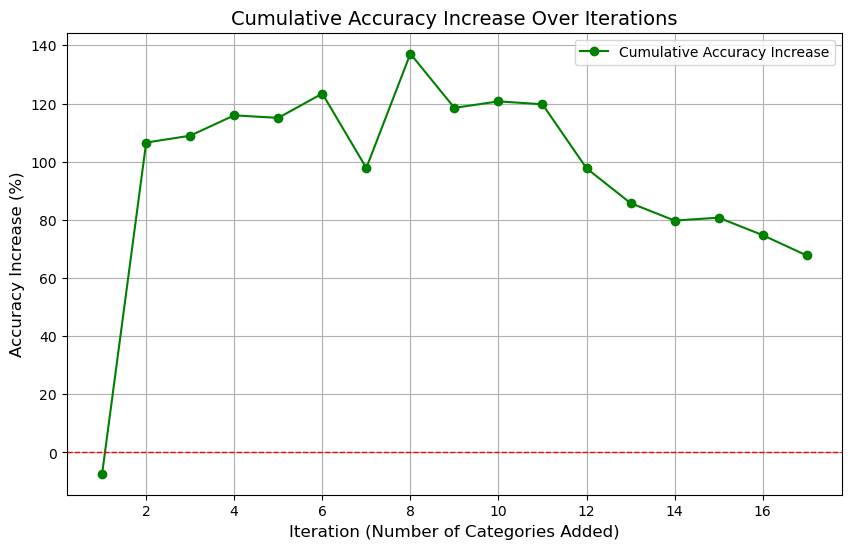

In [ ]:
# Calculate cumulative accuracy increase
df_diff["Cumulative Change"] = df_diff["Average Change"].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df_diff.index, df_diff["Cumulative Change"], marker='o', label='Cumulative Accuracy Increase', color='green')

plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at 0 for reference
plt.xlabel('Iteration (Number of Categories Added)', fontsize=12)
plt.ylabel('Accuracy Increase (%)', fontsize=12)
plt.title('Cumulative Accuracy Increase Over Iterations', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

plt.show()

## Cumulative Accuracy Increase Over Iterations Before 7

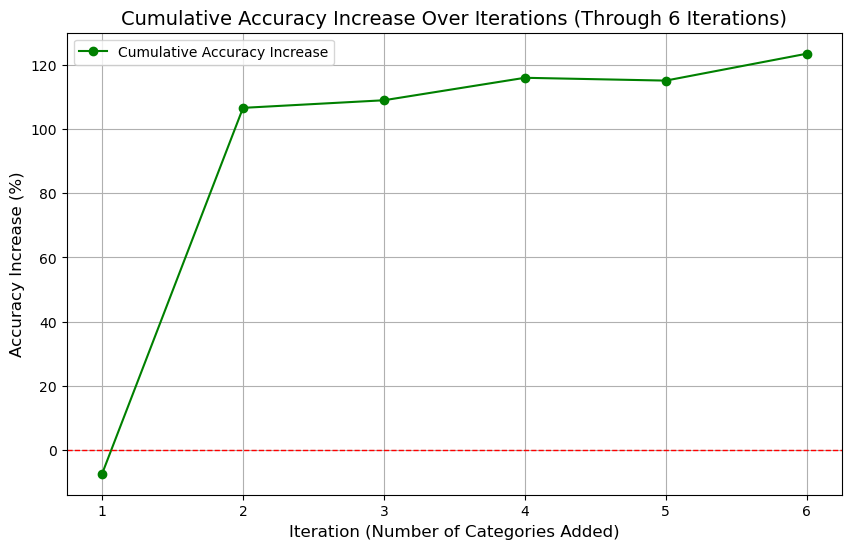

In [ ]:
df_diff_filtered = df_diff.iloc[:6]  # Keep rows before 7

plt.figure(figsize=(10, 6))
plt.plot(df_diff_filtered.index, df_diff_filtered["Cumulative Change"], marker='o', label='Cumulative Accuracy Increase', color='green')

plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at 0 for reference
plt.xlabel('Iteration (Number of Categories Added)', fontsize=12)
plt.ylabel('Accuracy Increase (%)', fontsize=12)
plt.title('Cumulative Accuracy Increase Over Iterations (Through 6 Iterations)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

plt.show()

## Cumulative Accuracy Increase Over Iterations After 7

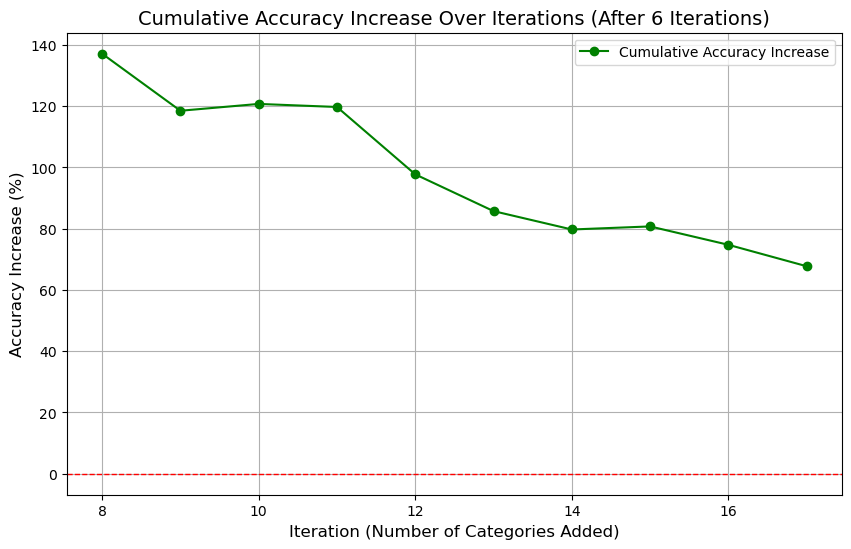

In [ ]:
df_diff_filtered = df_diff.iloc[7:]  # Keep only rows from 7 on

plt.figure(figsize=(10, 6))
plt.plot(df_diff_filtered.index, df_diff_filtered["Cumulative Change"], marker='o', label='Cumulative Accuracy Increase', color='green')

plt.axhline(0, color='red', linestyle='--', linewidth=1) 
plt.xlabel('Iteration (Number of Categories Added)', fontsize=12)
plt.ylabel('Accuracy Increase (%)', fontsize=12)
plt.title('Cumulative Accuracy Increase Over Iterations (After 6 Iterations)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10)

plt.show()

### The above shows, accuracy increase plateaus

## Average Total Increase (at peak accuracy)

In [ ]:
average_changes = df.apply(lambda x: max(x.dropna()) - x.dropna().iloc[0])

print("Max Increase per Set:")
print(average_changes)

print("\n\n")
print("Average Increase Across Sets:")

average_allLarge = average_changes.sum() / len(average_changes)
print(average_allLarge)

Max Increase per Set:
Sports15        352.00
Vehicle20       125.00
Flowers10         8.31
Food10          182.00
Fruits10         75.00
Food34          313.00
Weather11       530.00
Animal80        173.00
SeaAnimals23    438.00
Pests12         323.00
Animals15         0.00
Dog10           206.00
Apparel24         0.11
Cars50           24.00
Reptiles10        0.00
Sports22          0.00
dtype: float64



Average Increase Across Sets:
171.83875


## Small vs Large Initial Categories

In [ ]:
card_accList = analysistopy.card_accList
v7_accList = analysistopy.v7_accList
aO_accList = analysistopy.aO_accList
catDog_accList = analysistopy.catDog_accList
bottles5_accList = analysistopy.bottles5_accList

# print(card_accList)
# print(v7_accList)
# print(aO_accList)
# print(catDog_accList)

In [ ]:
# Pad the shorter list with NaN to make lengths equal
max_lengthSmall = max(len(card_accList), len(v7_accList), len(aO_accList), len(catDog_accList), 
                      len(bottles5_accList))

card_accList += [np.nan] * (max_lengthSmall - len(card_accList))
v7_accList += [np.nan] * (max_lengthSmall - len(v7_accList))
aO_accList += [np.nan] * (max_lengthSmall - len(aO_accList))
catDog_accList += [np.nan] * (max_lengthSmall - len(catDog_accList))
bottles5_accList += [np.nan] * (max_lengthSmall - len(bottles5_accList))

dataSmall = {
    "Card4": card_accList,
    "Veg7": v7_accList,
    "Animal4": aO_accList,
    "CatDog": catDog_accList,
    "Bottles5": bottles5_accList
}

small_df = pd.DataFrame(dataSmall)

## Average Total Increase (at peak accuracy)

In [ ]:
average_changesSmall = small_df.apply(lambda x: max(x.dropna()) - x.dropna().iloc[0])

print("Max Increase per Set (small sets):")
print(average_changesSmall)

average_allSmall = average_changesSmall.sum() / len(average_changesSmall)


Max Increase per Set (small sets):
Card4      0.00
Veg7       0.00
Animal4    1.37
CatDog     3.41
dtype: float64


### Note: around 1/3 the increase when compared to just the larger datasets 

In [ ]:
average_all = (average_changesSmall.sum() + average_changes.sum()) / 12

print("Average increase for small sets: ", average_allSmall)
print("Average increase for larger sets: ", average_allLarge)
print("Average increase for all sets: ", average_all)

Average increase for small sets:  1.1950000000000003
Average increase for larger sets:  171.83875
Average increase for all sets:  229.51666666666668


([0, 1, 2],
 [Text(0, 0, 'Total Average'),
  Text(1, 0, 'Large Amount of Initial Categories'),
  Text(2, 0, 'Small Amount of Initial Categories')])

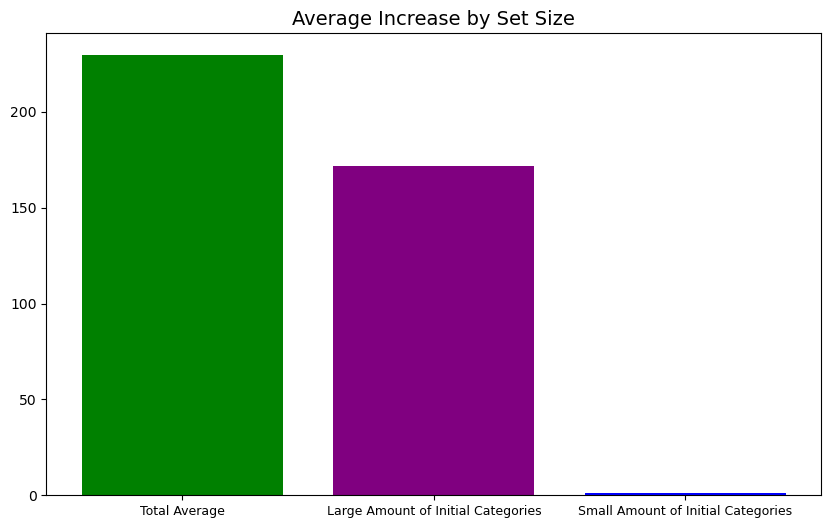

In [ ]:
plt.figure(figsize=(10, 6))

x = np.array(["Total Average", "Large Amount of Initial Categories", "Small Amount of Initial Categories"])
y = np.array([average_all, average_allLarge, average_allSmall])

colors = ['green','purple', 'blue']

plt.bar(x,y, color = colors)
plt.title('Average Increase by Set Size', fontsize=14)
plt.xticks(fontsize=9)  
